In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [3]:
import torch
from gcpds_cv_pykit.datasets import SeedGermination
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import DeepLabV3Plus
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
SeedGermination()

100%|██████████| 0.98G/0.98G [00:07<00:00, 146MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1
Dataset copied to: /content/datasets/seeds
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1' deleted.


'/content/datasets/seeds'

In [ ]:
config = {"Dir of dataset": "./datasets/seeds", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "DeepLabV3+", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","SeedGermination-DeepLabV3+-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 2458


Organizing masks: 100%|██████████| 2458/2458 [00:00<00:00, 83894.27it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 231


Organizing masks: 100%|██████████| 231/231 [00:00<00:00, 81377.81it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 118


Organizing masks: 100%|██████████| 118/118 [00:00<00:00, 73891.89it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


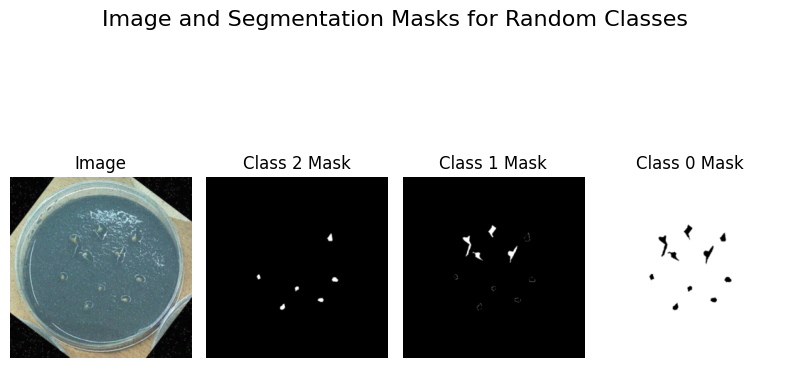

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 186MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


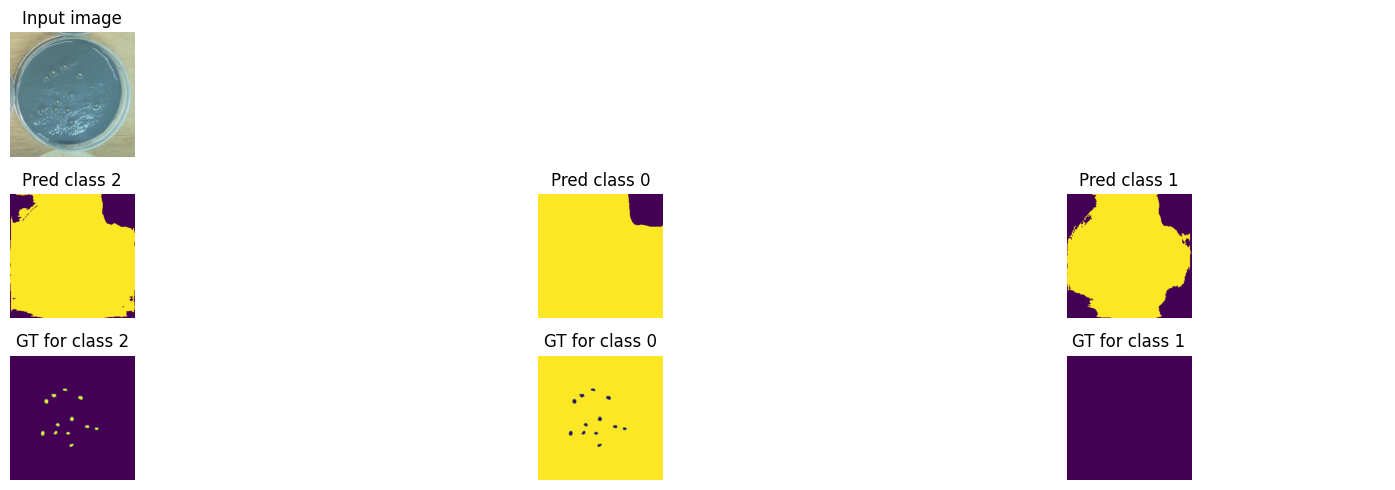

Train loss: 0.70158 | Time: 0m 50s | Val loss: 0.65498
Train_DICE_avg: 0.34348 | Train_Jaccard_avg: 0.28740 | Train_Sensitivity_avg: 0.34923 | Train_Specificity_avg: 0.71446 
Class 0 - Train_DICE: 0.84719 | Train_Jaccard: 0.76149 | Train_Sensitivity: 0.94627 | Train_Specificity: 0.14918 
Class 1 - Train_DICE: 0.03421 | Train_Jaccard: 0.01800 | Train_Sensitivity: 0.01812 | Train_Specificity: 0.99831 
Class 2 - Train_DICE: 0.14903 | Train_Jaccard: 0.08273 | Train_Sensitivity: 0.08330 | Train_Specificity: 0.99590 
Val_DICE_avg: 0.39149 | Val_Jaccard_avg: 0.34085 | Val_Sensitivity_avg: 0.36356 | Val_Specificity_avg: 0.66581 
Class 0 - Val_DICE: 0.94085 | Val_Jaccard: 0.88861 | Val_Sensitivity: 0.95582 | Val_Specificity: 0.00000 
Class 1 - Val_DICE: 0.04285 | Val_Jaccard: 0.02328 | Val_Sensitivity: 0.02344 | Val_Specificity: 0.99919 
Class 2 - Val_DICE: 0.19079 | Val_Jaccard: 0.11067 | Val_Sensitivity: 0.11143 | Val_Specificity: 0.99825 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.61572 | Time: 1m 39s | Val loss: 0.54928
Train_DICE_avg: 0.44805 | Train_Jaccard_avg: 0.39199 | Train_Sensitivity_avg: 0.42013 | Train_Specificity_avg: 0.72242 
Class 0 - Train_DICE: 0.93597 | Train_Jaccard: 0.88004 | Train_Sensitivity: 0.94276 | Train_Specificity: 0.17196 
Class 1 - Train_DICE: 0.06790 | Train_Jaccard: 0.03952 | Train_Sensitivity: 0.04219 | Train_Specificity: 0.99863 
Class 2 - Train_DICE: 0.34030 | Train_Jaccard: 0.25641 | Train_Sensitivity: 0.27546 | Train_Specificity: 0.99668 
Val_DICE_avg: 0.50811 | Val_Jaccard_avg: 0.45824 | Val_Sensitivity_avg: 0.49200 | Val_Specificity_avg: 0.69726 
Class 0 - Val_DICE: 0.95184 | Val_Jaccard: 0.90852 | Val_Sensitivity: 0.96579 | Val_Specificity: 0.09670 
Class 1 - Val_DICE: 0.10421 | Val_Jaccard: 0.06518 | Val_Sensitivity: 0.07943 | Val_Specificity: 0.99714 
Class 2 - Val_DICE: 0.46828 | Val_Jaccard: 0.40102 | Val_Sensitivity: 0.43079 | Val_Specificity: 0.99795 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.53084 | Time: 2m 28s | Val loss: 0.50839
Train_DICE_avg: 0.52831 | Train_Jaccard_avg: 0.47148 | Train_Sensitivity_avg: 0.50515 | Train_Specificity_avg: 0.79389 
Class 0 - Train_DICE: 0.95510 | Train_Jaccard: 0.91446 | Train_Sensitivity: 0.97234 | Train_Specificity: 0.38644 
Class 1 - Train_DICE: 0.11711 | Train_Jaccard: 0.07145 | Train_Sensitivity: 0.08024 | Train_Specificity: 0.99783 
Class 2 - Train_DICE: 0.51272 | Train_Jaccard: 0.42852 | Train_Sensitivity: 0.46288 | Train_Specificity: 0.99740 
Val_DICE_avg: 0.53142 | Val_Jaccard_avg: 0.48617 | Val_Sensitivity_avg: 0.51215 | Val_Specificity_avg: 0.82615 
Class 0 - Val_DICE: 0.96936 | Val_Jaccard: 0.94116 | Val_Sensitivity: 0.98913 | Val_Specificity: 0.48231 
Class 1 - Val_DICE: 0.11234 | Val_Jaccard: 0.07153 | Val_Sensitivity: 0.08393 | Val_Specificity: 0.99734 
Class 2 - Val_DICE: 0.51256 | Val_Jaccard: 0.44582 | Val_Sensitivity: 0.46340 | Val_Specificity: 0.99878 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.49192 | Time: 3m 17s | Val loss: 0.49075
Train_DICE_avg: 0.54640 | Train_Jaccard_avg: 0.49155 | Train_Sensitivity_avg: 0.52448 | Train_Specificity_avg: 0.84751 
Class 0 - Train_DICE: 0.96382 | Train_Jaccard: 0.93059 | Train_Sensitivity: 0.97826 | Train_Specificity: 0.54761 
Class 1 - Train_DICE: 0.12576 | Train_Jaccard: 0.07723 | Train_Sensitivity: 0.08782 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.54962 | Train_Jaccard: 0.46683 | Train_Sensitivity: 0.50738 | Train_Specificity: 0.99727 
Val_DICE_avg: 0.53701 | Val_Jaccard_avg: 0.49453 | Val_Sensitivity_avg: 0.52047 | Val_Specificity_avg: 0.89243 
Class 0 - Val_DICE: 0.97616 | Val_Jaccard: 0.95402 | Val_Sensitivity: 0.98970 | Val_Specificity: 0.68183 
Class 1 - Val_DICE: 0.11519 | Val_Jaccard: 0.07351 | Val_Sensitivity: 0.08714 | Val_Specificity: 0.99725 
Class 2 - Val_DICE: 0.51967 | Val_Jaccard: 0.45606 | Val_Sensitivity: 0.48457 | Val_Specificity: 0.99820 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.46775 | Time: 4m 5s | Val loss: 0.48844
Train_DICE_avg: 0.56990 | Train_Jaccard_avg: 0.51521 | Train_Sensitivity_avg: 0.54607 | Train_Specificity_avg: 0.88213 
Class 0 - Train_DICE: 0.97278 | Train_Jaccard: 0.94737 | Train_Sensitivity: 0.98268 | Train_Specificity: 0.65170 
Class 1 - Train_DICE: 0.13030 | Train_Jaccard: 0.08014 | Train_Sensitivity: 0.09099 | Train_Specificity: 0.99765 
Class 2 - Train_DICE: 0.60662 | Train_Jaccard: 0.51812 | Train_Sensitivity: 0.56455 | Train_Specificity: 0.99704 
Val_DICE_avg: 0.54100 | Val_Jaccard_avg: 0.49859 | Val_Sensitivity_avg: 0.52261 | Val_Specificity_avg: 0.89959 
Class 0 - Val_DICE: 0.97858 | Val_Jaccard: 0.95867 | Val_Sensitivity: 0.99106 | Val_Specificity: 0.70315 
Class 1 - Val_DICE: 0.11716 | Val_Jaccard: 0.07486 | Val_Sensitivity: 0.08885 | Val_Specificity: 0.99730 
Class 2 - Val_DICE: 0.52726 | Val_Jaccard: 0.46224 | Val_Sensitivity: 0.48792 | Val_Specificity: 0.99830 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


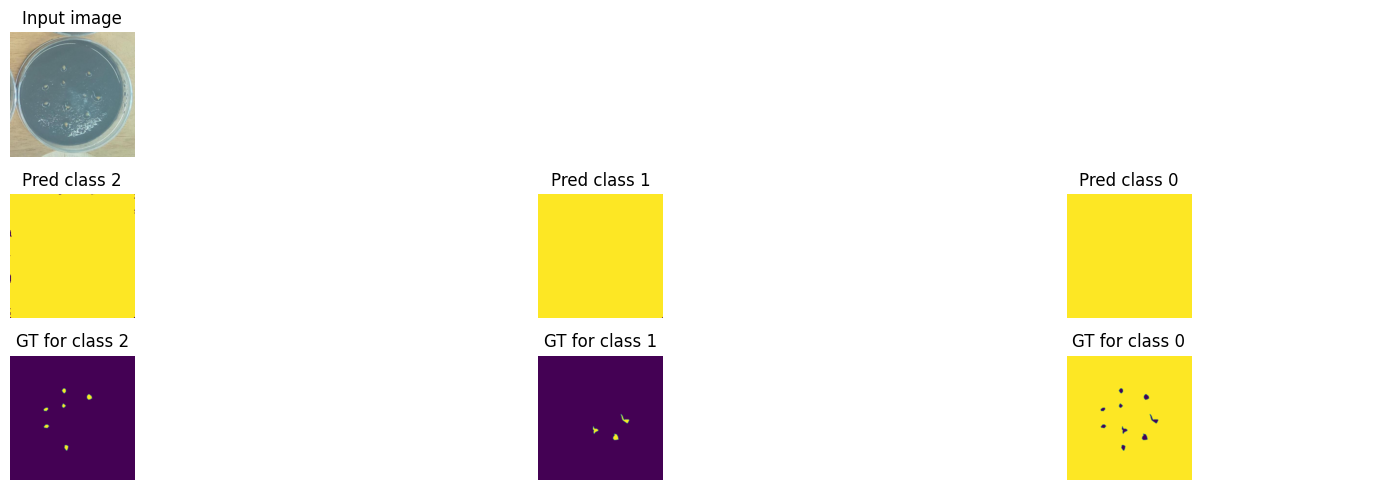

Train loss: 0.43360 | Time: 4m 55s | Val loss: 0.42359
Train_DICE_avg: 0.60795 | Train_Jaccard_avg: 0.55236 | Train_Sensitivity_avg: 0.58148 | Train_Specificity_avg: 0.91821 
Class 0 - Train_DICE: 0.98177 | Train_Jaccard: 0.96444 | Train_Sensitivity: 0.98438 | Train_Specificity: 0.76036 
Class 1 - Train_DICE: 0.13737 | Train_Jaccard: 0.08465 | Train_Sensitivity: 0.09653 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.70470 | Train_Jaccard: 0.60800 | Train_Sensitivity: 0.66353 | Train_Specificity: 0.99663 
Val_DICE_avg: 0.61613 | Val_Jaccard_avg: 0.57092 | Val_Sensitivity_avg: 0.59249 | Val_Specificity_avg: 0.95757 
Class 0 - Val_DICE: 0.99323 | Val_Jaccard: 0.98662 | Val_Sensitivity: 0.99328 | Val_Specificity: 0.87818 
Class 1 - Val_DICE: 0.13511 | Val_Jaccard: 0.08572 | Val_Sensitivity: 0.10266 | Val_Specificity: 0.99708 
Class 2 - Val_DICE: 0.72004 | Val_Jaccard: 0.64042 | Val_Sensitivity: 0.68152 | Val_Specificity: 0.99745 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.40723 | Time: 5m 43s | Val loss: 0.40340
Train_DICE_avg: 0.62434 | Train_Jaccard_avg: 0.56898 | Train_Sensitivity_avg: 0.59785 | Train_Specificity_avg: 0.95378 
Class 0 - Train_DICE: 0.98672 | Train_Jaccard: 0.97397 | Train_Sensitivity: 0.98235 | Train_Specificity: 0.86736 
Class 1 - Train_DICE: 0.15600 | Train_Jaccard: 0.09755 | Train_Sensitivity: 0.11382 | Train_Specificity: 0.99754 
Class 2 - Train_DICE: 0.73029 | Train_Jaccard: 0.63543 | Train_Sensitivity: 0.69738 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.62957 | Val_Jaccard_avg: 0.58226 | Val_Sensitivity_avg: 0.60680 | Val_Specificity_avg: 0.97553 
Class 0 - Val_DICE: 0.99462 | Val_Jaccard: 0.98934 | Val_Sensitivity: 0.99284 | Val_Specificity: 0.93259 
Class 1 - Val_DICE: 0.17030 | Val_Jaccard: 0.11131 | Val_Sensitivity: 0.13967 | Val_Specificity: 0.99699 
Class 2 - Val_DICE: 0.72381 | Val_Jaccard: 0.64613 | Val_Sensitivity: 0.68791 | Val_Specificity: 0.99702 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.39043 | Time: 6m 32s | Val loss: 0.38931
Train_DICE_avg: 0.63875 | Train_Jaccard_avg: 0.58089 | Train_Sensitivity_avg: 0.61482 | Train_Specificity_avg: 0.96147 
Class 0 - Train_DICE: 0.98688 | Train_Jaccard: 0.97425 | Train_Sensitivity: 0.98041 | Train_Specificity: 0.89089 
Class 1 - Train_DICE: 0.19442 | Train_Jaccard: 0.12747 | Train_Sensitivity: 0.16194 | Train_Specificity: 0.99717 
Class 2 - Train_DICE: 0.73497 | Train_Jaccard: 0.64095 | Train_Sensitivity: 0.70213 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.64096 | Val_Jaccard_avg: 0.59297 | Val_Sensitivity_avg: 0.62332 | Val_Specificity_avg: 0.97943 
Class 0 - Val_DICE: 0.99467 | Val_Jaccard: 0.98944 | Val_Sensitivity: 0.99226 | Val_Specificity: 0.94432 
Class 1 - Val_DICE: 0.20174 | Val_Jaccard: 0.13933 | Val_Sensitivity: 0.18468 | Val_Specificity: 0.99670 
Class 2 - Val_DICE: 0.72648 | Val_Jaccard: 0.65014 | Val_Sensitivity: 0.69302 | Val_Specificity: 0.99727 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.37580 | Time: 7m 20s | Val loss: 0.36774
Train_DICE_avg: 0.65328 | Train_Jaccard_avg: 0.59286 | Train_Sensitivity_avg: 0.63096 | Train_Specificity_avg: 0.96428 
Class 0 - Train_DICE: 0.98713 | Train_Jaccard: 0.97475 | Train_Sensitivity: 0.98016 | Train_Specificity: 0.89946 
Class 1 - Train_DICE: 0.22559 | Train_Jaccard: 0.15307 | Train_Sensitivity: 0.20034 | Train_Specificity: 0.99700 
Class 2 - Train_DICE: 0.74711 | Train_Jaccard: 0.65076 | Train_Sensitivity: 0.71239 | Train_Specificity: 0.99637 
Val_DICE_avg: 0.67654 | Val_Jaccard_avg: 0.62030 | Val_Sensitivity_avg: 0.65264 | Val_Specificity_avg: 0.98310 
Class 0 - Val_DICE: 0.99476 | Val_Jaccard: 0.98963 | Val_Sensitivity: 0.99170 | Val_Specificity: 0.95496 
Class 1 - Val_DICE: 0.23532 | Val_Jaccard: 0.16896 | Val_Sensitivity: 0.21809 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.79952 | Val_Jaccard: 0.70230 | Val_Sensitivity: 0.74813 | Val_Specificity: 0.99740 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.34805 | Time: 8m 9s | Val loss: 0.34032
Train_DICE_avg: 0.68351 | Train_Jaccard_avg: 0.61606 | Train_Sensitivity_avg: 0.66494 | Train_Specificity_avg: 0.96884 
Class 0 - Train_DICE: 0.98682 | Train_Jaccard: 0.97415 | Train_Sensitivity: 0.97850 | Train_Specificity: 0.91364 
Class 1 - Train_DICE: 0.25754 | Train_Jaccard: 0.17759 | Train_Sensitivity: 0.24005 | Train_Specificity: 0.99661 
Class 2 - Train_DICE: 0.80616 | Train_Jaccard: 0.69644 | Train_Sensitivity: 0.77629 | Train_Specificity: 0.99627 
Val_DICE_avg: 0.69396 | Val_Jaccard_avg: 0.63662 | Val_Sensitivity_avg: 0.69259 | Val_Specificity_avg: 0.97671 
Class 0 - Val_DICE: 0.99484 | Val_Jaccard: 0.98977 | Val_Sensitivity: 0.99235 | Val_Specificity: 0.93741 
Class 1 - Val_DICE: 0.25370 | Val_Jaccard: 0.18322 | Val_Sensitivity: 0.28926 | Val_Specificity: 0.99550 
Class 2 - Val_DICE: 0.83334 | Val_Jaccard: 0.73687 | Val_Sensitivity: 0.79617 | Val_Specificity: 0.99722 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


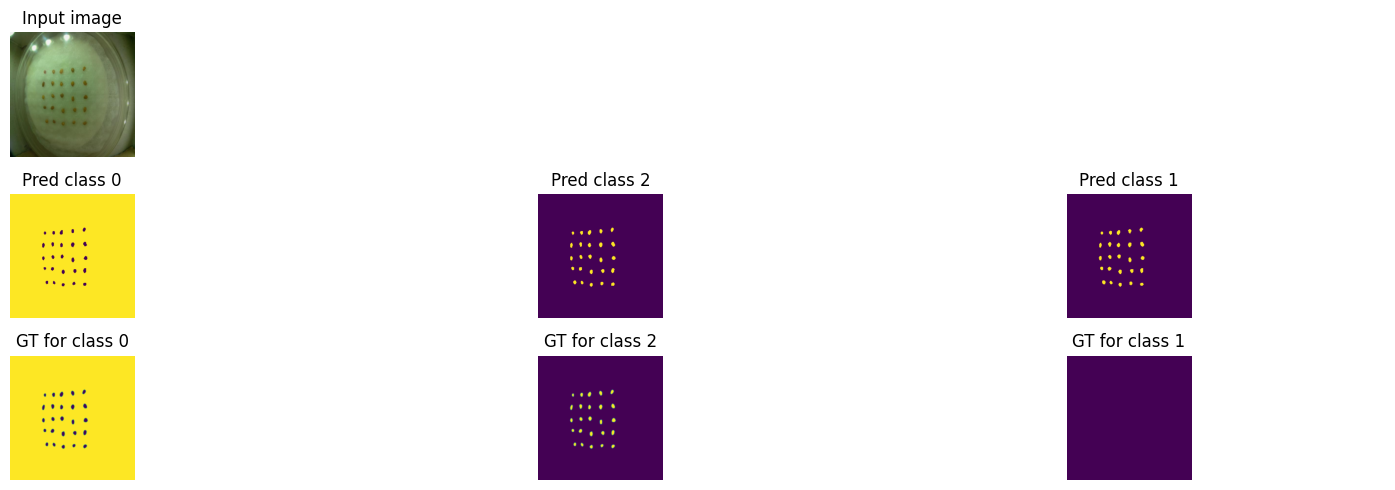

Train loss: 0.33156 | Time: 8m 59s | Val loss: 0.32542
Train_DICE_avg: 0.69162 | Train_Jaccard_avg: 0.62430 | Train_Sensitivity_avg: 0.67541 | Train_Specificity_avg: 0.97052 
Class 0 - Train_DICE: 0.98772 | Train_Jaccard: 0.97590 | Train_Sensitivity: 0.98032 | Train_Specificity: 0.91877 
Class 1 - Train_DICE: 0.27225 | Train_Jaccard: 0.19061 | Train_Sensitivity: 0.26093 | Train_Specificity: 0.99659 
Class 2 - Train_DICE: 0.81489 | Train_Jaccard: 0.70640 | Train_Sensitivity: 0.78498 | Train_Specificity: 0.99619 
Val_DICE_avg: 0.70070 | Val_Jaccard_avg: 0.64309 | Val_Sensitivity_avg: 0.68136 | Val_Specificity_avg: 0.97290 
Class 0 - Val_DICE: 0.99514 | Val_Jaccard: 0.99037 | Val_Sensitivity: 0.99320 | Val_Specificity: 0.92459 
Class 1 - Val_DICE: 0.26941 | Val_Jaccard: 0.19688 | Val_Sensitivity: 0.25414 | Val_Specificity: 0.99680 
Class 2 - Val_DICE: 0.83755 | Val_Jaccard: 0.74203 | Val_Sensitivity: 0.79675 | Val_Specificity: 0.99730 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.32091 | Time: 9m 48s | Val loss: 0.31954
Train_DICE_avg: 0.69731 | Train_Jaccard_avg: 0.63017 | Train_Sensitivity_avg: 0.68206 | Train_Specificity_avg: 0.97056 
Class 0 - Train_DICE: 0.98833 | Train_Jaccard: 0.97707 | Train_Sensitivity: 0.98163 | Train_Specificity: 0.91882 
Class 1 - Train_DICE: 0.28407 | Train_Jaccard: 0.20173 | Train_Sensitivity: 0.27385 | Train_Specificity: 0.99669 
Class 2 - Train_DICE: 0.81953 | Train_Jaccard: 0.71172 | Train_Sensitivity: 0.79069 | Train_Specificity: 0.99618 
Val_DICE_avg: 0.70384 | Val_Jaccard_avg: 0.64628 | Val_Sensitivity_avg: 0.69445 | Val_Specificity_avg: 0.96801 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99064 | Val_Sensitivity: 0.99374 | Val_Specificity: 0.91026 
Class 1 - Val_DICE: 0.27508 | Val_Jaccard: 0.20218 | Val_Sensitivity: 0.28484 | Val_Specificity: 0.99648 
Class 2 - Val_DICE: 0.84115 | Val_Jaccard: 0.74602 | Val_Sensitivity: 0.80478 | Val_Specificity: 0.99729 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.31513 | Time: 10m 37s | Val loss: 0.31242
Train_DICE_avg: 0.70056 | Train_Jaccard_avg: 0.63370 | Train_Sensitivity_avg: 0.68610 | Train_Specificity_avg: 0.97067 
Class 0 - Train_DICE: 0.98884 | Train_Jaccard: 0.97806 | Train_Sensitivity: 0.98266 | Train_Specificity: 0.91911 
Class 1 - Train_DICE: 0.28877 | Train_Jaccard: 0.20594 | Train_Sensitivity: 0.27811 | Train_Specificity: 0.99671 
Class 2 - Train_DICE: 0.82406 | Train_Jaccard: 0.71709 | Train_Sensitivity: 0.79753 | Train_Specificity: 0.99620 
Val_DICE_avg: 0.70796 | Val_Jaccard_avg: 0.65020 | Val_Sensitivity_avg: 0.68580 | Val_Specificity_avg: 0.96435 
Class 0 - Val_DICE: 0.99535 | Val_Jaccard: 0.99079 | Val_Sensitivity: 0.99412 | Val_Specificity: 0.89848 
Class 1 - Val_DICE: 0.28586 | Val_Jaccard: 0.21169 | Val_Sensitivity: 0.26272 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.84267 | Val_Jaccard: 0.74812 | Val_Sensitivity: 0.80055 | Val_Specificity: 0.99740 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.30919 | Time: 11m 26s | Val loss: 0.30822
Train_DICE_avg: 0.70533 | Train_Jaccard_avg: 0.63832 | Train_Sensitivity_avg: 0.69063 | Train_Specificity_avg: 0.96999 
Class 0 - Train_DICE: 0.98895 | Train_Jaccard: 0.97828 | Train_Sensitivity: 0.98317 | Train_Specificity: 0.91693 
Class 1 - Train_DICE: 0.30082 | Train_Jaccard: 0.21718 | Train_Sensitivity: 0.28845 | Train_Specificity: 0.99684 
Class 2 - Train_DICE: 0.82623 | Train_Jaccard: 0.71952 | Train_Sensitivity: 0.80028 | Train_Specificity: 0.99620 
Val_DICE_avg: 0.71349 | Val_Jaccard_avg: 0.65560 | Val_Sensitivity_avg: 0.70014 | Val_Specificity_avg: 0.95991 
Class 0 - Val_DICE: 0.99530 | Val_Jaccard: 0.99069 | Val_Sensitivity: 0.99437 | Val_Specificity: 0.88551 
Class 1 - Val_DICE: 0.30091 | Val_Jaccard: 0.22615 | Val_Sensitivity: 0.30190 | Val_Specificity: 0.99684 
Class 2 - Val_DICE: 0.84426 | Val_Jaccard: 0.74995 | Val_Sensitivity: 0.80415 | Val_Specificity: 0.99738 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.30612 | Time: 12m 15s | Val loss: 0.30246
Train_DICE_avg: 0.70750 | Train_Jaccard_avg: 0.64050 | Train_Sensitivity_avg: 0.69600 | Train_Specificity_avg: 0.96789 
Class 0 - Train_DICE: 0.98935 | Train_Jaccard: 0.97905 | Train_Sensitivity: 0.98421 | Train_Specificity: 0.91068 
Class 1 - Train_DICE: 0.30539 | Train_Jaccard: 0.22073 | Train_Sensitivity: 0.30050 | Train_Specificity: 0.99679 
Class 2 - Train_DICE: 0.82775 | Train_Jaccard: 0.72171 | Train_Sensitivity: 0.80328 | Train_Specificity: 0.99619 
Val_DICE_avg: 0.71700 | Val_Jaccard_avg: 0.65958 | Val_Sensitivity_avg: 0.70060 | Val_Specificity_avg: 0.96023 
Class 0 - Val_DICE: 0.99533 | Val_Jaccard: 0.99075 | Val_Sensitivity: 0.99441 | Val_Specificity: 0.88597 
Class 1 - Val_DICE: 0.30969 | Val_Jaccard: 0.23573 | Val_Sensitivity: 0.29658 | Val_Specificity: 0.99739 
Class 2 - Val_DICE: 0.84598 | Val_Jaccard: 0.75225 | Val_Sensitivity: 0.81080 | Val_Specificity: 0.99732 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


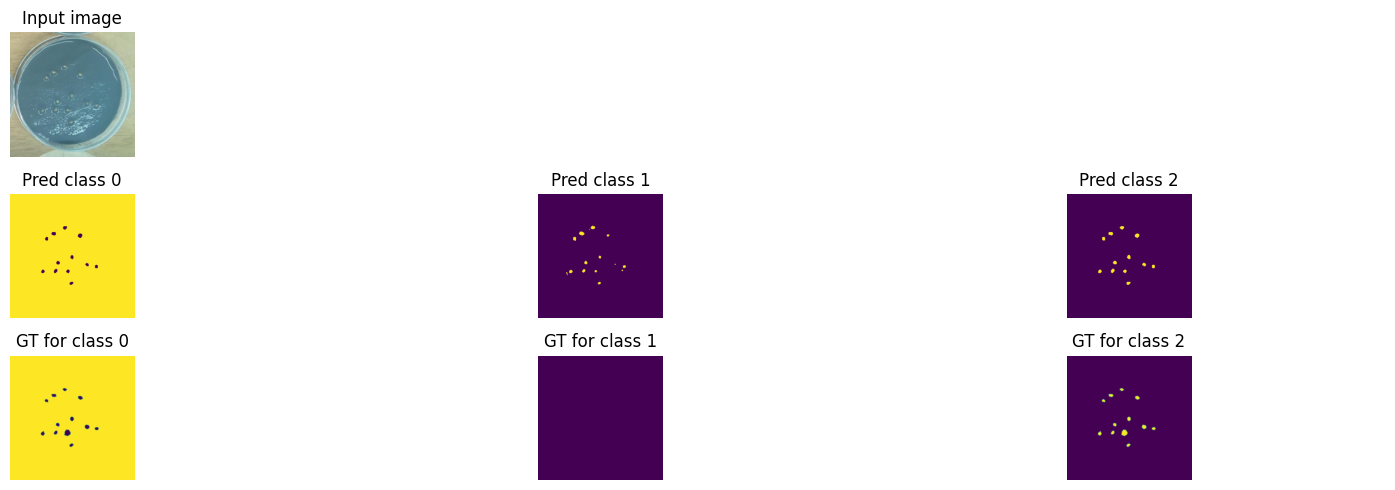

Train loss: 0.30347 | Time: 13m 5s | Val loss: 0.30246
Train_DICE_avg: 0.70946 | Train_Jaccard_avg: 0.64281 | Train_Sensitivity_avg: 0.69808 | Train_Specificity_avg: 0.96662 
Class 0 - Train_DICE: 0.98939 | Train_Jaccard: 0.97912 | Train_Sensitivity: 0.98444 | Train_Specificity: 0.90685 
Class 1 - Train_DICE: 0.30933 | Train_Jaccard: 0.22521 | Train_Sensitivity: 0.30474 | Train_Specificity: 0.99684 
Class 2 - Train_DICE: 0.82966 | Train_Jaccard: 0.72409 | Train_Sensitivity: 0.80506 | Train_Specificity: 0.99619 
Val_DICE_avg: 0.71460 | Val_Jaccard_avg: 0.65729 | Val_Sensitivity_avg: 0.69908 | Val_Specificity_avg: 0.96179 
Class 0 - Val_DICE: 0.99542 | Val_Jaccard: 0.99093 | Val_Sensitivity: 0.99451 | Val_Specificity: 0.89067 
Class 1 - Val_DICE: 0.30155 | Val_Jaccard: 0.22721 | Val_Sensitivity: 0.27906 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.84683 | Val_Jaccard: 0.75374 | Val_Sensitivity: 0.82368 | Val_Specificity: 0.99715 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.29873 | Time: 13m 53s | Val loss: 0.29941
Train_DICE_avg: 0.71393 | Train_Jaccard_avg: 0.64719 | Train_Sensitivity_avg: 0.70303 | Train_Specificity_avg: 0.96598 
Class 0 - Train_DICE: 0.98966 | Train_Jaccard: 0.97965 | Train_Sensitivity: 0.98519 | Train_Specificity: 0.90481 
Class 1 - Train_DICE: 0.31932 | Train_Jaccard: 0.23395 | Train_Sensitivity: 0.31419 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.83282 | Train_Jaccard: 0.72796 | Train_Sensitivity: 0.80972 | Train_Specificity: 0.99620 
Val_DICE_avg: 0.71664 | Val_Jaccard_avg: 0.65945 | Val_Sensitivity_avg: 0.70017 | Val_Specificity_avg: 0.96133 
Class 0 - Val_DICE: 0.99540 | Val_Jaccard: 0.99088 | Val_Sensitivity: 0.99448 | Val_Specificity: 0.88910 
Class 1 - Val_DICE: 0.30507 | Val_Jaccard: 0.23082 | Val_Sensitivity: 0.26876 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.84947 | Val_Jaccard: 0.75665 | Val_Sensitivity: 0.83726 | Val_Specificity: 0.99687 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.29689 | Time: 14m 42s | Val loss: 0.29445
Train_DICE_avg: 0.71581 | Train_Jaccard_avg: 0.64925 | Train_Sensitivity_avg: 0.70534 | Train_Specificity_avg: 0.96635 
Class 0 - Train_DICE: 0.98994 | Train_Jaccard: 0.98019 | Train_Sensitivity: 0.98569 | Train_Specificity: 0.90595 
Class 1 - Train_DICE: 0.32238 | Train_Jaccard: 0.23699 | Train_Sensitivity: 0.31763 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.83512 | Train_Jaccard: 0.73058 | Train_Sensitivity: 0.81270 | Train_Specificity: 0.99618 
Val_DICE_avg: 0.72423 | Val_Jaccard_avg: 0.66710 | Val_Sensitivity_avg: 0.70822 | Val_Specificity_avg: 0.96038 
Class 0 - Val_DICE: 0.99556 | Val_Jaccard: 0.99120 | Val_Sensitivity: 0.99481 | Val_Specificity: 0.88631 
Class 1 - Val_DICE: 0.32301 | Val_Jaccard: 0.24750 | Val_Sensitivity: 0.30005 | Val_Specificity: 0.99770 
Class 2 - Val_DICE: 0.85414 | Val_Jaccard: 0.76261 | Val_Sensitivity: 0.82979 | Val_Specificity: 0.99712 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.29403 | Time: 15m 31s | Val loss: 0.29073
Train_DICE_avg: 0.71794 | Train_Jaccard_avg: 0.65152 | Train_Sensitivity_avg: 0.70858 | Train_Specificity_avg: 0.96526 
Class 0 - Train_DICE: 0.99011 | Train_Jaccard: 0.98053 | Train_Sensitivity: 0.98618 | Train_Specificity: 0.90261 
Class 1 - Train_DICE: 0.32649 | Train_Jaccard: 0.24087 | Train_Sensitivity: 0.32408 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.83722 | Train_Jaccard: 0.73315 | Train_Sensitivity: 0.81548 | Train_Specificity: 0.99618 
Val_DICE_avg: 0.72617 | Val_Jaccard_avg: 0.66915 | Val_Sensitivity_avg: 0.71129 | Val_Specificity_avg: 0.95574 
Class 0 - Val_DICE: 0.99559 | Val_Jaccard: 0.99125 | Val_Sensitivity: 0.99538 | Val_Specificity: 0.87230 
Class 1 - Val_DICE: 0.32755 | Val_Jaccard: 0.25218 | Val_Sensitivity: 0.31650 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.85537 | Val_Jaccard: 0.76401 | Val_Sensitivity: 0.82199 | Val_Specificity: 0.99739 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.29217 | Time: 16m 20s | Val loss: 0.29215
Train_DICE_avg: 0.72004 | Train_Jaccard_avg: 0.65417 | Train_Sensitivity_avg: 0.71269 | Train_Specificity_avg: 0.96363 
Class 0 - Train_DICE: 0.99022 | Train_Jaccard: 0.98074 | Train_Sensitivity: 0.98695 | Train_Specificity: 0.89780 
Class 1 - Train_DICE: 0.33067 | Train_Jaccard: 0.24590 | Train_Sensitivity: 0.33194 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.83923 | Train_Jaccard: 0.73588 | Train_Sensitivity: 0.81918 | Train_Specificity: 0.99617 
Val_DICE_avg: 0.72427 | Val_Jaccard_avg: 0.66744 | Val_Sensitivity_avg: 0.71205 | Val_Specificity_avg: 0.95840 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99176 | Val_Sensitivity: 0.99560 | Val_Specificity: 0.88051 
Class 1 - Val_DICE: 0.31793 | Val_Jaccard: 0.24155 | Val_Sensitivity: 0.29996 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.85903 | Val_Jaccard: 0.76902 | Val_Sensitivity: 0.84060 | Val_Specificity: 0.99710 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


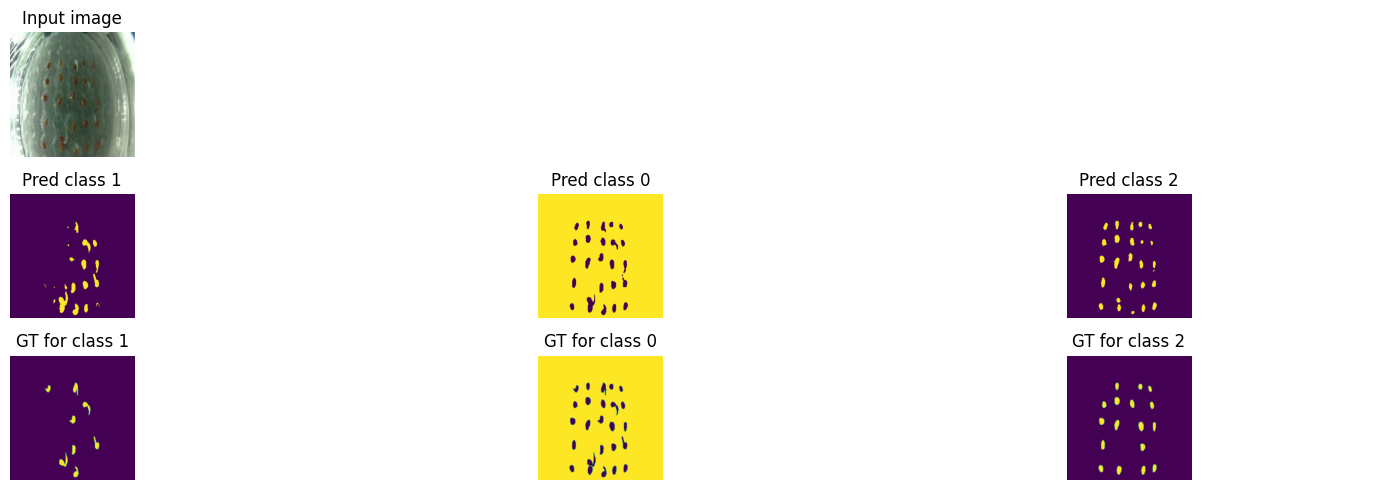

Train loss: 0.28921 | Time: 17m 9s | Val loss: 0.28515
Train_DICE_avg: 0.72545 | Train_Jaccard_avg: 0.65973 | Train_Sensitivity_avg: 0.72392 | Train_Specificity_avg: 0.96457 
Class 0 - Train_DICE: 0.99026 | Train_Jaccard: 0.98081 | Train_Sensitivity: 0.98662 | Train_Specificity: 0.90070 
Class 1 - Train_DICE: 0.34671 | Train_Jaccard: 0.26211 | Train_Sensitivity: 0.36360 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.83940 | Train_Jaccard: 0.73627 | Train_Sensitivity: 0.82153 | Train_Specificity: 0.99608 
Val_DICE_avg: 0.73135 | Val_Jaccard_avg: 0.67657 | Val_Sensitivity_avg: 0.73165 | Val_Specificity_avg: 0.95356 
Class 0 - Val_DICE: 0.99593 | Val_Jaccard: 0.99193 | Val_Sensitivity: 0.99633 | Val_Specificity: 0.86577 
Class 1 - Val_DICE: 0.33910 | Val_Jaccard: 0.26955 | Val_Sensitivity: 0.36131 | Val_Specificity: 0.99791 
Class 2 - Val_DICE: 0.85901 | Val_Jaccard: 0.76824 | Val_Sensitivity: 0.83731 | Val_Specificity: 0.99699 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.28130 | Time: 17m 58s | Val loss: 0.26133
Train_DICE_avg: 0.73608 | Train_Jaccard_avg: 0.67134 | Train_Sensitivity_avg: 0.74253 | Train_Specificity_avg: 0.96377 
Class 0 - Train_DICE: 0.99038 | Train_Jaccard: 0.98105 | Train_Sensitivity: 0.98701 | Train_Specificity: 0.89836 
Class 1 - Train_DICE: 0.37918 | Train_Jaccard: 0.29736 | Train_Sensitivity: 0.41951 | Train_Specificity: 0.99686 
Class 2 - Train_DICE: 0.83869 | Train_Jaccard: 0.73560 | Train_Sensitivity: 0.82108 | Train_Specificity: 0.99608 
Val_DICE_avg: 0.75585 | Val_Jaccard_avg: 0.70258 | Val_Sensitivity_avg: 0.76847 | Val_Specificity_avg: 0.95187 
Class 0 - Val_DICE: 0.99594 | Val_Jaccard: 0.99194 | Val_Sensitivity: 0.99611 | Val_Specificity: 0.86122 
Class 1 - Val_DICE: 0.41193 | Val_Jaccard: 0.34626 | Val_Sensitivity: 0.45887 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.85968 | Val_Jaccard: 0.76954 | Val_Sensitivity: 0.85044 | Val_Specificity: 0.99674 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.26549 | Time: 18m 47s | Val loss: 0.21639
Train_DICE_avg: 0.76036 | Train_Jaccard_avg: 0.69689 | Train_Sensitivity_avg: 0.77726 | Train_Specificity_avg: 0.96497 
Class 0 - Train_DICE: 0.99044 | Train_Jaccard: 0.98117 | Train_Sensitivity: 0.98686 | Train_Specificity: 0.90203 
Class 1 - Train_DICE: 0.44922 | Train_Jaccard: 0.37063 | Train_Sensitivity: 0.51891 | Train_Specificity: 0.99681 
Class 2 - Train_DICE: 0.84143 | Train_Jaccard: 0.73887 | Train_Sensitivity: 0.82601 | Train_Specificity: 0.99609 
Val_DICE_avg: 0.80000 | Val_Jaccard_avg: 0.74958 | Val_Sensitivity_avg: 0.84273 | Val_Specificity_avg: 0.95411 
Class 0 - Val_DICE: 0.99596 | Val_Jaccard: 0.99198 | Val_Sensitivity: 0.99613 | Val_Specificity: 0.86852 
Class 1 - Val_DICE: 0.54429 | Val_Jaccard: 0.48807 | Val_Sensitivity: 0.67305 | Val_Specificity: 0.99738 
Class 2 - Val_DICE: 0.85973 | Val_Jaccard: 0.76870 | Val_Sensitivity: 0.85902 | Val_Specificity: 0.99643 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.24249 | Time: 19m 35s | Val loss: 0.20815
Train_DICE_avg: 0.78777 | Train_Jaccard_avg: 0.72653 | Train_Sensitivity_avg: 0.82654 | Train_Specificity_avg: 0.96603 
Class 0 - Train_DICE: 0.99011 | Train_Jaccard: 0.98053 | Train_Sensitivity: 0.98624 | Train_Specificity: 0.90535 
Class 1 - Train_DICE: 0.53339 | Train_Jaccard: 0.46196 | Train_Sensitivity: 0.66879 | Train_Specificity: 0.99664 
Class 2 - Train_DICE: 0.83982 | Train_Jaccard: 0.73711 | Train_Sensitivity: 0.82461 | Train_Specificity: 0.99609 
Val_DICE_avg: 0.80839 | Val_Jaccard_avg: 0.75857 | Val_Sensitivity_avg: 0.84213 | Val_Specificity_avg: 0.95297 
Class 0 - Val_DICE: 0.99597 | Val_Jaccard: 0.99199 | Val_Sensitivity: 0.99625 | Val_Specificity: 0.86445 
Class 1 - Val_DICE: 0.56646 | Val_Jaccard: 0.50999 | Val_Sensitivity: 0.68834 | Val_Specificity: 0.99738 
Class 2 - Val_DICE: 0.86274 | Val_Jaccard: 0.77371 | Val_Sensitivity: 0.84181 | Val_Specificity: 0.99709 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.23909 | Time: 20m 24s | Val loss: 0.20665
Train_DICE_avg: 0.79318 | Train_Jaccard_avg: 0.73215 | Train_Sensitivity_avg: 0.82940 | Train_Specificity_avg: 0.96381 
Class 0 - Train_DICE: 0.99057 | Train_Jaccard: 0.98143 | Train_Sensitivity: 0.98770 | Train_Specificity: 0.89858 
Class 1 - Train_DICE: 0.54481 | Train_Jaccard: 0.47260 | Train_Sensitivity: 0.67258 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.84416 | Train_Jaccard: 0.74242 | Train_Sensitivity: 0.82793 | Train_Specificity: 0.99612 
Val_DICE_avg: 0.80777 | Val_Jaccard_avg: 0.75831 | Val_Sensitivity_avg: 0.84392 | Val_Specificity_avg: 0.95614 
Class 0 - Val_DICE: 0.99609 | Val_Jaccard: 0.99223 | Val_Sensitivity: 0.99645 | Val_Specificity: 0.87413 
Class 1 - Val_DICE: 0.56135 | Val_Jaccard: 0.50482 | Val_Sensitivity: 0.67256 | Val_Specificity: 0.99761 
Class 2 - Val_DICE: 0.86587 | Val_Jaccard: 0.77789 | Val_Sensitivity: 0.86274 | Val_Specificity: 0.99670 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


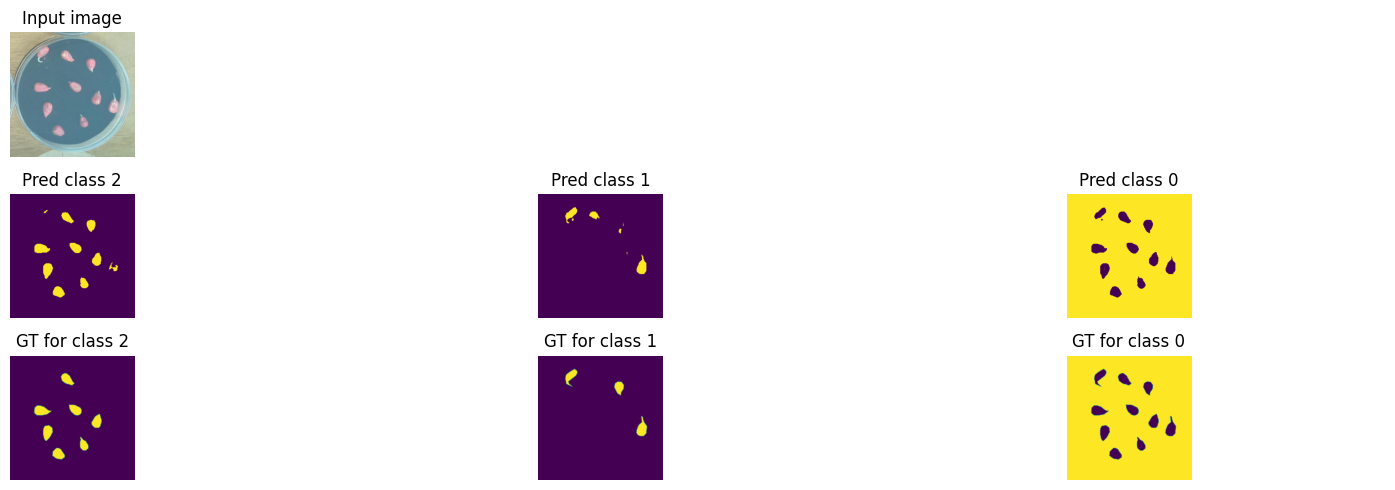

Train loss: 0.23211 | Time: 21m 14s | Val loss: 0.20383
Train_DICE_avg: 0.79656 | Train_Jaccard_avg: 0.73564 | Train_Sensitivity_avg: 0.83374 | Train_Specificity_avg: 0.96363 
Class 0 - Train_DICE: 0.99055 | Train_Jaccard: 0.98139 | Train_Sensitivity: 0.98794 | Train_Specificity: 0.89810 
Class 1 - Train_DICE: 0.55276 | Train_Jaccard: 0.48013 | Train_Sensitivity: 0.68032 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.84636 | Train_Jaccard: 0.74540 | Train_Sensitivity: 0.83296 | Train_Specificity: 0.99613 
Val_DICE_avg: 0.81014 | Val_Jaccard_avg: 0.76077 | Val_Sensitivity_avg: 0.84730 | Val_Specificity_avg: 0.95724 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99238 | Val_Sensitivity: 0.99633 | Val_Specificity: 0.87750 
Class 1 - Val_DICE: 0.56842 | Val_Jaccard: 0.51187 | Val_Sensitivity: 0.69977 | Val_Specificity: 0.99711 
Class 2 - Val_DICE: 0.86585 | Val_Jaccard: 0.77805 | Val_Sensitivity: 0.84579 | Val_Specificity: 0.99712 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.23013 | Time: 22m 3s | Val loss: 0.20328
Train_DICE_avg: 0.79736 | Train_Jaccard_avg: 0.73694 | Train_Sensitivity_avg: 0.83590 | Train_Specificity_avg: 0.96386 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98149 | Train_Sensitivity: 0.98793 | Train_Specificity: 0.89874 
Class 1 - Train_DICE: 0.55399 | Train_Jaccard: 0.48237 | Train_Sensitivity: 0.68694 | Train_Specificity: 0.99669 
Class 2 - Train_DICE: 0.84750 | Train_Jaccard: 0.74696 | Train_Sensitivity: 0.83283 | Train_Specificity: 0.99614 
Val_DICE_avg: 0.81058 | Val_Jaccard_avg: 0.76049 | Val_Sensitivity_avg: 0.84322 | Val_Specificity_avg: 0.95649 
Class 0 - Val_DICE: 0.99616 | Val_Jaccard: 0.99238 | Val_Sensitivity: 0.99657 | Val_Specificity: 0.87503 
Class 1 - Val_DICE: 0.56724 | Val_Jaccard: 0.50752 | Val_Sensitivity: 0.67518 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.86834 | Val_Jaccard: 0.78156 | Val_Sensitivity: 0.85791 | Val_Specificity: 0.99700 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.22754 | Time: 22m 53s | Val loss: 0.20444
Train_DICE_avg: 0.79988 | Train_Jaccard_avg: 0.73940 | Train_Sensitivity_avg: 0.83821 | Train_Specificity_avg: 0.96299 
Class 0 - Train_DICE: 0.99109 | Train_Jaccard: 0.98243 | Train_Sensitivity: 0.98893 | Train_Specificity: 0.89610 
Class 1 - Train_DICE: 0.55947 | Train_Jaccard: 0.48668 | Train_Sensitivity: 0.68973 | Train_Specificity: 0.99674 
Class 2 - Train_DICE: 0.84909 | Train_Jaccard: 0.74908 | Train_Sensitivity: 0.83597 | Train_Specificity: 0.99612 
Val_DICE_avg: 0.80922 | Val_Jaccard_avg: 0.75999 | Val_Sensitivity_avg: 0.84226 | Val_Specificity_avg: 0.95113 
Class 0 - Val_DICE: 0.99604 | Val_Jaccard: 0.99213 | Val_Sensitivity: 0.99691 | Val_Specificity: 0.85862 
Class 1 - Val_DICE: 0.56310 | Val_Jaccard: 0.50613 | Val_Sensitivity: 0.67510 | Val_Specificity: 0.99758 
Class 2 - Val_DICE: 0.86851 | Val_Jaccard: 0.78170 | Val_Sensitivity: 0.85477 | Val_Specificity: 0.99717 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.22609 | Time: 23m 42s | Val loss: 0.20085
Train_DICE_avg: 0.80324 | Train_Jaccard_avg: 0.74276 | Train_Sensitivity_avg: 0.83988 | Train_Specificity_avg: 0.96389 
Class 0 - Train_DICE: 0.99104 | Train_Jaccard: 0.98234 | Train_Sensitivity: 0.98871 | Train_Specificity: 0.89872 
Class 1 - Train_DICE: 0.56915 | Train_Jaccard: 0.49630 | Train_Sensitivity: 0.69514 | Train_Specificity: 0.99679 
Class 2 - Train_DICE: 0.84954 | Train_Jaccard: 0.74964 | Train_Sensitivity: 0.83578 | Train_Specificity: 0.99616 
Val_DICE_avg: 0.81329 | Val_Jaccard_avg: 0.76327 | Val_Sensitivity_avg: 0.84252 | Val_Specificity_avg: 0.95513 
Class 0 - Val_DICE: 0.99621 | Val_Jaccard: 0.99246 | Val_Sensitivity: 0.99674 | Val_Specificity: 0.87078 
Class 1 - Val_DICE: 0.57335 | Val_Jaccard: 0.51354 | Val_Sensitivity: 0.67389 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.87033 | Val_Jaccard: 0.78382 | Val_Sensitivity: 0.85692 | Val_Specificity: 0.99693 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.22375 | Time: 24m 32s | Val loss: 0.19938
Train_DICE_avg: 0.80474 | Train_Jaccard_avg: 0.74476 | Train_Sensitivity_avg: 0.84289 | Train_Specificity_avg: 0.96294 
Class 0 - Train_DICE: 0.99117 | Train_Jaccard: 0.98260 | Train_Sensitivity: 0.98917 | Train_Specificity: 0.89578 
Class 1 - Train_DICE: 0.57161 | Train_Jaccard: 0.49944 | Train_Sensitivity: 0.70120 | Train_Specificity: 0.99687 
Class 2 - Train_DICE: 0.85145 | Train_Jaccard: 0.75223 | Train_Sensitivity: 0.83831 | Train_Specificity: 0.99618 
Val_DICE_avg: 0.81395 | Val_Jaccard_avg: 0.76432 | Val_Sensitivity_avg: 0.84633 | Val_Specificity_avg: 0.95465 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99238 | Val_Sensitivity: 0.99688 | Val_Specificity: 0.86944 
Class 1 - Val_DICE: 0.57627 | Val_Jaccard: 0.51749 | Val_Sensitivity: 0.68279 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.86941 | Val_Jaccard: 0.78310 | Val_Sensitivity: 0.85932 | Val_Specificity: 0.99699 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


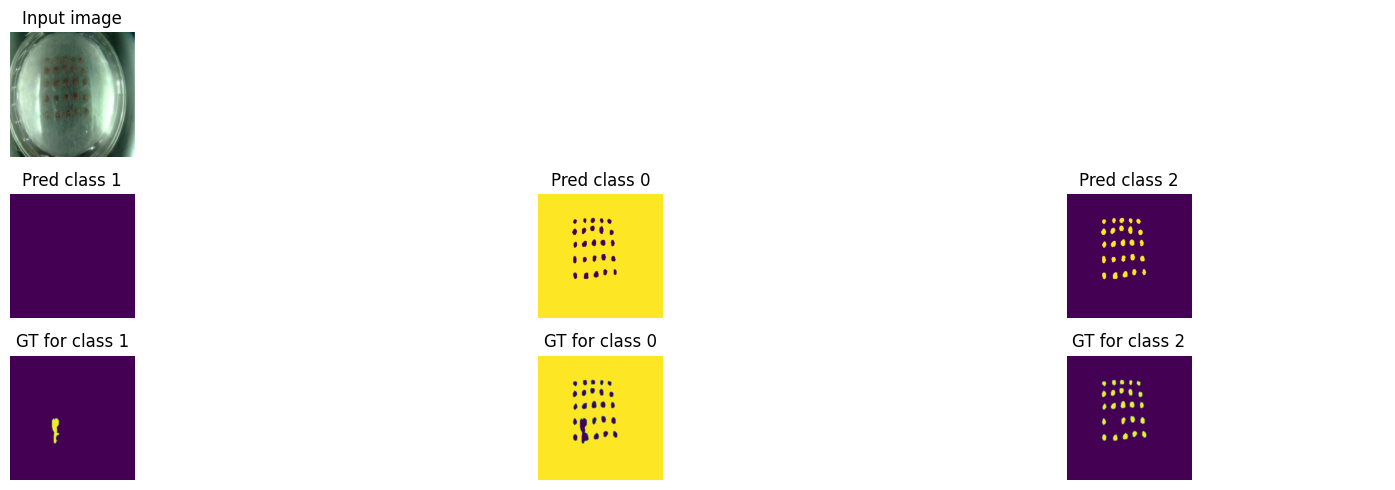

Train loss: 0.22436 | Time: 25m 22s | Val loss: 0.19812
Train_DICE_avg: 0.80371 | Train_Jaccard_avg: 0.74403 | Train_Sensitivity_avg: 0.84698 | Train_Specificity_avg: 0.96383 
Class 0 - Train_DICE: 0.99108 | Train_Jaccard: 0.98242 | Train_Sensitivity: 0.98891 | Train_Specificity: 0.89859 
Class 1 - Train_DICE: 0.56886 | Train_Jaccard: 0.49737 | Train_Sensitivity: 0.71298 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.85119 | Train_Jaccard: 0.75228 | Train_Sensitivity: 0.83907 | Train_Specificity: 0.99618 
Val_DICE_avg: 0.81513 | Val_Jaccard_avg: 0.76493 | Val_Sensitivity_avg: 0.84686 | Val_Specificity_avg: 0.95490 
Class 0 - Val_DICE: 0.99618 | Val_Jaccard: 0.99240 | Val_Sensitivity: 0.99695 | Val_Specificity: 0.87011 
Class 1 - Val_DICE: 0.57770 | Val_Jaccard: 0.51687 | Val_Sensitivity: 0.68124 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.87151 | Val_Jaccard: 0.78551 | Val_Sensitivity: 0.86238 | Val_Specificity: 0.99701 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.22085 | Time: 26m 11s | Val loss: 0.19806
Train_DICE_avg: 0.80832 | Train_Jaccard_avg: 0.74839 | Train_Sensitivity_avg: 0.84341 | Train_Specificity_avg: 0.96333 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98297 | Train_Sensitivity: 0.98952 | Train_Specificity: 0.89692 
Class 1 - Train_DICE: 0.57909 | Train_Jaccard: 0.50558 | Train_Sensitivity: 0.69794 | Train_Specificity: 0.99687 
Class 2 - Train_DICE: 0.85450 | Train_Jaccard: 0.75662 | Train_Sensitivity: 0.84278 | Train_Specificity: 0.99619 
Val_DICE_avg: 0.81499 | Val_Jaccard_avg: 0.76545 | Val_Sensitivity_avg: 0.84460 | Val_Specificity_avg: 0.95373 
Class 0 - Val_DICE: 0.99618 | Val_Jaccard: 0.99242 | Val_Sensitivity: 0.99687 | Val_Specificity: 0.86683 
Class 1 - Val_DICE: 0.57824 | Val_Jaccard: 0.51955 | Val_Sensitivity: 0.66677 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.87056 | Val_Jaccard: 0.78437 | Val_Sensitivity: 0.87017 | Val_Specificity: 0.99661 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.21862 | Time: 27m 1s | Val loss: 0.19656
Train_DICE_avg: 0.80792 | Train_Jaccard_avg: 0.74804 | Train_Sensitivity_avg: 0.84333 | Train_Specificity_avg: 0.96289 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98298 | Train_Sensitivity: 0.98953 | Train_Specificity: 0.89567 
Class 1 - Train_DICE: 0.57701 | Train_Jaccard: 0.50319 | Train_Sensitivity: 0.69599 | Train_Specificity: 0.99686 
Class 2 - Train_DICE: 0.85539 | Train_Jaccard: 0.75794 | Train_Sensitivity: 0.84446 | Train_Specificity: 0.99615 
Val_DICE_avg: 0.81736 | Val_Jaccard_avg: 0.76779 | Val_Sensitivity_avg: 0.85099 | Val_Specificity_avg: 0.95845 
Class 0 - Val_DICE: 0.99636 | Val_Jaccard: 0.99276 | Val_Sensitivity: 0.99681 | Val_Specificity: 0.88137 
Class 1 - Val_DICE: 0.58326 | Val_Jaccard: 0.52438 | Val_Sensitivity: 0.67572 | Val_Specificity: 0.99773 
Class 2 - Val_DICE: 0.87247 | Val_Jaccard: 0.78622 | Val_Sensitivity: 0.88045 | Val_Specificity: 0.99625 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.21952 | Time: 27m 51s | Val loss: 0.19456
Train_DICE_avg: 0.80800 | Train_Jaccard_avg: 0.74800 | Train_Sensitivity_avg: 0.84452 | Train_Specificity_avg: 0.96377 
Class 0 - Train_DICE: 0.99135 | Train_Jaccard: 0.98293 | Train_Sensitivity: 0.98913 | Train_Specificity: 0.89836 
Class 1 - Train_DICE: 0.57709 | Train_Jaccard: 0.50284 | Train_Sensitivity: 0.69939 | Train_Specificity: 0.99682 
Class 2 - Train_DICE: 0.85556 | Train_Jaccard: 0.75822 | Train_Sensitivity: 0.84503 | Train_Specificity: 0.99614 
Val_DICE_avg: 0.81925 | Val_Jaccard_avg: 0.77022 | Val_Sensitivity_avg: 0.85494 | Val_Specificity_avg: 0.95582 
Class 0 - Val_DICE: 0.99628 | Val_Jaccard: 0.99261 | Val_Sensitivity: 0.99684 | Val_Specificity: 0.87308 
Class 1 - Val_DICE: 0.58859 | Val_Jaccard: 0.53020 | Val_Sensitivity: 0.69722 | Val_Specificity: 0.99751 
Class 2 - Val_DICE: 0.87288 | Val_Jaccard: 0.78787 | Val_Sensitivity: 0.87076 | Val_Specificity: 0.99686 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.21730 | Time: 28m 40s | Val loss: 0.19307
Train_DICE_avg: 0.81290 | Train_Jaccard_avg: 0.75382 | Train_Sensitivity_avg: 0.85191 | Train_Specificity_avg: 0.96348 
Class 0 - Train_DICE: 0.99141 | Train_Jaccard: 0.98305 | Train_Sensitivity: 0.98976 | Train_Specificity: 0.89732 
Class 1 - Train_DICE: 0.59025 | Train_Jaccard: 0.51817 | Train_Sensitivity: 0.71958 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.85704 | Train_Jaccard: 0.76023 | Train_Sensitivity: 0.84640 | Train_Specificity: 0.99624 
Val_DICE_avg: 0.82024 | Val_Jaccard_avg: 0.77114 | Val_Sensitivity_avg: 0.84898 | Val_Specificity_avg: 0.95796 
Class 0 - Val_DICE: 0.99632 | Val_Jaccard: 0.99269 | Val_Sensitivity: 0.99686 | Val_Specificity: 0.87931 
Class 1 - Val_DICE: 0.58819 | Val_Jaccard: 0.52812 | Val_Sensitivity: 0.67168 | Val_Specificity: 0.99784 
Class 2 - Val_DICE: 0.87622 | Val_Jaccard: 0.79262 | Val_Sensitivity: 0.87841 | Val_Specificity: 0.99675 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


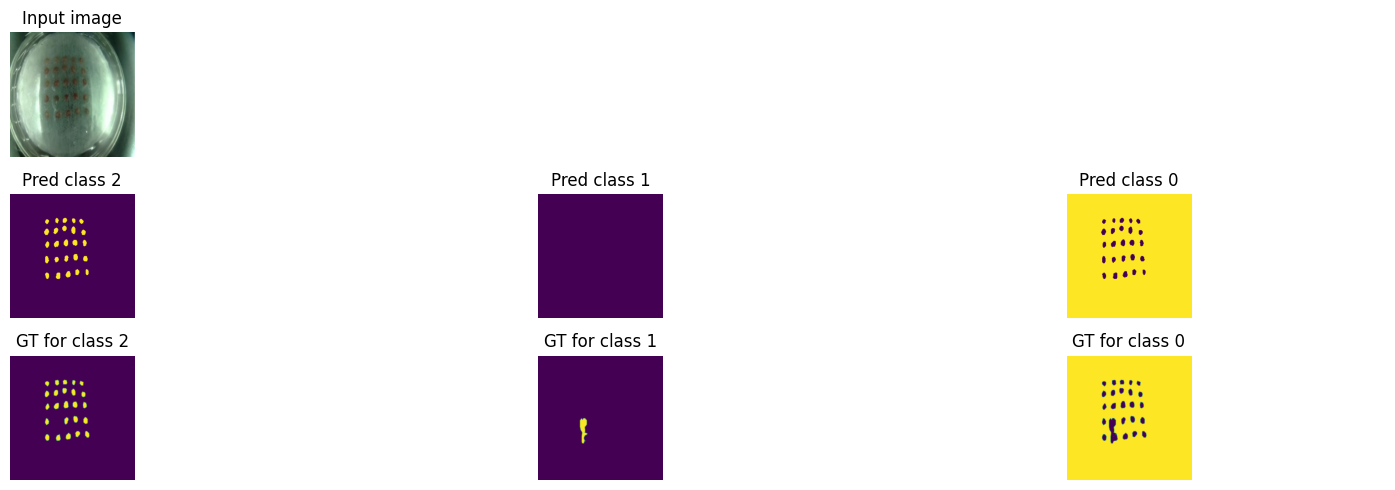

Train loss: 0.21163 | Time: 29m 31s | Val loss: 0.19296
Train_DICE_avg: 0.81699 | Train_Jaccard_avg: 0.75798 | Train_Sensitivity_avg: 0.85559 | Train_Specificity_avg: 0.96324 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98324 | Train_Sensitivity: 0.98999 | Train_Specificity: 0.89651 
Class 1 - Train_DICE: 0.60111 | Train_Jaccard: 0.52841 | Train_Sensitivity: 0.72899 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.85836 | Train_Jaccard: 0.76228 | Train_Sensitivity: 0.84778 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.82012 | Val_Jaccard_avg: 0.77200 | Val_Sensitivity_avg: 0.85643 | Val_Specificity_avg: 0.95724 
Class 0 - Val_DICE: 0.99636 | Val_Jaccard: 0.99276 | Val_Sensitivity: 0.99691 | Val_Specificity: 0.87724 
Class 1 - Val_DICE: 0.58704 | Val_Jaccard: 0.52937 | Val_Sensitivity: 0.69734 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.87696 | Val_Jaccard: 0.79388 | Val_Sensitivity: 0.87503 | Val_Specificity: 0.99692 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.21207 | Time: 30m 20s | Val loss: 0.19457
Train_DICE_avg: 0.81740 | Train_Jaccard_avg: 0.75871 | Train_Sensitivity_avg: 0.85790 | Train_Specificity_avg: 0.96316 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98298 | Train_Sensitivity: 0.98961 | Train_Specificity: 0.89631 
Class 1 - Train_DICE: 0.60193 | Train_Jaccard: 0.53029 | Train_Sensitivity: 0.73585 | Train_Specificity: 0.99694 
Class 2 - Train_DICE: 0.85891 | Train_Jaccard: 0.76286 | Train_Sensitivity: 0.84823 | Train_Specificity: 0.99622 
Val_DICE_avg: 0.81974 | Val_Jaccard_avg: 0.77136 | Val_Sensitivity_avg: 0.85397 | Val_Specificity_avg: 0.95423 
Class 0 - Val_DICE: 0.99627 | Val_Jaccard: 0.99258 | Val_Sensitivity: 0.99711 | Val_Specificity: 0.86810 
Class 1 - Val_DICE: 0.58599 | Val_Jaccard: 0.52812 | Val_Sensitivity: 0.69168 | Val_Specificity: 0.99768 
Class 2 - Val_DICE: 0.87696 | Val_Jaccard: 0.79336 | Val_Sensitivity: 0.87313 | Val_Specificity: 0.99693 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.20805 | Time: 31m 10s | Val loss: 0.19150
Train_DICE_avg: 0.82005 | Train_Jaccard_avg: 0.76087 | Train_Sensitivity_avg: 0.85391 | Train_Specificity_avg: 0.96329 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98357 | Train_Sensitivity: 0.99010 | Train_Specificity: 0.89647 
Class 1 - Train_DICE: 0.60807 | Train_Jaccard: 0.53391 | Train_Sensitivity: 0.72179 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.86041 | Train_Jaccard: 0.76515 | Train_Sensitivity: 0.84983 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.82160 | Val_Jaccard_avg: 0.77288 | Val_Sensitivity_avg: 0.85381 | Val_Specificity_avg: 0.95678 
Class 0 - Val_DICE: 0.99633 | Val_Jaccard: 0.99270 | Val_Sensitivity: 0.99709 | Val_Specificity: 0.87568 
Class 1 - Val_DICE: 0.58850 | Val_Jaccard: 0.52822 | Val_Sensitivity: 0.68547 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.87999 | Val_Jaccard: 0.79771 | Val_Sensitivity: 0.87886 | Val_Specificity: 0.99700 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.20885 | Time: 31m 59s | Val loss: 0.19309
Train_DICE_avg: 0.81912 | Train_Jaccard_avg: 0.76029 | Train_Sensitivity_avg: 0.85282 | Train_Specificity_avg: 0.96468 
Class 0 - Train_DICE: 0.99160 | Train_Jaccard: 0.98344 | Train_Sensitivity: 0.98981 | Train_Specificity: 0.90063 
Class 1 - Train_DICE: 0.60354 | Train_Jaccard: 0.52988 | Train_Sensitivity: 0.71622 | Train_Specificity: 0.99711 
Class 2 - Train_DICE: 0.86221 | Train_Jaccard: 0.76756 | Train_Sensitivity: 0.85243 | Train_Specificity: 0.99630 
Val_DICE_avg: 0.82079 | Val_Jaccard_avg: 0.77174 | Val_Sensitivity_avg: 0.85674 | Val_Specificity_avg: 0.95751 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99283 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.87815 
Class 1 - Val_DICE: 0.58870 | Val_Jaccard: 0.52845 | Val_Sensitivity: 0.69733 | Val_Specificity: 0.99750 
Class 2 - Val_DICE: 0.87727 | Val_Jaccard: 0.79395 | Val_Sensitivity: 0.87584 | Val_Specificity: 0.99688 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.20383 | Time: 32m 49s | Val loss: 0.15373
Train_DICE_avg: 0.82604 | Train_Jaccard_avg: 0.76725 | Train_Sensitivity_avg: 0.86583 | Train_Specificity_avg: 0.96346 
Class 0 - Train_DICE: 0.99162 | Train_Jaccard: 0.98347 | Train_Sensitivity: 0.99014 | Train_Specificity: 0.89719 
Class 1 - Train_DICE: 0.62553 | Train_Jaccard: 0.55240 | Train_Sensitivity: 0.75557 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.86098 | Train_Jaccard: 0.76588 | Train_Sensitivity: 0.85177 | Train_Specificity: 0.99625 
Val_DICE_avg: 0.85966 | Val_Jaccard_avg: 0.81009 | Val_Sensitivity_avg: 0.89652 | Val_Specificity_avg: 0.95705 
Class 0 - Val_DICE: 0.99635 | Val_Jaccard: 0.99274 | Val_Sensitivity: 0.99704 | Val_Specificity: 0.87706 
Class 1 - Val_DICE: 0.71274 | Val_Jaccard: 0.65250 | Val_Sensitivity: 0.80435 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.86988 | Val_Jaccard: 0.78501 | Val_Sensitivity: 0.88819 | Val_Specificity: 0.99642 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


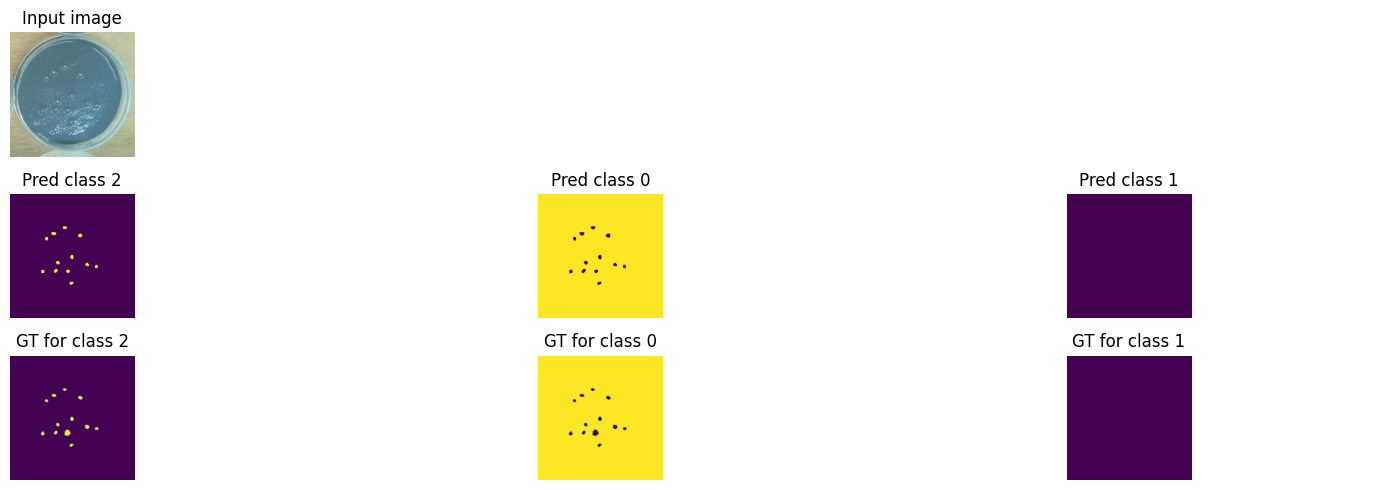

Train loss: 0.19858 | Time: 33m 39s | Val loss: 0.15582
Train_DICE_avg: 0.83431 | Train_Jaccard_avg: 0.77588 | Train_Sensitivity_avg: 0.87575 | Train_Specificity_avg: 0.96388 
Class 0 - Train_DICE: 0.99161 | Train_Jaccard: 0.98344 | Train_Sensitivity: 0.98989 | Train_Specificity: 0.89855 
Class 1 - Train_DICE: 0.65066 | Train_Jaccard: 0.57840 | Train_Sensitivity: 0.78649 | Train_Specificity: 0.99683 
Class 2 - Train_DICE: 0.86065 | Train_Jaccard: 0.76580 | Train_Sensitivity: 0.85089 | Train_Specificity: 0.99627 
Val_DICE_avg: 0.85828 | Val_Jaccard_avg: 0.80926 | Val_Sensitivity_avg: 0.89618 | Val_Specificity_avg: 0.95776 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99282 | Val_Sensitivity: 0.99687 | Val_Specificity: 0.87925 
Class 1 - Val_DICE: 0.70063 | Val_Jaccard: 0.64052 | Val_Sensitivity: 0.80799 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.87783 | Val_Jaccard: 0.79443 | Val_Sensitivity: 0.88367 | Val_Specificity: 0.99656 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.19554 | Time: 34m 28s | Val loss: 0.14791
Train_DICE_avg: 0.83840 | Train_Jaccard_avg: 0.78019 | Train_Sensitivity_avg: 0.88149 | Train_Specificity_avg: 0.96431 
Class 0 - Train_DICE: 0.99184 | Train_Jaccard: 0.98389 | Train_Sensitivity: 0.99026 | Train_Specificity: 0.89972 
Class 1 - Train_DICE: 0.66142 | Train_Jaccard: 0.58925 | Train_Sensitivity: 0.80234 | Train_Specificity: 0.99688 
Class 2 - Train_DICE: 0.86194 | Train_Jaccard: 0.76744 | Train_Sensitivity: 0.85185 | Train_Specificity: 0.99633 
Val_DICE_avg: 0.86542 | Val_Jaccard_avg: 0.81647 | Val_Sensitivity_avg: 0.90024 | Val_Specificity_avg: 0.95780 
Class 0 - Val_DICE: 0.99637 | Val_Jaccard: 0.99278 | Val_Sensitivity: 0.99690 | Val_Specificity: 0.87890 
Class 1 - Val_DICE: 0.71932 | Val_Jaccard: 0.65815 | Val_Sensitivity: 0.83015 | Val_Specificity: 0.99741 
Class 2 - Val_DICE: 0.88056 | Val_Jaccard: 0.79846 | Val_Sensitivity: 0.87366 | Val_Specificity: 0.99709 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.19392 | Time: 35m 18s | Val loss: 0.14800
Train_DICE_avg: 0.83882 | Train_Jaccard_avg: 0.78072 | Train_Sensitivity_avg: 0.87985 | Train_Specificity_avg: 0.96415 
Class 0 - Train_DICE: 0.99191 | Train_Jaccard: 0.98403 | Train_Sensitivity: 0.99045 | Train_Specificity: 0.89920 
Class 1 - Train_DICE: 0.66173 | Train_Jaccard: 0.58949 | Train_Sensitivity: 0.79562 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.86283 | Train_Jaccard: 0.76863 | Train_Sensitivity: 0.85349 | Train_Specificity: 0.99631 
Val_DICE_avg: 0.86519 | Val_Jaccard_avg: 0.81601 | Val_Sensitivity_avg: 0.89846 | Val_Specificity_avg: 0.95872 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99286 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.88171 
Class 1 - Val_DICE: 0.71817 | Val_Jaccard: 0.65626 | Val_Sensitivity: 0.81661 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.88099 | Val_Jaccard: 0.79890 | Val_Sensitivity: 0.88176 | Val_Specificity: 0.99685 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


Train loss: 0.19282 | Time: 36m 8s | Val loss: 0.14703
Train_DICE_avg: 0.83766 | Train_Jaccard_avg: 0.77926 | Train_Sensitivity_avg: 0.87549 | Train_Specificity_avg: 0.96499 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98421 | Train_Sensitivity: 0.99043 | Train_Specificity: 0.90170 
Class 1 - Train_DICE: 0.65690 | Train_Jaccard: 0.58326 | Train_Sensitivity: 0.78009 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.86408 | Train_Jaccard: 0.77033 | Train_Sensitivity: 0.85595 | Train_Specificity: 0.99626 
Val_DICE_avg: 0.86616 | Val_Jaccard_avg: 0.81836 | Val_Sensitivity_avg: 0.90206 | Val_Specificity_avg: 0.95819 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99285 | Val_Sensitivity: 0.99698 | Val_Specificity: 0.88008 
Class 1 - Val_DICE: 0.72121 | Val_Jaccard: 0.66297 | Val_Sensitivity: 0.82876 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.88088 | Val_Jaccard: 0.79926 | Val_Sensitivity: 0.88044 | Val_Specificity: 0.99694 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.19269 | Time: 36m 56s | Val loss: 0.14979
Train_DICE_avg: 0.83841 | Train_Jaccard_avg: 0.77992 | Train_Sensitivity_avg: 0.87675 | Train_Specificity_avg: 0.96501 
Class 0 - Train_DICE: 0.99170 | Train_Jaccard: 0.98363 | Train_Sensitivity: 0.98996 | Train_Specificity: 0.90173 
Class 1 - Train_DICE: 0.65922 | Train_Jaccard: 0.58557 | Train_Sensitivity: 0.78471 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.86431 | Train_Jaccard: 0.77056 | Train_Sensitivity: 0.85556 | Train_Specificity: 0.99633 
Val_DICE_avg: 0.86326 | Val_Jaccard_avg: 0.81452 | Val_Sensitivity_avg: 0.90163 | Val_Specificity_avg: 0.95892 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99292 | Val_Sensitivity: 0.99687 | Val_Specificity: 0.88269 
Class 1 - Val_DICE: 0.71548 | Val_Jaccard: 0.65567 | Val_Sensitivity: 0.81704 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.87787 | Val_Jaccard: 0.79496 | Val_Sensitivity: 0.89098 | Val_Specificity: 0.99653 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


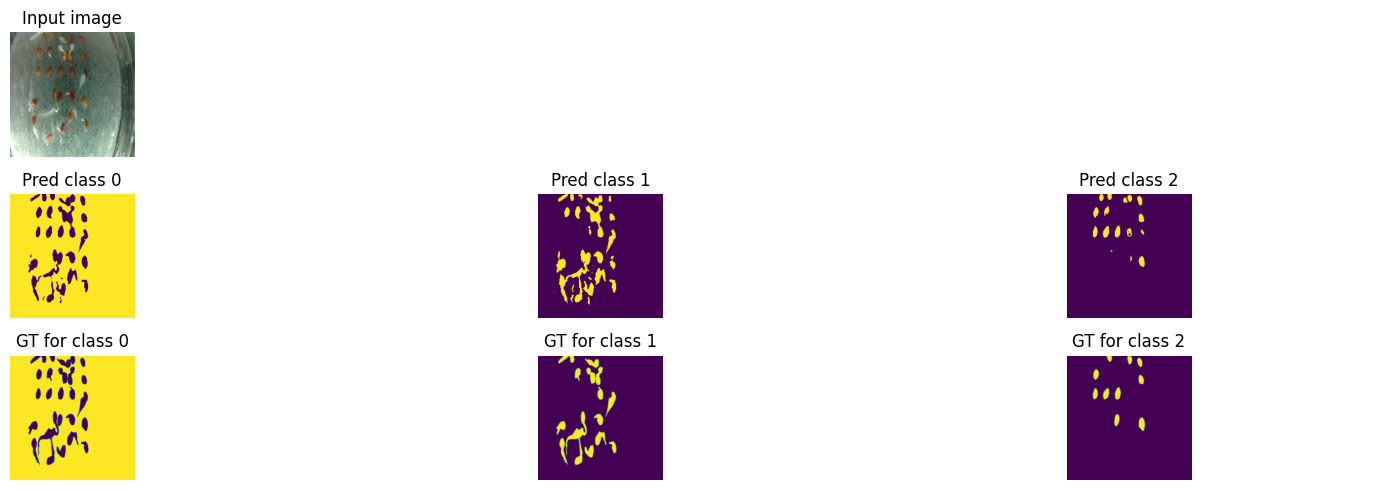

Train loss: 0.19217 | Time: 37m 46s | Val loss: 0.14414
Train_DICE_avg: 0.84052 | Train_Jaccard_avg: 0.78250 | Train_Sensitivity_avg: 0.87889 | Train_Specificity_avg: 0.96437 
Class 0 - Train_DICE: 0.99196 | Train_Jaccard: 0.98413 | Train_Sensitivity: 0.99063 | Train_Specificity: 0.89981 
Class 1 - Train_DICE: 0.66474 | Train_Jaccard: 0.59171 | Train_Sensitivity: 0.78947 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.86486 | Train_Jaccard: 0.77166 | Train_Sensitivity: 0.85658 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.86932 | Val_Jaccard_avg: 0.82021 | Val_Sensitivity_avg: 0.89944 | Val_Specificity_avg: 0.95799 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99285 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.87948 
Class 1 - Val_DICE: 0.73093 | Val_Jaccard: 0.66905 | Val_Sensitivity: 0.81520 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.88062 | Val_Jaccard: 0.79874 | Val_Sensitivity: 0.88612 | Val_Specificity: 0.99672 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.19188 | Time: 38m 35s | Val loss: 0.14580
Train_DICE_avg: 0.83948 | Train_Jaccard_avg: 0.78139 | Train_Sensitivity_avg: 0.87730 | Train_Specificity_avg: 0.96398 
Class 0 - Train_DICE: 0.99180 | Train_Jaccard: 0.98381 | Train_Sensitivity: 0.99039 | Train_Specificity: 0.89854 
Class 1 - Train_DICE: 0.66177 | Train_Jaccard: 0.58877 | Train_Sensitivity: 0.78555 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86489 | Train_Jaccard: 0.77159 | Train_Sensitivity: 0.85596 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.86867 | Val_Jaccard_avg: 0.81989 | Val_Sensitivity_avg: 0.90060 | Val_Specificity_avg: 0.95898 
Class 0 - Val_DICE: 0.99648 | Val_Jaccard: 0.99300 | Val_Sensitivity: 0.99696 | Val_Specificity: 0.88250 
Class 1 - Val_DICE: 0.72822 | Val_Jaccard: 0.66717 | Val_Sensitivity: 0.82061 | Val_Specificity: 0.99771 
Class 2 - Val_DICE: 0.88131 | Val_Jaccard: 0.79949 | Val_Sensitivity: 0.88422 | Val_Specificity: 0.99674 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.18994 | Time: 39m 24s | Val loss: 0.14865
Train_DICE_avg: 0.84342 | Train_Jaccard_avg: 0.78538 | Train_Sensitivity_avg: 0.88238 | Train_Specificity_avg: 0.96427 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98376 | Train_Sensitivity: 0.99031 | Train_Specificity: 0.89946 
Class 1 - Train_DICE: 0.67230 | Train_Jaccard: 0.59894 | Train_Sensitivity: 0.79915 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.86619 | Train_Jaccard: 0.77343 | Train_Sensitivity: 0.85769 | Train_Specificity: 0.99633 
Val_DICE_avg: 0.86443 | Val_Jaccard_avg: 0.81605 | Val_Sensitivity_avg: 0.90387 | Val_Specificity_avg: 0.96003 
Class 0 - Val_DICE: 0.99648 | Val_Jaccard: 0.99300 | Val_Sensitivity: 0.99688 | Val_Specificity: 0.88589 
Class 1 - Val_DICE: 0.71657 | Val_Jaccard: 0.65720 | Val_Sensitivity: 0.82920 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.88025 | Val_Jaccard: 0.79793 | Val_Sensitivity: 0.88552 | Val_Specificity: 0.99676 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.18738 | Time: 40m 14s | Val loss: 0.14671
Train_DICE_avg: 0.84353 | Train_Jaccard_avg: 0.78551 | Train_Sensitivity_avg: 0.88239 | Train_Specificity_avg: 0.96372 
Class 0 - Train_DICE: 0.99186 | Train_Jaccard: 0.98394 | Train_Sensitivity: 0.99044 | Train_Specificity: 0.89775 
Class 1 - Train_DICE: 0.67282 | Train_Jaccard: 0.59935 | Train_Sensitivity: 0.79916 | Train_Specificity: 0.99700 
Class 2 - Train_DICE: 0.86591 | Train_Jaccard: 0.77322 | Train_Sensitivity: 0.85759 | Train_Specificity: 0.99641 
Val_DICE_avg: 0.86639 | Val_Jaccard_avg: 0.81782 | Val_Sensitivity_avg: 0.90035 | Val_Specificity_avg: 0.95699 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99710 | Val_Specificity: 0.87652 
Class 1 - Val_DICE: 0.72377 | Val_Jaccard: 0.66364 | Val_Sensitivity: 0.82247 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.87898 | Val_Jaccard: 0.79691 | Val_Sensitivity: 0.88148 | Val_Specificity: 0.99683 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.18818 | Time: 41m 3s | Val loss: 0.14370
Train_DICE_avg: 0.84529 | Train_Jaccard_avg: 0.78728 | Train_Sensitivity_avg: 0.88197 | Train_Specificity_avg: 0.96411 
Class 0 - Train_DICE: 0.99206 | Train_Jaccard: 0.98432 | Train_Sensitivity: 0.99074 | Train_Specificity: 0.89884 
Class 1 - Train_DICE: 0.67743 | Train_Jaccard: 0.60369 | Train_Sensitivity: 0.79660 | Train_Specificity: 0.99713 
Class 2 - Train_DICE: 0.86639 | Train_Jaccard: 0.77385 | Train_Sensitivity: 0.85856 | Train_Specificity: 0.99637 
Val_DICE_avg: 0.86910 | Val_Jaccard_avg: 0.81994 | Val_Sensitivity_avg: 0.89883 | Val_Specificity_avg: 0.95843 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99293 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.88090 
Class 1 - Val_DICE: 0.73015 | Val_Jaccard: 0.66764 | Val_Sensitivity: 0.80879 | Val_Specificity: 0.99778 
Class 2 - Val_DICE: 0.88072 | Val_Jaccard: 0.79925 | Val_Sensitivity: 0.89065 | Val_Specificity: 0.99662 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


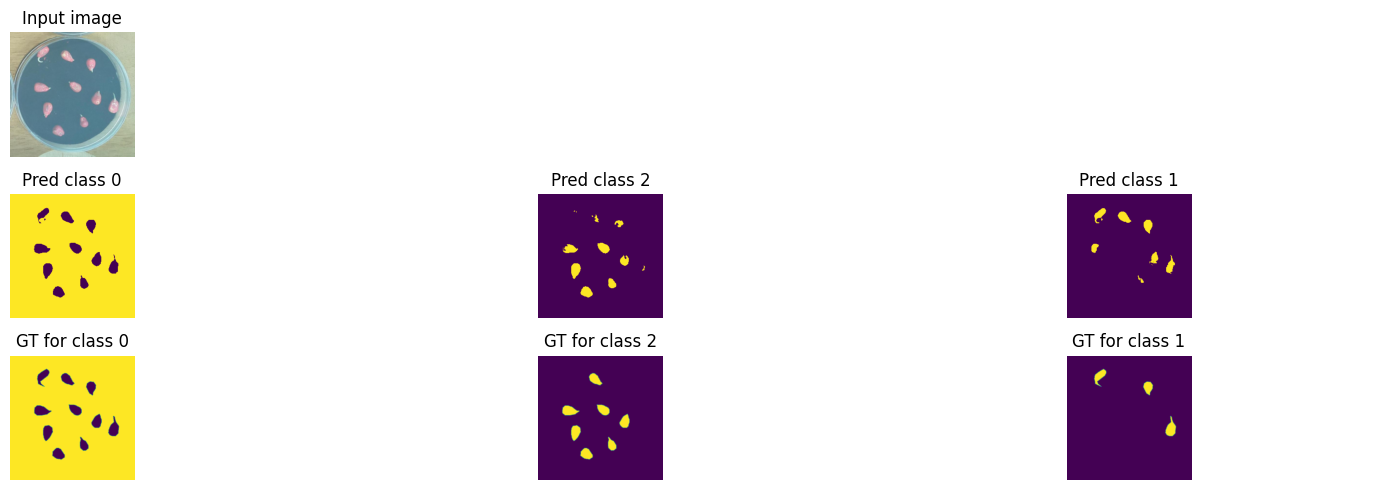

Train loss: 0.18853 | Time: 41m 54s | Val loss: 0.14248
Train_DICE_avg: 0.84473 | Train_Jaccard_avg: 0.78698 | Train_Sensitivity_avg: 0.88417 | Train_Specificity_avg: 0.96591 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98377 | Train_Sensitivity: 0.98988 | Train_Specificity: 0.90440 
Class 1 - Train_DICE: 0.67538 | Train_Jaccard: 0.60253 | Train_Sensitivity: 0.80205 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86704 | Train_Jaccard: 0.77464 | Train_Sensitivity: 0.86057 | Train_Specificity: 0.99629 
Val_DICE_avg: 0.87065 | Val_Jaccard_avg: 0.82186 | Val_Sensitivity_avg: 0.90249 | Val_Specificity_avg: 0.95995 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99689 | Val_Specificity: 0.88549 
Class 1 - Val_DICE: 0.73394 | Val_Jaccard: 0.67227 | Val_Sensitivity: 0.82022 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.88153 | Val_Jaccard: 0.80029 | Val_Sensitivity: 0.89036 | Val_Specificity: 0.99666 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.18973 | Time: 42m 44s | Val loss: 0.14212
Train_DICE_avg: 0.84463 | Train_Jaccard_avg: 0.78691 | Train_Sensitivity_avg: 0.88192 | Train_Specificity_avg: 0.96479 
Class 0 - Train_DICE: 0.99206 | Train_Jaccard: 0.98431 | Train_Sensitivity: 0.99080 | Train_Specificity: 0.90092 
Class 1 - Train_DICE: 0.67385 | Train_Jaccard: 0.60037 | Train_Sensitivity: 0.79537 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.86797 | Train_Jaccard: 0.77604 | Train_Sensitivity: 0.85959 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.87100 | Val_Jaccard_avg: 0.82248 | Val_Sensitivity_avg: 0.90430 | Val_Specificity_avg: 0.95941 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.88381 
Class 1 - Val_DICE: 0.73439 | Val_Jaccard: 0.67313 | Val_Sensitivity: 0.82517 | Val_Specificity: 0.99768 
Class 2 - Val_DICE: 0.88213 | Val_Jaccard: 0.80131 | Val_Sensitivity: 0.89073 | Val_Specificity: 0.99675 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.18668 | Time: 43m 34s | Val loss: 0.14253
Train_DICE_avg: 0.84338 | Train_Jaccard_avg: 0.78564 | Train_Sensitivity_avg: 0.87913 | Train_Specificity_avg: 0.96447 
Class 0 - Train_DICE: 0.99199 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.99078 | Train_Specificity: 0.89989 
Class 1 - Train_DICE: 0.66917 | Train_Jaccard: 0.59532 | Train_Sensitivity: 0.78432 | Train_Specificity: 0.99714 
Class 2 - Train_DICE: 0.86899 | Train_Jaccard: 0.77743 | Train_Sensitivity: 0.86229 | Train_Specificity: 0.99638 
Val_DICE_avg: 0.87069 | Val_Jaccard_avg: 0.82230 | Val_Sensitivity_avg: 0.90311 | Val_Specificity_avg: 0.95919 
Class 0 - Val_DICE: 0.99648 | Val_Jaccard: 0.99300 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.88311 
Class 1 - Val_DICE: 0.73265 | Val_Jaccard: 0.67188 | Val_Sensitivity: 0.82610 | Val_Specificity: 0.99761 
Class 2 - Val_DICE: 0.88293 | Val_Jaccard: 0.80202 | Val_Sensitivity: 0.88625 | Val_Specificity: 0.99686 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.18319 | Time: 44m 24s | Val loss: 0.14228
Train_DICE_avg: 0.84547 | Train_Jaccard_avg: 0.78743 | Train_Sensitivity_avg: 0.87829 | Train_Specificity_avg: 0.96472 
Class 0 - Train_DICE: 0.99193 | Train_Jaccard: 0.98407 | Train_Sensitivity: 0.99061 | Train_Specificity: 0.90062 
Class 1 - Train_DICE: 0.67678 | Train_Jaccard: 0.60255 | Train_Sensitivity: 0.78364 | Train_Specificity: 0.99718 
Class 2 - Train_DICE: 0.86769 | Train_Jaccard: 0.77567 | Train_Sensitivity: 0.86061 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.87099 | Val_Jaccard_avg: 0.82267 | Val_Sensitivity_avg: 0.90283 | Val_Specificity_avg: 0.95879 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99298 | Val_Sensitivity: 0.99704 | Val_Specificity: 0.88178 
Class 1 - Val_DICE: 0.73334 | Val_Jaccard: 0.67222 | Val_Sensitivity: 0.82234 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.88316 | Val_Jaccard: 0.80281 | Val_Sensitivity: 0.88910 | Val_Specificity: 0.99691 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.18589 | Time: 45m 14s | Val loss: 0.14120
Train_DICE_avg: 0.84583 | Train_Jaccard_avg: 0.78789 | Train_Sensitivity_avg: 0.87879 | Train_Specificity_avg: 0.96439 
Class 0 - Train_DICE: 0.99223 | Train_Jaccard: 0.98466 | Train_Sensitivity: 0.99104 | Train_Specificity: 0.89957 
Class 1 - Train_DICE: 0.67607 | Train_Jaccard: 0.60124 | Train_Sensitivity: 0.78331 | Train_Specificity: 0.99720 
Class 2 - Train_DICE: 0.86917 | Train_Jaccard: 0.77777 | Train_Sensitivity: 0.86203 | Train_Specificity: 0.99640 
Val_DICE_avg: 0.87187 | Val_Jaccard_avg: 0.82306 | Val_Sensitivity_avg: 0.90135 | Val_Specificity_avg: 0.95869 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99707 | Val_Specificity: 0.88152 
Class 1 - Val_DICE: 0.73618 | Val_Jaccard: 0.67370 | Val_Sensitivity: 0.81382 | Val_Specificity: 0.99781 
Class 2 - Val_DICE: 0.88294 | Val_Jaccard: 0.80246 | Val_Sensitivity: 0.89316 | Val_Specificity: 0.99674 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


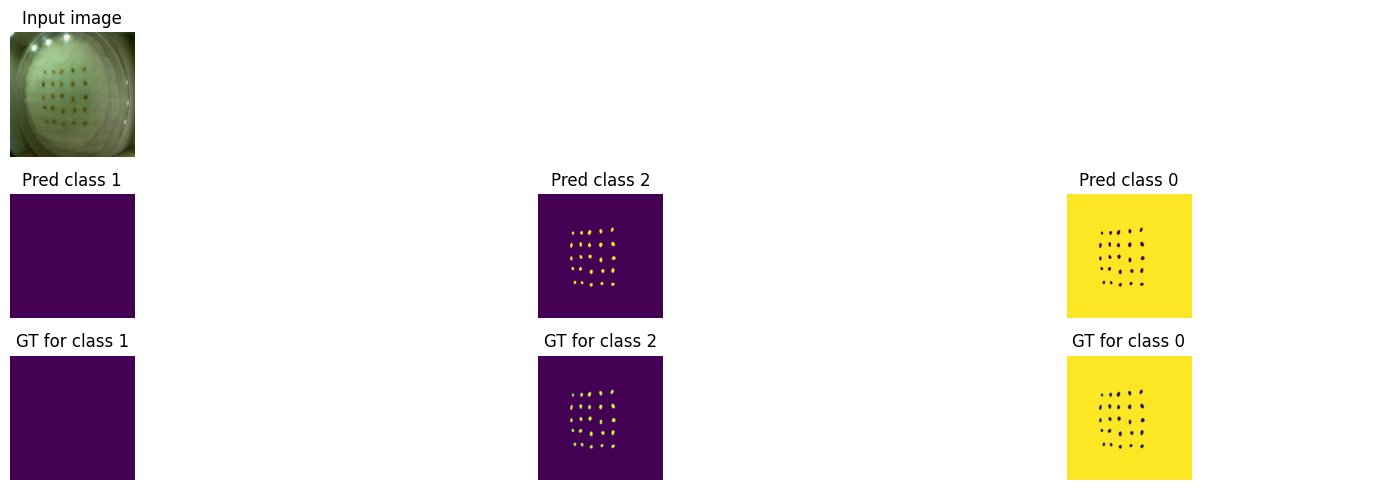

Train loss: 0.18664 | Time: 46m 4s | Val loss: 0.14301
Train_DICE_avg: 0.84607 | Train_Jaccard_avg: 0.78827 | Train_Sensitivity_avg: 0.88179 | Train_Specificity_avg: 0.96383 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98471 | Train_Sensitivity: 0.99098 | Train_Specificity: 0.89797 
Class 1 - Train_DICE: 0.67658 | Train_Jaccard: 0.60213 | Train_Sensitivity: 0.79361 | Train_Specificity: 0.99712 
Class 2 - Train_DICE: 0.86937 | Train_Jaccard: 0.77795 | Train_Sensitivity: 0.86078 | Train_Specificity: 0.99640 
Val_DICE_avg: 0.87007 | Val_Jaccard_avg: 0.82165 | Val_Sensitivity_avg: 0.90654 | Val_Specificity_avg: 0.95997 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99306 | Val_Sensitivity: 0.99697 | Val_Specificity: 0.88561 
Class 1 - Val_DICE: 0.73049 | Val_Jaccard: 0.66969 | Val_Sensitivity: 0.83863 | Val_Specificity: 0.99737 
Class 2 - Val_DICE: 0.88322 | Val_Jaccard: 0.80219 | Val_Sensitivity: 0.88403 | Val_Specificity: 0.99692 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.18609 | Time: 46m 54s | Val loss: 0.14126
Train_DICE_avg: 0.84620 | Train_Jaccard_avg: 0.78810 | Train_Sensitivity_avg: 0.88184 | Train_Specificity_avg: 0.96544 
Class 0 - Train_DICE: 0.99194 | Train_Jaccard: 0.98409 | Train_Sensitivity: 0.99019 | Train_Specificity: 0.90287 
Class 1 - Train_DICE: 0.67856 | Train_Jaccard: 0.60384 | Train_Sensitivity: 0.79484 | Train_Specificity: 0.99706 
Class 2 - Train_DICE: 0.86809 | Train_Jaccard: 0.77636 | Train_Sensitivity: 0.86048 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.87191 | Val_Jaccard_avg: 0.82242 | Val_Sensitivity_avg: 0.90109 | Val_Specificity_avg: 0.95932 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99306 | Val_Sensitivity: 0.99701 | Val_Specificity: 0.88358 
Class 1 - Val_DICE: 0.73736 | Val_Jaccard: 0.67345 | Val_Sensitivity: 0.81419 | Val_Specificity: 0.99780 
Class 2 - Val_DICE: 0.88186 | Val_Jaccard: 0.80074 | Val_Sensitivity: 0.89207 | Val_Specificity: 0.99658 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.18416 | Time: 47m 44s | Val loss: 0.14124
Train_DICE_avg: 0.84945 | Train_Jaccard_avg: 0.79194 | Train_Sensitivity_avg: 0.88397 | Train_Specificity_avg: 0.96579 
Class 0 - Train_DICE: 0.99214 | Train_Jaccard: 0.98449 | Train_Sensitivity: 0.99069 | Train_Specificity: 0.90376 
Class 1 - Train_DICE: 0.68625 | Train_Jaccard: 0.61227 | Train_Sensitivity: 0.79787 | Train_Specificity: 0.99720 
Class 2 - Train_DICE: 0.86997 | Train_Jaccard: 0.77908 | Train_Sensitivity: 0.86336 | Train_Specificity: 0.99640 
Val_DICE_avg: 0.87206 | Val_Jaccard_avg: 0.82330 | Val_Sensitivity_avg: 0.90168 | Val_Specificity_avg: 0.95774 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99298 | Val_Sensitivity: 0.99709 | Val_Specificity: 0.87876 
Class 1 - Val_DICE: 0.73716 | Val_Jaccard: 0.67510 | Val_Sensitivity: 0.81829 | Val_Specificity: 0.99773 
Class 2 - Val_DICE: 0.88256 | Val_Jaccard: 0.80183 | Val_Sensitivity: 0.88965 | Val_Specificity: 0.99674 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.18362 | Time: 48m 34s | Val loss: 0.13993
Train_DICE_avg: 0.84976 | Train_Jaccard_avg: 0.79254 | Train_Sensitivity_avg: 0.88537 | Train_Specificity_avg: 0.96461 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98471 | Train_Sensitivity: 0.99105 | Train_Specificity: 0.90026 
Class 1 - Train_DICE: 0.68673 | Train_Jaccard: 0.61335 | Train_Sensitivity: 0.80269 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.87029 | Train_Jaccard: 0.77955 | Train_Sensitivity: 0.86236 | Train_Specificity: 0.99646 
Val_DICE_avg: 0.87293 | Val_Jaccard_avg: 0.82467 | Val_Sensitivity_avg: 0.90381 | Val_Specificity_avg: 0.95917 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99307 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.88309 
Class 1 - Val_DICE: 0.73893 | Val_Jaccard: 0.67778 | Val_Sensitivity: 0.82034 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.88334 | Val_Jaccard: 0.80317 | Val_Sensitivity: 0.89402 | Val_Specificity: 0.99669 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.18065 | Time: 49m 23s | Val loss: 0.14056
Train_DICE_avg: 0.85140 | Train_Jaccard_avg: 0.79406 | Train_Sensitivity_avg: 0.88693 | Train_Specificity_avg: 0.96508 
Class 0 - Train_DICE: 0.99224 | Train_Jaccard: 0.98467 | Train_Sensitivity: 0.99111 | Train_Specificity: 0.90162 
Class 1 - Train_DICE: 0.69143 | Train_Jaccard: 0.61764 | Train_Sensitivity: 0.80712 | Train_Specificity: 0.99716 
Class 2 - Train_DICE: 0.87052 | Train_Jaccard: 0.77986 | Train_Sensitivity: 0.86257 | Train_Specificity: 0.99646 
Val_DICE_avg: 0.87230 | Val_Jaccard_avg: 0.82396 | Val_Sensitivity_avg: 0.90156 | Val_Specificity_avg: 0.95839 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99303 | Val_Sensitivity: 0.99714 | Val_Specificity: 0.88069 
Class 1 - Val_DICE: 0.73722 | Val_Jaccard: 0.67597 | Val_Sensitivity: 0.81406 | Val_Specificity: 0.99783 
Class 2 - Val_DICE: 0.88320 | Val_Jaccard: 0.80287 | Val_Sensitivity: 0.89349 | Val_Specificity: 0.99664 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


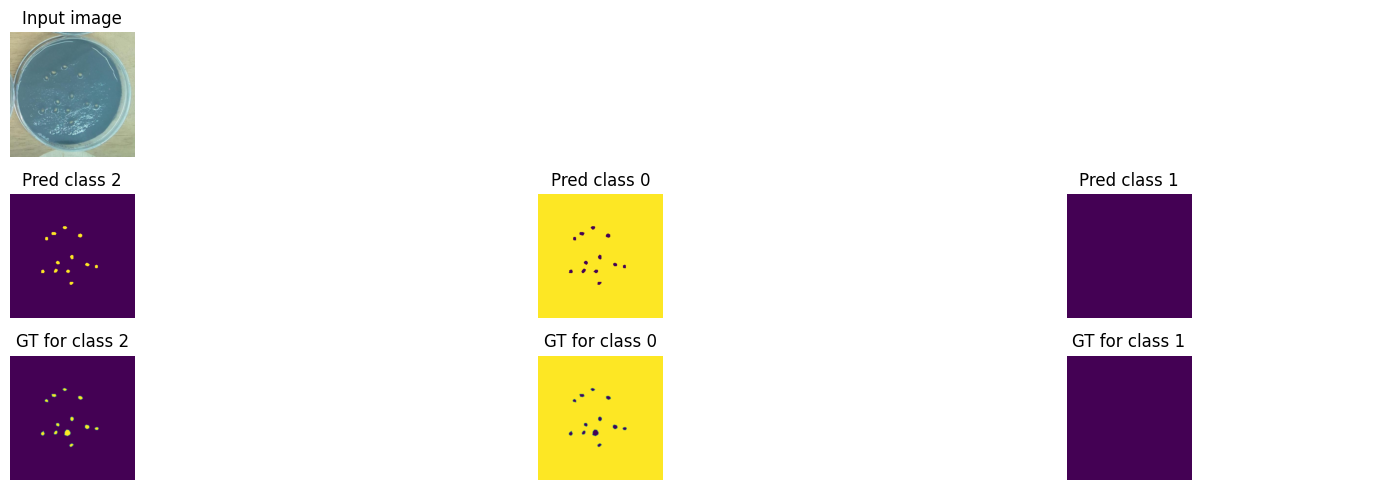

Train loss: 0.18431 | Time: 50m 14s | Val loss: 0.13980
Train_DICE_avg: 0.84831 | Train_Jaccard_avg: 0.79083 | Train_Sensitivity_avg: 0.88224 | Train_Specificity_avg: 0.96517 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98453 | Train_Sensitivity: 0.99076 | Train_Specificity: 0.90192 
Class 1 - Train_DICE: 0.68192 | Train_Jaccard: 0.60765 | Train_Sensitivity: 0.79202 | Train_Specificity: 0.99722 
Class 2 - Train_DICE: 0.87085 | Train_Jaccard: 0.78030 | Train_Sensitivity: 0.86395 | Train_Specificity: 0.99637 
Val_DICE_avg: 0.87378 | Val_Jaccard_avg: 0.82546 | Val_Sensitivity_avg: 0.90307 | Val_Specificity_avg: 0.95925 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99309 | Val_Sensitivity: 0.99709 | Val_Specificity: 0.88318 
Class 1 - Val_DICE: 0.74096 | Val_Jaccard: 0.67930 | Val_Sensitivity: 0.82257 | Val_Specificity: 0.99772 
Class 2 - Val_DICE: 0.88386 | Val_Jaccard: 0.80400 | Val_Sensitivity: 0.88956 | Val_Specificity: 0.99684 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [12]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 76.7MB/s]


<All keys matched successfully>

In [13]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Global Performance Metrics:
Loss mean: 0.14596, std: 0.02999
Dice Coefficient mean: 0.84417, std: 0.12827
Jaccard Index mean: 0.78726, std: 0.14244
Sensitivity mean: 0.86564, std: 0.12255
Specificity mean: 0.95476, std: 0.03673

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99567, std: 0.00231
Jaccard mean: 0.99139, std: 0.00455
Sensitivity mean: 0.99585, std: 0.00233
Specificity mean: 0.87131, std: 0.11008

Class 1:
Dice mean: 0.68168, std: 0.35447
Jaccard mean: 0.61420, std: 0.36552
Sensitivity mean: 0.72198, std: 0.35149
Specificity mean: 0.99731, std: 0.00456

Class 2:
Dice mean: 0.85516, std: 0.08645
Jaccard mean: 0.75619, std: 0.12076
Sensitivity mean: 0.87910, std: 0.09439
Specificity mean: 0.99565, std: 0.00314


### Cross-Entropy Loss

In [14]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-DeepLabV3+-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.57 GB
GPU Memory - Reserved: 1.17 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


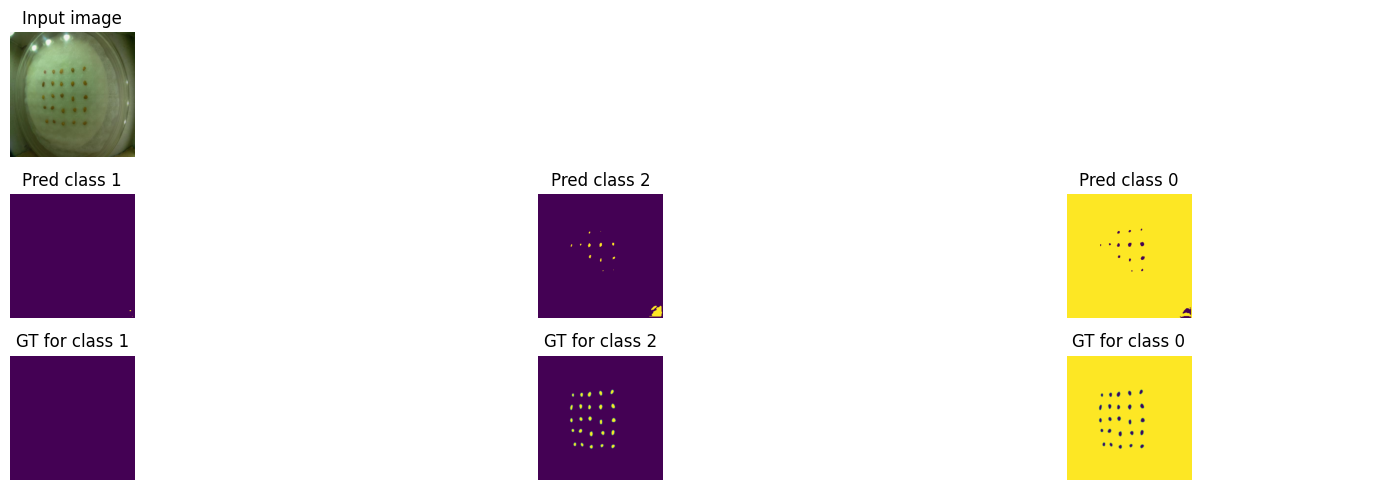

Train loss: 0.50546 | Time: 0m 48s | Val loss: 0.36264
Train_DICE_avg: 0.29153 | Train_Jaccard_avg: 0.24294 | Train_Sensitivity_avg: 0.67337 | Train_Specificity_avg: 0.70554 
Class 0 - Train_DICE: 0.65571 | Train_Jaccard: 0.54422 | Train_Sensitivity: 0.99087 | Train_Specificity: 0.16854 
Class 1 - Train_DICE: 0.14200 | Train_Jaccard: 0.14104 | Train_Sensitivity: 0.52837 | Train_Specificity: 0.98582 
Class 2 - Train_DICE: 0.07688 | Train_Jaccard: 0.04357 | Train_Sensitivity: 0.50088 | Train_Specificity: 0.96225 
Val_DICE_avg: 0.38598 | Val_Jaccard_avg: 0.36477 | Val_Sensitivity_avg: 0.63778 | Val_Specificity_avg: 0.72805 
Class 0 - Val_DICE: 0.95595 | Val_Jaccard: 0.91676 | Val_Sensitivity: 0.99667 | Val_Specificity: 0.23863 
Class 1 - Val_DICE: 0.14841 | Val_Jaccard: 0.14841 | Val_Sensitivity: 0.43730 | Val_Specificity: 0.98820 
Class 2 - Val_DICE: 0.05356 | Val_Jaccard: 0.02914 | Val_Sensitivity: 0.47936 | Val_Specificity: 0.95733 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.26426 | Time: 1m 37s | Val loss: 0.20021
Train_DICE_avg: 0.44585 | Train_Jaccard_avg: 0.42062 | Train_Sensitivity_avg: 0.94625 | Train_Specificity_avg: 0.80742 
Class 0 - Train_DICE: 0.96263 | Train_Jaccard: 0.92945 | Train_Sensitivity: 0.99134 | Train_Specificity: 0.47324 
Class 1 - Train_DICE: 0.26320 | Train_Jaccard: 0.26320 | Train_Sensitivity: 0.95773 | Train_Specificity: 0.98594 
Class 2 - Train_DICE: 0.11173 | Train_Jaccard: 0.06919 | Train_Sensitivity: 0.88968 | Train_Specificity: 0.96307 
Val_DICE_avg: 0.59419 | Val_Jaccard_avg: 0.55303 | Val_Sensitivity_avg: 0.93782 | Val_Specificity_avg: 0.80582 
Class 0 - Val_DICE: 0.98550 | Val_Jaccard: 0.97158 | Val_Sensitivity: 0.99707 | Val_Specificity: 0.45793 
Class 1 - Val_DICE: 0.43254 | Val_Jaccard: 0.43254 | Val_Sensitivity: 0.91111 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.36454 | Val_Jaccard: 0.25496 | Val_Sensitivity: 0.90528 | Val_Specificity: 0.97120 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.17401 | Time: 2m 25s | Val loss: 0.13248
Train_DICE_avg: 0.55667 | Train_Jaccard_avg: 0.51009 | Train_Sensitivity_avg: 0.95292 | Train_Specificity_avg: 0.85569 
Class 0 - Train_DICE: 0.97960 | Train_Jaccard: 0.96032 | Train_Sensitivity: 0.99138 | Train_Specificity: 0.60654 
Class 1 - Train_DICE: 0.27383 | Train_Jaccard: 0.27383 | Train_Sensitivity: 0.98913 | Train_Specificity: 0.98594 
Class 2 - Train_DICE: 0.41657 | Train_Jaccard: 0.29610 | Train_Sensitivity: 0.87826 | Train_Specificity: 0.97458 
Val_DICE_avg: 0.65710 | Val_Jaccard_avg: 0.61050 | Val_Sensitivity_avg: 0.96403 | Val_Specificity_avg: 0.83177 
Class 0 - Val_DICE: 0.98834 | Val_Jaccard: 0.97705 | Val_Sensitivity: 0.99722 | Val_Specificity: 0.52876 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.51472 | Val_Jaccard: 0.38620 | Val_Sensitivity: 0.89486 | Val_Specificity: 0.97821 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.12771 | Time: 3m 14s | Val loss: 0.10097
Train_DICE_avg: 0.59894 | Train_Jaccard_avg: 0.55055 | Train_Sensitivity_avg: 0.95284 | Train_Specificity_avg: 0.87919 
Class 0 - Train_DICE: 0.98388 | Train_Jaccard: 0.96844 | Train_Sensitivity: 0.99121 | Train_Specificity: 0.67234 
Class 1 - Train_DICE: 0.28333 | Train_Jaccard: 0.28333 | Train_Sensitivity: 0.99114 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.52961 | Train_Jaccard: 0.39987 | Train_Sensitivity: 0.87616 | Train_Specificity: 0.97957 
Val_DICE_avg: 0.66871 | Val_Jaccard_avg: 0.62230 | Val_Sensitivity_avg: 0.95990 | Val_Specificity_avg: 0.86332 
Class 0 - Val_DICE: 0.98989 | Val_Jaccard: 0.98005 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.62181 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54798 | Val_Jaccard: 0.41860 | Val_Sensitivity: 0.88235 | Val_Specificity: 0.97982 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.10154 | Time: 4m 2s | Val loss: 0.08039
Train_DICE_avg: 0.61308 | Train_Jaccard_avg: 0.56507 | Train_Sensitivity_avg: 0.94998 | Train_Specificity_avg: 0.89078 
Class 0 - Train_DICE: 0.98580 | Train_Jaccard: 0.97211 | Train_Sensitivity: 0.99150 | Train_Specificity: 0.70489 
Class 1 - Train_DICE: 0.27665 | Train_Jaccard: 0.27665 | Train_Sensitivity: 0.99557 | Train_Specificity: 0.98565 
Class 2 - Train_DICE: 0.57679 | Train_Jaccard: 0.44644 | Train_Sensitivity: 0.86286 | Train_Specificity: 0.98179 
Val_DICE_avg: 0.67637 | Val_Jaccard_avg: 0.62907 | Val_Sensitivity_avg: 0.95752 | Val_Specificity_avg: 0.85762 
Class 0 - Val_DICE: 0.99002 | Val_Jaccard: 0.98030 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.60387 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57084 | Val_Jaccard: 0.43865 | Val_Sensitivity: 0.87498 | Val_Specificity: 0.98065 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


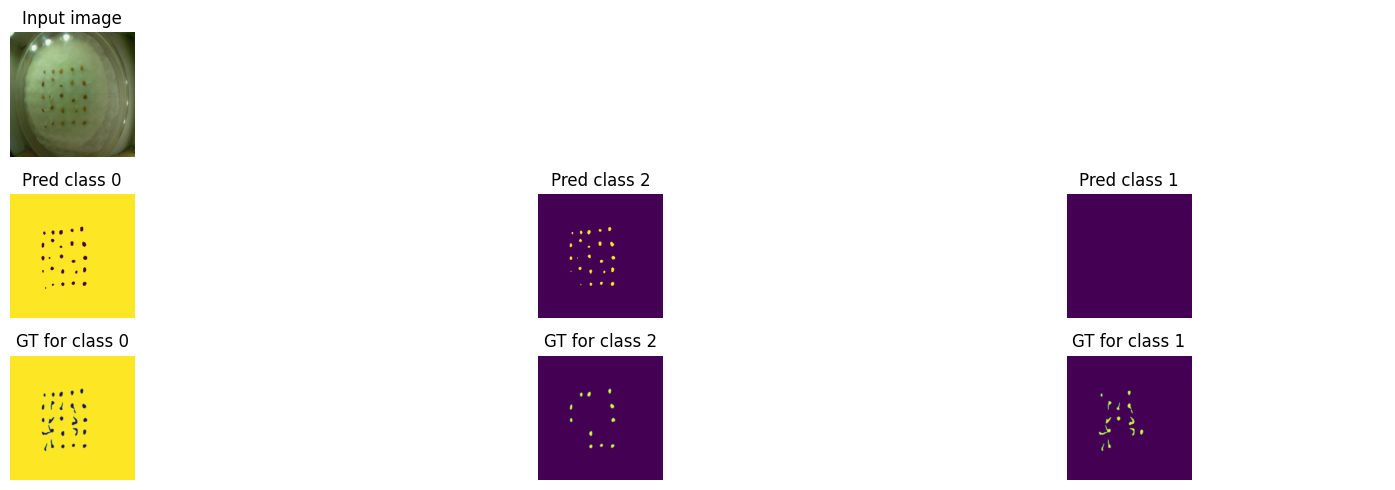

Train loss: 0.08557 | Time: 4m 50s | Val loss: 0.06872
Train_DICE_avg: 0.62364 | Train_Jaccard_avg: 0.57596 | Train_Sensitivity_avg: 0.94613 | Train_Specificity_avg: 0.89876 
Class 0 - Train_DICE: 0.98662 | Train_Jaccard: 0.97370 | Train_Sensitivity: 0.99161 | Train_Specificity: 0.72730 
Class 1 - Train_DICE: 0.27625 | Train_Jaccard: 0.27625 | Train_Sensitivity: 0.99573 | Train_Specificity: 0.98573 
Class 2 - Train_DICE: 0.60806 | Train_Jaccard: 0.47792 | Train_Sensitivity: 0.85105 | Train_Specificity: 0.98326 
Val_DICE_avg: 0.68436 | Val_Jaccard_avg: 0.63645 | Val_Sensitivity_avg: 0.95406 | Val_Specificity_avg: 0.85709 
Class 0 - Val_DICE: 0.99012 | Val_Jaccard: 0.98051 | Val_Sensitivity: 0.99769 | Val_Specificity: 0.60123 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.59470 | Val_Jaccard: 0.46059 | Val_Sensitivity: 0.86448 | Val_Specificity: 0.98170 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.07384 | Time: 5m 37s | Val loss: 0.06162
Train_DICE_avg: 0.62967 | Train_Jaccard_avg: 0.58163 | Train_Sensitivity_avg: 0.94697 | Train_Specificity_avg: 0.90041 
Class 0 - Train_DICE: 0.98741 | Train_Jaccard: 0.97523 | Train_Sensitivity: 0.99214 | Train_Specificity: 0.73160 
Class 1 - Train_DICE: 0.27770 | Train_Jaccard: 0.27770 | Train_Sensitivity: 0.99839 | Train_Specificity: 0.98591 
Class 2 - Train_DICE: 0.62391 | Train_Jaccard: 0.49197 | Train_Sensitivity: 0.85038 | Train_Specificity: 0.98372 
Val_DICE_avg: 0.68748 | Val_Jaccard_avg: 0.63864 | Val_Sensitivity_avg: 0.95428 | Val_Specificity_avg: 0.85764 
Class 0 - Val_DICE: 0.99039 | Val_Jaccard: 0.98103 | Val_Sensitivity: 0.99775 | Val_Specificity: 0.60294 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60380 | Val_Jaccard: 0.46662 | Val_Sensitivity: 0.86508 | Val_Specificity: 0.98166 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.06571 | Time: 6m 25s | Val loss: 0.05250
Train_DICE_avg: 0.63410 | Train_Jaccard_avg: 0.58570 | Train_Sensitivity_avg: 0.94774 | Train_Specificity_avg: 0.90171 
Class 0 - Train_DICE: 0.98793 | Train_Jaccard: 0.97624 | Train_Sensitivity: 0.99226 | Train_Specificity: 0.73546 
Class 1 - Train_DICE: 0.27810 | Train_Jaccard: 0.27810 | Train_Sensitivity: 0.99799 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.63628 | Train_Jaccard: 0.50275 | Train_Sensitivity: 0.85298 | Train_Specificity: 0.98394 
Val_DICE_avg: 0.68976 | Val_Jaccard_avg: 0.64013 | Val_Sensitivity_avg: 0.95798 | Val_Specificity_avg: 0.86605 
Class 0 - Val_DICE: 0.99140 | Val_Jaccard: 0.98301 | Val_Sensitivity: 0.99769 | Val_Specificity: 0.62852 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60961 | Val_Jaccard: 0.46911 | Val_Sensitivity: 0.87626 | Val_Specificity: 0.98130 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.05919 | Time: 7m 13s | Val loss: 0.04679
Train_DICE_avg: 0.63733 | Train_Jaccard_avg: 0.58869 | Train_Sensitivity_avg: 0.94984 | Train_Specificity_avg: 0.90279 
Class 0 - Train_DICE: 0.98840 | Train_Jaccard: 0.97715 | Train_Sensitivity: 0.99277 | Train_Specificity: 0.73861 
Class 1 - Train_DICE: 0.27464 | Train_Jaccard: 0.27464 | Train_Sensitivity: 0.99799 | Train_Specificity: 0.98552 
Class 2 - Train_DICE: 0.64896 | Train_Jaccard: 0.51428 | Train_Sensitivity: 0.85875 | Train_Specificity: 0.98423 
Val_DICE_avg: 0.69051 | Val_Jaccard_avg: 0.64061 | Val_Sensitivity_avg: 0.96342 | Val_Specificity_avg: 0.85957 
Class 0 - Val_DICE: 0.99105 | Val_Jaccard: 0.98231 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.60930 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61222 | Val_Jaccard: 0.47128 | Val_Sensitivity: 0.89239 | Val_Specificity: 0.98106 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.05438 | Time: 8m 0s | Val loss: 0.04219
Train_DICE_avg: 0.64492 | Train_Jaccard_avg: 0.59651 | Train_Sensitivity_avg: 0.95254 | Train_Specificity_avg: 0.90404 
Class 0 - Train_DICE: 0.98861 | Train_Jaccard: 0.97756 | Train_Sensitivity: 0.99279 | Train_Specificity: 0.74159 
Class 1 - Train_DICE: 0.28620 | Train_Jaccard: 0.28618 | Train_Sensitivity: 0.99744 | Train_Specificity: 0.98588 
Class 2 - Train_DICE: 0.65995 | Train_Jaccard: 0.52579 | Train_Sensitivity: 0.86740 | Train_Specificity: 0.98464 
Val_DICE_avg: 0.69512 | Val_Jaccard_avg: 0.64532 | Val_Sensitivity_avg: 0.96909 | Val_Specificity_avg: 0.86108 
Class 0 - Val_DICE: 0.99129 | Val_Jaccard: 0.98279 | Val_Sensitivity: 0.99795 | Val_Specificity: 0.61338 
Class 1 - Val_DICE: 0.46863 | Val_Jaccard: 0.46844 | Val_Sensitivity: 0.99953 | Val_Specificity: 0.98835 
Class 2 - Val_DICE: 0.62544 | Val_Jaccard: 0.48473 | Val_Sensitivity: 0.90978 | Val_Specificity: 0.98151 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


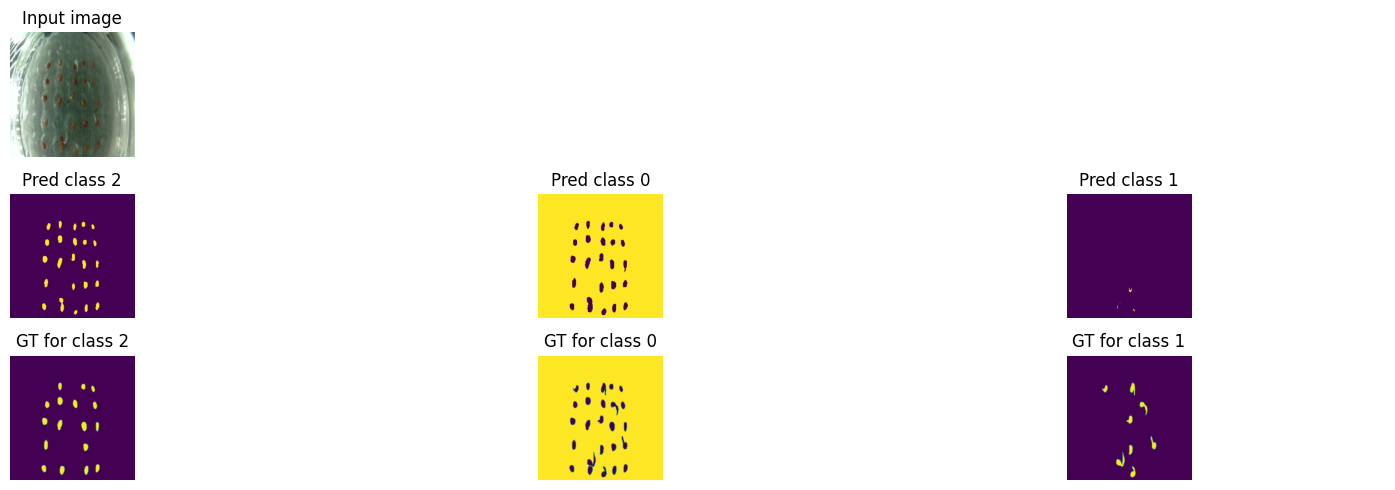

Train loss: 0.04628 | Time: 8m 49s | Val loss: 0.03261
Train_DICE_avg: 0.64601 | Train_Jaccard_avg: 0.59742 | Train_Sensitivity_avg: 0.95419 | Train_Specificity_avg: 0.90796 
Class 0 - Train_DICE: 0.98908 | Train_Jaccard: 0.97848 | Train_Sensitivity: 0.99290 | Train_Specificity: 0.75298 
Class 1 - Train_DICE: 0.27849 | Train_Jaccard: 0.27792 | Train_Sensitivity: 0.99159 | Train_Specificity: 0.98590 
Class 2 - Train_DICE: 0.67047 | Train_Jaccard: 0.53588 | Train_Sensitivity: 0.87808 | Train_Specificity: 0.98498 
Val_DICE_avg: 0.70255 | Val_Jaccard_avg: 0.65099 | Val_Sensitivity_avg: 0.96094 | Val_Specificity_avg: 0.86109 
Class 0 - Val_DICE: 0.99136 | Val_Jaccard: 0.98292 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.61243 
Class 1 - Val_DICE: 0.47950 | Val_Jaccard: 0.47301 | Val_Sensitivity: 0.96133 | Val_Specificity: 0.98883 
Class 2 - Val_DICE: 0.63681 | Val_Jaccard: 0.49705 | Val_Sensitivity: 0.92332 | Val_Specificity: 0.98201 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.03903 | Time: 9m 38s | Val loss: 0.02806
Train_DICE_avg: 0.65808 | Train_Jaccard_avg: 0.60845 | Train_Sensitivity_avg: 0.94912 | Train_Specificity_avg: 0.90848 
Class 0 - Train_DICE: 0.98937 | Train_Jaccard: 0.97903 | Train_Sensitivity: 0.99359 | Train_Specificity: 0.75402 
Class 1 - Train_DICE: 0.29746 | Train_Jaccard: 0.29176 | Train_Sensitivity: 0.96950 | Train_Specificity: 0.98588 
Class 2 - Train_DICE: 0.68742 | Train_Jaccard: 0.55457 | Train_Sensitivity: 0.88427 | Train_Specificity: 0.98553 
Val_DICE_avg: 0.72103 | Val_Jaccard_avg: 0.66520 | Val_Sensitivity_avg: 0.96020 | Val_Specificity_avg: 0.85586 
Class 0 - Val_DICE: 0.99098 | Val_Jaccard: 0.98219 | Val_Sensitivity: 0.99859 | Val_Specificity: 0.59523 
Class 1 - Val_DICE: 0.51578 | Val_Jaccard: 0.49691 | Val_Sensitivity: 0.94635 | Val_Specificity: 0.98983 
Class 2 - Val_DICE: 0.65632 | Val_Jaccard: 0.51650 | Val_Sensitivity: 0.93567 | Val_Specificity: 0.98251 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.03562 | Time: 10m 26s | Val loss: 0.02569
Train_DICE_avg: 0.66539 | Train_Jaccard_avg: 0.61415 | Train_Sensitivity_avg: 0.94462 | Train_Specificity_avg: 0.90930 
Class 0 - Train_DICE: 0.98947 | Train_Jaccard: 0.97924 | Train_Sensitivity: 0.99366 | Train_Specificity: 0.75527 
Class 1 - Train_DICE: 0.30934 | Train_Jaccard: 0.29758 | Train_Sensitivity: 0.95052 | Train_Specificity: 0.98655 
Class 2 - Train_DICE: 0.69736 | Train_Jaccard: 0.56563 | Train_Sensitivity: 0.88967 | Train_Specificity: 0.98606 
Val_DICE_avg: 0.73773 | Val_Jaccard_avg: 0.67791 | Val_Sensitivity_avg: 0.95196 | Val_Specificity_avg: 0.85667 
Class 0 - Val_DICE: 0.99116 | Val_Jaccard: 0.98252 | Val_Sensitivity: 0.99866 | Val_Specificity: 0.59677 
Class 1 - Val_DICE: 0.55427 | Val_Jaccard: 0.52329 | Val_Sensitivity: 0.91769 | Val_Specificity: 0.99051 
Class 2 - Val_DICE: 0.66776 | Val_Jaccard: 0.52793 | Val_Sensitivity: 0.93952 | Val_Specificity: 0.98273 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.03325 | Time: 11m 15s | Val loss: 0.02416
Train_DICE_avg: 0.66847 | Train_Jaccard_avg: 0.61603 | Train_Sensitivity_avg: 0.94150 | Train_Specificity_avg: 0.90631 
Class 0 - Train_DICE: 0.98984 | Train_Jaccard: 0.97995 | Train_Sensitivity: 0.99432 | Train_Specificity: 0.74678 
Class 1 - Train_DICE: 0.31239 | Train_Jaccard: 0.29571 | Train_Sensitivity: 0.93424 | Train_Specificity: 0.98612 
Class 2 - Train_DICE: 0.70317 | Train_Jaccard: 0.57244 | Train_Sensitivity: 0.89594 | Train_Specificity: 0.98602 
Val_DICE_avg: 0.72788 | Val_Jaccard_avg: 0.66687 | Val_Sensitivity_avg: 0.94598 | Val_Specificity_avg: 0.86055 
Class 0 - Val_DICE: 0.99154 | Val_Jaccard: 0.98327 | Val_Sensitivity: 0.99874 | Val_Specificity: 0.60860 
Class 1 - Val_DICE: 0.53541 | Val_Jaccard: 0.50021 | Val_Sensitivity: 0.89243 | Val_Specificity: 0.99099 
Class 2 - Val_DICE: 0.65668 | Val_Jaccard: 0.51712 | Val_Sensitivity: 0.94678 | Val_Specificity: 0.98206 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.03152 | Time: 12m 3s | Val loss: 0.02300
Train_DICE_avg: 0.67605 | Train_Jaccard_avg: 0.62195 | Train_Sensitivity_avg: 0.94137 | Train_Specificity_avg: 0.90910 
Class 0 - Train_DICE: 0.99022 | Train_Jaccard: 0.98068 | Train_Sensitivity: 0.99462 | Train_Specificity: 0.75446 
Class 1 - Train_DICE: 0.32702 | Train_Jaccard: 0.30471 | Train_Sensitivity: 0.92992 | Train_Specificity: 0.98644 
Class 2 - Train_DICE: 0.71090 | Train_Jaccard: 0.58047 | Train_Sensitivity: 0.89957 | Train_Specificity: 0.98641 
Val_DICE_avg: 0.74784 | Val_Jaccard_avg: 0.68679 | Val_Sensitivity_avg: 0.94978 | Val_Specificity_avg: 0.85687 
Class 0 - Val_DICE: 0.99106 | Val_Jaccard: 0.98234 | Val_Sensitivity: 0.99897 | Val_Specificity: 0.59578 
Class 1 - Val_DICE: 0.57045 | Val_Jaccard: 0.53430 | Val_Sensitivity: 0.90395 | Val_Specificity: 0.99157 
Class 2 - Val_DICE: 0.68201 | Val_Jaccard: 0.54374 | Val_Sensitivity: 0.94641 | Val_Specificity: 0.98325 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


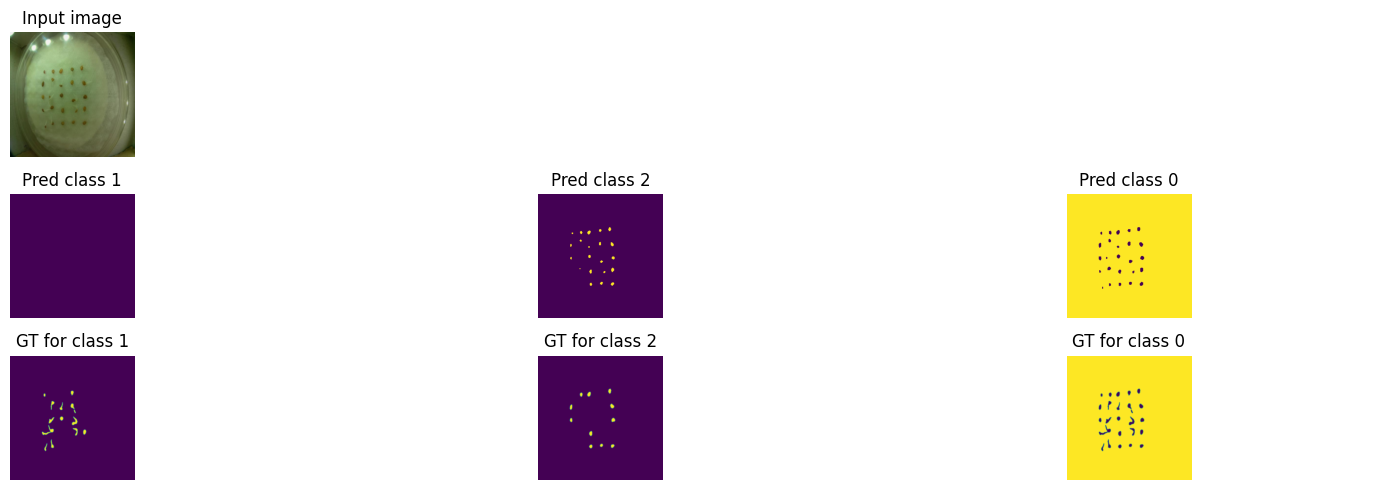

Train loss: 0.03050 | Time: 12m 53s | Val loss: 0.02512
Train_DICE_avg: 0.68365 | Train_Jaccard_avg: 0.62872 | Train_Sensitivity_avg: 0.93856 | Train_Specificity_avg: 0.90974 
Class 0 - Train_DICE: 0.99026 | Train_Jaccard: 0.98076 | Train_Sensitivity: 0.99474 | Train_Specificity: 0.75555 
Class 1 - Train_DICE: 0.34170 | Train_Jaccard: 0.31588 | Train_Sensitivity: 0.92058 | Train_Specificity: 0.98691 
Class 2 - Train_DICE: 0.71900 | Train_Jaccard: 0.58951 | Train_Sensitivity: 0.90035 | Train_Specificity: 0.98677 
Val_DICE_avg: 0.74979 | Val_Jaccard_avg: 0.68510 | Val_Sensitivity_avg: 0.94481 | Val_Specificity_avg: 0.85728 
Class 0 - Val_DICE: 0.99141 | Val_Jaccard: 0.98301 | Val_Sensitivity: 0.99900 | Val_Specificity: 0.59745 
Class 1 - Val_DICE: 0.58927 | Val_Jaccard: 0.54290 | Val_Sensitivity: 0.90084 | Val_Specificity: 0.99182 
Class 2 - Val_DICE: 0.66869 | Val_Jaccard: 0.52938 | Val_Sensitivity: 0.93457 | Val_Specificity: 0.98257 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.02989 | Time: 13m 41s | Val loss: 0.02201
Train_DICE_avg: 0.68897 | Train_Jaccard_avg: 0.63249 | Train_Sensitivity_avg: 0.93621 | Train_Specificity_avg: 0.90987 
Class 0 - Train_DICE: 0.99033 | Train_Jaccard: 0.98089 | Train_Sensitivity: 0.99477 | Train_Specificity: 0.75553 
Class 1 - Train_DICE: 0.35323 | Train_Jaccard: 0.32244 | Train_Sensitivity: 0.91334 | Train_Specificity: 0.98718 
Class 2 - Train_DICE: 0.72337 | Train_Jaccard: 0.59413 | Train_Sensitivity: 0.90052 | Train_Specificity: 0.98689 
Val_DICE_avg: 0.75991 | Val_Jaccard_avg: 0.69596 | Val_Sensitivity_avg: 0.95269 | Val_Specificity_avg: 0.85291 
Class 0 - Val_DICE: 0.99079 | Val_Jaccard: 0.98180 | Val_Sensitivity: 0.99912 | Val_Specificity: 0.58299 
Class 1 - Val_DICE: 0.60044 | Val_Jaccard: 0.55390 | Val_Sensitivity: 0.90653 | Val_Specificity: 0.99231 
Class 2 - Val_DICE: 0.68851 | Val_Jaccard: 0.55218 | Val_Sensitivity: 0.95241 | Val_Specificity: 0.98344 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.02876 | Time: 14m 30s | Val loss: 0.02131
Train_DICE_avg: 0.69466 | Train_Jaccard_avg: 0.63732 | Train_Sensitivity_avg: 0.93797 | Train_Specificity_avg: 0.91064 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98135 | Train_Sensitivity: 0.99512 | Train_Specificity: 0.75754 
Class 1 - Train_DICE: 0.36305 | Train_Jaccard: 0.32866 | Train_Sensitivity: 0.91312 | Train_Specificity: 0.98721 
Class 2 - Train_DICE: 0.73038 | Train_Jaccard: 0.60194 | Train_Sensitivity: 0.90568 | Train_Specificity: 0.98718 
Val_DICE_avg: 0.74326 | Val_Jaccard_avg: 0.67738 | Val_Sensitivity_avg: 0.94027 | Val_Specificity_avg: 0.86174 
Class 0 - Val_DICE: 0.99177 | Val_Jaccard: 0.98373 | Val_Sensitivity: 0.99904 | Val_Specificity: 0.61052 
Class 1 - Val_DICE: 0.57138 | Val_Jaccard: 0.52112 | Val_Sensitivity: 0.86189 | Val_Specificity: 0.99246 
Class 2 - Val_DICE: 0.66663 | Val_Jaccard: 0.52729 | Val_Sensitivity: 0.95987 | Val_Specificity: 0.98225 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.02804 | Time: 15m 18s | Val loss: 0.02038
Train_DICE_avg: 0.69602 | Train_Jaccard_avg: 0.63921 | Train_Sensitivity_avg: 0.93645 | Train_Specificity_avg: 0.91238 
Class 0 - Train_DICE: 0.99076 | Train_Jaccard: 0.98175 | Train_Sensitivity: 0.99528 | Train_Specificity: 0.76219 
Class 1 - Train_DICE: 0.36302 | Train_Jaccard: 0.32798 | Train_Sensitivity: 0.91005 | Train_Specificity: 0.98751 
Class 2 - Train_DICE: 0.73428 | Train_Jaccard: 0.60790 | Train_Sensitivity: 0.90401 | Train_Specificity: 0.98745 
Val_DICE_avg: 0.76455 | Val_Jaccard_avg: 0.70159 | Val_Sensitivity_avg: 0.96129 | Val_Specificity_avg: 0.86209 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98367 | Val_Sensitivity: 0.99906 | Val_Specificity: 0.61024 
Class 1 - Val_DICE: 0.59820 | Val_Jaccard: 0.55533 | Val_Sensitivity: 0.94182 | Val_Specificity: 0.99161 
Class 2 - Val_DICE: 0.70370 | Val_Jaccard: 0.56576 | Val_Sensitivity: 0.94299 | Val_Specificity: 0.98441 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.02775 | Time: 16m 6s | Val loss: 0.02013
Train_DICE_avg: 0.70184 | Train_Jaccard_avg: 0.64371 | Train_Sensitivity_avg: 0.93283 | Train_Specificity_avg: 0.91348 
Class 0 - Train_DICE: 0.99072 | Train_Jaccard: 0.98166 | Train_Sensitivity: 0.99501 | Train_Specificity: 0.76496 
Class 1 - Train_DICE: 0.37704 | Train_Jaccard: 0.33835 | Train_Sensitivity: 0.89927 | Train_Specificity: 0.98780 
Class 2 - Train_DICE: 0.73776 | Train_Jaccard: 0.61112 | Train_Sensitivity: 0.90421 | Train_Specificity: 0.98767 
Val_DICE_avg: 0.76263 | Val_Jaccard_avg: 0.69576 | Val_Sensitivity_avg: 0.95336 | Val_Specificity_avg: 0.86309 
Class 0 - Val_DICE: 0.99192 | Val_Jaccard: 0.98401 | Val_Sensitivity: 0.99912 | Val_Specificity: 0.61361 
Class 1 - Val_DICE: 0.60750 | Val_Jaccard: 0.55512 | Val_Sensitivity: 0.90455 | Val_Specificity: 0.99252 
Class 2 - Val_DICE: 0.68848 | Val_Jaccard: 0.54814 | Val_Sensitivity: 0.95641 | Val_Specificity: 0.98315 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


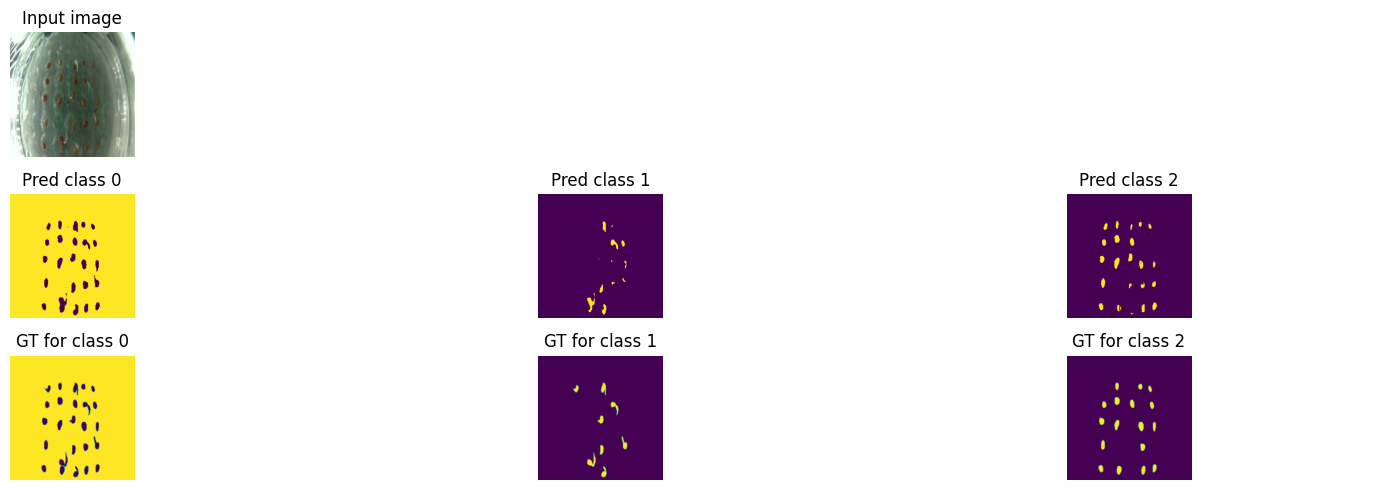

Train loss: 0.02723 | Time: 16m 55s | Val loss: 0.01976
Train_DICE_avg: 0.70846 | Train_Jaccard_avg: 0.64958 | Train_Sensitivity_avg: 0.93405 | Train_Specificity_avg: 0.91148 
Class 0 - Train_DICE: 0.99074 | Train_Jaccard: 0.98170 | Train_Sensitivity: 0.99529 | Train_Specificity: 0.75850 
Class 1 - Train_DICE: 0.39538 | Train_Jaccard: 0.35403 | Train_Sensitivity: 0.90046 | Train_Specificity: 0.98830 
Class 2 - Train_DICE: 0.73924 | Train_Jaccard: 0.61300 | Train_Sensitivity: 0.90639 | Train_Specificity: 0.98764 
Val_DICE_avg: 0.77241 | Val_Jaccard_avg: 0.70645 | Val_Sensitivity_avg: 0.95362 | Val_Specificity_avg: 0.85419 
Class 0 - Val_DICE: 0.99093 | Val_Jaccard: 0.98208 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.58536 
Class 1 - Val_DICE: 0.61706 | Val_Jaccard: 0.56319 | Val_Sensitivity: 0.90106 | Val_Specificity: 0.99306 
Class 2 - Val_DICE: 0.70925 | Val_Jaccard: 0.57409 | Val_Sensitivity: 0.96056 | Val_Specificity: 0.98415 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.02631 | Time: 17m 44s | Val loss: 0.01899
Train_DICE_avg: 0.71122 | Train_Jaccard_avg: 0.65178 | Train_Sensitivity_avg: 0.93495 | Train_Specificity_avg: 0.91296 
Class 0 - Train_DICE: 0.99099 | Train_Jaccard: 0.98218 | Train_Sensitivity: 0.99560 | Train_Specificity: 0.76306 
Class 1 - Train_DICE: 0.39551 | Train_Jaccard: 0.35213 | Train_Sensitivity: 0.90131 | Train_Specificity: 0.98804 
Class 2 - Train_DICE: 0.74716 | Train_Jaccard: 0.62102 | Train_Sensitivity: 0.90795 | Train_Specificity: 0.98779 
Val_DICE_avg: 0.76886 | Val_Jaccard_avg: 0.70123 | Val_Sensitivity_avg: 0.94939 | Val_Specificity_avg: 0.86013 
Class 0 - Val_DICE: 0.99143 | Val_Jaccard: 0.98306 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.60330 
Class 1 - Val_DICE: 0.60094 | Val_Jaccard: 0.54632 | Val_Sensitivity: 0.88913 | Val_Specificity: 0.99300 
Class 2 - Val_DICE: 0.71421 | Val_Jaccard: 0.57431 | Val_Sensitivity: 0.95980 | Val_Specificity: 0.98408 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.02583 | Time: 18m 32s | Val loss: 0.01896
Train_DICE_avg: 0.71547 | Train_Jaccard_avg: 0.65566 | Train_Sensitivity_avg: 0.93568 | Train_Specificity_avg: 0.91271 
Class 0 - Train_DICE: 0.99108 | Train_Jaccard: 0.98235 | Train_Sensitivity: 0.99584 | Train_Specificity: 0.76217 
Class 1 - Train_DICE: 0.40669 | Train_Jaccard: 0.36160 | Train_Sensitivity: 0.90060 | Train_Specificity: 0.98810 
Class 2 - Train_DICE: 0.74863 | Train_Jaccard: 0.62303 | Train_Sensitivity: 0.91061 | Train_Specificity: 0.98785 
Val_DICE_avg: 0.77916 | Val_Jaccard_avg: 0.71081 | Val_Sensitivity_avg: 0.95618 | Val_Specificity_avg: 0.86091 
Class 0 - Val_DICE: 0.99160 | Val_Jaccard: 0.98339 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.60591 
Class 1 - Val_DICE: 0.64612 | Val_Jaccard: 0.58713 | Val_Sensitivity: 0.90362 | Val_Specificity: 0.99313 
Class 2 - Val_DICE: 0.69975 | Val_Jaccard: 0.56191 | Val_Sensitivity: 0.96568 | Val_Specificity: 0.98368 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.02534 | Time: 19m 21s | Val loss: 0.01886
Train_DICE_avg: 0.71832 | Train_Jaccard_avg: 0.65830 | Train_Sensitivity_avg: 0.93375 | Train_Specificity_avg: 0.91553 
Class 0 - Train_DICE: 0.99118 | Train_Jaccard: 0.98256 | Train_Sensitivity: 0.99581 | Train_Specificity: 0.77016 
Class 1 - Train_DICE: 0.41064 | Train_Jaccard: 0.36473 | Train_Sensitivity: 0.89423 | Train_Specificity: 0.98842 
Class 2 - Train_DICE: 0.75313 | Train_Jaccard: 0.62761 | Train_Sensitivity: 0.91120 | Train_Specificity: 0.98801 
Val_DICE_avg: 0.77588 | Val_Jaccard_avg: 0.70815 | Val_Sensitivity_avg: 0.95203 | Val_Specificity_avg: 0.86037 
Class 0 - Val_DICE: 0.99141 | Val_Jaccard: 0.98303 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.60363 
Class 1 - Val_DICE: 0.63204 | Val_Jaccard: 0.57449 | Val_Sensitivity: 0.89109 | Val_Specificity: 0.99358 
Class 2 - Val_DICE: 0.70419 | Val_Jaccard: 0.56692 | Val_Sensitivity: 0.96574 | Val_Specificity: 0.98392 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.02472 | Time: 20m 9s | Val loss: 0.01835
Train_DICE_avg: 0.72176 | Train_Jaccard_avg: 0.66107 | Train_Sensitivity_avg: 0.93233 | Train_Specificity_avg: 0.91361 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98294 | Train_Sensitivity: 0.99607 | Train_Specificity: 0.76429 
Class 1 - Train_DICE: 0.41886 | Train_Jaccard: 0.36999 | Train_Sensitivity: 0.88767 | Train_Specificity: 0.98847 
Class 2 - Train_DICE: 0.75503 | Train_Jaccard: 0.63027 | Train_Sensitivity: 0.91324 | Train_Specificity: 0.98808 
Val_DICE_avg: 0.78696 | Val_Jaccard_avg: 0.71929 | Val_Sensitivity_avg: 0.95491 | Val_Specificity_avg: 0.85739 
Class 0 - Val_DICE: 0.99121 | Val_Jaccard: 0.98262 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59384 
Class 1 - Val_DICE: 0.65191 | Val_Jaccard: 0.59133 | Val_Sensitivity: 0.90089 | Val_Specificity: 0.99364 
Class 2 - Val_DICE: 0.71777 | Val_Jaccard: 0.58392 | Val_Sensitivity: 0.96456 | Val_Specificity: 0.98469 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


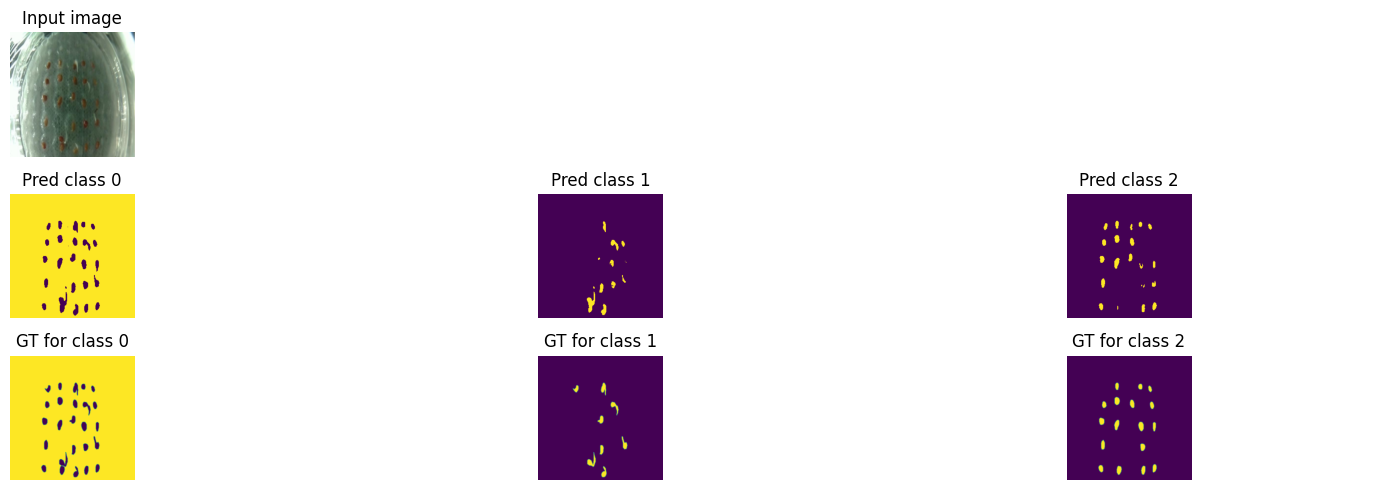

Train loss: 0.02429 | Time: 20m 58s | Val loss: 0.01839
Train_DICE_avg: 0.72210 | Train_Jaccard_avg: 0.66106 | Train_Sensitivity_avg: 0.93432 | Train_Specificity_avg: 0.91364 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98321 | Train_Sensitivity: 0.99627 | Train_Specificity: 0.76476 
Class 1 - Train_DICE: 0.41878 | Train_Jaccard: 0.36875 | Train_Sensitivity: 0.89258 | Train_Specificity: 0.98814 
Class 2 - Train_DICE: 0.75601 | Train_Jaccard: 0.63122 | Train_Sensitivity: 0.91411 | Train_Specificity: 0.98803 
Val_DICE_avg: 0.78752 | Val_Jaccard_avg: 0.71899 | Val_Sensitivity_avg: 0.95378 | Val_Specificity_avg: 0.85830 
Class 0 - Val_DICE: 0.99140 | Val_Jaccard: 0.98300 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59701 
Class 1 - Val_DICE: 0.65217 | Val_Jaccard: 0.59265 | Val_Sensitivity: 0.89897 | Val_Specificity: 0.99367 
Class 2 - Val_DICE: 0.71899 | Val_Jaccard: 0.58131 | Val_Sensitivity: 0.96308 | Val_Specificity: 0.98421 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.02427 | Time: 21m 47s | Val loss: 0.01811
Train_DICE_avg: 0.72750 | Train_Jaccard_avg: 0.66616 | Train_Sensitivity_avg: 0.93703 | Train_Specificity_avg: 0.91480 
Class 0 - Train_DICE: 0.99149 | Train_Jaccard: 0.98316 | Train_Sensitivity: 0.99615 | Train_Specificity: 0.76769 
Class 1 - Train_DICE: 0.42855 | Train_Jaccard: 0.37774 | Train_Sensitivity: 0.89929 | Train_Specificity: 0.98848 
Class 2 - Train_DICE: 0.76245 | Train_Jaccard: 0.63757 | Train_Sensitivity: 0.91566 | Train_Specificity: 0.98822 
Val_DICE_avg: 0.79781 | Val_Jaccard_avg: 0.72948 | Val_Sensitivity_avg: 0.95604 | Val_Specificity_avg: 0.86136 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98352 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.60582 
Class 1 - Val_DICE: 0.66884 | Val_Jaccard: 0.60930 | Val_Sensitivity: 0.90819 | Val_Specificity: 0.99340 
Class 2 - Val_DICE: 0.73292 | Val_Jaccard: 0.59563 | Val_Sensitivity: 0.96067 | Val_Specificity: 0.98486 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.02385 | Time: 22m 35s | Val loss: 0.01777
Train_DICE_avg: 0.73035 | Train_Jaccard_avg: 0.66883 | Train_Sensitivity_avg: 0.93790 | Train_Specificity_avg: 0.91506 
Class 0 - Train_DICE: 0.99153 | Train_Jaccard: 0.98325 | Train_Sensitivity: 0.99633 | Train_Specificity: 0.76824 
Class 1 - Train_DICE: 0.43561 | Train_Jaccard: 0.38332 | Train_Sensitivity: 0.90134 | Train_Specificity: 0.98866 
Class 2 - Train_DICE: 0.76391 | Train_Jaccard: 0.63993 | Train_Sensitivity: 0.91604 | Train_Specificity: 0.98827 
Val_DICE_avg: 0.79134 | Val_Jaccard_avg: 0.72426 | Val_Sensitivity_avg: 0.95666 | Val_Specificity_avg: 0.85856 
Class 0 - Val_DICE: 0.99130 | Val_Jaccard: 0.98280 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.59667 
Class 1 - Val_DICE: 0.63278 | Val_Jaccard: 0.57444 | Val_Sensitivity: 0.90951 | Val_Specificity: 0.99335 
Class 2 - Val_DICE: 0.74994 | Val_Jaccard: 0.61555 | Val_Sensitivity: 0.96119 | Val_Specificity: 0.98567 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.02346 | Time: 23m 24s | Val loss: 0.01819
Train_DICE_avg: 0.73394 | Train_Jaccard_avg: 0.67208 | Train_Sensitivity_avg: 0.93639 | Train_Specificity_avg: 0.91632 
Class 0 - Train_DICE: 0.99176 | Train_Jaccard: 0.98368 | Train_Sensitivity: 0.99632 | Train_Specificity: 0.77163 
Class 1 - Train_DICE: 0.44373 | Train_Jaccard: 0.38990 | Train_Sensitivity: 0.89465 | Train_Specificity: 0.98886 
Class 2 - Train_DICE: 0.76633 | Train_Jaccard: 0.64265 | Train_Sensitivity: 0.91821 | Train_Specificity: 0.98847 
Val_DICE_avg: 0.79671 | Val_Jaccard_avg: 0.72919 | Val_Sensitivity_avg: 0.95728 | Val_Specificity_avg: 0.85387 
Class 0 - Val_DICE: 0.99082 | Val_Jaccard: 0.98186 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.58232 
Class 1 - Val_DICE: 0.65876 | Val_Jaccard: 0.59858 | Val_Sensitivity: 0.90226 | Val_Specificity: 0.99401 
Class 2 - Val_DICE: 0.74054 | Val_Jaccard: 0.60711 | Val_Sensitivity: 0.97020 | Val_Specificity: 0.98527 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.02352 | Time: 24m 12s | Val loss: 0.01800
Train_DICE_avg: 0.73264 | Train_Jaccard_avg: 0.67036 | Train_Sensitivity_avg: 0.93843 | Train_Specificity_avg: 0.91438 
Class 0 - Train_DICE: 0.99163 | Train_Jaccard: 0.98344 | Train_Sensitivity: 0.99628 | Train_Specificity: 0.76615 
Class 1 - Train_DICE: 0.44034 | Train_Jaccard: 0.38597 | Train_Sensitivity: 0.89783 | Train_Specificity: 0.98868 
Class 2 - Train_DICE: 0.76596 | Train_Jaccard: 0.64167 | Train_Sensitivity: 0.92117 | Train_Specificity: 0.98831 
Val_DICE_avg: 0.76764 | Val_Jaccard_avg: 0.69636 | Val_Sensitivity_avg: 0.93265 | Val_Specificity_avg: 0.86305 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98353 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61180 
Class 1 - Val_DICE: 0.60049 | Val_Jaccard: 0.53696 | Val_Sensitivity: 0.82492 | Val_Specificity: 0.99414 
Class 2 - Val_DICE: 0.71077 | Val_Jaccard: 0.56858 | Val_Sensitivity: 0.97369 | Val_Specificity: 0.98322 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


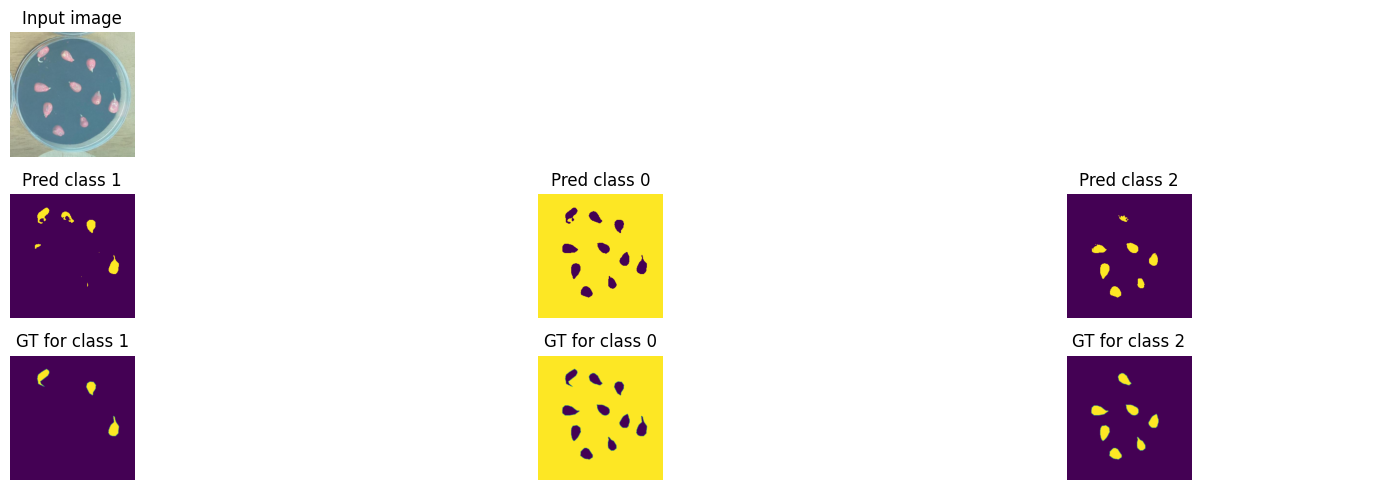

Train loss: 0.02312 | Time: 25m 1s | Val loss: 0.01717
Train_DICE_avg: 0.73202 | Train_Jaccard_avg: 0.66954 | Train_Sensitivity_avg: 0.93907 | Train_Specificity_avg: 0.91440 
Class 0 - Train_DICE: 0.99175 | Train_Jaccard: 0.98366 | Train_Sensitivity: 0.99645 | Train_Specificity: 0.76622 
Class 1 - Train_DICE: 0.43846 | Train_Jaccard: 0.38388 | Train_Sensitivity: 0.89928 | Train_Specificity: 0.98880 
Class 2 - Train_DICE: 0.76586 | Train_Jaccard: 0.64109 | Train_Sensitivity: 0.92147 | Train_Specificity: 0.98818 
Val_DICE_avg: 0.80477 | Val_Jaccard_avg: 0.73648 | Val_Sensitivity_avg: 0.96325 | Val_Specificity_avg: 0.85871 
Class 0 - Val_DICE: 0.99130 | Val_Jaccard: 0.98280 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.59707 
Class 1 - Val_DICE: 0.68489 | Val_Jaccard: 0.62400 | Val_Sensitivity: 0.92243 | Val_Specificity: 0.99387 
Class 2 - Val_DICE: 0.73813 | Val_Jaccard: 0.60264 | Val_Sensitivity: 0.96795 | Val_Specificity: 0.98518 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.02255 | Time: 25m 50s | Val loss: 0.01725
Train_DICE_avg: 0.74031 | Train_Jaccard_avg: 0.67779 | Train_Sensitivity_avg: 0.94160 | Train_Specificity_avg: 0.91600 
Class 0 - Train_DICE: 0.99198 | Train_Jaccard: 0.98411 | Train_Sensitivity: 0.99656 | Train_Specificity: 0.77068 
Class 1 - Train_DICE: 0.45868 | Train_Jaccard: 0.40257 | Train_Sensitivity: 0.90624 | Train_Specificity: 0.98895 
Class 2 - Train_DICE: 0.77026 | Train_Jaccard: 0.64668 | Train_Sensitivity: 0.92200 | Train_Specificity: 0.98839 
Val_DICE_avg: 0.80071 | Val_Jaccard_avg: 0.73122 | Val_Sensitivity_avg: 0.95344 | Val_Specificity_avg: 0.86059 
Class 0 - Val_DICE: 0.99153 | Val_Jaccard: 0.98324 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60304 
Class 1 - Val_DICE: 0.68195 | Val_Jaccard: 0.61905 | Val_Sensitivity: 0.89218 | Val_Specificity: 0.99424 
Class 2 - Val_DICE: 0.72864 | Val_Jaccard: 0.59137 | Val_Sensitivity: 0.96878 | Val_Specificity: 0.98450 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.02236 | Time: 26m 38s | Val loss: 0.01706
Train_DICE_avg: 0.74193 | Train_Jaccard_avg: 0.67968 | Train_Sensitivity_avg: 0.94029 | Train_Specificity_avg: 0.91674 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98416 | Train_Sensitivity: 0.99659 | Train_Specificity: 0.77247 
Class 1 - Train_DICE: 0.46067 | Train_Jaccard: 0.40394 | Train_Sensitivity: 0.90146 | Train_Specificity: 0.98916 
Class 2 - Train_DICE: 0.77312 | Train_Jaccard: 0.65094 | Train_Sensitivity: 0.92281 | Train_Specificity: 0.98860 
Val_DICE_avg: 0.79663 | Val_Jaccard_avg: 0.72711 | Val_Sensitivity_avg: 0.94800 | Val_Specificity_avg: 0.85738 
Class 0 - Val_DICE: 0.99114 | Val_Jaccard: 0.98249 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.59296 
Class 1 - Val_DICE: 0.66429 | Val_Jaccard: 0.59962 | Val_Sensitivity: 0.87018 | Val_Specificity: 0.99440 
Class 2 - Val_DICE: 0.73445 | Val_Jaccard: 0.59923 | Val_Sensitivity: 0.97442 | Val_Specificity: 0.98478 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.02196 | Time: 27m 26s | Val loss: 0.01664
Train_DICE_avg: 0.74533 | Train_Jaccard_avg: 0.68262 | Train_Sensitivity_avg: 0.94371 | Train_Specificity_avg: 0.91530 
Class 0 - Train_DICE: 0.99205 | Train_Jaccard: 0.98425 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.76862 
Class 1 - Train_DICE: 0.46941 | Train_Jaccard: 0.41170 | Train_Sensitivity: 0.90888 | Train_Specificity: 0.98888 
Class 2 - Train_DICE: 0.77454 | Train_Jaccard: 0.65192 | Train_Sensitivity: 0.92542 | Train_Specificity: 0.98841 
Val_DICE_avg: 0.80312 | Val_Jaccard_avg: 0.73421 | Val_Sensitivity_avg: 0.95589 | Val_Specificity_avg: 0.86165 
Class 0 - Val_DICE: 0.99165 | Val_Jaccard: 0.98349 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.60600 
Class 1 - Val_DICE: 0.67548 | Val_Jaccard: 0.61201 | Val_Sensitivity: 0.90159 | Val_Specificity: 0.99387 
Class 2 - Val_DICE: 0.74222 | Val_Jaccard: 0.60713 | Val_Sensitivity: 0.96676 | Val_Specificity: 0.98509 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.02171 | Time: 28m 15s | Val loss: 0.01663
Train_DICE_avg: 0.74585 | Train_Jaccard_avg: 0.68282 | Train_Sensitivity_avg: 0.94184 | Train_Specificity_avg: 0.91827 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98454 | Train_Sensitivity: 0.99672 | Train_Specificity: 0.77697 
Class 1 - Train_DICE: 0.46539 | Train_Jaccard: 0.40589 | Train_Sensitivity: 0.90335 | Train_Specificity: 0.98916 
Class 2 - Train_DICE: 0.77998 | Train_Jaccard: 0.65803 | Train_Sensitivity: 0.92544 | Train_Specificity: 0.98868 
Val_DICE_avg: 0.80577 | Val_Jaccard_avg: 0.73552 | Val_Sensitivity_avg: 0.95308 | Val_Specificity_avg: 0.86299 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98357 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60996 
Class 1 - Val_DICE: 0.69843 | Val_Jaccard: 0.63278 | Val_Sensitivity: 0.89145 | Val_Specificity: 0.99448 
Class 2 - Val_DICE: 0.72718 | Val_Jaccard: 0.59021 | Val_Sensitivity: 0.96843 | Val_Specificity: 0.98451 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


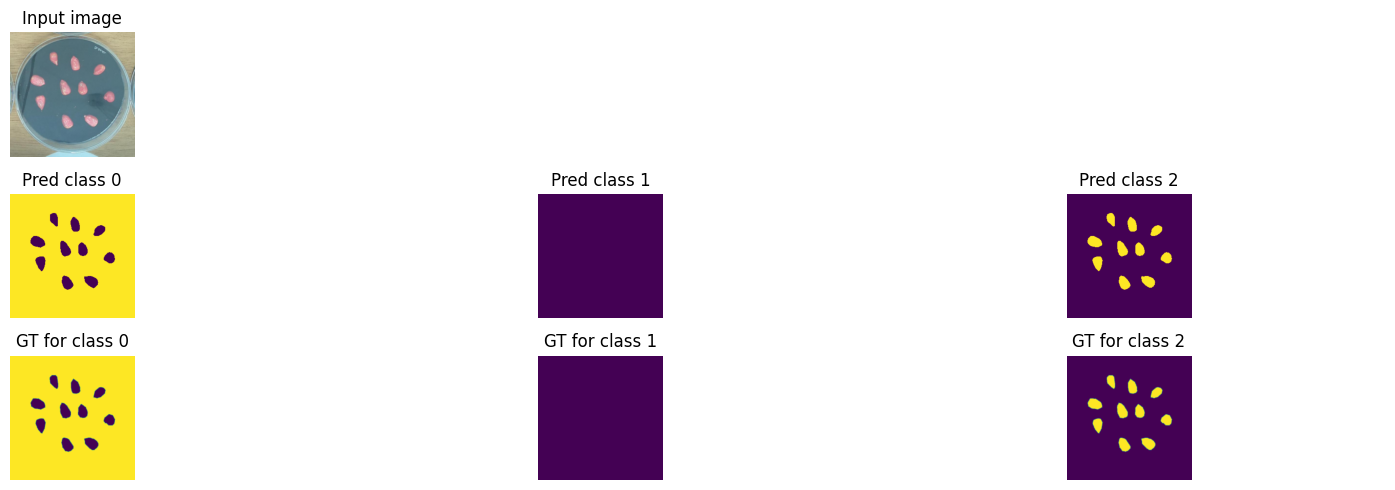

Train loss: 0.02139 | Time: 29m 5s | Val loss: 0.01666
Train_DICE_avg: 0.75174 | Train_Jaccard_avg: 0.68826 | Train_Sensitivity_avg: 0.94319 | Train_Specificity_avg: 0.91745 
Class 0 - Train_DICE: 0.99218 | Train_Jaccard: 0.98451 | Train_Sensitivity: 0.99680 | Train_Specificity: 0.77427 
Class 1 - Train_DICE: 0.48428 | Train_Jaccard: 0.42294 | Train_Sensitivity: 0.90581 | Train_Specificity: 0.98943 
Class 2 - Train_DICE: 0.77877 | Train_Jaccard: 0.65732 | Train_Sensitivity: 0.92694 | Train_Specificity: 0.98866 
Val_DICE_avg: 0.80715 | Val_Jaccard_avg: 0.73672 | Val_Sensitivity_avg: 0.95671 | Val_Specificity_avg: 0.86216 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98352 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60735 
Class 1 - Val_DICE: 0.69471 | Val_Jaccard: 0.62793 | Val_Sensitivity: 0.89878 | Val_Specificity: 0.99433 
Class 2 - Val_DICE: 0.73508 | Val_Jaccard: 0.59870 | Val_Sensitivity: 0.97199 | Val_Specificity: 0.98480 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.02111 | Time: 29m 53s | Val loss: 0.01640
Train_DICE_avg: 0.75301 | Train_Jaccard_avg: 0.68991 | Train_Sensitivity_avg: 0.94276 | Train_Specificity_avg: 0.92003 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98481 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.78141 
Class 1 - Train_DICE: 0.48267 | Train_Jaccard: 0.42176 | Train_Sensitivity: 0.90350 | Train_Specificity: 0.98964 
Class 2 - Train_DICE: 0.78402 | Train_Jaccard: 0.66316 | Train_Sensitivity: 0.92796 | Train_Specificity: 0.98903 
Val_DICE_avg: 0.81289 | Val_Jaccard_avg: 0.74409 | Val_Sensitivity_avg: 0.96193 | Val_Specificity_avg: 0.86081 
Class 0 - Val_DICE: 0.99145 | Val_Jaccard: 0.98310 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60276 
Class 1 - Val_DICE: 0.70164 | Val_Jaccard: 0.63938 | Val_Sensitivity: 0.91250 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.74557 | Val_Jaccard: 0.60979 | Val_Sensitivity: 0.97389 | Val_Specificity: 0.98510 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.02078 | Time: 30m 42s | Val loss: 0.01633
Train_DICE_avg: 0.75262 | Train_Jaccard_avg: 0.68924 | Train_Sensitivity_avg: 0.94338 | Train_Specificity_avg: 0.91739 
Class 0 - Train_DICE: 0.99229 | Train_Jaccard: 0.98474 | Train_Sensitivity: 0.99696 | Train_Specificity: 0.77417 
Class 1 - Train_DICE: 0.48361 | Train_Jaccard: 0.42211 | Train_Sensitivity: 0.90308 | Train_Specificity: 0.98931 
Class 2 - Train_DICE: 0.78196 | Train_Jaccard: 0.66087 | Train_Sensitivity: 0.93010 | Train_Specificity: 0.98868 
Val_DICE_avg: 0.81014 | Val_Jaccard_avg: 0.74056 | Val_Sensitivity_avg: 0.95662 | Val_Specificity_avg: 0.86170 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98351 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60554 
Class 1 - Val_DICE: 0.69834 | Val_Jaccard: 0.63215 | Val_Sensitivity: 0.89937 | Val_Specificity: 0.99433 
Class 2 - Val_DICE: 0.74042 | Val_Jaccard: 0.60601 | Val_Sensitivity: 0.97113 | Val_Specificity: 0.98522 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.02057 | Time: 31m 30s | Val loss: 0.01619
Train_DICE_avg: 0.75599 | Train_Jaccard_avg: 0.69260 | Train_Sensitivity_avg: 0.94659 | Train_Specificity_avg: 0.91864 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98486 | Train_Sensitivity: 0.99699 | Train_Specificity: 0.77760 
Class 1 - Train_DICE: 0.48984 | Train_Jaccard: 0.42779 | Train_Sensitivity: 0.91077 | Train_Specificity: 0.98947 
Class 2 - Train_DICE: 0.78577 | Train_Jaccard: 0.66515 | Train_Sensitivity: 0.93203 | Train_Specificity: 0.98885 
Val_DICE_avg: 0.81726 | Val_Jaccard_avg: 0.74730 | Val_Sensitivity_avg: 0.95912 | Val_Specificity_avg: 0.86108 
Class 0 - Val_DICE: 0.99154 | Val_Jaccard: 0.98326 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.60339 
Class 1 - Val_DICE: 0.71820 | Val_Jaccard: 0.65122 | Val_Sensitivity: 0.90675 | Val_Specificity: 0.99465 
Class 2 - Val_DICE: 0.74204 | Val_Jaccard: 0.60743 | Val_Sensitivity: 0.97121 | Val_Specificity: 0.98519 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.02046 | Time: 32m 19s | Val loss: 0.01607
Train_DICE_avg: 0.75883 | Train_Jaccard_avg: 0.69454 | Train_Sensitivity_avg: 0.94568 | Train_Specificity_avg: 0.91762 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99705 | Train_Specificity: 0.77449 
Class 1 - Train_DICE: 0.49812 | Train_Jaccard: 0.43358 | Train_Sensitivity: 0.90770 | Train_Specificity: 0.98958 
Class 2 - Train_DICE: 0.78600 | Train_Jaccard: 0.66516 | Train_Sensitivity: 0.93230 | Train_Specificity: 0.98880 
Val_DICE_avg: 0.81728 | Val_Jaccard_avg: 0.74746 | Val_Sensitivity_avg: 0.96194 | Val_Specificity_avg: 0.86219 
Class 0 - Val_DICE: 0.99168 | Val_Jaccard: 0.98354 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.60672 
Class 1 - Val_DICE: 0.71552 | Val_Jaccard: 0.64895 | Val_Sensitivity: 0.91364 | Val_Specificity: 0.99463 
Class 2 - Val_DICE: 0.74465 | Val_Jaccard: 0.60991 | Val_Sensitivity: 0.97279 | Val_Specificity: 0.98523 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


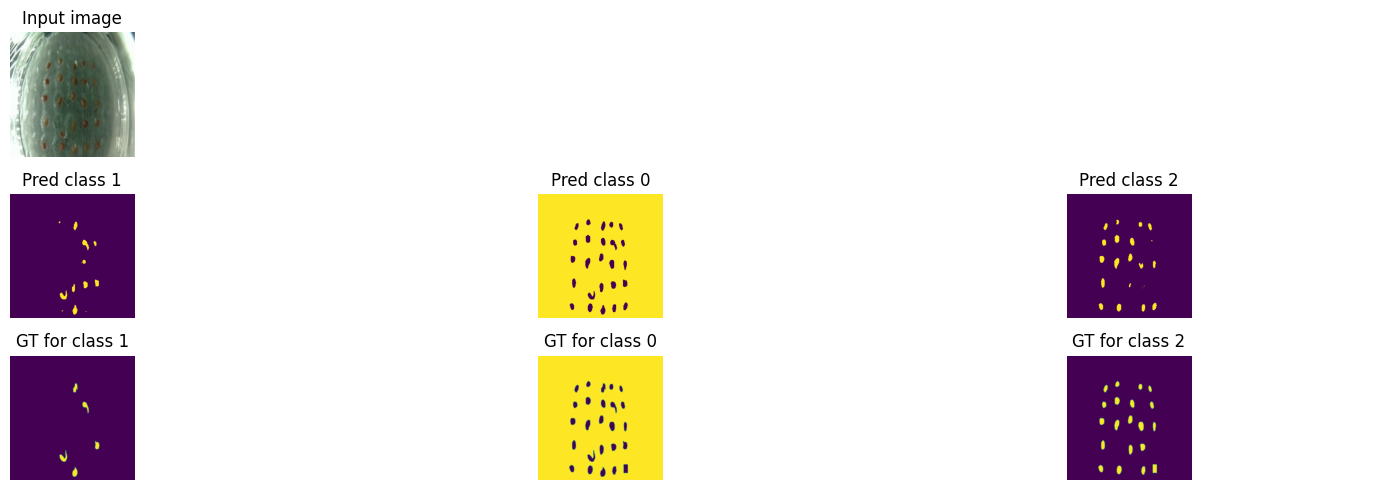

Train loss: 0.02035 | Time: 33m 9s | Val loss: 0.01628
Train_DICE_avg: 0.75954 | Train_Jaccard_avg: 0.69553 | Train_Sensitivity_avg: 0.94743 | Train_Specificity_avg: 0.91766 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98481 | Train_Sensitivity: 0.99697 | Train_Specificity: 0.77430 
Class 1 - Train_DICE: 0.49743 | Train_Jaccard: 0.43294 | Train_Sensitivity: 0.91247 | Train_Specificity: 0.98971 
Class 2 - Train_DICE: 0.78887 | Train_Jaccard: 0.66885 | Train_Sensitivity: 0.93284 | Train_Specificity: 0.98898 
Val_DICE_avg: 0.82008 | Val_Jaccard_avg: 0.75090 | Val_Sensitivity_avg: 0.96365 | Val_Specificity_avg: 0.86140 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98356 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60425 
Class 1 - Val_DICE: 0.71893 | Val_Jaccard: 0.65248 | Val_Sensitivity: 0.91934 | Val_Specificity: 0.99437 
Class 2 - Val_DICE: 0.74963 | Val_Jaccard: 0.61667 | Val_Sensitivity: 0.97224 | Val_Specificity: 0.98559 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.02023 | Time: 33m 57s | Val loss: 0.01565
Train_DICE_avg: 0.75972 | Train_Jaccard_avg: 0.69564 | Train_Sensitivity_avg: 0.94641 | Train_Specificity_avg: 0.91668 
Class 0 - Train_DICE: 0.99239 | Train_Jaccard: 0.98492 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.77173 
Class 1 - Train_DICE: 0.50033 | Train_Jaccard: 0.43630 | Train_Sensitivity: 0.90751 | Train_Specificity: 0.98957 
Class 2 - Train_DICE: 0.78644 | Train_Jaccard: 0.66571 | Train_Sensitivity: 0.93466 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.82249 | Val_Jaccard_avg: 0.75291 | Val_Sensitivity_avg: 0.96308 | Val_Specificity_avg: 0.86212 
Class 0 - Val_DICE: 0.99171 | Val_Jaccard: 0.98359 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60635 
Class 1 - Val_DICE: 0.72863 | Val_Jaccard: 0.66125 | Val_Sensitivity: 0.91545 | Val_Specificity: 0.99462 
Class 2 - Val_DICE: 0.74715 | Val_Jaccard: 0.61389 | Val_Sensitivity: 0.97440 | Val_Specificity: 0.98541 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.02003 | Time: 34m 46s | Val loss: 0.01562
Train_DICE_avg: 0.76414 | Train_Jaccard_avg: 0.70036 | Train_Sensitivity_avg: 0.94832 | Train_Specificity_avg: 0.91870 
Class 0 - Train_DICE: 0.99241 | Train_Jaccard: 0.98497 | Train_Sensitivity: 0.99699 | Train_Specificity: 0.77718 
Class 1 - Train_DICE: 0.50971 | Train_Jaccard: 0.44502 | Train_Sensitivity: 0.91381 | Train_Specificity: 0.98990 
Class 2 - Train_DICE: 0.79031 | Train_Jaccard: 0.67110 | Train_Sensitivity: 0.93417 | Train_Specificity: 0.98903 
Val_DICE_avg: 0.82326 | Val_Jaccard_avg: 0.75386 | Val_Sensitivity_avg: 0.96740 | Val_Specificity_avg: 0.86324 
Class 0 - Val_DICE: 0.99183 | Val_Jaccard: 0.98383 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.60967 
Class 1 - Val_DICE: 0.72453 | Val_Jaccard: 0.65867 | Val_Sensitivity: 0.92907 | Val_Specificity: 0.99454 
Class 2 - Val_DICE: 0.75342 | Val_Jaccard: 0.61907 | Val_Sensitivity: 0.97372 | Val_Specificity: 0.98551 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01992 | Time: 35m 34s | Val loss: 0.01544
Train_DICE_avg: 0.76337 | Train_Jaccard_avg: 0.69876 | Train_Sensitivity_avg: 0.94601 | Train_Specificity_avg: 0.91825 
Class 0 - Train_DICE: 0.99238 | Train_Jaccard: 0.98490 | Train_Sensitivity: 0.99704 | Train_Specificity: 0.77598 
Class 1 - Train_DICE: 0.50725 | Train_Jaccard: 0.44124 | Train_Sensitivity: 0.90582 | Train_Specificity: 0.98990 
Class 2 - Train_DICE: 0.79048 | Train_Jaccard: 0.67013 | Train_Sensitivity: 0.93517 | Train_Specificity: 0.98886 
Val_DICE_avg: 0.81990 | Val_Jaccard_avg: 0.75054 | Val_Sensitivity_avg: 0.96792 | Val_Specificity_avg: 0.86572 
Class 0 - Val_DICE: 0.99203 | Val_Jaccard: 0.98423 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61735 
Class 1 - Val_DICE: 0.71576 | Val_Jaccard: 0.65075 | Val_Sensitivity: 0.93151 | Val_Specificity: 0.99436 
Class 2 - Val_DICE: 0.75190 | Val_Jaccard: 0.61662 | Val_Sensitivity: 0.97289 | Val_Specificity: 0.98547 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.01986 | Time: 36m 23s | Val loss: 0.01544
Train_DICE_avg: 0.76519 | Train_Jaccard_avg: 0.70085 | Train_Sensitivity_avg: 0.94672 | Train_Specificity_avg: 0.91847 
Class 0 - Train_DICE: 0.99251 | Train_Jaccard: 0.98516 | Train_Sensitivity: 0.99711 | Train_Specificity: 0.77653 
Class 1 - Train_DICE: 0.51168 | Train_Jaccard: 0.44589 | Train_Sensitivity: 0.90781 | Train_Specificity: 0.98991 
Class 2 - Train_DICE: 0.79137 | Train_Jaccard: 0.67151 | Train_Sensitivity: 0.93524 | Train_Specificity: 0.98899 
Val_DICE_avg: 0.82342 | Val_Jaccard_avg: 0.75426 | Val_Sensitivity_avg: 0.96960 | Val_Specificity_avg: 0.86318 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98378 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.60935 
Class 1 - Val_DICE: 0.72407 | Val_Jaccard: 0.65750 | Val_Sensitivity: 0.93415 | Val_Specificity: 0.99444 
Class 2 - Val_DICE: 0.75438 | Val_Jaccard: 0.62150 | Val_Sensitivity: 0.97525 | Val_Specificity: 0.98577 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


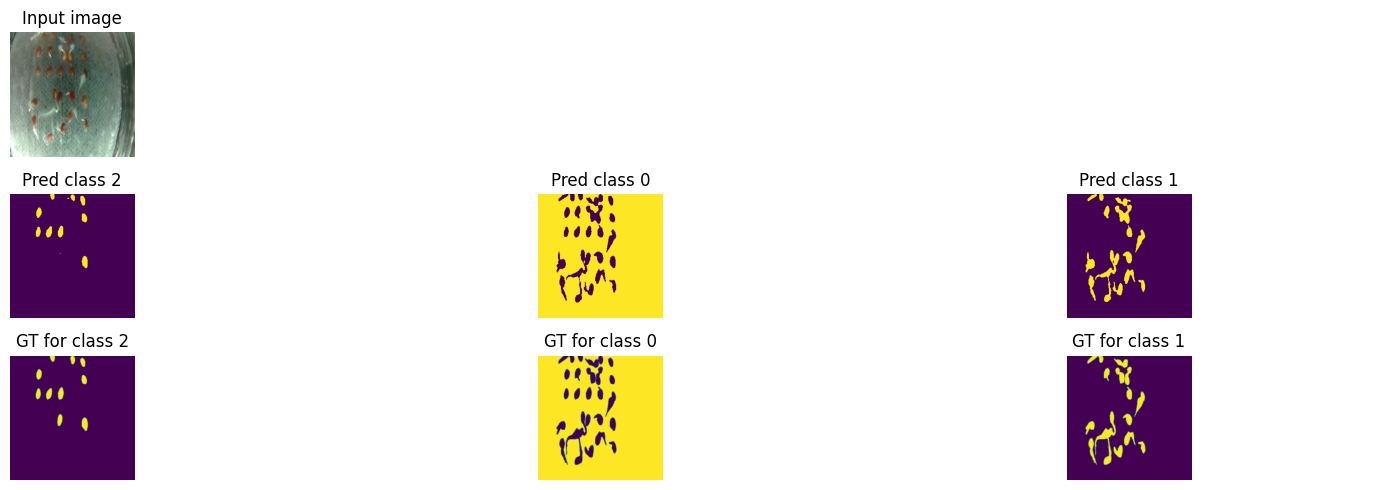

Train loss: 0.01954 | Time: 37m 12s | Val loss: 0.01582
Train_DICE_avg: 0.76554 | Train_Jaccard_avg: 0.70114 | Train_Sensitivity_avg: 0.94939 | Train_Specificity_avg: 0.91924 
Class 0 - Train_DICE: 0.99256 | Train_Jaccard: 0.98526 | Train_Sensitivity: 0.99717 | Train_Specificity: 0.77882 
Class 1 - Train_DICE: 0.50931 | Train_Jaccard: 0.44265 | Train_Sensitivity: 0.91248 | Train_Specificity: 0.98976 
Class 2 - Train_DICE: 0.79474 | Train_Jaccard: 0.67551 | Train_Sensitivity: 0.93852 | Train_Specificity: 0.98914 
Val_DICE_avg: 0.81488 | Val_Jaccard_avg: 0.74565 | Val_Sensitivity_avg: 0.96217 | Val_Specificity_avg: 0.86544 
Class 0 - Val_DICE: 0.99201 | Val_Jaccard: 0.98418 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61634 
Class 1 - Val_DICE: 0.69708 | Val_Jaccard: 0.63102 | Val_Sensitivity: 0.91161 | Val_Specificity: 0.99435 
Class 2 - Val_DICE: 0.75556 | Val_Jaccard: 0.62177 | Val_Sensitivity: 0.97555 | Val_Specificity: 0.98563 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01959 | Time: 38m 1s | Val loss: 0.01583
Train_DICE_avg: 0.76609 | Train_Jaccard_avg: 0.70173 | Train_Sensitivity_avg: 0.94951 | Train_Specificity_avg: 0.91828 
Class 0 - Train_DICE: 0.99251 | Train_Jaccard: 0.98517 | Train_Sensitivity: 0.99716 | Train_Specificity: 0.77615 
Class 1 - Train_DICE: 0.51084 | Train_Jaccard: 0.44423 | Train_Sensitivity: 0.91436 | Train_Specificity: 0.98970 
Class 2 - Train_DICE: 0.79492 | Train_Jaccard: 0.67578 | Train_Sensitivity: 0.93702 | Train_Specificity: 0.98899 
Val_DICE_avg: 0.81502 | Val_Jaccard_avg: 0.74431 | Val_Sensitivity_avg: 0.95944 | Val_Specificity_avg: 0.86568 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98439 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61730 
Class 1 - Val_DICE: 0.70451 | Val_Jaccard: 0.63547 | Val_Sensitivity: 0.90211 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.74845 | Val_Jaccard: 0.61308 | Val_Sensitivity: 0.97685 | Val_Specificity: 0.98517 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.01941 | Time: 38m 50s | Val loss: 0.01562
Train_DICE_avg: 0.76478 | Train_Jaccard_avg: 0.70025 | Train_Sensitivity_avg: 0.94927 | Train_Specificity_avg: 0.91620 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98512 | Train_Sensitivity: 0.99732 | Train_Specificity: 0.77015 
Class 1 - Train_DICE: 0.51167 | Train_Jaccard: 0.44535 | Train_Sensitivity: 0.91219 | Train_Specificity: 0.98967 
Class 2 - Train_DICE: 0.79016 | Train_Jaccard: 0.67028 | Train_Sensitivity: 0.93828 | Train_Specificity: 0.98879 
Val_DICE_avg: 0.82288 | Val_Jaccard_avg: 0.75297 | Val_Sensitivity_avg: 0.96917 | Val_Specificity_avg: 0.86457 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98408 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61361 
Class 1 - Val_DICE: 0.71837 | Val_Jaccard: 0.65018 | Val_Sensitivity: 0.93346 | Val_Specificity: 0.99439 
Class 2 - Val_DICE: 0.75830 | Val_Jaccard: 0.62467 | Val_Sensitivity: 0.97466 | Val_Specificity: 0.98570 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.01934 | Time: 39m 38s | Val loss: 0.01551
Train_DICE_avg: 0.76939 | Train_Jaccard_avg: 0.70504 | Train_Sensitivity_avg: 0.94737 | Train_Specificity_avg: 0.91986 
Class 0 - Train_DICE: 0.99260 | Train_Jaccard: 0.98535 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.78033 
Class 1 - Train_DICE: 0.51911 | Train_Jaccard: 0.45161 | Train_Sensitivity: 0.90785 | Train_Specificity: 0.99008 
Class 2 - Train_DICE: 0.79647 | Train_Jaccard: 0.67815 | Train_Sensitivity: 0.93711 | Train_Specificity: 0.98916 
Val_DICE_avg: 0.81620 | Val_Jaccard_avg: 0.74485 | Val_Sensitivity_avg: 0.95595 | Val_Specificity_avg: 0.86469 
Class 0 - Val_DICE: 0.99199 | Val_Jaccard: 0.98414 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.61436 
Class 1 - Val_DICE: 0.71489 | Val_Jaccard: 0.64388 | Val_Sensitivity: 0.88945 | Val_Specificity: 0.99483 
Class 2 - Val_DICE: 0.74173 | Val_Jaccard: 0.60654 | Val_Sensitivity: 0.97898 | Val_Specificity: 0.98488 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.01940 | Time: 40m 27s | Val loss: 0.01557
Train_DICE_avg: 0.76805 | Train_Jaccard_avg: 0.70368 | Train_Sensitivity_avg: 0.94798 | Train_Specificity_avg: 0.91919 
Class 0 - Train_DICE: 0.99256 | Train_Jaccard: 0.98527 | Train_Sensitivity: 0.99713 | Train_Specificity: 0.77849 
Class 1 - Train_DICE: 0.51611 | Train_Jaccard: 0.44929 | Train_Sensitivity: 0.90932 | Train_Specificity: 0.98996 
Class 2 - Train_DICE: 0.79547 | Train_Jaccard: 0.67649 | Train_Sensitivity: 0.93750 | Train_Specificity: 0.98913 
Val_DICE_avg: 0.81698 | Val_Jaccard_avg: 0.74658 | Val_Sensitivity_avg: 0.96219 | Val_Specificity_avg: 0.86637 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98434 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.61927 
Class 1 - Val_DICE: 0.71171 | Val_Jaccard: 0.64250 | Val_Sensitivity: 0.91079 | Val_Specificity: 0.99454 
Class 2 - Val_DICE: 0.74716 | Val_Jaccard: 0.61291 | Val_Sensitivity: 0.97642 | Val_Specificity: 0.98530 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


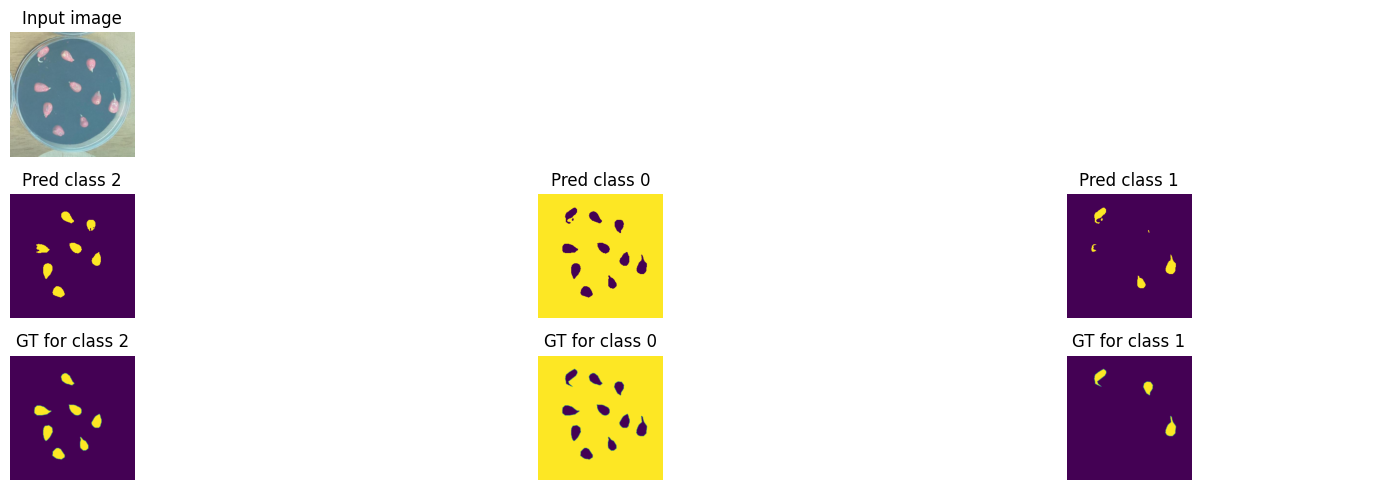

Train loss: 0.01921 | Time: 41m 16s | Val loss: 0.01537
Train_DICE_avg: 0.76714 | Train_Jaccard_avg: 0.70231 | Train_Sensitivity_avg: 0.94879 | Train_Specificity_avg: 0.91688 
Class 0 - Train_DICE: 0.99254 | Train_Jaccard: 0.98523 | Train_Sensitivity: 0.99727 | Train_Specificity: 0.77192 
Class 1 - Train_DICE: 0.51407 | Train_Jaccard: 0.44620 | Train_Sensitivity: 0.91010 | Train_Specificity: 0.98978 
Class 2 - Train_DICE: 0.79480 | Train_Jaccard: 0.67550 | Train_Sensitivity: 0.93900 | Train_Specificity: 0.98894 
Val_DICE_avg: 0.82310 | Val_Jaccard_avg: 0.75327 | Val_Sensitivity_avg: 0.96692 | Val_Specificity_avg: 0.86513 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98411 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.61525 
Class 1 - Val_DICE: 0.72564 | Val_Jaccard: 0.65734 | Val_Sensitivity: 0.92653 | Val_Specificity: 0.99457 
Class 2 - Val_DICE: 0.75168 | Val_Jaccard: 0.61838 | Val_Sensitivity: 0.97482 | Val_Specificity: 0.98556 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.01913 | Time: 42m 4s | Val loss: 0.01524
Train_DICE_avg: 0.77261 | Train_Jaccard_avg: 0.70812 | Train_Sensitivity_avg: 0.94964 | Train_Specificity_avg: 0.91980 
Class 0 - Train_DICE: 0.99260 | Train_Jaccard: 0.98534 | Train_Sensitivity: 0.99721 | Train_Specificity: 0.78029 
Class 1 - Train_DICE: 0.52815 | Train_Jaccard: 0.46036 | Train_Sensitivity: 0.91396 | Train_Specificity: 0.98997 
Class 2 - Train_DICE: 0.79708 | Train_Jaccard: 0.67866 | Train_Sensitivity: 0.93773 | Train_Specificity: 0.98913 
Val_DICE_avg: 0.82174 | Val_Jaccard_avg: 0.75195 | Val_Sensitivity_avg: 0.96745 | Val_Specificity_avg: 0.86623 
Class 0 - Val_DICE: 0.99205 | Val_Jaccard: 0.98426 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61866 
Class 1 - Val_DICE: 0.72302 | Val_Jaccard: 0.65592 | Val_Sensitivity: 0.92656 | Val_Specificity: 0.99470 
Class 2 - Val_DICE: 0.75016 | Val_Jaccard: 0.61567 | Val_Sensitivity: 0.97641 | Val_Specificity: 0.98533 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.01912 | Time: 42m 53s | Val loss: 0.01520
Train_DICE_avg: 0.77046 | Train_Jaccard_avg: 0.70602 | Train_Sensitivity_avg: 0.94650 | Train_Specificity_avg: 0.91937 
Class 0 - Train_DICE: 0.99256 | Train_Jaccard: 0.98526 | Train_Sensitivity: 0.99721 | Train_Specificity: 0.77900 
Class 1 - Train_DICE: 0.52121 | Train_Jaccard: 0.45349 | Train_Sensitivity: 0.90401 | Train_Specificity: 0.99002 
Class 2 - Train_DICE: 0.79762 | Train_Jaccard: 0.67932 | Train_Sensitivity: 0.93828 | Train_Specificity: 0.98910 
Val_DICE_avg: 0.82131 | Val_Jaccard_avg: 0.75149 | Val_Sensitivity_avg: 0.96565 | Val_Specificity_avg: 0.86558 
Class 0 - Val_DICE: 0.99199 | Val_Jaccard: 0.98414 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61665 
Class 1 - Val_DICE: 0.71979 | Val_Jaccard: 0.65300 | Val_Sensitivity: 0.92141 | Val_Specificity: 0.99471 
Class 2 - Val_DICE: 0.75216 | Val_Jaccard: 0.61732 | Val_Sensitivity: 0.97612 | Val_Specificity: 0.98539 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.01893 | Time: 43m 41s | Val loss: 0.01508
Train_DICE_avg: 0.77670 | Train_Jaccard_avg: 0.71251 | Train_Sensitivity_avg: 0.95072 | Train_Specificity_avg: 0.92079 
Class 0 - Train_DICE: 0.99270 | Train_Jaccard: 0.98554 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.78288 
Class 1 - Train_DICE: 0.53906 | Train_Jaccard: 0.47093 | Train_Sensitivity: 0.91640 | Train_Specificity: 0.99016 
Class 2 - Train_DICE: 0.79835 | Train_Jaccard: 0.68106 | Train_Sensitivity: 0.93851 | Train_Specificity: 0.98932 
Val_DICE_avg: 0.82410 | Val_Jaccard_avg: 0.75415 | Val_Sensitivity_avg: 0.96927 | Val_Specificity_avg: 0.86644 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98436 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61927 
Class 1 - Val_DICE: 0.72945 | Val_Jaccard: 0.66112 | Val_Sensitivity: 0.93226 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.75075 | Val_Jaccard: 0.61697 | Val_Sensitivity: 0.97617 | Val_Specificity: 0.98548 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.01890 | Time: 44m 30s | Val loss: 0.01536
Train_DICE_avg: 0.77340 | Train_Jaccard_avg: 0.70900 | Train_Sensitivity_avg: 0.94829 | Train_Specificity_avg: 0.91948 
Class 0 - Train_DICE: 0.99269 | Train_Jaccard: 0.98552 | Train_Sensitivity: 0.99722 | Train_Specificity: 0.77914 
Class 1 - Train_DICE: 0.52841 | Train_Jaccard: 0.46023 | Train_Sensitivity: 0.90723 | Train_Specificity: 0.99000 
Class 2 - Train_DICE: 0.79911 | Train_Jaccard: 0.68125 | Train_Sensitivity: 0.94042 | Train_Specificity: 0.98931 
Val_DICE_avg: 0.82287 | Val_Jaccard_avg: 0.75265 | Val_Sensitivity_avg: 0.96479 | Val_Specificity_avg: 0.86703 
Class 0 - Val_DICE: 0.99215 | Val_Jaccard: 0.98446 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62118 
Class 1 - Val_DICE: 0.72861 | Val_Jaccard: 0.66057 | Val_Sensitivity: 0.91740 | Val_Specificity: 0.99465 
Class 2 - Val_DICE: 0.74785 | Val_Jaccard: 0.61294 | Val_Sensitivity: 0.97758 | Val_Specificity: 0.98526 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


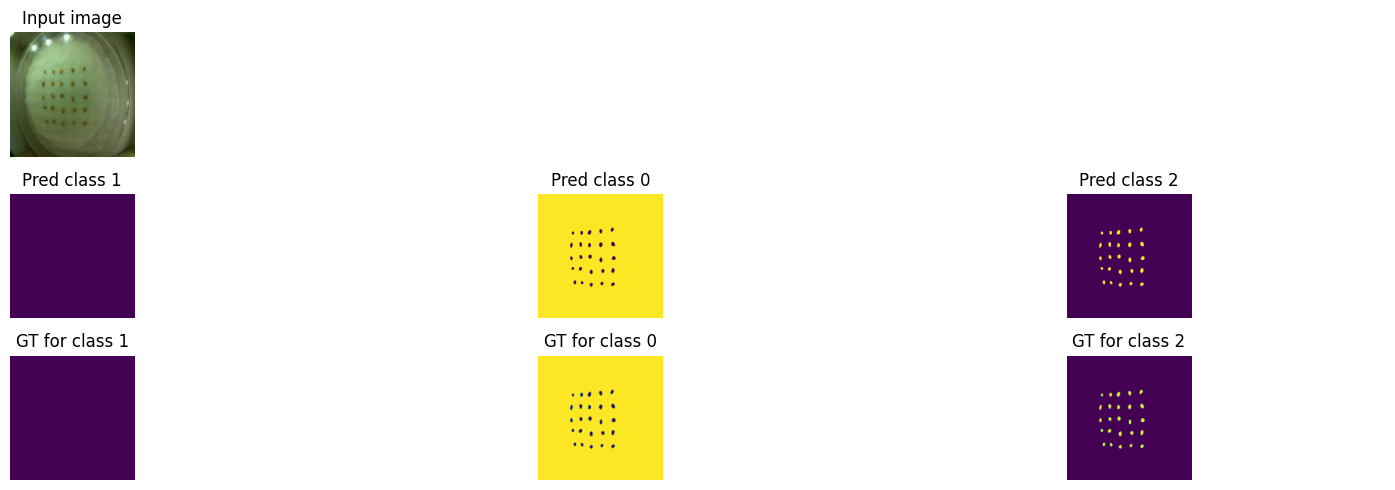

Train loss: 0.01884 | Time: 45m 19s | Val loss: 0.01525
Train_DICE_avg: 0.77614 | Train_Jaccard_avg: 0.71147 | Train_Sensitivity_avg: 0.95052 | Train_Specificity_avg: 0.91957 
Class 0 - Train_DICE: 0.99262 | Train_Jaccard: 0.98537 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.77923 
Class 1 - Train_DICE: 0.53550 | Train_Jaccard: 0.46651 | Train_Sensitivity: 0.91269 | Train_Specificity: 0.99020 
Class 2 - Train_DICE: 0.80030 | Train_Jaccard: 0.68252 | Train_Sensitivity: 0.94163 | Train_Specificity: 0.98927 
Val_DICE_avg: 0.82559 | Val_Jaccard_avg: 0.75508 | Val_Sensitivity_avg: 0.96603 | Val_Specificity_avg: 0.86671 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98439 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62012 
Class 1 - Val_DICE: 0.73748 | Val_Jaccard: 0.66825 | Val_Sensitivity: 0.92061 | Val_Specificity: 0.99476 
Class 2 - Val_DICE: 0.74719 | Val_Jaccard: 0.61260 | Val_Sensitivity: 0.97808 | Val_Specificity: 0.98524 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.01885 | Time: 46m 8s | Val loss: 0.01542
Train_DICE_avg: 0.77265 | Train_Jaccard_avg: 0.70840 | Train_Sensitivity_avg: 0.94809 | Train_Specificity_avg: 0.91988 
Class 0 - Train_DICE: 0.99267 | Train_Jaccard: 0.98547 | Train_Sensitivity: 0.99728 | Train_Specificity: 0.78025 
Class 1 - Train_DICE: 0.52454 | Train_Jaccard: 0.45610 | Train_Sensitivity: 0.90762 | Train_Specificity: 0.99007 
Class 2 - Train_DICE: 0.80073 | Train_Jaccard: 0.68362 | Train_Sensitivity: 0.93938 | Train_Specificity: 0.98932 
Val_DICE_avg: 0.82580 | Val_Jaccard_avg: 0.75534 | Val_Sensitivity_avg: 0.96729 | Val_Specificity_avg: 0.86703 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98438 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62103 
Class 1 - Val_DICE: 0.73803 | Val_Jaccard: 0.66844 | Val_Sensitivity: 0.92315 | Val_Specificity: 0.99474 
Class 2 - Val_DICE: 0.74727 | Val_Jaccard: 0.61320 | Val_Sensitivity: 0.97934 | Val_Specificity: 0.98530 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.01878 | Time: 46m 57s | Val loss: 0.01521
Train_DICE_avg: 0.77635 | Train_Jaccard_avg: 0.71199 | Train_Sensitivity_avg: 0.94939 | Train_Specificity_avg: 0.92074 
Class 0 - Train_DICE: 0.99271 | Train_Jaccard: 0.98556 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.78278 
Class 1 - Train_DICE: 0.53514 | Train_Jaccard: 0.46584 | Train_Sensitivity: 0.91067 | Train_Specificity: 0.99007 
Class 2 - Train_DICE: 0.80119 | Train_Jaccard: 0.68458 | Train_Sensitivity: 0.94024 | Train_Specificity: 0.98937 
Val_DICE_avg: 0.82253 | Val_Jaccard_avg: 0.75220 | Val_Sensitivity_avg: 0.96481 | Val_Specificity_avg: 0.86703 
Class 0 - Val_DICE: 0.99214 | Val_Jaccard: 0.98444 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62107 
Class 1 - Val_DICE: 0.72750 | Val_Jaccard: 0.65874 | Val_Sensitivity: 0.91584 | Val_Specificity: 0.99471 
Class 2 - Val_DICE: 0.74795 | Val_Jaccard: 0.61344 | Val_Sensitivity: 0.97919 | Val_Specificity: 0.98531 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01867 | Time: 47m 45s | Val loss: 0.01512
Train_DICE_avg: 0.77559 | Train_Jaccard_avg: 0.71093 | Train_Sensitivity_avg: 0.94948 | Train_Specificity_avg: 0.91962 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98543 | Train_Sensitivity: 0.99731 | Train_Specificity: 0.77955 
Class 1 - Train_DICE: 0.53291 | Train_Jaccard: 0.46417 | Train_Sensitivity: 0.91049 | Train_Specificity: 0.99002 
Class 2 - Train_DICE: 0.80122 | Train_Jaccard: 0.68320 | Train_Sensitivity: 0.94066 | Train_Specificity: 0.98928 
Val_DICE_avg: 0.82188 | Val_Jaccard_avg: 0.75174 | Val_Sensitivity_avg: 0.96399 | Val_Specificity_avg: 0.86725 
Class 0 - Val_DICE: 0.99217 | Val_Jaccard: 0.98450 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62177 
Class 1 - Val_DICE: 0.72220 | Val_Jaccard: 0.65379 | Val_Sensitivity: 0.91609 | Val_Specificity: 0.99451 
Class 2 - Val_DICE: 0.75127 | Val_Jaccard: 0.61694 | Val_Sensitivity: 0.97649 | Val_Specificity: 0.98549 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01865 | Time: 48m 34s | Val loss: 0.01503
Train_DICE_avg: 0.77193 | Train_Jaccard_avg: 0.70717 | Train_Sensitivity_avg: 0.94989 | Train_Specificity_avg: 0.91757 
Class 0 - Train_DICE: 0.99264 | Train_Jaccard: 0.98542 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.77347 
Class 1 - Train_DICE: 0.52389 | Train_Jaccard: 0.45472 | Train_Sensitivity: 0.90951 | Train_Specificity: 0.99006 
Class 2 - Train_DICE: 0.79927 | Train_Jaccard: 0.68138 | Train_Sensitivity: 0.94283 | Train_Specificity: 0.98917 
Val_DICE_avg: 0.82569 | Val_Jaccard_avg: 0.75580 | Val_Sensitivity_avg: 0.97092 | Val_Specificity_avg: 0.86760 
Class 0 - Val_DICE: 0.99218 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62276 
Class 1 - Val_DICE: 0.73377 | Val_Jaccard: 0.66572 | Val_Sensitivity: 0.93510 | Val_Specificity: 0.99451 
Class 2 - Val_DICE: 0.75113 | Val_Jaccard: 0.61716 | Val_Sensitivity: 0.97829 | Val_Specificity: 0.98552 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


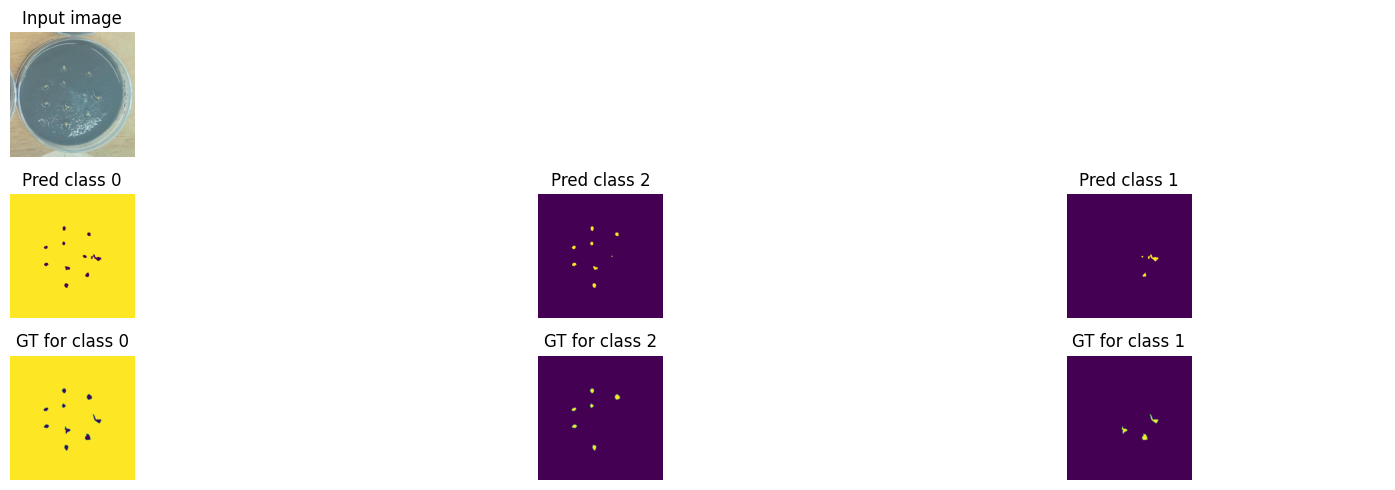

Train loss: 0.01846 | Time: 49m 22s | Val loss: 0.01523
Train_DICE_avg: 0.77602 | Train_Jaccard_avg: 0.71153 | Train_Sensitivity_avg: 0.95213 | Train_Specificity_avg: 0.91952 
Class 0 - Train_DICE: 0.99273 | Train_Jaccard: 0.98559 | Train_Sensitivity: 0.99737 | Train_Specificity: 0.77924 
Class 1 - Train_DICE: 0.53427 | Train_Jaccard: 0.46463 | Train_Sensitivity: 0.91689 | Train_Specificity: 0.99001 
Class 2 - Train_DICE: 0.80106 | Train_Jaccard: 0.68438 | Train_Sensitivity: 0.94213 | Train_Specificity: 0.98931 
Val_DICE_avg: 0.82319 | Val_Jaccard_avg: 0.75319 | Val_Sensitivity_avg: 0.96557 | Val_Specificity_avg: 0.86731 
Class 0 - Val_DICE: 0.99216 | Val_Jaccard: 0.98448 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62193 
Class 1 - Val_DICE: 0.72841 | Val_Jaccard: 0.66024 | Val_Sensitivity: 0.91842 | Val_Specificity: 0.99457 
Class 2 - Val_DICE: 0.74901 | Val_Jaccard: 0.61485 | Val_Sensitivity: 0.97891 | Val_Specificity: 0.98545 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [15]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [16]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]



Global Performance Metrics:
Loss mean: 0.01561, std: 0.00191
Dice Coefficient mean: 0.85171, std: 0.12550
Jaccard Index mean: 0.79419, std: 0.14173
Sensitivity mean: 0.86011, std: 0.12177
Specificity mean: 0.95304, std: 0.03683

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99571, std: 0.00281
Jaccard mean: 0.99147, std: 0.00551
Sensitivity mean: 0.99585, std: 0.00413
Specificity mean: 0.86451, std: 0.11036

Class 1:
Dice mean: 0.71412, std: 0.32207
Jaccard mean: 0.64086, std: 0.33846
Sensitivity mean: 0.74393, std: 0.31621
Specificity mean: 0.99809, std: 0.00370

Class 2:
Dice mean: 0.84531, std: 0.13333
Jaccard mean: 0.75023, std: 0.15832
Sensitivity mean: 0.84056, std: 0.13361
Specificity mean: 0.99652, std: 0.00374


### Focal Loss

In [17]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-DeepLabV3+-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.66 GB
GPU Memory - Reserved: 1.46 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


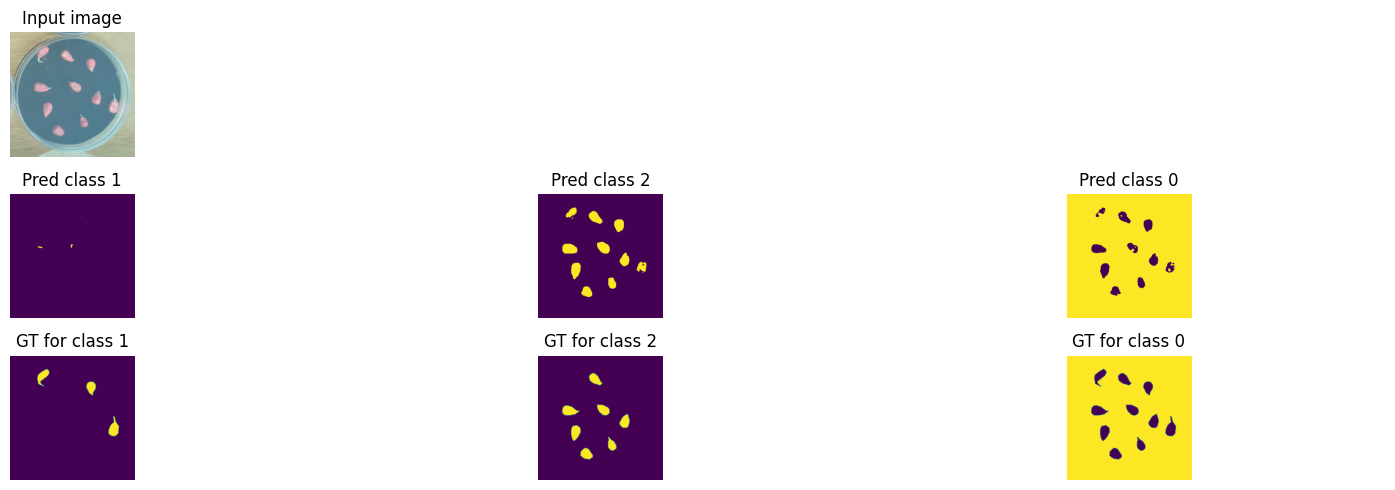

Train loss: 0.04232 | Time: 0m 48s | Val loss: 0.02096
Train_DICE_avg: 0.26086 | Train_Jaccard_avg: 0.22044 | Train_Sensitivity_avg: 0.82451 | Train_Specificity_avg: 0.69503 
Class 0 - Train_DICE: 0.43941 | Train_Jaccard: 0.36043 | Train_Sensitivity: 0.98475 | Train_Specificity: 0.13640 
Class 1 - Train_DICE: 0.23248 | Train_Jaccard: 0.23223 | Train_Sensitivity: 0.85647 | Train_Specificity: 0.98551 
Class 2 - Train_DICE: 0.11071 | Train_Jaccard: 0.06866 | Train_Sensitivity: 0.63231 | Train_Specificity: 0.96317 
Val_DICE_avg: 0.55523 | Val_Jaccard_avg: 0.50939 | Val_Sensitivity_avg: 0.97093 | Val_Specificity_avg: 0.73436 
Class 0 - Val_DICE: 0.92787 | Val_Jaccard: 0.87224 | Val_Sensitivity: 0.99744 | Val_Specificity: 0.24687 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.26956 | Val_Jaccard: 0.18768 | Val_Sensitivity: 0.91536 | Val_Specificity: 0.96786 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01354 | Time: 1m 36s | Val loss: 0.00864
Train_DICE_avg: 0.55149 | Train_Jaccard_avg: 0.50601 | Train_Sensitivity_avg: 0.95733 | Train_Specificity_avg: 0.84290 
Class 0 - Train_DICE: 0.97458 | Train_Jaccard: 0.95101 | Train_Sensitivity: 0.98677 | Train_Specificity: 0.56826 
Class 1 - Train_DICE: 0.27889 | Train_Jaccard: 0.27882 | Train_Sensitivity: 0.99627 | Train_Specificity: 0.98582 
Class 2 - Train_DICE: 0.40102 | Train_Jaccard: 0.28819 | Train_Sensitivity: 0.88896 | Train_Specificity: 0.97463 
Val_DICE_avg: 0.66217 | Val_Jaccard_avg: 0.61694 | Val_Sensitivity_avg: 0.96376 | Val_Specificity_avg: 0.85520 
Class 0 - Val_DICE: 0.98960 | Val_Jaccard: 0.97952 | Val_Sensitivity: 0.99682 | Val_Specificity: 0.59786 
Class 1 - Val_DICE: 0.46827 | Val_Jaccard: 0.46826 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.52865 | Val_Jaccard: 0.40303 | Val_Sensitivity: 0.89445 | Val_Specificity: 0.97942 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00848 | Time: 2m 23s | Val loss: 0.00586
Train_DICE_avg: 0.61022 | Train_Jaccard_avg: 0.56229 | Train_Sensitivity_avg: 0.95181 | Train_Specificity_avg: 0.88209 
Class 0 - Train_DICE: 0.98339 | Train_Jaccard: 0.96754 | Train_Sensitivity: 0.98800 | Train_Specificity: 0.67882 
Class 1 - Train_DICE: 0.28001 | Train_Jaccard: 0.27968 | Train_Sensitivity: 0.98638 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.56724 | Train_Jaccard: 0.43965 | Train_Sensitivity: 0.88105 | Train_Specificity: 0.98169 
Val_DICE_avg: 0.67734 | Val_Jaccard_avg: 0.63230 | Val_Sensitivity_avg: 0.96371 | Val_Specificity_avg: 0.87384 
Class 0 - Val_DICE: 0.99078 | Val_Jaccard: 0.98179 | Val_Sensitivity: 0.99712 | Val_Specificity: 0.65177 
Class 1 - Val_DICE: 0.46862 | Val_Jaccard: 0.46844 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57262 | Val_Jaccard: 0.44668 | Val_Sensitivity: 0.89400 | Val_Specificity: 0.98140 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00666 | Time: 3m 11s | Val loss: 0.00464
Train_DICE_avg: 0.62198 | Train_Jaccard_avg: 0.57529 | Train_Sensitivity_avg: 0.94933 | Train_Specificity_avg: 0.89532 
Class 0 - Train_DICE: 0.98587 | Train_Jaccard: 0.97228 | Train_Sensitivity: 0.98933 | Train_Specificity: 0.71671 
Class 1 - Train_DICE: 0.27439 | Train_Jaccard: 0.27353 | Train_Sensitivity: 0.98237 | Train_Specificity: 0.98572 
Class 2 - Train_DICE: 0.60567 | Train_Jaccard: 0.48005 | Train_Sensitivity: 0.87630 | Train_Specificity: 0.98353 
Val_DICE_avg: 0.68493 | Val_Jaccard_avg: 0.64000 | Val_Sensitivity_avg: 0.95557 | Val_Specificity_avg: 0.87508 
Class 0 - Val_DICE: 0.99099 | Val_Jaccard: 0.98221 | Val_Sensitivity: 0.99735 | Val_Specificity: 0.65451 
Class 1 - Val_DICE: 0.47050 | Val_Jaccard: 0.46941 | Val_Sensitivity: 0.98270 | Val_Specificity: 0.98840 
Class 2 - Val_DICE: 0.59329 | Val_Jaccard: 0.46839 | Val_Sensitivity: 0.88666 | Val_Specificity: 0.98234 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00573 | Time: 3m 58s | Val loss: 0.00401
Train_DICE_avg: 0.63185 | Train_Jaccard_avg: 0.58477 | Train_Sensitivity_avg: 0.93960 | Train_Specificity_avg: 0.90248 
Class 0 - Train_DICE: 0.98715 | Train_Jaccard: 0.97474 | Train_Sensitivity: 0.99023 | Train_Specificity: 0.73738 
Class 1 - Train_DICE: 0.28209 | Train_Jaccard: 0.27951 | Train_Sensitivity: 0.96137 | Train_Specificity: 0.98579 
Class 2 - Train_DICE: 0.62631 | Train_Jaccard: 0.50007 | Train_Sensitivity: 0.86720 | Train_Specificity: 0.98428 
Val_DICE_avg: 0.69242 | Val_Jaccard_avg: 0.64297 | Val_Sensitivity_avg: 0.94496 | Val_Specificity_avg: 0.87562 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98330 | Val_Sensitivity: 0.99754 | Val_Specificity: 0.65524 
Class 1 - Val_DICE: 0.46876 | Val_Jaccard: 0.46020 | Val_Sensitivity: 0.94880 | Val_Specificity: 0.98893 
Class 2 - Val_DICE: 0.61694 | Val_Jaccard: 0.48540 | Val_Sensitivity: 0.88856 | Val_Specificity: 0.98267 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


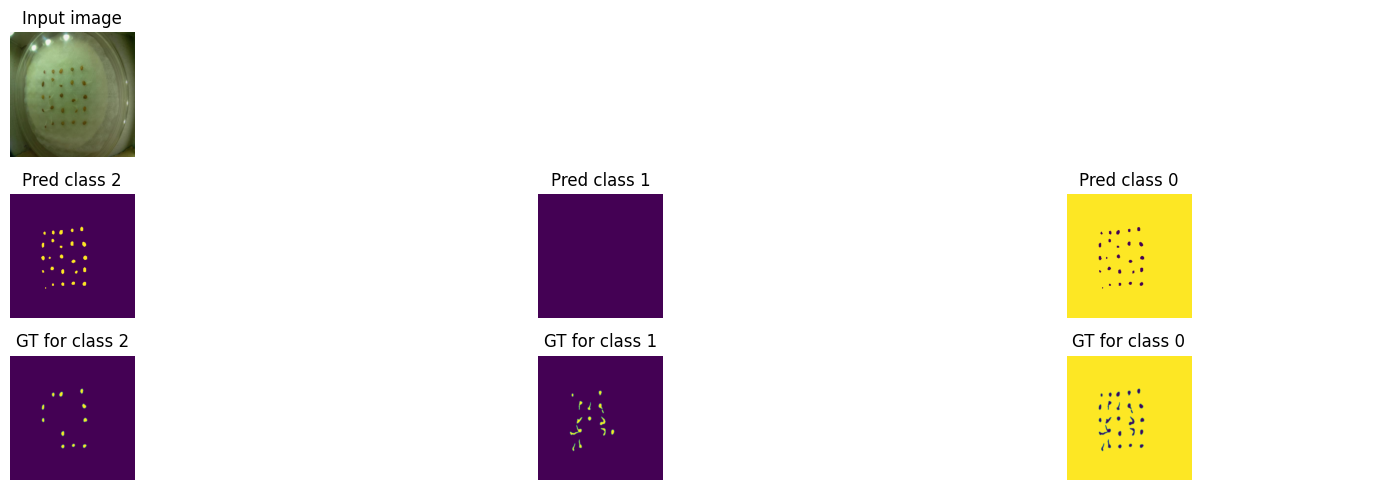

Train loss: 0.00511 | Time: 4m 46s | Val loss: 0.00361
Train_DICE_avg: 0.64320 | Train_Jaccard_avg: 0.59494 | Train_Sensitivity_avg: 0.93153 | Train_Specificity_avg: 0.90750 
Class 0 - Train_DICE: 0.98798 | Train_Jaccard: 0.97635 | Train_Sensitivity: 0.99114 | Train_Specificity: 0.75169 
Class 1 - Train_DICE: 0.29149 | Train_Jaccard: 0.28596 | Train_Sensitivity: 0.94170 | Train_Specificity: 0.98583 
Class 2 - Train_DICE: 0.65014 | Train_Jaccard: 0.52253 | Train_Sensitivity: 0.86176 | Train_Specificity: 0.98497 
Val_DICE_avg: 0.69456 | Val_Jaccard_avg: 0.64100 | Val_Sensitivity_avg: 0.92308 | Val_Specificity_avg: 0.86598 
Class 0 - Val_DICE: 0.99119 | Val_Jaccard: 0.98259 | Val_Sensitivity: 0.99784 | Val_Specificity: 0.62540 
Class 1 - Val_DICE: 0.45656 | Val_Jaccard: 0.43957 | Val_Sensitivity: 0.88204 | Val_Specificity: 0.98963 
Class 2 - Val_DICE: 0.63594 | Val_Jaccard: 0.50083 | Val_Sensitivity: 0.88937 | Val_Specificity: 0.98292 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00476 | Time: 5m 34s | Val loss: 0.00329
Train_DICE_avg: 0.64881 | Train_Jaccard_avg: 0.59898 | Train_Sensitivity_avg: 0.91919 | Train_Specificity_avg: 0.91149 
Class 0 - Train_DICE: 0.98826 | Train_Jaccard: 0.97690 | Train_Sensitivity: 0.99094 | Train_Specificity: 0.76219 
Class 1 - Train_DICE: 0.29036 | Train_Jaccard: 0.28056 | Train_Sensitivity: 0.90510 | Train_Specificity: 0.98653 
Class 2 - Train_DICE: 0.66780 | Train_Jaccard: 0.53948 | Train_Sensitivity: 0.86153 | Train_Specificity: 0.98576 
Val_DICE_avg: 0.70413 | Val_Jaccard_avg: 0.64851 | Val_Sensitivity_avg: 0.91718 | Val_Specificity_avg: 0.86798 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98335 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.63033 
Class 1 - Val_DICE: 0.46935 | Val_Jaccard: 0.44651 | Val_Sensitivity: 0.86323 | Val_Specificity: 0.99015 
Class 2 - Val_DICE: 0.65147 | Val_Jaccard: 0.51565 | Val_Sensitivity: 0.89034 | Val_Specificity: 0.98345 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00447 | Time: 6m 21s | Val loss: 0.00304
Train_DICE_avg: 0.65359 | Train_Jaccard_avg: 0.60206 | Train_Sensitivity_avg: 0.91488 | Train_Specificity_avg: 0.91086 
Class 0 - Train_DICE: 0.98868 | Train_Jaccard: 0.97770 | Train_Sensitivity: 0.99138 | Train_Specificity: 0.76002 
Class 1 - Train_DICE: 0.29297 | Train_Jaccard: 0.27842 | Train_Sensitivity: 0.88865 | Train_Specificity: 0.98647 
Class 2 - Train_DICE: 0.67911 | Train_Jaccard: 0.55006 | Train_Sensitivity: 0.86462 | Train_Specificity: 0.98611 
Val_DICE_avg: 0.71435 | Val_Jaccard_avg: 0.65557 | Val_Sensitivity_avg: 0.91773 | Val_Specificity_avg: 0.86806 
Class 0 - Val_DICE: 0.99181 | Val_Jaccard: 0.98380 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.63015 
Class 1 - Val_DICE: 0.49195 | Val_Jaccard: 0.46258 | Val_Sensitivity: 0.85573 | Val_Specificity: 0.99091 
Class 2 - Val_DICE: 0.65928 | Val_Jaccard: 0.52031 | Val_Sensitivity: 0.89932 | Val_Specificity: 0.98312 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00419 | Time: 7m 9s | Val loss: 0.00296
Train_DICE_avg: 0.66106 | Train_Jaccard_avg: 0.60785 | Train_Sensitivity_avg: 0.91329 | Train_Specificity_avg: 0.91285 
Class 0 - Train_DICE: 0.98932 | Train_Jaccard: 0.97895 | Train_Sensitivity: 0.99222 | Train_Specificity: 0.76554 
Class 1 - Train_DICE: 0.30346 | Train_Jaccard: 0.28389 | Train_Sensitivity: 0.87880 | Train_Specificity: 0.98667 
Class 2 - Train_DICE: 0.69040 | Train_Jaccard: 0.56069 | Train_Sensitivity: 0.86886 | Train_Specificity: 0.98633 
Val_DICE_avg: 0.73349 | Val_Jaccard_avg: 0.67147 | Val_Sensitivity_avg: 0.91953 | Val_Specificity_avg: 0.86203 
Class 0 - Val_DICE: 0.99150 | Val_Jaccard: 0.98320 | Val_Sensitivity: 0.99849 | Val_Specificity: 0.61070 
Class 1 - Val_DICE: 0.53206 | Val_Jaccard: 0.49344 | Val_Sensitivity: 0.85554 | Val_Specificity: 0.99180 
Class 2 - Val_DICE: 0.67690 | Val_Jaccard: 0.53778 | Val_Sensitivity: 0.90456 | Val_Specificity: 0.98359 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00399 | Time: 7m 56s | Val loss: 0.00272
Train_DICE_avg: 0.66628 | Train_Jaccard_avg: 0.61205 | Train_Sensitivity_avg: 0.91071 | Train_Specificity_avg: 0.91311 
Class 0 - Train_DICE: 0.98970 | Train_Jaccard: 0.97968 | Train_Sensitivity: 0.99242 | Train_Specificity: 0.76573 
Class 1 - Train_DICE: 0.31116 | Train_Jaccard: 0.28745 | Train_Sensitivity: 0.86913 | Train_Specificity: 0.98689 
Class 2 - Train_DICE: 0.69798 | Train_Jaccard: 0.56903 | Train_Sensitivity: 0.87058 | Train_Specificity: 0.98670 
Val_DICE_avg: 0.73991 | Val_Jaccard_avg: 0.67819 | Val_Sensitivity_avg: 0.94068 | Val_Specificity_avg: 0.87089 
Class 0 - Val_DICE: 0.99232 | Val_Jaccard: 0.98479 | Val_Sensitivity: 0.99827 | Val_Specificity: 0.63795 
Class 1 - Val_DICE: 0.55522 | Val_Jaccard: 0.51819 | Val_Sensitivity: 0.91630 | Val_Specificity: 0.99130 
Class 2 - Val_DICE: 0.67219 | Val_Jaccard: 0.53160 | Val_Sensitivity: 0.90746 | Val_Specificity: 0.98343 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


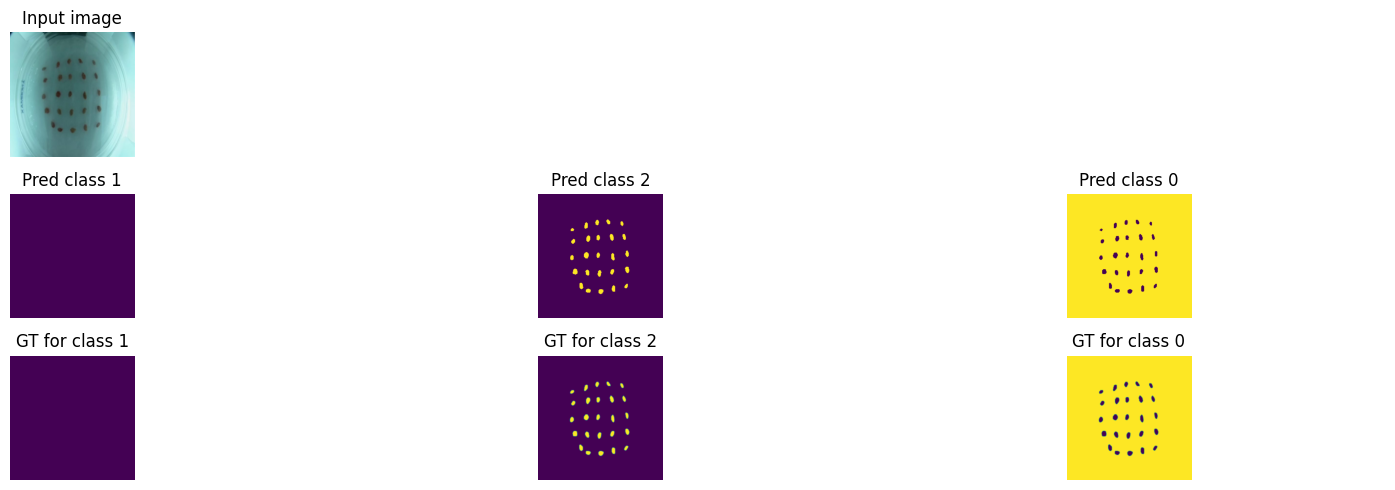

Train loss: 0.00374 | Time: 8m 45s | Val loss: 0.00247
Train_DICE_avg: 0.68011 | Train_Jaccard_avg: 0.62395 | Train_Sensitivity_avg: 0.91097 | Train_Specificity_avg: 0.91686 
Class 0 - Train_DICE: 0.98988 | Train_Jaccard: 0.98003 | Train_Sensitivity: 0.99243 | Train_Specificity: 0.77634 
Class 1 - Train_DICE: 0.34057 | Train_Jaccard: 0.31107 | Train_Sensitivity: 0.86689 | Train_Specificity: 0.98727 
Class 2 - Train_DICE: 0.70988 | Train_Jaccard: 0.58074 | Train_Sensitivity: 0.87361 | Train_Specificity: 0.98697 
Val_DICE_avg: 0.75092 | Val_Jaccard_avg: 0.68692 | Val_Sensitivity_avg: 0.93712 | Val_Specificity_avg: 0.86686 
Class 0 - Val_DICE: 0.99222 | Val_Jaccard: 0.98461 | Val_Sensitivity: 0.99853 | Val_Specificity: 0.62496 
Class 1 - Val_DICE: 0.56991 | Val_Jaccard: 0.52553 | Val_Sensitivity: 0.89386 | Val_Specificity: 0.99191 
Class 2 - Val_DICE: 0.69064 | Val_Jaccard: 0.55063 | Val_Sensitivity: 0.91898 | Val_Specificity: 0.98371 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00347 | Time: 9m 34s | Val loss: 0.00236
Train_DICE_avg: 0.68519 | Train_Jaccard_avg: 0.62800 | Train_Sensitivity_avg: 0.90969 | Train_Specificity_avg: 0.91636 
Class 0 - Train_DICE: 0.99019 | Train_Jaccard: 0.98063 | Train_Sensitivity: 0.99297 | Train_Specificity: 0.77418 
Class 1 - Train_DICE: 0.34455 | Train_Jaccard: 0.31069 | Train_Sensitivity: 0.86210 | Train_Specificity: 0.98738 
Class 2 - Train_DICE: 0.72084 | Train_Jaccard: 0.59268 | Train_Sensitivity: 0.87401 | Train_Specificity: 0.98751 
Val_DICE_avg: 0.75733 | Val_Jaccard_avg: 0.69096 | Val_Sensitivity_avg: 0.92001 | Val_Specificity_avg: 0.86118 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98377 | Val_Sensitivity: 0.99881 | Val_Specificity: 0.60675 
Class 1 - Val_DICE: 0.58149 | Val_Jaccard: 0.52944 | Val_Sensitivity: 0.83089 | Val_Specificity: 0.99303 
Class 2 - Val_DICE: 0.69871 | Val_Jaccard: 0.55966 | Val_Sensitivity: 0.93034 | Val_Specificity: 0.98375 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00337 | Time: 10m 23s | Val loss: 0.00227
Train_DICE_avg: 0.69356 | Train_Jaccard_avg: 0.63529 | Train_Sensitivity_avg: 0.91203 | Train_Specificity_avg: 0.91655 
Class 0 - Train_DICE: 0.99025 | Train_Jaccard: 0.98076 | Train_Sensitivity: 0.99322 | Train_Specificity: 0.77442 
Class 1 - Train_DICE: 0.35896 | Train_Jaccard: 0.32150 | Train_Sensitivity: 0.86475 | Train_Specificity: 0.98747 
Class 2 - Train_DICE: 0.73146 | Train_Jaccard: 0.60362 | Train_Sensitivity: 0.87812 | Train_Specificity: 0.98775 
Val_DICE_avg: 0.77308 | Val_Jaccard_avg: 0.70864 | Val_Sensitivity_avg: 0.93682 | Val_Specificity_avg: 0.86103 
Class 0 - Val_DICE: 0.99161 | Val_Jaccard: 0.98340 | Val_Sensitivity: 0.99887 | Val_Specificity: 0.60494 
Class 1 - Val_DICE: 0.60866 | Val_Jaccard: 0.55733 | Val_Sensitivity: 0.87749 | Val_Specificity: 0.99287 
Class 2 - Val_DICE: 0.71898 | Val_Jaccard: 0.58519 | Val_Sensitivity: 0.93408 | Val_Specificity: 0.98529 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00328 | Time: 11m 11s | Val loss: 0.00220
Train_DICE_avg: 0.69878 | Train_Jaccard_avg: 0.64038 | Train_Sensitivity_avg: 0.91060 | Train_Specificity_avg: 0.91809 
Class 0 - Train_DICE: 0.99045 | Train_Jaccard: 0.98114 | Train_Sensitivity: 0.99320 | Train_Specificity: 0.77815 
Class 1 - Train_DICE: 0.36971 | Train_Jaccard: 0.33023 | Train_Sensitivity: 0.85890 | Train_Specificity: 0.98786 
Class 2 - Train_DICE: 0.73619 | Train_Jaccard: 0.60977 | Train_Sensitivity: 0.87971 | Train_Specificity: 0.98826 
Val_DICE_avg: 0.76785 | Val_Jaccard_avg: 0.70090 | Val_Sensitivity_avg: 0.93171 | Val_Specificity_avg: 0.86738 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98468 | Val_Sensitivity: 0.99885 | Val_Specificity: 0.62520 
Class 1 - Val_DICE: 0.61481 | Val_Jaccard: 0.55953 | Val_Sensitivity: 0.85582 | Val_Specificity: 0.99302 
Class 2 - Val_DICE: 0.69648 | Val_Jaccard: 0.55849 | Val_Sensitivity: 0.94046 | Val_Specificity: 0.98393 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00318 | Time: 12m 0s | Val loss: 0.00215
Train_DICE_avg: 0.70193 | Train_Jaccard_avg: 0.64271 | Train_Sensitivity_avg: 0.90951 | Train_Specificity_avg: 0.91655 
Class 0 - Train_DICE: 0.99063 | Train_Jaccard: 0.98149 | Train_Sensitivity: 0.99373 | Train_Specificity: 0.77344 
Class 1 - Train_DICE: 0.37513 | Train_Jaccard: 0.33239 | Train_Sensitivity: 0.85157 | Train_Specificity: 0.98802 
Class 2 - Train_DICE: 0.74003 | Train_Jaccard: 0.61425 | Train_Sensitivity: 0.88324 | Train_Specificity: 0.98820 
Val_DICE_avg: 0.77483 | Val_Jaccard_avg: 0.71103 | Val_Sensitivity_avg: 0.93934 | Val_Specificity_avg: 0.86350 
Class 0 - Val_DICE: 0.99176 | Val_Jaccard: 0.98371 | Val_Sensitivity: 0.99899 | Val_Specificity: 0.61168 
Class 1 - Val_DICE: 0.59875 | Val_Jaccard: 0.54947 | Val_Sensitivity: 0.88829 | Val_Specificity: 0.99308 
Class 2 - Val_DICE: 0.73398 | Val_Jaccard: 0.59992 | Val_Sensitivity: 0.93074 | Val_Specificity: 0.98576 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


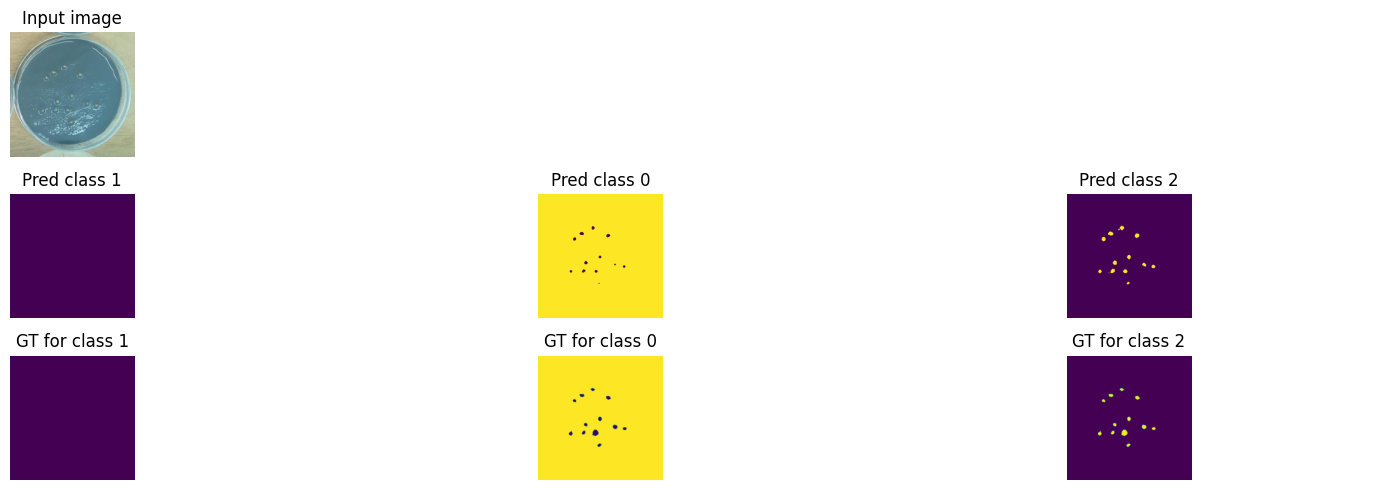

Train loss: 0.00310 | Time: 12m 48s | Val loss: 0.00215
Train_DICE_avg: 0.70429 | Train_Jaccard_avg: 0.64463 | Train_Sensitivity_avg: 0.90794 | Train_Specificity_avg: 0.91750 
Class 0 - Train_DICE: 0.99080 | Train_Jaccard: 0.98183 | Train_Sensitivity: 0.99396 | Train_Specificity: 0.77642 
Class 1 - Train_DICE: 0.37914 | Train_Jaccard: 0.33545 | Train_Sensitivity: 0.84561 | Train_Specificity: 0.98785 
Class 2 - Train_DICE: 0.74292 | Train_Jaccard: 0.61663 | Train_Sensitivity: 0.88424 | Train_Specificity: 0.98823 
Val_DICE_avg: 0.77911 | Val_Jaccard_avg: 0.71294 | Val_Sensitivity_avg: 0.93913 | Val_Specificity_avg: 0.86449 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99900 | Val_Specificity: 0.61530 
Class 1 - Val_DICE: 0.62003 | Val_Jaccard: 0.56589 | Val_Sensitivity: 0.88215 | Val_Specificity: 0.99313 
Class 2 - Val_DICE: 0.72533 | Val_Jaccard: 0.58882 | Val_Sensitivity: 0.93623 | Val_Specificity: 0.98504 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.00303 | Time: 13m 37s | Val loss: 0.00212
Train_DICE_avg: 0.70589 | Train_Jaccard_avg: 0.64604 | Train_Sensitivity_avg: 0.91471 | Train_Specificity_avg: 0.91721 
Class 0 - Train_DICE: 0.99095 | Train_Jaccard: 0.98211 | Train_Sensitivity: 0.99422 | Train_Specificity: 0.77536 
Class 1 - Train_DICE: 0.38119 | Train_Jaccard: 0.33601 | Train_Sensitivity: 0.86229 | Train_Specificity: 0.98800 
Class 2 - Train_DICE: 0.74552 | Train_Jaccard: 0.61999 | Train_Sensitivity: 0.88762 | Train_Specificity: 0.98826 
Val_DICE_avg: 0.76138 | Val_Jaccard_avg: 0.69295 | Val_Sensitivity_avg: 0.91025 | Val_Specificity_avg: 0.86285 
Class 0 - Val_DICE: 0.99182 | Val_Jaccard: 0.98382 | Val_Sensitivity: 0.99909 | Val_Specificity: 0.61045 
Class 1 - Val_DICE: 0.58105 | Val_Jaccard: 0.52077 | Val_Sensitivity: 0.78182 | Val_Specificity: 0.99413 
Class 2 - Val_DICE: 0.71127 | Val_Jaccard: 0.57426 | Val_Sensitivity: 0.94984 | Val_Specificity: 0.98397 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00299 | Time: 14m 25s | Val loss: 0.00204
Train_DICE_avg: 0.70817 | Train_Jaccard_avg: 0.64809 | Train_Sensitivity_avg: 0.90948 | Train_Specificity_avg: 0.91734 
Class 0 - Train_DICE: 0.99106 | Train_Jaccard: 0.98233 | Train_Sensitivity: 0.99439 | Train_Specificity: 0.77560 
Class 1 - Train_DICE: 0.38502 | Train_Jaccard: 0.33831 | Train_Sensitivity: 0.84570 | Train_Specificity: 0.98803 
Class 2 - Train_DICE: 0.74844 | Train_Jaccard: 0.62363 | Train_Sensitivity: 0.88836 | Train_Specificity: 0.98839 
Val_DICE_avg: 0.77419 | Val_Jaccard_avg: 0.70776 | Val_Sensitivity_avg: 0.93165 | Val_Specificity_avg: 0.86205 
Class 0 - Val_DICE: 0.99173 | Val_Jaccard: 0.98365 | Val_Sensitivity: 0.99909 | Val_Specificity: 0.60760 
Class 1 - Val_DICE: 0.60310 | Val_Jaccard: 0.54754 | Val_Sensitivity: 0.84861 | Val_Specificity: 0.99364 
Class 2 - Val_DICE: 0.72774 | Val_Jaccard: 0.59208 | Val_Sensitivity: 0.94725 | Val_Specificity: 0.98489 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00295 | Time: 15m 13s | Val loss: 0.00212
Train_DICE_avg: 0.71508 | Train_Jaccard_avg: 0.65458 | Train_Sensitivity_avg: 0.91350 | Train_Specificity_avg: 0.91944 
Class 0 - Train_DICE: 0.99116 | Train_Jaccard: 0.98253 | Train_Sensitivity: 0.99439 | Train_Specificity: 0.78142 
Class 1 - Train_DICE: 0.39989 | Train_Jaccard: 0.35162 | Train_Sensitivity: 0.85524 | Train_Specificity: 0.98835 
Class 2 - Train_DICE: 0.75418 | Train_Jaccard: 0.62960 | Train_Sensitivity: 0.89088 | Train_Specificity: 0.98855 
Val_DICE_avg: 0.74772 | Val_Jaccard_avg: 0.67794 | Val_Sensitivity_avg: 0.89557 | Val_Specificity_avg: 0.86453 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98396 | Val_Sensitivity: 0.99913 | Val_Specificity: 0.61571 
Class 1 - Val_DICE: 0.55952 | Val_Jaccard: 0.49563 | Val_Sensitivity: 0.72709 | Val_Specificity: 0.99451 
Class 2 - Val_DICE: 0.69175 | Val_Jaccard: 0.55422 | Val_Sensitivity: 0.96049 | Val_Specificity: 0.98338 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00287 | Time: 16m 2s | Val loss: 0.00202
Train_DICE_avg: 0.71467 | Train_Jaccard_avg: 0.65440 | Train_Sensitivity_avg: 0.91293 | Train_Specificity_avg: 0.92072 
Class 0 - Train_DICE: 0.99141 | Train_Jaccard: 0.98301 | Train_Sensitivity: 0.99447 | Train_Specificity: 0.78516 
Class 1 - Train_DICE: 0.39448 | Train_Jaccard: 0.34604 | Train_Sensitivity: 0.85202 | Train_Specificity: 0.98817 
Class 2 - Train_DICE: 0.75811 | Train_Jaccard: 0.63415 | Train_Sensitivity: 0.89229 | Train_Specificity: 0.98882 
Val_DICE_avg: 0.77789 | Val_Jaccard_avg: 0.71046 | Val_Sensitivity_avg: 0.92646 | Val_Specificity_avg: 0.86365 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98411 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.61248 
Class 1 - Val_DICE: 0.62606 | Val_Jaccard: 0.56682 | Val_Sensitivity: 0.82675 | Val_Specificity: 0.99395 
Class 2 - Val_DICE: 0.71565 | Val_Jaccard: 0.58046 | Val_Sensitivity: 0.95355 | Val_Specificity: 0.98453 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


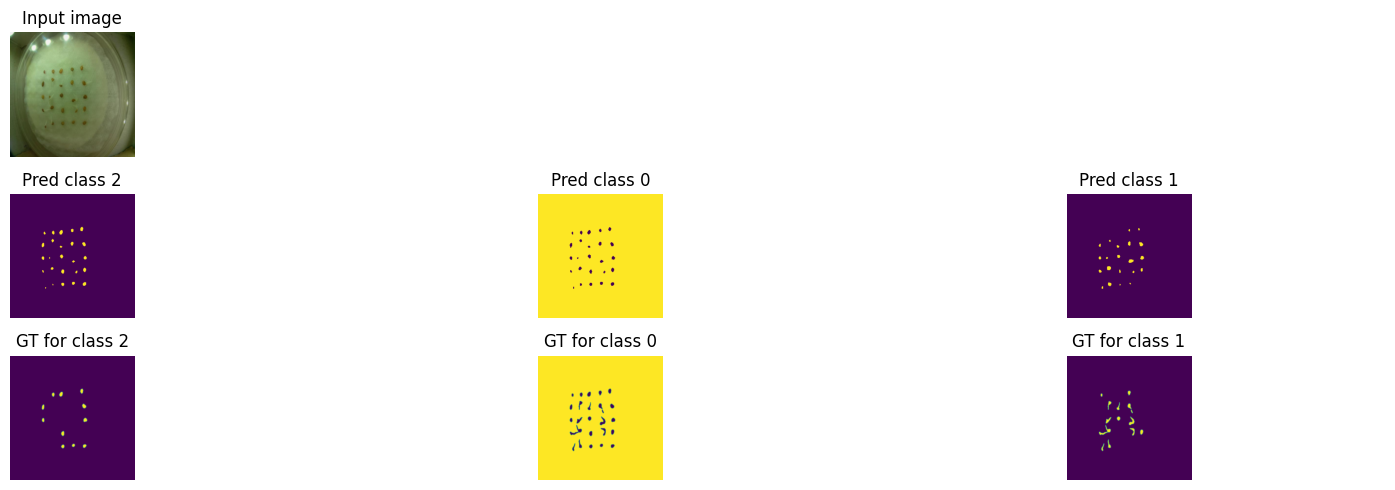

Train loss: 0.00286 | Time: 16m 51s | Val loss: 0.00197
Train_DICE_avg: 0.71790 | Train_Jaccard_avg: 0.65707 | Train_Sensitivity_avg: 0.91192 | Train_Specificity_avg: 0.91909 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98303 | Train_Sensitivity: 0.99468 | Train_Specificity: 0.78032 
Class 1 - Train_DICE: 0.40455 | Train_Jaccard: 0.35495 | Train_Sensitivity: 0.84836 | Train_Specificity: 0.98836 
Class 2 - Train_DICE: 0.75772 | Train_Jaccard: 0.63322 | Train_Sensitivity: 0.89272 | Train_Specificity: 0.98860 
Val_DICE_avg: 0.78865 | Val_Jaccard_avg: 0.72217 | Val_Sensitivity_avg: 0.94324 | Val_Specificity_avg: 0.86608 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98439 | Val_Sensitivity: 0.99911 | Val_Specificity: 0.61924 
Class 1 - Val_DICE: 0.64696 | Val_Jaccard: 0.58944 | Val_Sensitivity: 0.88226 | Val_Specificity: 0.99373 
Class 2 - Val_DICE: 0.72686 | Val_Jaccard: 0.59268 | Val_Sensitivity: 0.94836 | Val_Specificity: 0.98527 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00278 | Time: 17m 39s | Val loss: 0.00197
Train_DICE_avg: 0.72110 | Train_Jaccard_avg: 0.65969 | Train_Sensitivity_avg: 0.91633 | Train_Specificity_avg: 0.91782 
Class 0 - Train_DICE: 0.99162 | Train_Jaccard: 0.98341 | Train_Sensitivity: 0.99504 | Train_Specificity: 0.77657 
Class 1 - Train_DICE: 0.41376 | Train_Jaccard: 0.36237 | Train_Sensitivity: 0.85944 | Train_Specificity: 0.98839 
Class 2 - Train_DICE: 0.75794 | Train_Jaccard: 0.63330 | Train_Sensitivity: 0.89450 | Train_Specificity: 0.98849 
Val_DICE_avg: 0.79074 | Val_Jaccard_avg: 0.72395 | Val_Sensitivity_avg: 0.94959 | Val_Specificity_avg: 0.86879 
Class 0 - Val_DICE: 0.99230 | Val_Jaccard: 0.98476 | Val_Sensitivity: 0.99909 | Val_Specificity: 0.62765 
Class 1 - Val_DICE: 0.65283 | Val_Jaccard: 0.59655 | Val_Sensitivity: 0.90146 | Val_Specificity: 0.99364 
Class 2 - Val_DICE: 0.72708 | Val_Jaccard: 0.59054 | Val_Sensitivity: 0.94823 | Val_Specificity: 0.98507 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00273 | Time: 18m 28s | Val loss: 0.00192
Train_DICE_avg: 0.72464 | Train_Jaccard_avg: 0.66296 | Train_Sensitivity_avg: 0.91745 | Train_Specificity_avg: 0.91871 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98334 | Train_Sensitivity: 0.99504 | Train_Specificity: 0.77867 
Class 1 - Train_DICE: 0.42255 | Train_Jaccard: 0.36918 | Train_Sensitivity: 0.85937 | Train_Specificity: 0.98872 
Class 2 - Train_DICE: 0.75978 | Train_Jaccard: 0.63635 | Train_Sensitivity: 0.89795 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.79233 | Val_Jaccard_avg: 0.72518 | Val_Sensitivity_avg: 0.93916 | Val_Specificity_avg: 0.86279 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98378 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.60903 
Class 1 - Val_DICE: 0.65433 | Val_Jaccard: 0.59431 | Val_Sensitivity: 0.86682 | Val_Specificity: 0.99401 
Class 2 - Val_DICE: 0.73086 | Val_Jaccard: 0.59746 | Val_Sensitivity: 0.95143 | Val_Specificity: 0.98531 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00267 | Time: 19m 16s | Val loss: 0.00188
Train_DICE_avg: 0.72699 | Train_Jaccard_avg: 0.66531 | Train_Sensitivity_avg: 0.91652 | Train_Specificity_avg: 0.92143 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98393 | Train_Sensitivity: 0.99520 | Train_Specificity: 0.78661 
Class 1 - Train_DICE: 0.42503 | Train_Jaccard: 0.37090 | Train_Sensitivity: 0.85596 | Train_Specificity: 0.98880 
Class 2 - Train_DICE: 0.76406 | Train_Jaccard: 0.64110 | Train_Sensitivity: 0.89841 | Train_Specificity: 0.98888 
Val_DICE_avg: 0.78794 | Val_Jaccard_avg: 0.72104 | Val_Sensitivity_avg: 0.93961 | Val_Specificity_avg: 0.86452 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98413 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.61430 
Class 1 - Val_DICE: 0.63285 | Val_Jaccard: 0.57331 | Val_Sensitivity: 0.86852 | Val_Specificity: 0.99383 
Class 2 - Val_DICE: 0.73900 | Val_Jaccard: 0.60567 | Val_Sensitivity: 0.95112 | Val_Specificity: 0.98544 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.00261 | Time: 20m 5s | Val loss: 0.00187
Train_DICE_avg: 0.72669 | Train_Jaccard_avg: 0.66468 | Train_Sensitivity_avg: 0.91991 | Train_Specificity_avg: 0.91905 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.99544 | Train_Specificity: 0.77987 
Class 1 - Train_DICE: 0.42347 | Train_Jaccard: 0.36910 | Train_Sensitivity: 0.86293 | Train_Specificity: 0.98857 
Class 2 - Train_DICE: 0.76461 | Train_Jaccard: 0.64076 | Train_Sensitivity: 0.90136 | Train_Specificity: 0.98870 
Val_DICE_avg: 0.78822 | Val_Jaccard_avg: 0.72019 | Val_Sensitivity_avg: 0.92928 | Val_Specificity_avg: 0.86391 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.61231 
Class 1 - Val_DICE: 0.63217 | Val_Jaccard: 0.57169 | Val_Sensitivity: 0.83788 | Val_Specificity: 0.99439 
Class 2 - Val_DICE: 0.74059 | Val_Jaccard: 0.60488 | Val_Sensitivity: 0.95070 | Val_Specificity: 0.98504 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


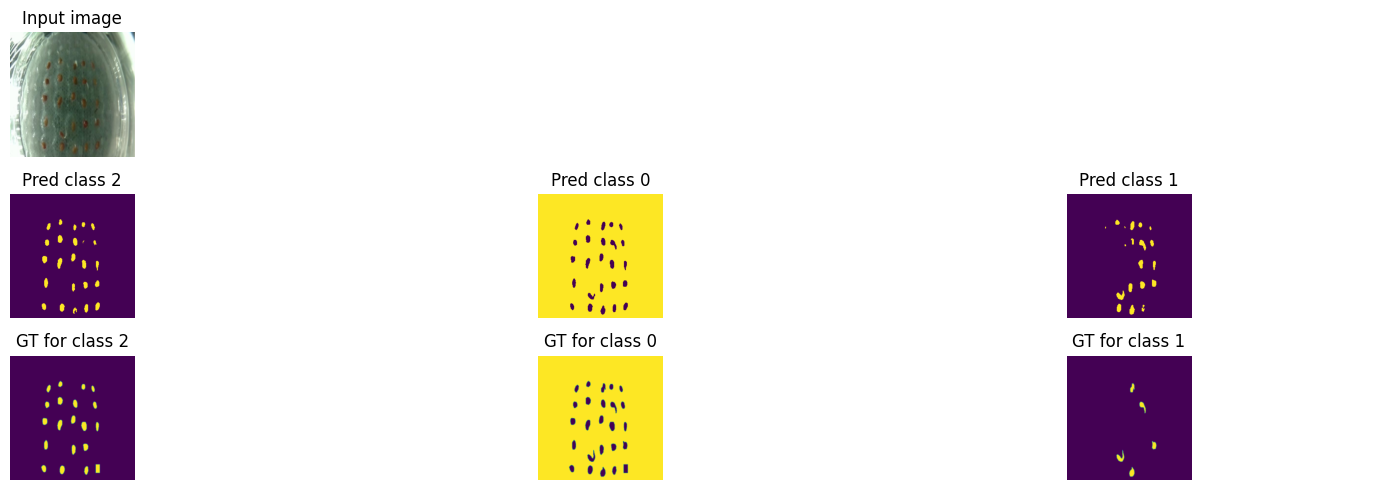

Train loss: 0.00259 | Time: 20m 53s | Val loss: 0.00184
Train_DICE_avg: 0.73374 | Train_Jaccard_avg: 0.67098 | Train_Sensitivity_avg: 0.91848 | Train_Specificity_avg: 0.91933 
Class 0 - Train_DICE: 0.99192 | Train_Jaccard: 0.98400 | Train_Sensitivity: 0.99536 | Train_Specificity: 0.78029 
Class 1 - Train_DICE: 0.43946 | Train_Jaccard: 0.38258 | Train_Sensitivity: 0.85856 | Train_Specificity: 0.98891 
Class 2 - Train_DICE: 0.76986 | Train_Jaccard: 0.64637 | Train_Sensitivity: 0.90152 | Train_Specificity: 0.98880 
Val_DICE_avg: 0.78617 | Val_Jaccard_avg: 0.71817 | Val_Sensitivity_avg: 0.93536 | Val_Specificity_avg: 0.86490 
Class 0 - Val_DICE: 0.99202 | Val_Jaccard: 0.98421 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.61556 
Class 1 - Val_DICE: 0.63129 | Val_Jaccard: 0.57030 | Val_Sensitivity: 0.85082 | Val_Specificity: 0.99409 
Class 2 - Val_DICE: 0.73521 | Val_Jaccard: 0.59998 | Val_Sensitivity: 0.95606 | Val_Specificity: 0.98504 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00256 | Time: 21m 42s | Val loss: 0.00177
Train_DICE_avg: 0.73147 | Train_Jaccard_avg: 0.66820 | Train_Sensitivity_avg: 0.91763 | Train_Specificity_avg: 0.91960 
Class 0 - Train_DICE: 0.99198 | Train_Jaccard: 0.98412 | Train_Sensitivity: 0.99562 | Train_Specificity: 0.78139 
Class 1 - Train_DICE: 0.43304 | Train_Jaccard: 0.37441 | Train_Sensitivity: 0.85611 | Train_Specificity: 0.98869 
Class 2 - Train_DICE: 0.76940 | Train_Jaccard: 0.64605 | Train_Sensitivity: 0.90115 | Train_Specificity: 0.98872 
Val_DICE_avg: 0.79210 | Val_Jaccard_avg: 0.72435 | Val_Sensitivity_avg: 0.93687 | Val_Specificity_avg: 0.86483 
Class 0 - Val_DICE: 0.99201 | Val_Jaccard: 0.98419 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.61503 
Class 1 - Val_DICE: 0.64101 | Val_Jaccard: 0.58014 | Val_Sensitivity: 0.85682 | Val_Specificity: 0.99414 
Class 2 - Val_DICE: 0.74329 | Val_Jaccard: 0.60873 | Val_Sensitivity: 0.95454 | Val_Specificity: 0.98532 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.00251 | Time: 22m 30s | Val loss: 0.00180
Train_DICE_avg: 0.73886 | Train_Jaccard_avg: 0.67616 | Train_Sensitivity_avg: 0.92022 | Train_Specificity_avg: 0.92166 
Class 0 - Train_DICE: 0.99210 | Train_Jaccard: 0.98436 | Train_Sensitivity: 0.99558 | Train_Specificity: 0.78703 
Class 1 - Train_DICE: 0.45170 | Train_Jaccard: 0.39362 | Train_Sensitivity: 0.86088 | Train_Specificity: 0.98902 
Class 2 - Train_DICE: 0.77279 | Train_Jaccard: 0.65051 | Train_Sensitivity: 0.90422 | Train_Specificity: 0.98894 
Val_DICE_avg: 0.78720 | Val_Jaccard_avg: 0.71929 | Val_Sensitivity_avg: 0.92884 | Val_Specificity_avg: 0.86112 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98357 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.60347 
Class 1 - Val_DICE: 0.61832 | Val_Jaccard: 0.55663 | Val_Sensitivity: 0.83111 | Val_Specificity: 0.99434 
Class 2 - Val_DICE: 0.75157 | Val_Jaccard: 0.61767 | Val_Sensitivity: 0.95616 | Val_Specificity: 0.98554 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00248 | Time: 23m 18s | Val loss: 0.00173
Train_DICE_avg: 0.73467 | Train_Jaccard_avg: 0.67166 | Train_Sensitivity_avg: 0.92041 | Train_Specificity_avg: 0.91955 
Class 0 - Train_DICE: 0.99223 | Train_Jaccard: 0.98461 | Train_Sensitivity: 0.99591 | Train_Specificity: 0.78109 
Class 1 - Train_DICE: 0.43822 | Train_Jaccard: 0.37975 | Train_Sensitivity: 0.85931 | Train_Specificity: 0.98869 
Class 2 - Train_DICE: 0.77355 | Train_Jaccard: 0.65062 | Train_Sensitivity: 0.90600 | Train_Specificity: 0.98887 
Val_DICE_avg: 0.81159 | Val_Jaccard_avg: 0.74373 | Val_Sensitivity_avg: 0.95236 | Val_Specificity_avg: 0.86476 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98440 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.61459 
Class 1 - Val_DICE: 0.69503 | Val_Jaccard: 0.63217 | Val_Sensitivity: 0.90374 | Val_Specificity: 0.99404 
Class 2 - Val_DICE: 0.74761 | Val_Jaccard: 0.61464 | Val_Sensitivity: 0.95410 | Val_Specificity: 0.98567 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00242 | Time: 24m 7s | Val loss: 0.00174
Train_DICE_avg: 0.74065 | Train_Jaccard_avg: 0.67786 | Train_Sensitivity_avg: 0.92243 | Train_Specificity_avg: 0.92171 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99594 | Train_Specificity: 0.78715 
Class 1 - Train_DICE: 0.45344 | Train_Jaccard: 0.39425 | Train_Sensitivity: 0.86614 | Train_Specificity: 0.98895 
Class 2 - Train_DICE: 0.77616 | Train_Jaccard: 0.65446 | Train_Sensitivity: 0.90523 | Train_Specificity: 0.98904 
Val_DICE_avg: 0.81018 | Val_Jaccard_avg: 0.74231 | Val_Sensitivity_avg: 0.94079 | Val_Specificity_avg: 0.86159 
Class 0 - Val_DICE: 0.99164 | Val_Jaccard: 0.98346 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.60431 
Class 1 - Val_DICE: 0.68707 | Val_Jaccard: 0.62400 | Val_Sensitivity: 0.86404 | Val_Specificity: 0.99463 
Class 2 - Val_DICE: 0.75183 | Val_Jaccard: 0.61947 | Val_Sensitivity: 0.95899 | Val_Specificity: 0.98582 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


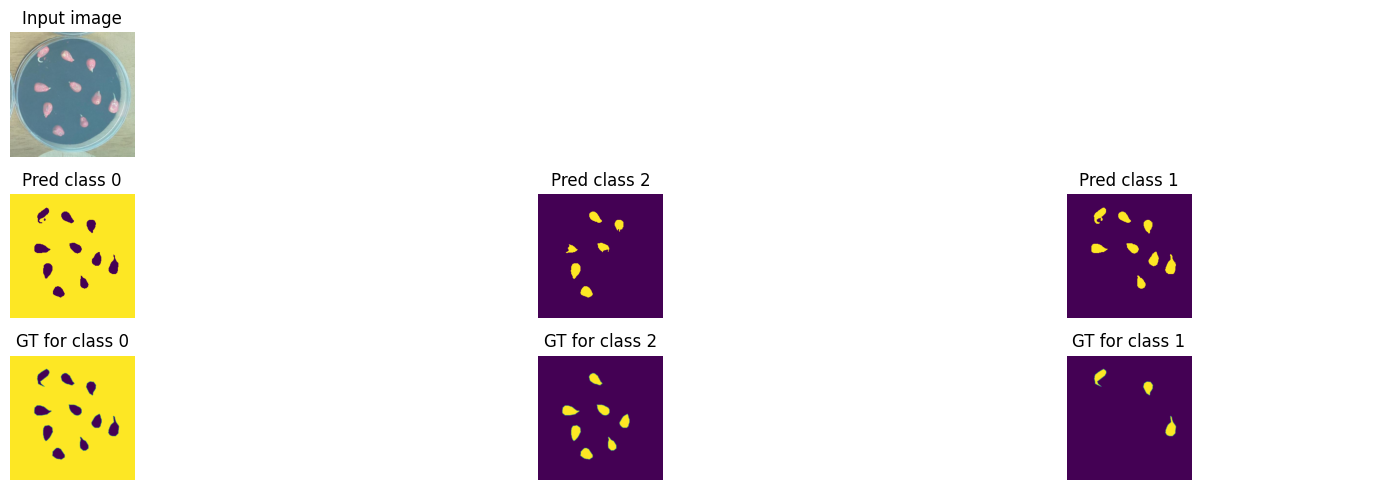

Train loss: 0.00242 | Time: 24m 56s | Val loss: 0.00183
Train_DICE_avg: 0.73642 | Train_Jaccard_avg: 0.67306 | Train_Sensitivity_avg: 0.91849 | Train_Specificity_avg: 0.92018 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98480 | Train_Sensitivity: 0.99594 | Train_Specificity: 0.78294 
Class 1 - Train_DICE: 0.44064 | Train_Jaccard: 0.38100 | Train_Sensitivity: 0.85063 | Train_Specificity: 0.98877 
Class 2 - Train_DICE: 0.77630 | Train_Jaccard: 0.65339 | Train_Sensitivity: 0.90888 | Train_Specificity: 0.98883 
Val_DICE_avg: 0.79728 | Val_Jaccard_avg: 0.72837 | Val_Sensitivity_avg: 0.93469 | Val_Specificity_avg: 0.86326 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.61016 
Class 1 - Val_DICE: 0.66087 | Val_Jaccard: 0.59729 | Val_Sensitivity: 0.84632 | Val_Specificity: 0.99452 
Class 2 - Val_DICE: 0.73910 | Val_Jaccard: 0.60392 | Val_Sensitivity: 0.95844 | Val_Specificity: 0.98510 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00240 | Time: 25m 44s | Val loss: 0.00172
Train_DICE_avg: 0.74411 | Train_Jaccard_avg: 0.68077 | Train_Sensitivity_avg: 0.92234 | Train_Specificity_avg: 0.92157 
Class 0 - Train_DICE: 0.99230 | Train_Jaccard: 0.98475 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.78657 
Class 1 - Train_DICE: 0.46031 | Train_Jaccard: 0.39989 | Train_Sensitivity: 0.86298 | Train_Specificity: 0.98908 
Class 2 - Train_DICE: 0.77973 | Train_Jaccard: 0.65768 | Train_Sensitivity: 0.90815 | Train_Specificity: 0.98905 
Val_DICE_avg: 0.81264 | Val_Jaccard_avg: 0.74354 | Val_Sensitivity_avg: 0.94312 | Val_Specificity_avg: 0.86306 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.60898 
Class 1 - Val_DICE: 0.69083 | Val_Jaccard: 0.62405 | Val_Sensitivity: 0.86924 | Val_Specificity: 0.99467 
Class 2 - Val_DICE: 0.75519 | Val_Jaccard: 0.62259 | Val_Sensitivity: 0.96081 | Val_Specificity: 0.98552 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00236 | Time: 26m 33s | Val loss: 0.00169
Train_DICE_avg: 0.75050 | Train_Jaccard_avg: 0.68711 | Train_Sensitivity_avg: 0.92354 | Train_Specificity_avg: 0.92245 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98513 | Train_Sensitivity: 0.99597 | Train_Specificity: 0.78839 
Class 1 - Train_DICE: 0.47654 | Train_Jaccard: 0.41495 | Train_Sensitivity: 0.86574 | Train_Specificity: 0.98970 
Class 2 - Train_DICE: 0.78248 | Train_Jaccard: 0.66124 | Train_Sensitivity: 0.90892 | Train_Specificity: 0.98926 
Val_DICE_avg: 0.81359 | Val_Jaccard_avg: 0.74528 | Val_Sensitivity_avg: 0.94852 | Val_Specificity_avg: 0.86583 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98434 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.61734 
Class 1 - Val_DICE: 0.69435 | Val_Jaccard: 0.62998 | Val_Sensitivity: 0.88755 | Val_Specificity: 0.99436 
Class 2 - Val_DICE: 0.75432 | Val_Jaccard: 0.62152 | Val_Sensitivity: 0.95873 | Val_Specificity: 0.98577 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00235 | Time: 27m 21s | Val loss: 0.00169
Train_DICE_avg: 0.74997 | Train_Jaccard_avg: 0.68593 | Train_Sensitivity_avg: 0.92560 | Train_Specificity_avg: 0.92108 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98465 | Train_Sensitivity: 0.99587 | Train_Specificity: 0.78448 
Class 1 - Train_DICE: 0.47342 | Train_Jaccard: 0.41000 | Train_Sensitivity: 0.86729 | Train_Specificity: 0.98957 
Class 2 - Train_DICE: 0.78423 | Train_Jaccard: 0.66313 | Train_Sensitivity: 0.91365 | Train_Specificity: 0.98920 
Val_DICE_avg: 0.81767 | Val_Jaccard_avg: 0.74912 | Val_Sensitivity_avg: 0.94768 | Val_Specificity_avg: 0.86323 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.60921 
Class 1 - Val_DICE: 0.70144 | Val_Jaccard: 0.63492 | Val_Sensitivity: 0.88792 | Val_Specificity: 0.99433 
Class 2 - Val_DICE: 0.75967 | Val_Jaccard: 0.62844 | Val_Sensitivity: 0.95581 | Val_Specificity: 0.98616 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00228 | Time: 28m 10s | Val loss: 0.00167
Train_DICE_avg: 0.75115 | Train_Jaccard_avg: 0.68769 | Train_Sensitivity_avg: 0.92448 | Train_Specificity_avg: 0.92130 
Class 0 - Train_DICE: 0.99262 | Train_Jaccard: 0.98538 | Train_Sensitivity: 0.99620 | Train_Specificity: 0.78516 
Class 1 - Train_DICE: 0.47580 | Train_Jaccard: 0.41300 | Train_Sensitivity: 0.86344 | Train_Specificity: 0.98946 
Class 2 - Train_DICE: 0.78502 | Train_Jaccard: 0.66468 | Train_Sensitivity: 0.91379 | Train_Specificity: 0.98928 
Val_DICE_avg: 0.81638 | Val_Jaccard_avg: 0.74710 | Val_Sensitivity_avg: 0.94497 | Val_Specificity_avg: 0.86378 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98411 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61128 
Class 1 - Val_DICE: 0.70536 | Val_Jaccard: 0.63929 | Val_Sensitivity: 0.87453 | Val_Specificity: 0.99462 
Class 2 - Val_DICE: 0.75181 | Val_Jaccard: 0.61791 | Val_Sensitivity: 0.96103 | Val_Specificity: 0.98544 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


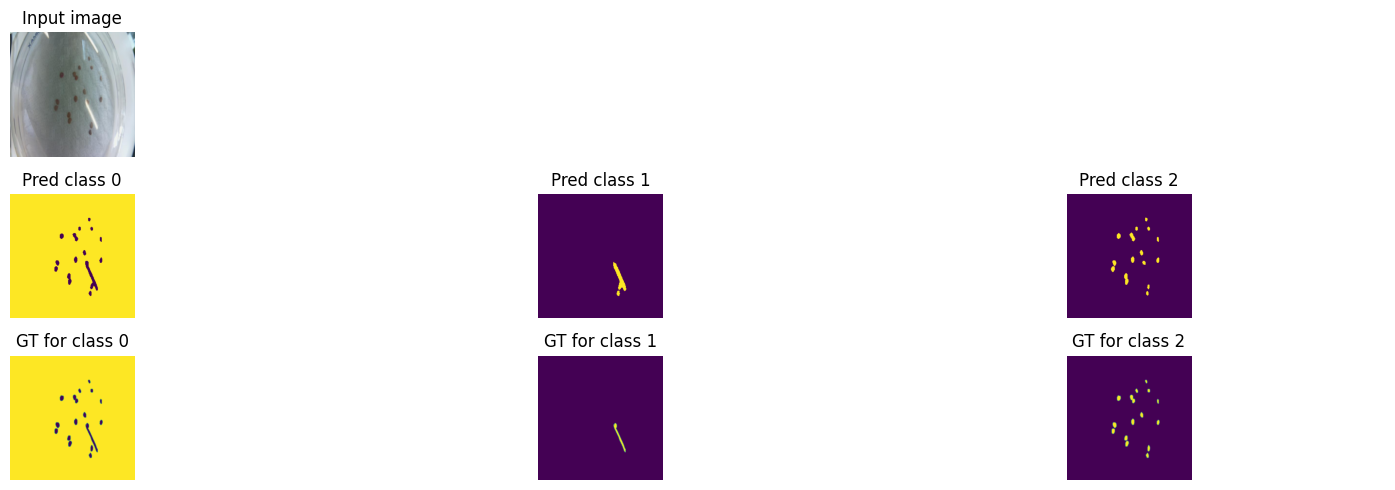

Train loss: 0.00225 | Time: 28m 59s | Val loss: 0.00166
Train_DICE_avg: 0.75566 | Train_Jaccard_avg: 0.69167 | Train_Sensitivity_avg: 0.92463 | Train_Specificity_avg: 0.92313 
Class 0 - Train_DICE: 0.99260 | Train_Jaccard: 0.98535 | Train_Sensitivity: 0.99613 | Train_Specificity: 0.79044 
Class 1 - Train_DICE: 0.48690 | Train_Jaccard: 0.42250 | Train_Sensitivity: 0.86476 | Train_Specificity: 0.98966 
Class 2 - Train_DICE: 0.78748 | Train_Jaccard: 0.66717 | Train_Sensitivity: 0.91299 | Train_Specificity: 0.98930 
Val_DICE_avg: 0.82229 | Val_Jaccard_avg: 0.75331 | Val_Sensitivity_avg: 0.95397 | Val_Specificity_avg: 0.86578 
Class 0 - Val_DICE: 0.99208 | Val_Jaccard: 0.98431 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.61683 
Class 1 - Val_DICE: 0.71336 | Val_Jaccard: 0.64685 | Val_Sensitivity: 0.90148 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.76142 | Val_Jaccard: 0.62876 | Val_Sensitivity: 0.96114 | Val_Specificity: 0.98595 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00221 | Time: 29m 48s | Val loss: 0.00167
Train_DICE_avg: 0.75680 | Train_Jaccard_avg: 0.69279 | Train_Sensitivity_avg: 0.92692 | Train_Specificity_avg: 0.92242 
Class 0 - Train_DICE: 0.99266 | Train_Jaccard: 0.98546 | Train_Sensitivity: 0.99625 | Train_Specificity: 0.78809 
Class 1 - Train_DICE: 0.48727 | Train_Jaccard: 0.42207 | Train_Sensitivity: 0.86871 | Train_Specificity: 0.98962 
Class 2 - Train_DICE: 0.79048 | Train_Jaccard: 0.67084 | Train_Sensitivity: 0.91580 | Train_Specificity: 0.98956 
Val_DICE_avg: 0.81904 | Val_Jaccard_avg: 0.74948 | Val_Sensitivity_avg: 0.94662 | Val_Specificity_avg: 0.86609 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98463 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61795 
Class 1 - Val_DICE: 0.70727 | Val_Jaccard: 0.63910 | Val_Sensitivity: 0.87661 | Val_Specificity: 0.99469 
Class 2 - Val_DICE: 0.75761 | Val_Jaccard: 0.62471 | Val_Sensitivity: 0.96392 | Val_Specificity: 0.98564 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00219 | Time: 30m 37s | Val loss: 0.00168
Train_DICE_avg: 0.76049 | Train_Jaccard_avg: 0.69595 | Train_Sensitivity_avg: 0.92638 | Train_Specificity_avg: 0.92395 
Class 0 - Train_DICE: 0.99281 | Train_Jaccard: 0.98575 | Train_Sensitivity: 0.99632 | Train_Specificity: 0.79248 
Class 1 - Train_DICE: 0.49741 | Train_Jaccard: 0.43020 | Train_Sensitivity: 0.86713 | Train_Specificity: 0.98994 
Class 2 - Train_DICE: 0.79126 | Train_Jaccard: 0.67190 | Train_Sensitivity: 0.91569 | Train_Specificity: 0.98944 
Val_DICE_avg: 0.82250 | Val_Jaccard_avg: 0.75247 | Val_Sensitivity_avg: 0.94760 | Val_Specificity_avg: 0.86665 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98472 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61982 
Class 1 - Val_DICE: 0.72425 | Val_Jaccard: 0.65618 | Val_Sensitivity: 0.88116 | Val_Specificity: 0.99482 
Class 2 - Val_DICE: 0.75096 | Val_Jaccard: 0.61652 | Val_Sensitivity: 0.96230 | Val_Specificity: 0.98531 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00218 | Time: 31m 25s | Val loss: 0.00165
Train_DICE_avg: 0.76116 | Train_Jaccard_avg: 0.69666 | Train_Sensitivity_avg: 0.92895 | Train_Specificity_avg: 0.92176 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98549 | Train_Sensitivity: 0.99640 | Train_Specificity: 0.78614 
Class 1 - Train_DICE: 0.49852 | Train_Jaccard: 0.43192 | Train_Sensitivity: 0.87318 | Train_Specificity: 0.98973 
Class 2 - Train_DICE: 0.79228 | Train_Jaccard: 0.67257 | Train_Sensitivity: 0.91728 | Train_Specificity: 0.98939 
Val_DICE_avg: 0.81661 | Val_Jaccard_avg: 0.74633 | Val_Sensitivity_avg: 0.94097 | Val_Specificity_avg: 0.86513 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98454 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61514 
Class 1 - Val_DICE: 0.70688 | Val_Jaccard: 0.63693 | Val_Sensitivity: 0.86007 | Val_Specificity: 0.99482 
Class 2 - Val_DICE: 0.75074 | Val_Jaccard: 0.61753 | Val_Sensitivity: 0.96343 | Val_Specificity: 0.98543 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00215 | Time: 32m 13s | Val loss: 0.00159
Train_DICE_avg: 0.76010 | Train_Jaccard_avg: 0.69529 | Train_Sensitivity_avg: 0.93010 | Train_Specificity_avg: 0.92330 
Class 0 - Train_DICE: 0.99284 | Train_Jaccard: 0.98581 | Train_Sensitivity: 0.99645 | Train_Specificity: 0.79076 
Class 1 - Train_DICE: 0.49365 | Train_Jaccard: 0.42572 | Train_Sensitivity: 0.87401 | Train_Specificity: 0.98971 
Class 2 - Train_DICE: 0.79381 | Train_Jaccard: 0.67434 | Train_Sensitivity: 0.91983 | Train_Specificity: 0.98943 
Val_DICE_avg: 0.81777 | Val_Jaccard_avg: 0.74742 | Val_Sensitivity_avg: 0.94888 | Val_Specificity_avg: 0.86864 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98504 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62581 
Class 1 - Val_DICE: 0.70409 | Val_Jaccard: 0.63466 | Val_Sensitivity: 0.88614 | Val_Specificity: 0.99451 
Class 2 - Val_DICE: 0.75678 | Val_Jaccard: 0.62255 | Val_Sensitivity: 0.96120 | Val_Specificity: 0.98561 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


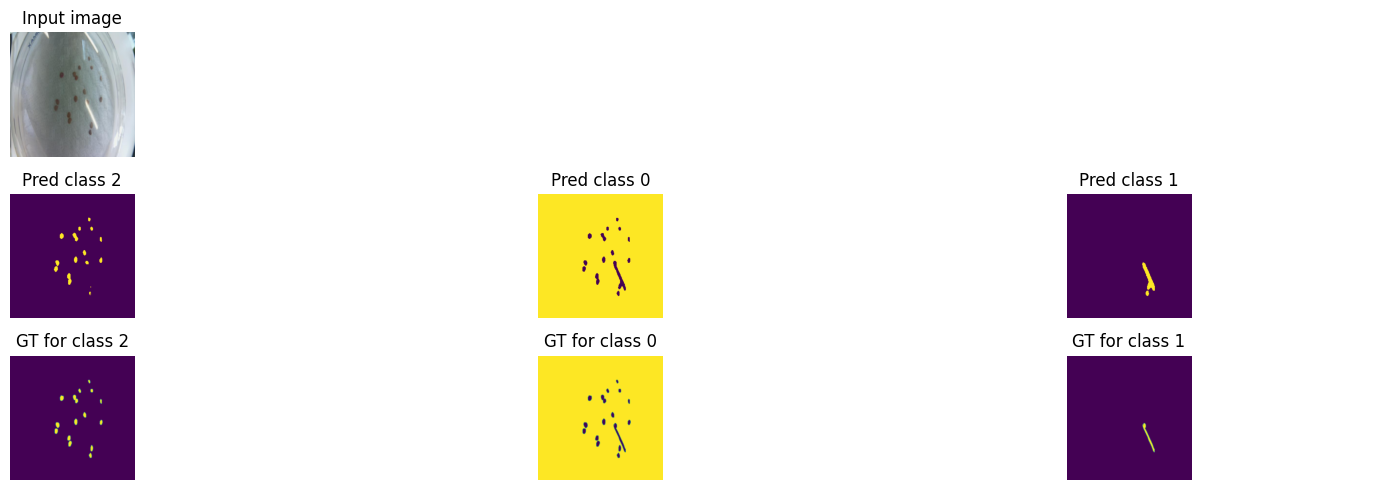

Train loss: 0.00212 | Time: 33m 2s | Val loss: 0.00163
Train_DICE_avg: 0.76358 | Train_Jaccard_avg: 0.69897 | Train_Sensitivity_avg: 0.92808 | Train_Specificity_avg: 0.92504 
Class 0 - Train_DICE: 0.99288 | Train_Jaccard: 0.98590 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.79587 
Class 1 - Train_DICE: 0.50250 | Train_Jaccard: 0.43461 | Train_Sensitivity: 0.86889 | Train_Specificity: 0.98979 
Class 2 - Train_DICE: 0.79535 | Train_Jaccard: 0.67640 | Train_Sensitivity: 0.91886 | Train_Specificity: 0.98948 
Val_DICE_avg: 0.82237 | Val_Jaccard_avg: 0.75121 | Val_Sensitivity_avg: 0.94219 | Val_Specificity_avg: 0.86559 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98466 | Val_Sensitivity: 0.99953 | Val_Specificity: 0.61650 
Class 1 - Val_DICE: 0.72346 | Val_Jaccard: 0.65196 | Val_Sensitivity: 0.86608 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.75141 | Val_Jaccard: 0.61703 | Val_Sensitivity: 0.96096 | Val_Specificity: 0.98525 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00211 | Time: 33m 51s | Val loss: 0.00157
Train_DICE_avg: 0.76595 | Train_Jaccard_avg: 0.70120 | Train_Sensitivity_avg: 0.92938 | Train_Specificity_avg: 0.92180 
Class 0 - Train_DICE: 0.99276 | Train_Jaccard: 0.98565 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.78593 
Class 1 - Train_DICE: 0.51024 | Train_Jaccard: 0.44185 | Train_Sensitivity: 0.87169 | Train_Specificity: 0.99001 
Class 2 - Train_DICE: 0.79485 | Train_Jaccard: 0.67608 | Train_Sensitivity: 0.91997 | Train_Specificity: 0.98947 
Val_DICE_avg: 0.82294 | Val_Jaccard_avg: 0.75254 | Val_Sensitivity_avg: 0.95083 | Val_Specificity_avg: 0.86839 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98514 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62508 
Class 1 - Val_DICE: 0.72249 | Val_Jaccard: 0.65235 | Val_Sensitivity: 0.88888 | Val_Specificity: 0.99462 
Class 2 - Val_DICE: 0.75384 | Val_Jaccard: 0.62014 | Val_Sensitivity: 0.96423 | Val_Specificity: 0.98546 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00209 | Time: 34m 39s | Val loss: 0.00156
Train_DICE_avg: 0.76651 | Train_Jaccard_avg: 0.70196 | Train_Sensitivity_avg: 0.92904 | Train_Specificity_avg: 0.92393 
Class 0 - Train_DICE: 0.99292 | Train_Jaccard: 0.98596 | Train_Sensitivity: 0.99653 | Train_Specificity: 0.79215 
Class 1 - Train_DICE: 0.50882 | Train_Jaccard: 0.44013 | Train_Sensitivity: 0.86922 | Train_Specificity: 0.99001 
Class 2 - Train_DICE: 0.79778 | Train_Jaccard: 0.67979 | Train_Sensitivity: 0.92136 | Train_Specificity: 0.98964 
Val_DICE_avg: 0.82527 | Val_Jaccard_avg: 0.75502 | Val_Sensitivity_avg: 0.94430 | Val_Specificity_avg: 0.86525 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98439 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.61504 
Class 1 - Val_DICE: 0.72309 | Val_Jaccard: 0.65302 | Val_Sensitivity: 0.86970 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.76060 | Val_Jaccard: 0.62764 | Val_Sensitivity: 0.96379 | Val_Specificity: 0.98565 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00209 | Time: 35m 28s | Val loss: 0.00161
Train_DICE_avg: 0.77312 | Train_Jaccard_avg: 0.70910 | Train_Sensitivity_avg: 0.93035 | Train_Specificity_avg: 0.92809 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98604 | Train_Sensitivity: 0.99636 | Train_Specificity: 0.80374 
Class 1 - Train_DICE: 0.52265 | Train_Jaccard: 0.45349 | Train_Sensitivity: 0.87505 | Train_Specificity: 0.99046 
Class 2 - Train_DICE: 0.80375 | Train_Jaccard: 0.68775 | Train_Sensitivity: 0.91964 | Train_Specificity: 0.99009 
Val_DICE_avg: 0.81297 | Val_Jaccard_avg: 0.74224 | Val_Sensitivity_avg: 0.93500 | Val_Specificity_avg: 0.86528 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98464 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61551 
Class 1 - Val_DICE: 0.68957 | Val_Jaccard: 0.61800 | Val_Sensitivity: 0.83947 | Val_Specificity: 0.99495 
Class 2 - Val_DICE: 0.75711 | Val_Jaccard: 0.62407 | Val_Sensitivity: 0.96618 | Val_Specificity: 0.98538 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00209 | Time: 36m 17s | Val loss: 0.00156
Train_DICE_avg: 0.77278 | Train_Jaccard_avg: 0.70826 | Train_Sensitivity_avg: 0.92913 | Train_Specificity_avg: 0.92758 
Class 0 - Train_DICE: 0.99282 | Train_Jaccard: 0.98578 | Train_Sensitivity: 0.99630 | Train_Specificity: 0.80253 
Class 1 - Train_DICE: 0.52245 | Train_Jaccard: 0.45258 | Train_Sensitivity: 0.87194 | Train_Specificity: 0.99036 
Class 2 - Train_DICE: 0.80308 | Train_Jaccard: 0.68642 | Train_Sensitivity: 0.91915 | Train_Specificity: 0.98987 
Val_DICE_avg: 0.82379 | Val_Jaccard_avg: 0.75307 | Val_Sensitivity_avg: 0.94513 | Val_Specificity_avg: 0.86738 
Class 0 - Val_DICE: 0.99240 | Val_Jaccard: 0.98494 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62176 
Class 1 - Val_DICE: 0.72362 | Val_Jaccard: 0.65235 | Val_Sensitivity: 0.86719 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.75536 | Val_Jaccard: 0.62191 | Val_Sensitivity: 0.96885 | Val_Specificity: 0.98534 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


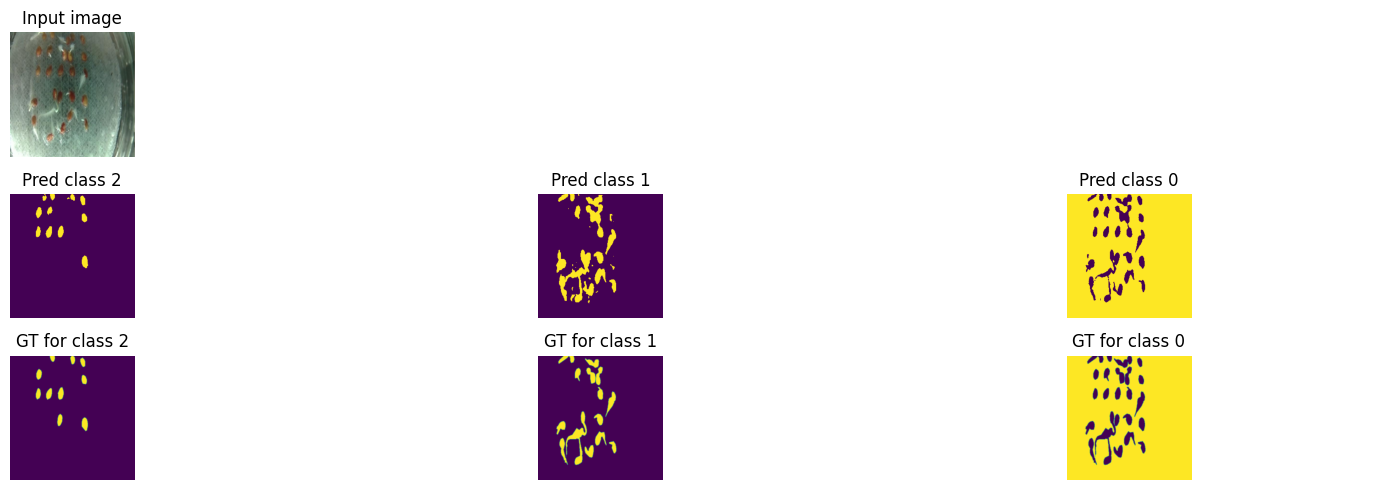

Train loss: 0.00205 | Time: 37m 6s | Val loss: 0.00158
Train_DICE_avg: 0.77026 | Train_Jaccard_avg: 0.70585 | Train_Sensitivity_avg: 0.93294 | Train_Specificity_avg: 0.92320 
Class 0 - Train_DICE: 0.99293 | Train_Jaccard: 0.98599 | Train_Sensitivity: 0.99659 | Train_Specificity: 0.78968 
Class 1 - Train_DICE: 0.51734 | Train_Jaccard: 0.44801 | Train_Sensitivity: 0.87658 | Train_Specificity: 0.99012 
Class 2 - Train_DICE: 0.80051 | Train_Jaccard: 0.68354 | Train_Sensitivity: 0.92566 | Train_Specificity: 0.98980 
Val_DICE_avg: 0.82671 | Val_Jaccard_avg: 0.75664 | Val_Sensitivity_avg: 0.95406 | Val_Specificity_avg: 0.86806 
Class 0 - Val_DICE: 0.99234 | Val_Jaccard: 0.98485 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.62355 
Class 1 - Val_DICE: 0.72724 | Val_Jaccard: 0.65708 | Val_Sensitivity: 0.89506 | Val_Specificity: 0.99495 
Class 2 - Val_DICE: 0.76053 | Val_Jaccard: 0.62799 | Val_Sensitivity: 0.96779 | Val_Specificity: 0.98566 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00202 | Time: 37m 55s | Val loss: 0.00154
Train_DICE_avg: 0.77304 | Train_Jaccard_avg: 0.70874 | Train_Sensitivity_avg: 0.93042 | Train_Specificity_avg: 0.92362 
Class 0 - Train_DICE: 0.99297 | Train_Jaccard: 0.98606 | Train_Sensitivity: 0.99675 | Train_Specificity: 0.79111 
Class 1 - Train_DICE: 0.52403 | Train_Jaccard: 0.45407 | Train_Sensitivity: 0.87094 | Train_Specificity: 0.99005 
Class 2 - Train_DICE: 0.80212 | Train_Jaccard: 0.68608 | Train_Sensitivity: 0.92355 | Train_Specificity: 0.98971 
Val_DICE_avg: 0.83206 | Val_Jaccard_avg: 0.76226 | Val_Sensitivity_avg: 0.95605 | Val_Specificity_avg: 0.86798 
Class 0 - Val_DICE: 0.99236 | Val_Jaccard: 0.98487 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62298 
Class 1 - Val_DICE: 0.73826 | Val_Jaccard: 0.66735 | Val_Sensitivity: 0.90274 | Val_Specificity: 0.99485 
Class 2 - Val_DICE: 0.76555 | Val_Jaccard: 0.63455 | Val_Sensitivity: 0.96607 | Val_Specificity: 0.98612 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00202 | Time: 38m 43s | Val loss: 0.00160
Train_DICE_avg: 0.77232 | Train_Jaccard_avg: 0.70786 | Train_Sensitivity_avg: 0.93154 | Train_Specificity_avg: 0.92391 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99665 | Train_Specificity: 0.79171 
Class 1 - Train_DICE: 0.52232 | Train_Jaccard: 0.45235 | Train_Sensitivity: 0.87398 | Train_Specificity: 0.99021 
Class 2 - Train_DICE: 0.80162 | Train_Jaccard: 0.68511 | Train_Sensitivity: 0.92400 | Train_Specificity: 0.98983 
Val_DICE_avg: 0.82697 | Val_Jaccard_avg: 0.75669 | Val_Sensitivity_avg: 0.95182 | Val_Specificity_avg: 0.86860 
Class 0 - Val_DICE: 0.99242 | Val_Jaccard: 0.98500 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.62518 
Class 1 - Val_DICE: 0.72766 | Val_Jaccard: 0.65623 | Val_Sensitivity: 0.88897 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.76082 | Val_Jaccard: 0.62885 | Val_Sensitivity: 0.96717 | Val_Specificity: 0.98570 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00200 | Time: 39m 31s | Val loss: 0.00159
Train_DICE_avg: 0.77400 | Train_Jaccard_avg: 0.70915 | Train_Sensitivity_avg: 0.93266 | Train_Specificity_avg: 0.92265 
Class 0 - Train_DICE: 0.99297 | Train_Jaccard: 0.98606 | Train_Sensitivity: 0.99672 | Train_Specificity: 0.78824 
Class 1 - Train_DICE: 0.52705 | Train_Jaccard: 0.45652 | Train_Sensitivity: 0.87528 | Train_Specificity: 0.99009 
Class 2 - Train_DICE: 0.80199 | Train_Jaccard: 0.68487 | Train_Sensitivity: 0.92599 | Train_Specificity: 0.98963 
Val_DICE_avg: 0.83017 | Val_Jaccard_avg: 0.75973 | Val_Sensitivity_avg: 0.95083 | Val_Specificity_avg: 0.86751 
Class 0 - Val_DICE: 0.99231 | Val_Jaccard: 0.98477 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62166 
Class 1 - Val_DICE: 0.73760 | Val_Jaccard: 0.66564 | Val_Sensitivity: 0.88542 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.76059 | Val_Jaccard: 0.62879 | Val_Sensitivity: 0.96771 | Val_Specificity: 0.98582 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00202 | Time: 40m 20s | Val loss: 0.00157
Train_DICE_avg: 0.77610 | Train_Jaccard_avg: 0.71140 | Train_Sensitivity_avg: 0.93339 | Train_Specificity_avg: 0.92495 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98603 | Train_Sensitivity: 0.99657 | Train_Specificity: 0.79454 
Class 1 - Train_DICE: 0.53165 | Train_Jaccard: 0.46062 | Train_Sensitivity: 0.87844 | Train_Specificity: 0.99044 
Class 2 - Train_DICE: 0.80371 | Train_Jaccard: 0.68754 | Train_Sensitivity: 0.92515 | Train_Specificity: 0.98987 
Val_DICE_avg: 0.82584 | Val_Jaccard_avg: 0.75504 | Val_Sensitivity_avg: 0.94657 | Val_Specificity_avg: 0.86826 
Class 0 - Val_DICE: 0.99243 | Val_Jaccard: 0.98501 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62429 
Class 1 - Val_DICE: 0.72923 | Val_Jaccard: 0.65804 | Val_Sensitivity: 0.86985 | Val_Specificity: 0.99509 
Class 2 - Val_DICE: 0.75586 | Val_Jaccard: 0.62209 | Val_Sensitivity: 0.97049 | Val_Specificity: 0.98541 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


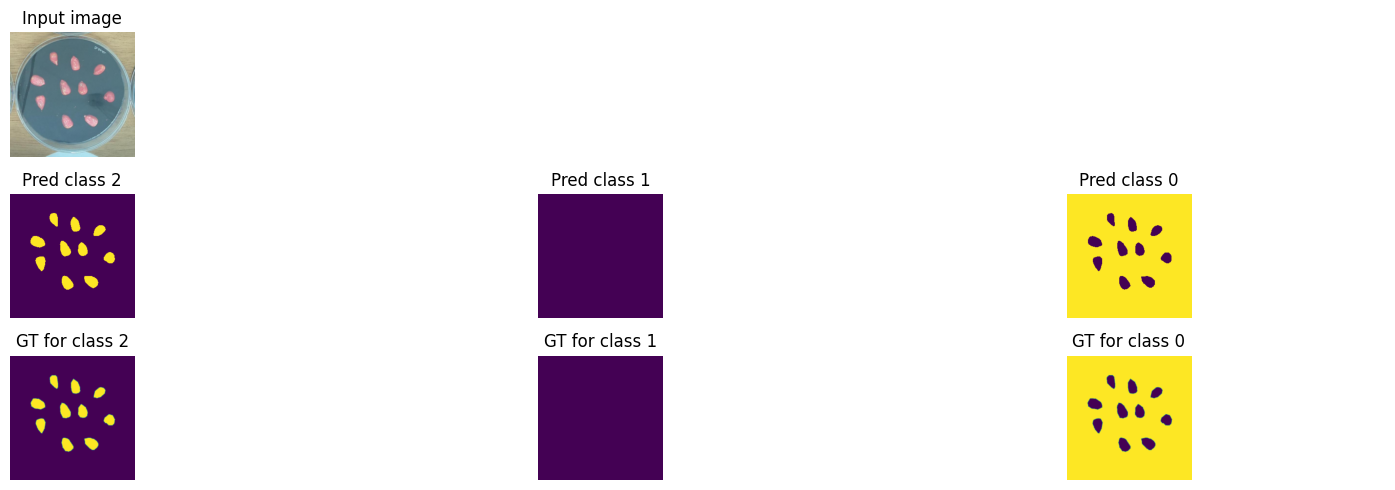

Train loss: 0.00199 | Time: 41m 9s | Val loss: 0.00158
Train_DICE_avg: 0.77928 | Train_Jaccard_avg: 0.71470 | Train_Sensitivity_avg: 0.93269 | Train_Specificity_avg: 0.92623 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98624 | Train_Sensitivity: 0.99662 | Train_Specificity: 0.79795 
Class 1 - Train_DICE: 0.53790 | Train_Jaccard: 0.46635 | Train_Sensitivity: 0.87677 | Train_Specificity: 0.99070 
Class 2 - Train_DICE: 0.80688 | Train_Jaccard: 0.69149 | Train_Sensitivity: 0.92468 | Train_Specificity: 0.99004 
Val_DICE_avg: 0.83109 | Val_Jaccard_avg: 0.76053 | Val_Sensitivity_avg: 0.95522 | Val_Specificity_avg: 0.87009 
Class 0 - Val_DICE: 0.99252 | Val_Jaccard: 0.98519 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62956 
Class 1 - Val_DICE: 0.74278 | Val_Jaccard: 0.67134 | Val_Sensitivity: 0.89708 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.75795 | Val_Jaccard: 0.62506 | Val_Sensitivity: 0.96924 | Val_Specificity: 0.98567 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00199 | Time: 41m 57s | Val loss: 0.00157
Train_DICE_avg: 0.77330 | Train_Jaccard_avg: 0.70865 | Train_Sensitivity_avg: 0.93139 | Train_Specificity_avg: 0.92336 
Class 0 - Train_DICE: 0.99303 | Train_Jaccard: 0.98618 | Train_Sensitivity: 0.99674 | Train_Specificity: 0.79016 
Class 1 - Train_DICE: 0.52334 | Train_Jaccard: 0.45306 | Train_Sensitivity: 0.87057 | Train_Specificity: 0.99021 
Class 2 - Train_DICE: 0.80352 | Train_Jaccard: 0.68672 | Train_Sensitivity: 0.92687 | Train_Specificity: 0.98971 
Val_DICE_avg: 0.82589 | Val_Jaccard_avg: 0.75427 | Val_Sensitivity_avg: 0.94888 | Val_Specificity_avg: 0.86846 
Class 0 - Val_DICE: 0.99242 | Val_Jaccard: 0.98498 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62505 
Class 1 - Val_DICE: 0.73331 | Val_Jaccard: 0.66017 | Val_Sensitivity: 0.87553 | Val_Specificity: 0.99512 
Class 2 - Val_DICE: 0.75194 | Val_Jaccard: 0.61766 | Val_Sensitivity: 0.97178 | Val_Specificity: 0.98520 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00196 | Time: 42m 46s | Val loss: 0.00153
Train_DICE_avg: 0.77596 | Train_Jaccard_avg: 0.71092 | Train_Sensitivity_avg: 0.93228 | Train_Specificity_avg: 0.92509 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98627 | Train_Sensitivity: 0.99676 | Train_Specificity: 0.79507 
Class 1 - Train_DICE: 0.52957 | Train_Jaccard: 0.45760 | Train_Sensitivity: 0.87354 | Train_Specificity: 0.99039 
Class 2 - Train_DICE: 0.80523 | Train_Jaccard: 0.68888 | Train_Sensitivity: 0.92655 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.82845 | Val_Jaccard_avg: 0.75808 | Val_Sensitivity_avg: 0.94937 | Val_Specificity_avg: 0.86986 
Class 0 - Val_DICE: 0.99247 | Val_Jaccard: 0.98509 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.62863 
Class 1 - Val_DICE: 0.73130 | Val_Jaccard: 0.66008 | Val_Sensitivity: 0.88482 | Val_Specificity: 0.99511 
Class 2 - Val_DICE: 0.76157 | Val_Jaccard: 0.62908 | Val_Sensitivity: 0.96380 | Val_Specificity: 0.98584 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00197 | Time: 43m 34s | Val loss: 0.00150
Train_DICE_avg: 0.77625 | Train_Jaccard_avg: 0.71159 | Train_Sensitivity_avg: 0.93341 | Train_Specificity_avg: 0.92400 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98627 | Train_Sensitivity: 0.99671 | Train_Specificity: 0.79155 
Class 1 - Train_DICE: 0.53072 | Train_Jaccard: 0.45972 | Train_Sensitivity: 0.87550 | Train_Specificity: 0.99052 
Class 2 - Train_DICE: 0.80496 | Train_Jaccard: 0.68879 | Train_Sensitivity: 0.92801 | Train_Specificity: 0.98992 
Val_DICE_avg: 0.82895 | Val_Jaccard_avg: 0.75847 | Val_Sensitivity_avg: 0.95462 | Val_Specificity_avg: 0.86929 
Class 0 - Val_DICE: 0.99244 | Val_Jaccard: 0.98503 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62712 
Class 1 - Val_DICE: 0.73161 | Val_Jaccard: 0.66039 | Val_Sensitivity: 0.89831 | Val_Specificity: 0.99489 
Class 2 - Val_DICE: 0.76280 | Val_Jaccard: 0.63000 | Val_Sensitivity: 0.96621 | Val_Specificity: 0.98586 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.00196 | Time: 44m 23s | Val loss: 0.00150
Train_DICE_avg: 0.77911 | Train_Jaccard_avg: 0.71446 | Train_Sensitivity_avg: 0.93496 | Train_Specificity_avg: 0.92417 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98628 | Train_Sensitivity: 0.99676 | Train_Specificity: 0.79227 
Class 1 - Train_DICE: 0.53875 | Train_Jaccard: 0.46731 | Train_Sensitivity: 0.88103 | Train_Specificity: 0.99033 
Class 2 - Train_DICE: 0.80548 | Train_Jaccard: 0.68978 | Train_Sensitivity: 0.92709 | Train_Specificity: 0.98991 
Val_DICE_avg: 0.82954 | Val_Jaccard_avg: 0.75917 | Val_Sensitivity_avg: 0.95426 | Val_Specificity_avg: 0.87024 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98514 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62990 
Class 1 - Val_DICE: 0.73624 | Val_Jaccard: 0.66467 | Val_Sensitivity: 0.89513 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.75989 | Val_Jaccard: 0.62771 | Val_Sensitivity: 0.96831 | Val_Specificity: 0.98586 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


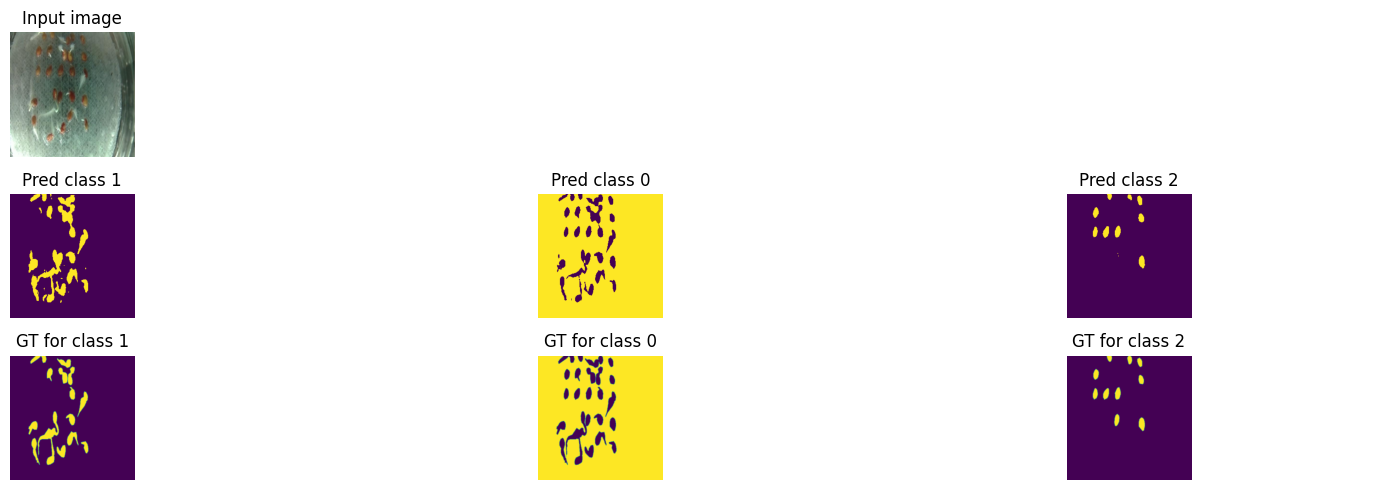

Train loss: 0.00196 | Time: 45m 12s | Val loss: 0.00151
Train_DICE_avg: 0.77803 | Train_Jaccard_avg: 0.71294 | Train_Sensitivity_avg: 0.93305 | Train_Specificity_avg: 0.92408 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98624 | Train_Sensitivity: 0.99672 | Train_Specificity: 0.79181 
Class 1 - Train_DICE: 0.53492 | Train_Jaccard: 0.46229 | Train_Sensitivity: 0.87578 | Train_Specificity: 0.99052 
Class 2 - Train_DICE: 0.80610 | Train_Jaccard: 0.69029 | Train_Sensitivity: 0.92664 | Train_Specificity: 0.98992 
Val_DICE_avg: 0.82955 | Val_Jaccard_avg: 0.75918 | Val_Sensitivity_avg: 0.95362 | Val_Specificity_avg: 0.86950 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98507 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62770 
Class 1 - Val_DICE: 0.73793 | Val_Jaccard: 0.66736 | Val_Sensitivity: 0.89200 | Val_Specificity: 0.99514 
Class 2 - Val_DICE: 0.75827 | Val_Jaccard: 0.62510 | Val_Sensitivity: 0.96951 | Val_Specificity: 0.98566 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.00195 | Time: 46m 0s | Val loss: 0.00151
Train_DICE_avg: 0.78033 | Train_Jaccard_avg: 0.71545 | Train_Sensitivity_avg: 0.93503 | Train_Specificity_avg: 0.92516 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98627 | Train_Sensitivity: 0.99668 | Train_Specificity: 0.79479 
Class 1 - Train_DICE: 0.54151 | Train_Jaccard: 0.46943 | Train_Sensitivity: 0.88096 | Train_Specificity: 0.99068 
Class 2 - Train_DICE: 0.80642 | Train_Jaccard: 0.69064 | Train_Sensitivity: 0.92746 | Train_Specificity: 0.99000 
Val_DICE_avg: 0.83169 | Val_Jaccard_avg: 0.76133 | Val_Sensitivity_avg: 0.95602 | Val_Specificity_avg: 0.87077 
Class 0 - Val_DICE: 0.99252 | Val_Jaccard: 0.98519 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.63148 
Class 1 - Val_DICE: 0.74198 | Val_Jaccard: 0.67093 | Val_Sensitivity: 0.90073 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.76058 | Val_Jaccard: 0.62788 | Val_Sensitivity: 0.96796 | Val_Specificity: 0.98578 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00195 | Time: 46m 49s | Val loss: 0.00152
Train_DICE_avg: 0.77699 | Train_Jaccard_avg: 0.71232 | Train_Sensitivity_avg: 0.93483 | Train_Specificity_avg: 0.92437 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98627 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.79307 
Class 1 - Train_DICE: 0.53076 | Train_Jaccard: 0.45935 | Train_Sensitivity: 0.87952 | Train_Specificity: 0.99023 
Class 2 - Train_DICE: 0.80715 | Train_Jaccard: 0.69135 | Train_Sensitivity: 0.92816 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.83271 | Val_Jaccard_avg: 0.76189 | Val_Sensitivity_avg: 0.95303 | Val_Specificity_avg: 0.87011 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98514 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62959 
Class 1 - Val_DICE: 0.75190 | Val_Jaccard: 0.67968 | Val_Sensitivity: 0.88884 | Val_Specificity: 0.99526 
Class 2 - Val_DICE: 0.75374 | Val_Jaccard: 0.62084 | Val_Sensitivity: 0.97090 | Val_Specificity: 0.98549 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00192 | Time: 47m 38s | Val loss: 0.00154
Train_DICE_avg: 0.78019 | Train_Jaccard_avg: 0.71510 | Train_Sensitivity_avg: 0.93542 | Train_Specificity_avg: 0.92229 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98623 | Train_Sensitivity: 0.99697 | Train_Specificity: 0.78662 
Class 1 - Train_DICE: 0.53936 | Train_Jaccard: 0.46637 | Train_Sensitivity: 0.87905 | Train_Specificity: 0.99039 
Class 2 - Train_DICE: 0.80815 | Train_Jaccard: 0.69272 | Train_Sensitivity: 0.93025 | Train_Specificity: 0.98987 
Val_DICE_avg: 0.83542 | Val_Jaccard_avg: 0.76517 | Val_Sensitivity_avg: 0.95646 | Val_Specificity_avg: 0.86889 
Class 0 - Val_DICE: 0.99239 | Val_Jaccard: 0.98494 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62567 
Class 1 - Val_DICE: 0.75369 | Val_Jaccard: 0.68236 | Val_Sensitivity: 0.89946 | Val_Specificity: 0.99525 
Class 2 - Val_DICE: 0.76018 | Val_Jaccard: 0.62819 | Val_Sensitivity: 0.97054 | Val_Specificity: 0.98574 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.00192 | Time: 48m 26s | Val loss: 0.00152
Train_DICE_avg: 0.78044 | Train_Jaccard_avg: 0.71547 | Train_Sensitivity_avg: 0.93666 | Train_Specificity_avg: 0.92369 
Class 0 - Train_DICE: 0.99310 | Train_Jaccard: 0.98633 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.79113 
Class 1 - Train_DICE: 0.54098 | Train_Jaccard: 0.46859 | Train_Sensitivity: 0.88315 | Train_Specificity: 0.99020 
Class 2 - Train_DICE: 0.80723 | Train_Jaccard: 0.69149 | Train_Sensitivity: 0.92991 | Train_Specificity: 0.98974 
Val_DICE_avg: 0.83464 | Val_Jaccard_avg: 0.76480 | Val_Sensitivity_avg: 0.95729 | Val_Specificity_avg: 0.86909 
Class 0 - Val_DICE: 0.99237 | Val_Jaccard: 0.98490 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62627 
Class 1 - Val_DICE: 0.75295 | Val_Jaccard: 0.68274 | Val_Sensitivity: 0.90405 | Val_Specificity: 0.99519 
Class 2 - Val_DICE: 0.75861 | Val_Jaccard: 0.62676 | Val_Sensitivity: 0.96844 | Val_Specificity: 0.98581 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


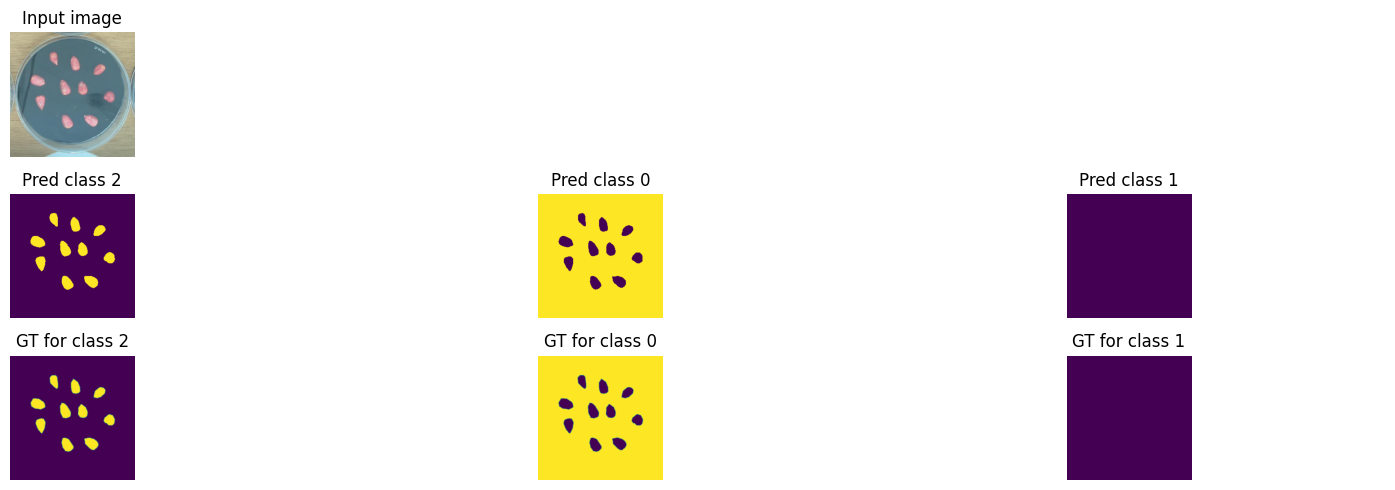

Train loss: 0.00191 | Time: 49m 15s | Val loss: 0.00152
Train_DICE_avg: 0.77770 | Train_Jaccard_avg: 0.71278 | Train_Sensitivity_avg: 0.93451 | Train_Specificity_avg: 0.92196 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98623 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.78602 
Class 1 - Train_DICE: 0.53321 | Train_Jaccard: 0.46152 | Train_Sensitivity: 0.87607 | Train_Specificity: 0.99019 
Class 2 - Train_DICE: 0.80684 | Train_Jaccard: 0.69057 | Train_Sensitivity: 0.93059 | Train_Specificity: 0.98967 
Val_DICE_avg: 0.83342 | Val_Jaccard_avg: 0.76301 | Val_Sensitivity_avg: 0.95689 | Val_Specificity_avg: 0.86959 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98507 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62801 
Class 1 - Val_DICE: 0.75028 | Val_Jaccard: 0.67848 | Val_Sensitivity: 0.90083 | Val_Specificity: 0.99510 
Class 2 - Val_DICE: 0.75751 | Val_Jaccard: 0.62547 | Val_Sensitivity: 0.97047 | Val_Specificity: 0.98567 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [18]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [19]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]



Global Performance Metrics:
Loss mean: 0.00158, std: 0.00018
Dice Coefficient mean: 0.85089, std: 0.11426
Jaccard Index mean: 0.78977, std: 0.12912
Sensitivity mean: 0.90424, std: 0.09633
Specificity mean: 0.93725, std: 0.04569

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99578, std: 0.00218
Jaccard mean: 0.99160, std: 0.00430
Sensitivity mean: 0.99761, std: 0.00174
Specificity mean: 0.82068, std: 0.13669

Class 1:
Dice mean: 0.70052, std: 0.31514
Jaccard mean: 0.61849, std: 0.33255
Sensitivity mean: 0.82239, std: 0.26398
Specificity mean: 0.99584, std: 0.00604

Class 2:
Dice mean: 0.85637, std: 0.09308
Jaccard mean: 0.75921, std: 0.12665
Sensitivity mean: 0.89274, std: 0.10499
Specificity mean: 0.99524, std: 0.00310


### Tversky Loss

In [20]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-DeepLabV3+-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.76 GB
GPU Memory - Reserved: 1.75 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


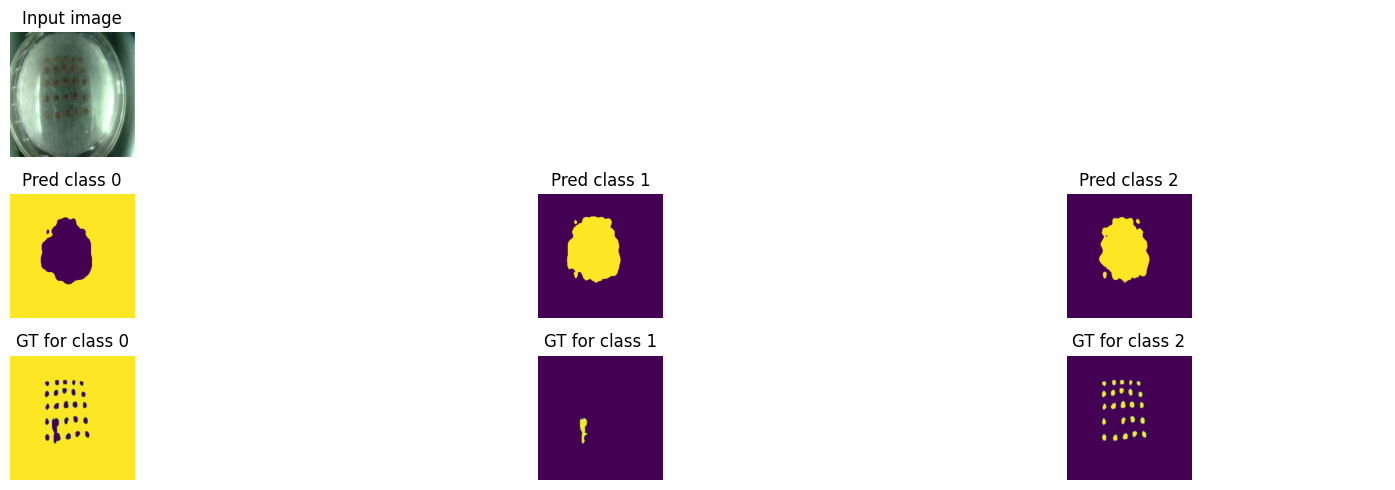

Train loss: 0.69703 | Time: 0m 48s | Val loss: 0.65398
Train_DICE_avg: 0.32395 | Train_Jaccard_avg: 0.25256 | Train_Sensitivity_avg: 0.36944 | Train_Specificity_avg: 0.72185 
Class 0 - Train_DICE: 0.75701 | Train_Jaccard: 0.63580 | Train_Sensitivity: 0.98250 | Train_Specificity: 0.17283 
Class 1 - Train_DICE: 0.03719 | Train_Jaccard: 0.01966 | Train_Sensitivity: 0.01994 | Train_Specificity: 0.99772 
Class 2 - Train_DICE: 0.17766 | Train_Jaccard: 0.10223 | Train_Sensitivity: 0.10588 | Train_Specificity: 0.99499 
Val_DICE_avg: 0.40196 | Val_Jaccard_avg: 0.33765 | Val_Sensitivity_avg: 0.40998 | Val_Specificity_avg: 0.72135 
Class 0 - Val_DICE: 0.90356 | Val_Jaccard: 0.82542 | Val_Sensitivity: 0.99267 | Val_Specificity: 0.17080 
Class 1 - Val_DICE: 0.05342 | Val_Jaccard: 0.02984 | Val_Sensitivity: 0.03199 | Val_Specificity: 0.99826 
Class 2 - Val_DICE: 0.24889 | Val_Jaccard: 0.15768 | Val_Sensitivity: 0.20529 | Val_Specificity: 0.99498 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.60036 | Time: 1m 35s | Val loss: 0.55241
Train_DICE_avg: 0.46807 | Train_Jaccard_avg: 0.40992 | Train_Sensitivity_avg: 0.46512 | Train_Specificity_avg: 0.78742 
Class 0 - Train_DICE: 0.93001 | Train_Jaccard: 0.87102 | Train_Sensitivity: 0.98902 | Train_Specificity: 0.36805 
Class 1 - Train_DICE: 0.08040 | Train_Jaccard: 0.04680 | Train_Sensitivity: 0.05041 | Train_Specificity: 0.99835 
Class 2 - Train_DICE: 0.39380 | Train_Jaccard: 0.31193 | Train_Sensitivity: 0.35593 | Train_Specificity: 0.99585 
Val_DICE_avg: 0.49213 | Val_Jaccard_avg: 0.44913 | Val_Sensitivity_avg: 0.48851 | Val_Specificity_avg: 0.80240 
Class 0 - Val_DICE: 0.95874 | Val_Jaccard: 0.92220 | Val_Sensitivity: 0.99540 | Val_Specificity: 0.41220 
Class 1 - Val_DICE: 0.09808 | Val_Jaccard: 0.06205 | Val_Sensitivity: 0.07159 | Val_Specificity: 0.99783 
Class 2 - Val_DICE: 0.41957 | Val_Jaccard: 0.36313 | Val_Sensitivity: 0.39855 | Val_Specificity: 0.99719 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.53647 | Time: 2m 23s | Val loss: 0.52751
Train_DICE_avg: 0.51541 | Train_Jaccard_avg: 0.46493 | Train_Sensitivity_avg: 0.50673 | Train_Specificity_avg: 0.83768 
Class 0 - Train_DICE: 0.96274 | Train_Jaccard: 0.92907 | Train_Sensitivity: 0.99028 | Train_Specificity: 0.51895 
Class 1 - Train_DICE: 0.10476 | Train_Jaccard: 0.06335 | Train_Sensitivity: 0.07049 | Train_Specificity: 0.99800 
Class 2 - Train_DICE: 0.47874 | Train_Jaccard: 0.40238 | Train_Sensitivity: 0.45941 | Train_Specificity: 0.99610 
Val_DICE_avg: 0.51115 | Val_Jaccard_avg: 0.47220 | Val_Sensitivity_avg: 0.50126 | Val_Specificity_avg: 0.86967 
Class 0 - Val_DICE: 0.98125 | Val_Jaccard: 0.96359 | Val_Sensitivity: 0.99414 | Val_Specificity: 0.61459 
Class 1 - Val_DICE: 0.10370 | Val_Jaccard: 0.06494 | Val_Sensitivity: 0.07739 | Val_Specificity: 0.99746 
Class 2 - Val_DICE: 0.44851 | Val_Jaccard: 0.38808 | Val_Sensitivity: 0.43224 | Val_Specificity: 0.99696 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.50052 | Time: 3m 11s | Val loss: 0.51421
Train_DICE_avg: 0.54985 | Train_Jaccard_avg: 0.50064 | Train_Sensitivity_avg: 0.53627 | Train_Specificity_avg: 0.88684 
Class 0 - Train_DICE: 0.97885 | Train_Jaccard: 0.95891 | Train_Sensitivity: 0.99008 | Train_Specificity: 0.66689 
Class 1 - Train_DICE: 0.11671 | Train_Jaccard: 0.07049 | Train_Sensitivity: 0.07887 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.55400 | Train_Jaccard: 0.47253 | Train_Sensitivity: 0.53986 | Train_Specificity: 0.99589 
Val_DICE_avg: 0.52668 | Val_Jaccard_avg: 0.48932 | Val_Sensitivity_avg: 0.51050 | Val_Specificity_avg: 0.94247 
Class 0 - Val_DICE: 0.99196 | Val_Jaccard: 0.98413 | Val_Sensitivity: 0.99421 | Val_Specificity: 0.83284 
Class 1 - Val_DICE: 0.11737 | Val_Jaccard: 0.07329 | Val_Sensitivity: 0.08555 | Val_Specificity: 0.99728 
Class 2 - Val_DICE: 0.47071 | Val_Jaccard: 0.41053 | Val_Sensitivity: 0.45174 | Val_Specificity: 0.99730 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.47270 | Time: 3m 58s | Val loss: 0.49488
Train_DICE_avg: 0.57811 | Train_Jaccard_avg: 0.52621 | Train_Sensitivity_avg: 0.56224 | Train_Specificity_avg: 0.91697 
Class 0 - Train_DICE: 0.98361 | Train_Jaccard: 0.96799 | Train_Sensitivity: 0.98919 | Train_Specificity: 0.75802 
Class 1 - Train_DICE: 0.13270 | Train_Jaccard: 0.08032 | Train_Sensitivity: 0.09100 | Train_Specificity: 0.99734 
Class 2 - Train_DICE: 0.61802 | Train_Jaccard: 0.53031 | Train_Sensitivity: 0.60653 | Train_Specificity: 0.99557 
Val_DICE_avg: 0.55139 | Val_Jaccard_avg: 0.50983 | Val_Sensitivity_avg: 0.53370 | Val_Specificity_avg: 0.95714 
Class 0 - Val_DICE: 0.99342 | Val_Jaccard: 0.98697 | Val_Sensitivity: 0.99395 | Val_Specificity: 0.87771 
Class 1 - Val_DICE: 0.12918 | Val_Jaccard: 0.08056 | Val_Sensitivity: 0.09635 | Val_Specificity: 0.99684 
Class 2 - Val_DICE: 0.53158 | Val_Jaccard: 0.46195 | Val_Sensitivity: 0.51080 | Val_Specificity: 0.99687 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


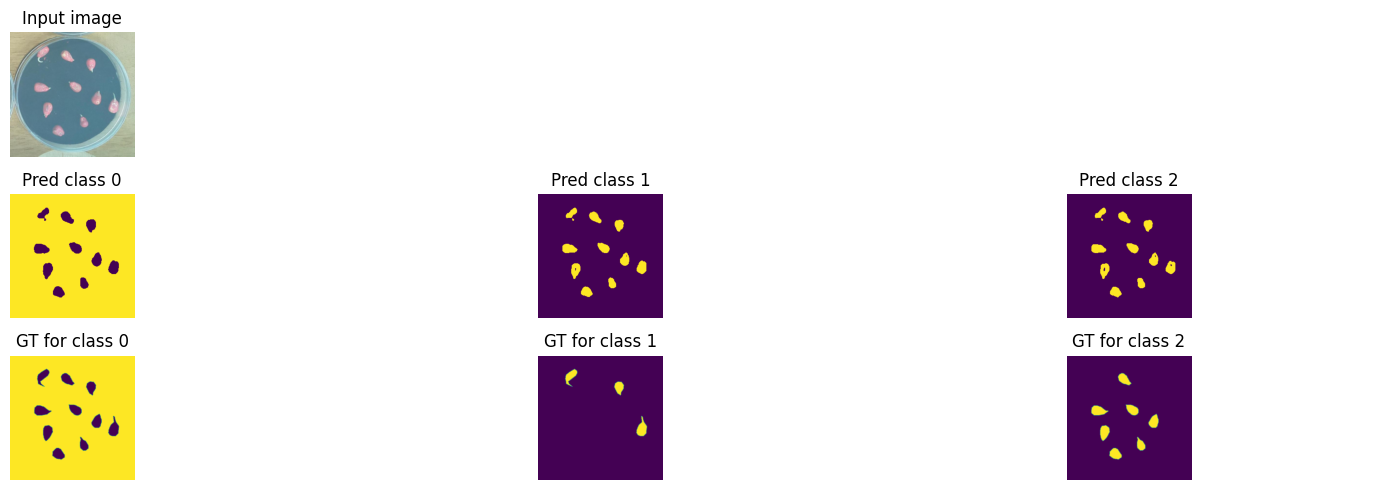

Train loss: 0.44703 | Time: 4m 47s | Val loss: 0.44707
Train_DICE_avg: 0.59991 | Train_Jaccard_avg: 0.54594 | Train_Sensitivity_avg: 0.58417 | Train_Specificity_avg: 0.92810 
Class 0 - Train_DICE: 0.98554 | Train_Jaccard: 0.97168 | Train_Sensitivity: 0.98863 | Train_Specificity: 0.79200 
Class 1 - Train_DICE: 0.14439 | Train_Jaccard: 0.08772 | Train_Sensitivity: 0.10122 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.66981 | Train_Jaccard: 0.57841 | Train_Sensitivity: 0.66267 | Train_Specificity: 0.99522 
Val_DICE_avg: 0.58986 | Val_Jaccard_avg: 0.54417 | Val_Sensitivity_avg: 0.58154 | Val_Specificity_avg: 0.95561 
Class 0 - Val_DICE: 0.99372 | Val_Jaccard: 0.98757 | Val_Sensitivity: 0.99425 | Val_Specificity: 0.87465 
Class 1 - Val_DICE: 0.13733 | Val_Jaccard: 0.08577 | Val_Sensitivity: 0.10378 | Val_Specificity: 0.99670 
Class 2 - Val_DICE: 0.63853 | Val_Jaccard: 0.55918 | Val_Sensitivity: 0.64659 | Val_Specificity: 0.99546 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.42578 | Time: 5m 34s | Val loss: 0.41655
Train_DICE_avg: 0.61494 | Train_Jaccard_avg: 0.55871 | Train_Sensitivity_avg: 0.60086 | Train_Specificity_avg: 0.93313 
Class 0 - Train_DICE: 0.98672 | Train_Jaccard: 0.97396 | Train_Sensitivity: 0.98848 | Train_Specificity: 0.80779 
Class 1 - Train_DICE: 0.15570 | Train_Jaccard: 0.09506 | Train_Sensitivity: 0.11301 | Train_Specificity: 0.99677 
Class 2 - Train_DICE: 0.70239 | Train_Jaccard: 0.60710 | Train_Sensitivity: 0.70109 | Train_Specificity: 0.99482 
Val_DICE_avg: 0.61996 | Val_Jaccard_avg: 0.57108 | Val_Sensitivity_avg: 0.61014 | Val_Specificity_avg: 0.95635 
Class 0 - Val_DICE: 0.99422 | Val_Jaccard: 0.98856 | Val_Sensitivity: 0.99386 | Val_Specificity: 0.87757 
Class 1 - Val_DICE: 0.15146 | Val_Jaccard: 0.09462 | Val_Sensitivity: 0.12139 | Val_Specificity: 0.99622 
Class 2 - Val_DICE: 0.71421 | Val_Jaccard: 0.63007 | Val_Sensitivity: 0.71517 | Val_Specificity: 0.99524 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.40450 | Time: 6m 21s | Val loss: 0.40420
Train_DICE_avg: 0.62899 | Train_Jaccard_avg: 0.57075 | Train_Sensitivity_avg: 0.62133 | Train_Specificity_avg: 0.94012 
Class 0 - Train_DICE: 0.98778 | Train_Jaccard: 0.97600 | Train_Sensitivity: 0.98810 | Train_Specificity: 0.82960 
Class 1 - Train_DICE: 0.17145 | Train_Jaccard: 0.10598 | Train_Sensitivity: 0.14182 | Train_Specificity: 0.99632 
Class 2 - Train_DICE: 0.72774 | Train_Jaccard: 0.63026 | Train_Sensitivity: 0.73407 | Train_Specificity: 0.99443 
Val_DICE_avg: 0.62594 | Val_Jaccard_avg: 0.57537 | Val_Sensitivity_avg: 0.61881 | Val_Specificity_avg: 0.93772 
Class 0 - Val_DICE: 0.99417 | Val_Jaccard: 0.98844 | Val_Sensitivity: 0.99491 | Val_Specificity: 0.82167 
Class 1 - Val_DICE: 0.16924 | Val_Jaccard: 0.10740 | Val_Sensitivity: 0.14145 | Val_Specificity: 0.99622 
Class 2 - Val_DICE: 0.71442 | Val_Jaccard: 0.63027 | Val_Sensitivity: 0.72008 | Val_Specificity: 0.99528 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.38519 | Time: 7m 9s | Val loss: 0.36366
Train_DICE_avg: 0.64719 | Train_Jaccard_avg: 0.58448 | Train_Sensitivity_avg: 0.65250 | Train_Specificity_avg: 0.94114 
Class 0 - Train_DICE: 0.98776 | Train_Jaccard: 0.97595 | Train_Sensitivity: 0.98800 | Train_Specificity: 0.83356 
Class 1 - Train_DICE: 0.20245 | Train_Jaccard: 0.12988 | Train_Sensitivity: 0.21413 | Train_Specificity: 0.99550 
Class 2 - Train_DICE: 0.75136 | Train_Jaccard: 0.64762 | Train_Sensitivity: 0.75537 | Train_Specificity: 0.99435 
Val_DICE_avg: 0.67397 | Val_Jaccard_avg: 0.61507 | Val_Sensitivity_avg: 0.69102 | Val_Specificity_avg: 0.95184 
Class 0 - Val_DICE: 0.99487 | Val_Jaccard: 0.98984 | Val_Sensitivity: 0.99451 | Val_Specificity: 0.86577 
Class 1 - Val_DICE: 0.21110 | Val_Jaccard: 0.14337 | Val_Sensitivity: 0.25311 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.81594 | Val_Jaccard: 0.71200 | Val_Sensitivity: 0.82544 | Val_Specificity: 0.99510 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.35540 | Time: 7m 56s | Val loss: 0.34168
Train_DICE_avg: 0.67066 | Train_Jaccard_avg: 0.60379 | Train_Sensitivity_avg: 0.68774 | Train_Specificity_avg: 0.94687 
Class 0 - Train_DICE: 0.98830 | Train_Jaccard: 0.97701 | Train_Sensitivity: 0.98716 | Train_Specificity: 0.85126 
Class 1 - Train_DICE: 0.22483 | Train_Jaccard: 0.14953 | Train_Sensitivity: 0.25685 | Train_Specificity: 0.99533 
Class 2 - Train_DICE: 0.79883 | Train_Jaccard: 0.68482 | Train_Sensitivity: 0.81922 | Train_Specificity: 0.99401 
Val_DICE_avg: 0.68467 | Val_Jaccard_avg: 0.62533 | Val_Sensitivity_avg: 0.71424 | Val_Specificity_avg: 0.95413 
Class 0 - Val_DICE: 0.99507 | Val_Jaccard: 0.99022 | Val_Sensitivity: 0.99473 | Val_Specificity: 0.87306 
Class 1 - Val_DICE: 0.23761 | Val_Jaccard: 0.16761 | Val_Sensitivity: 0.30626 | Val_Specificity: 0.99442 
Class 2 - Val_DICE: 0.82135 | Val_Jaccard: 0.71816 | Val_Sensitivity: 0.84173 | Val_Specificity: 0.99491 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


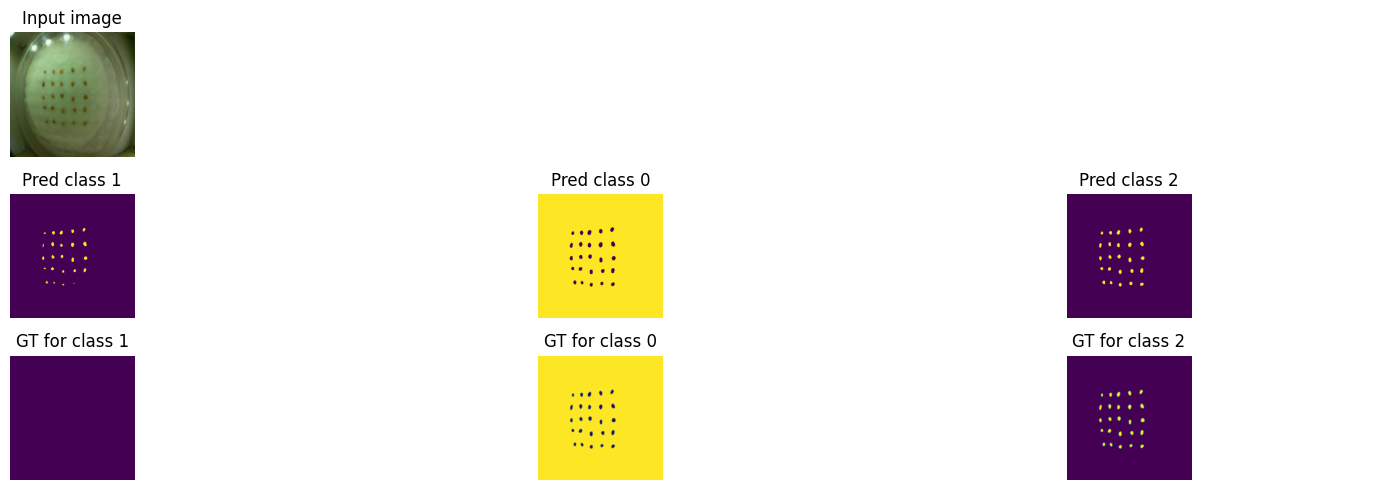

Train loss: 0.33859 | Time: 8m 46s | Val loss: 0.32816
Train_DICE_avg: 0.67864 | Train_Jaccard_avg: 0.61052 | Train_Sensitivity_avg: 0.70062 | Train_Specificity_avg: 0.94661 
Class 0 - Train_DICE: 0.98855 | Train_Jaccard: 0.97748 | Train_Sensitivity: 0.98801 | Train_Specificity: 0.85074 
Class 1 - Train_DICE: 0.24388 | Train_Jaccard: 0.16528 | Train_Sensitivity: 0.28184 | Train_Specificity: 0.99541 
Class 2 - Train_DICE: 0.80348 | Train_Jaccard: 0.68878 | Train_Sensitivity: 0.83202 | Train_Specificity: 0.99367 
Val_DICE_avg: 0.68926 | Val_Jaccard_avg: 0.62880 | Val_Sensitivity_avg: 0.71140 | Val_Specificity_avg: 0.94634 
Class 0 - Val_DICE: 0.99513 | Val_Jaccard: 0.99033 | Val_Sensitivity: 0.99577 | Val_Specificity: 0.84890 
Class 1 - Val_DICE: 0.24593 | Val_Jaccard: 0.17198 | Val_Sensitivity: 0.28475 | Val_Specificity: 0.99524 
Class 2 - Val_DICE: 0.82671 | Val_Jaccard: 0.72408 | Val_Sensitivity: 0.85368 | Val_Specificity: 0.99488 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.32654 | Time: 9m 34s | Val loss: 0.31944
Train_DICE_avg: 0.68650 | Train_Jaccard_avg: 0.61819 | Train_Sensitivity_avg: 0.71071 | Train_Specificity_avg: 0.94362 
Class 0 - Train_DICE: 0.98893 | Train_Jaccard: 0.97822 | Train_Sensitivity: 0.98946 | Train_Specificity: 0.84179 
Class 1 - Train_DICE: 0.26268 | Train_Jaccard: 0.18291 | Train_Sensitivity: 0.30122 | Train_Specificity: 0.99546 
Class 2 - Train_DICE: 0.80789 | Train_Jaccard: 0.69345 | Train_Sensitivity: 0.84145 | Train_Specificity: 0.99361 
Val_DICE_avg: 0.69715 | Val_Jaccard_avg: 0.63677 | Val_Sensitivity_avg: 0.71429 | Val_Specificity_avg: 0.94092 
Class 0 - Val_DICE: 0.99512 | Val_Jaccard: 0.99031 | Val_Sensitivity: 0.99614 | Val_Specificity: 0.83242 
Class 1 - Val_DICE: 0.26710 | Val_Jaccard: 0.19321 | Val_Sensitivity: 0.28303 | Val_Specificity: 0.99583 
Class 2 - Val_DICE: 0.82922 | Val_Jaccard: 0.72677 | Val_Sensitivity: 0.86370 | Val_Specificity: 0.99452 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.31990 | Time: 10m 23s | Val loss: 0.31176
Train_DICE_avg: 0.68930 | Train_Jaccard_avg: 0.62081 | Train_Sensitivity_avg: 0.71795 | Train_Specificity_avg: 0.94468 
Class 0 - Train_DICE: 0.98925 | Train_Jaccard: 0.97884 | Train_Sensitivity: 0.98974 | Train_Specificity: 0.84504 
Class 1 - Train_DICE: 0.26844 | Train_Jaccard: 0.18793 | Train_Sensitivity: 0.31511 | Train_Specificity: 0.99555 
Class 2 - Train_DICE: 0.81021 | Train_Jaccard: 0.69568 | Train_Sensitivity: 0.84900 | Train_Specificity: 0.99344 
Val_DICE_avg: 0.69965 | Val_Jaccard_avg: 0.63987 | Val_Sensitivity_avg: 0.72990 | Val_Specificity_avg: 0.94286 
Class 0 - Val_DICE: 0.99516 | Val_Jaccard: 0.99039 | Val_Sensitivity: 0.99645 | Val_Specificity: 0.83806 
Class 1 - Val_DICE: 0.26790 | Val_Jaccard: 0.19306 | Val_Sensitivity: 0.33322 | Val_Specificity: 0.99549 
Class 2 - Val_DICE: 0.83590 | Val_Jaccard: 0.73617 | Val_Sensitivity: 0.86003 | Val_Specificity: 0.99503 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.31355 | Time: 11m 11s | Val loss: 0.30649
Train_DICE_avg: 0.69434 | Train_Jaccard_avg: 0.62539 | Train_Sensitivity_avg: 0.72318 | Train_Specificity_avg: 0.94233 
Class 0 - Train_DICE: 0.98919 | Train_Jaccard: 0.97872 | Train_Sensitivity: 0.99054 | Train_Specificity: 0.83792 
Class 1 - Train_DICE: 0.28033 | Train_Jaccard: 0.19811 | Train_Sensitivity: 0.32532 | Train_Specificity: 0.99564 
Class 2 - Train_DICE: 0.81350 | Train_Jaccard: 0.69935 | Train_Sensitivity: 0.85369 | Train_Specificity: 0.99342 
Val_DICE_avg: 0.70524 | Val_Jaccard_avg: 0.64605 | Val_Sensitivity_avg: 0.73689 | Val_Specificity_avg: 0.93579 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99006 | Val_Sensitivity: 0.99699 | Val_Specificity: 0.81662 
Class 1 - Val_DICE: 0.27982 | Val_Jaccard: 0.20569 | Val_Sensitivity: 0.34628 | Val_Specificity: 0.99574 
Class 2 - Val_DICE: 0.84090 | Val_Jaccard: 0.74239 | Val_Sensitivity: 0.86738 | Val_Specificity: 0.99502 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.30813 | Time: 12m 0s | Val loss: 0.30003
Train_DICE_avg: 0.69783 | Train_Jaccard_avg: 0.62921 | Train_Sensitivity_avg: 0.72910 | Train_Specificity_avg: 0.94156 
Class 0 - Train_DICE: 0.98947 | Train_Jaccard: 0.97926 | Train_Sensitivity: 0.99095 | Train_Specificity: 0.83557 
Class 1 - Train_DICE: 0.28819 | Train_Jaccard: 0.20588 | Train_Sensitivity: 0.33720 | Train_Specificity: 0.99571 
Class 2 - Train_DICE: 0.81583 | Train_Jaccard: 0.70250 | Train_Sensitivity: 0.85914 | Train_Specificity: 0.99338 
Val_DICE_avg: 0.71226 | Val_Jaccard_avg: 0.65181 | Val_Sensitivity_avg: 0.73909 | Val_Specificity_avg: 0.93722 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99037 | Val_Sensitivity: 0.99697 | Val_Specificity: 0.82084 
Class 1 - Val_DICE: 0.30200 | Val_Jaccard: 0.22509 | Val_Sensitivity: 0.33943 | Val_Specificity: 0.99608 
Class 2 - Val_DICE: 0.83963 | Val_Jaccard: 0.73997 | Val_Sensitivity: 0.88086 | Val_Specificity: 0.99475 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


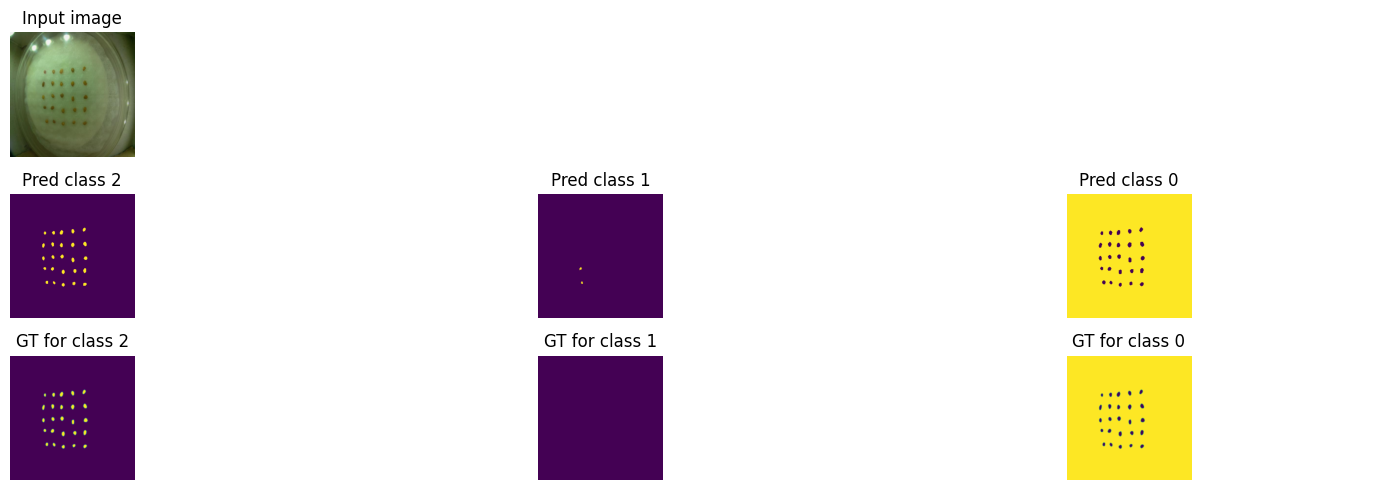

Train loss: 0.30432 | Time: 12m 49s | Val loss: 0.29406
Train_DICE_avg: 0.70085 | Train_Jaccard_avg: 0.63232 | Train_Sensitivity_avg: 0.73653 | Train_Specificity_avg: 0.94182 
Class 0 - Train_DICE: 0.98970 | Train_Jaccard: 0.97971 | Train_Sensitivity: 0.99137 | Train_Specificity: 0.83636 
Class 1 - Train_DICE: 0.29540 | Train_Jaccard: 0.21257 | Train_Sensitivity: 0.35542 | Train_Specificity: 0.99572 
Class 2 - Train_DICE: 0.81744 | Train_Jaccard: 0.70467 | Train_Sensitivity: 0.86280 | Train_Specificity: 0.99339 
Val_DICE_avg: 0.71937 | Val_Jaccard_avg: 0.66025 | Val_Sensitivity_avg: 0.76462 | Val_Specificity_avg: 0.93904 
Class 0 - Val_DICE: 0.99527 | Val_Jaccard: 0.99061 | Val_Sensitivity: 0.99693 | Val_Specificity: 0.82713 
Class 1 - Val_DICE: 0.32298 | Val_Jaccard: 0.25053 | Val_Sensitivity: 0.40927 | Val_Specificity: 0.99569 
Class 2 - Val_DICE: 0.83986 | Val_Jaccard: 0.73961 | Val_Sensitivity: 0.88767 | Val_Specificity: 0.99432 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.28608 | Time: 13m 37s | Val loss: 0.23390
Train_DICE_avg: 0.73327 | Train_Jaccard_avg: 0.66616 | Train_Sensitivity_avg: 0.78486 | Train_Specificity_avg: 0.94528 
Class 0 - Train_DICE: 0.98975 | Train_Jaccard: 0.97982 | Train_Sensitivity: 0.99039 | Train_Specificity: 0.84689 
Class 1 - Train_DICE: 0.39299 | Train_Jaccard: 0.31479 | Train_Sensitivity: 0.49914 | Train_Specificity: 0.99568 
Class 2 - Train_DICE: 0.81707 | Train_Jaccard: 0.70387 | Train_Sensitivity: 0.86507 | Train_Specificity: 0.99327 
Val_DICE_avg: 0.78157 | Val_Jaccard_avg: 0.72344 | Val_Sensitivity_avg: 0.83580 | Val_Specificity_avg: 0.94187 
Class 0 - Val_DICE: 0.99538 | Val_Jaccard: 0.99084 | Val_Sensitivity: 0.99706 | Val_Specificity: 0.83535 
Class 1 - Val_DICE: 0.51966 | Val_Jaccard: 0.45305 | Val_Sensitivity: 0.61185 | Val_Specificity: 0.99644 
Class 2 - Val_DICE: 0.82967 | Val_Jaccard: 0.72643 | Val_Sensitivity: 0.89848 | Val_Specificity: 0.99382 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.26151 | Time: 14m 26s | Val loss: 0.22487
Train_DICE_avg: 0.76106 | Train_Jaccard_avg: 0.69570 | Train_Sensitivity_avg: 0.83189 | Train_Specificity_avg: 0.94522 
Class 0 - Train_DICE: 0.98988 | Train_Jaccard: 0.98006 | Train_Sensitivity: 0.99078 | Train_Specificity: 0.84690 
Class 1 - Train_DICE: 0.47499 | Train_Jaccard: 0.40128 | Train_Sensitivity: 0.63718 | Train_Specificity: 0.99552 
Class 2 - Train_DICE: 0.81832 | Train_Jaccard: 0.70576 | Train_Sensitivity: 0.86771 | Train_Specificity: 0.99325 
Val_DICE_avg: 0.79144 | Val_Jaccard_avg: 0.73705 | Val_Sensitivity_avg: 0.85925 | Val_Specificity_avg: 0.93823 
Class 0 - Val_DICE: 0.99520 | Val_Jaccard: 0.99047 | Val_Sensitivity: 0.99708 | Val_Specificity: 0.82441 
Class 1 - Val_DICE: 0.53398 | Val_Jaccard: 0.47435 | Val_Sensitivity: 0.69933 | Val_Specificity: 0.99586 
Class 2 - Val_DICE: 0.84515 | Val_Jaccard: 0.74633 | Val_Sensitivity: 0.88134 | Val_Specificity: 0.99441 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.25192 | Time: 15m 14s | Val loss: 0.21478
Train_DICE_avg: 0.76657 | Train_Jaccard_avg: 0.70190 | Train_Sensitivity_avg: 0.84101 | Train_Specificity_avg: 0.94431 
Class 0 - Train_DICE: 0.98984 | Train_Jaccard: 0.97999 | Train_Sensitivity: 0.99124 | Train_Specificity: 0.84405 
Class 1 - Train_DICE: 0.48999 | Train_Jaccard: 0.41793 | Train_Sensitivity: 0.66263 | Train_Specificity: 0.99553 
Class 2 - Train_DICE: 0.81988 | Train_Jaccard: 0.70779 | Train_Sensitivity: 0.86917 | Train_Specificity: 0.99333 
Val_DICE_avg: 0.79400 | Val_Jaccard_avg: 0.73764 | Val_Sensitivity_avg: 0.85428 | Val_Specificity_avg: 0.93435 
Class 0 - Val_DICE: 0.99493 | Val_Jaccard: 0.98995 | Val_Sensitivity: 0.99763 | Val_Specificity: 0.81260 
Class 1 - Val_DICE: 0.54838 | Val_Jaccard: 0.48523 | Val_Sensitivity: 0.66228 | Val_Specificity: 0.99662 
Class 2 - Val_DICE: 0.83870 | Val_Jaccard: 0.73773 | Val_Sensitivity: 0.90292 | Val_Specificity: 0.99383 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.24561 | Time: 16m 2s | Val loss: 0.21044
Train_DICE_avg: 0.77258 | Train_Jaccard_avg: 0.70769 | Train_Sensitivity_avg: 0.84794 | Train_Specificity_avg: 0.94126 
Class 0 - Train_DICE: 0.98972 | Train_Jaccard: 0.97976 | Train_Sensitivity: 0.99173 | Train_Specificity: 0.83492 
Class 1 - Train_DICE: 0.50601 | Train_Jaccard: 0.43265 | Train_Sensitivity: 0.68066 | Train_Specificity: 0.99561 
Class 2 - Train_DICE: 0.82200 | Train_Jaccard: 0.71066 | Train_Sensitivity: 0.87143 | Train_Specificity: 0.99327 
Val_DICE_avg: 0.80069 | Val_Jaccard_avg: 0.74629 | Val_Sensitivity_avg: 0.85698 | Val_Specificity_avg: 0.93142 
Class 0 - Val_DICE: 0.99481 | Val_Jaccard: 0.98972 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.80291 
Class 1 - Val_DICE: 0.55707 | Val_Jaccard: 0.49361 | Val_Sensitivity: 0.68509 | Val_Specificity: 0.99627 
Class 2 - Val_DICE: 0.85019 | Val_Jaccard: 0.75555 | Val_Sensitivity: 0.88826 | Val_Specificity: 0.99508 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


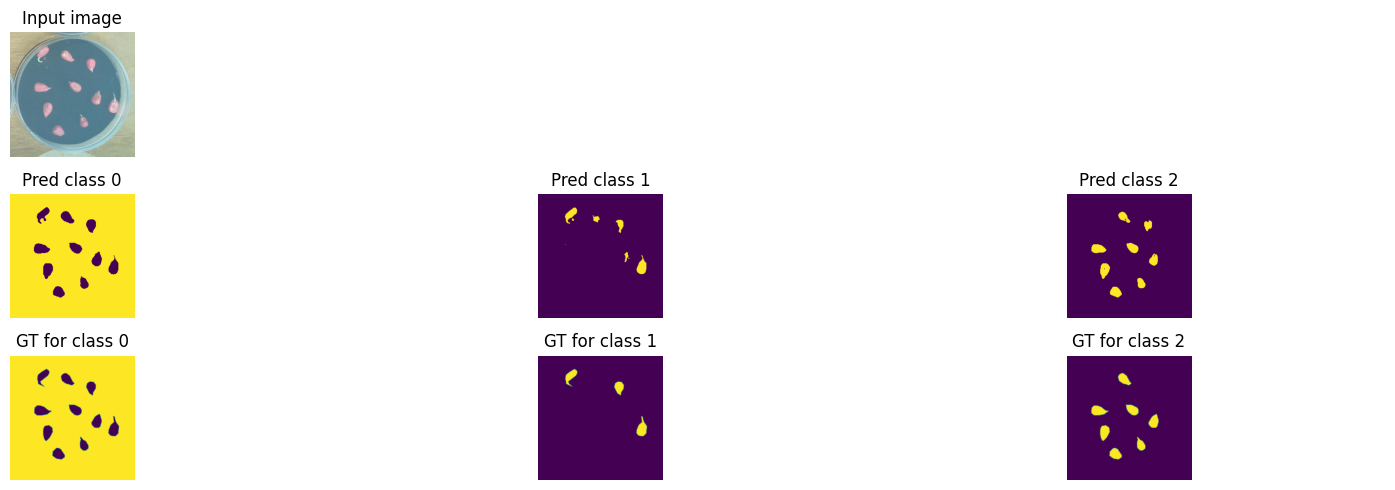

Train loss: 0.24222 | Time: 16m 51s | Val loss: 0.20991
Train_DICE_avg: 0.77398 | Train_Jaccard_avg: 0.70993 | Train_Sensitivity_avg: 0.85282 | Train_Specificity_avg: 0.94227 
Class 0 - Train_DICE: 0.98978 | Train_Jaccard: 0.97987 | Train_Sensitivity: 0.99187 | Train_Specificity: 0.83782 
Class 1 - Train_DICE: 0.50958 | Train_Jaccard: 0.43803 | Train_Sensitivity: 0.69381 | Train_Specificity: 0.99560 
Class 2 - Train_DICE: 0.82259 | Train_Jaccard: 0.71189 | Train_Sensitivity: 0.87280 | Train_Specificity: 0.99339 
Val_DICE_avg: 0.80040 | Val_Jaccard_avg: 0.74600 | Val_Sensitivity_avg: 0.86026 | Val_Specificity_avg: 0.93267 
Class 0 - Val_DICE: 0.99479 | Val_Jaccard: 0.98967 | Val_Sensitivity: 0.99772 | Val_Specificity: 0.80691 
Class 1 - Val_DICE: 0.56005 | Val_Jaccard: 0.49842 | Val_Sensitivity: 0.68454 | Val_Specificity: 0.99658 
Class 2 - Val_DICE: 0.84637 | Val_Jaccard: 0.74990 | Val_Sensitivity: 0.89851 | Val_Specificity: 0.99452 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.23997 | Time: 17m 40s | Val loss: 0.20923
Train_DICE_avg: 0.77748 | Train_Jaccard_avg: 0.71348 | Train_Sensitivity_avg: 0.85658 | Train_Specificity_avg: 0.93954 
Class 0 - Train_DICE: 0.98963 | Train_Jaccard: 0.97958 | Train_Sensitivity: 0.99221 | Train_Specificity: 0.82953 
Class 1 - Train_DICE: 0.51730 | Train_Jaccard: 0.44495 | Train_Sensitivity: 0.70196 | Train_Specificity: 0.99567 
Class 2 - Train_DICE: 0.82552 | Train_Jaccard: 0.71591 | Train_Sensitivity: 0.87557 | Train_Specificity: 0.99344 
Val_DICE_avg: 0.79940 | Val_Jaccard_avg: 0.74577 | Val_Sensitivity_avg: 0.86462 | Val_Specificity_avg: 0.93477 
Class 0 - Val_DICE: 0.99498 | Val_Jaccard: 0.99004 | Val_Sensitivity: 0.99771 | Val_Specificity: 0.81326 
Class 1 - Val_DICE: 0.55423 | Val_Jaccard: 0.49459 | Val_Sensitivity: 0.69825 | Val_Specificity: 0.99657 
Class 2 - Val_DICE: 0.84899 | Val_Jaccard: 0.75267 | Val_Sensitivity: 0.89791 | Val_Specificity: 0.99449 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.23459 | Time: 18m 28s | Val loss: 0.20223
Train_DICE_avg: 0.78020 | Train_Jaccard_avg: 0.71638 | Train_Sensitivity_avg: 0.85860 | Train_Specificity_avg: 0.93972 
Class 0 - Train_DICE: 0.98981 | Train_Jaccard: 0.97994 | Train_Sensitivity: 0.99241 | Train_Specificity: 0.82998 
Class 1 - Train_DICE: 0.52325 | Train_Jaccard: 0.45096 | Train_Sensitivity: 0.70590 | Train_Specificity: 0.99569 
Class 2 - Train_DICE: 0.82755 | Train_Jaccard: 0.71824 | Train_Sensitivity: 0.87749 | Train_Specificity: 0.99349 
Val_DICE_avg: 0.80289 | Val_Jaccard_avg: 0.74743 | Val_Sensitivity_avg: 0.86916 | Val_Specificity_avg: 0.93156 
Class 0 - Val_DICE: 0.99471 | Val_Jaccard: 0.98953 | Val_Sensitivity: 0.99784 | Val_Specificity: 0.80404 
Class 1 - Val_DICE: 0.57100 | Val_Jaccard: 0.50850 | Val_Sensitivity: 0.69705 | Val_Specificity: 0.99671 
Class 2 - Val_DICE: 0.84295 | Val_Jaccard: 0.74425 | Val_Sensitivity: 0.91259 | Val_Specificity: 0.99393 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.22871 | Time: 19m 17s | Val loss: 0.17439
Train_DICE_avg: 0.79136 | Train_Jaccard_avg: 0.72837 | Train_Sensitivity_avg: 0.87666 | Train_Specificity_avg: 0.93889 
Class 0 - Train_DICE: 0.98959 | Train_Jaccard: 0.97951 | Train_Sensitivity: 0.99239 | Train_Specificity: 0.82789 
Class 1 - Train_DICE: 0.55795 | Train_Jaccard: 0.48863 | Train_Sensitivity: 0.76236 | Train_Specificity: 0.99528 
Class 2 - Train_DICE: 0.82654 | Train_Jaccard: 0.71696 | Train_Sensitivity: 0.87524 | Train_Specificity: 0.99350 
Val_DICE_avg: 0.83189 | Val_Jaccard_avg: 0.77804 | Val_Sensitivity_avg: 0.90643 | Val_Specificity_avg: 0.93435 
Class 0 - Val_DICE: 0.99497 | Val_Jaccard: 0.99002 | Val_Sensitivity: 0.99748 | Val_Specificity: 0.81314 
Class 1 - Val_DICE: 0.65682 | Val_Jaccard: 0.59871 | Val_Sensitivity: 0.82577 | Val_Specificity: 0.99536 
Class 2 - Val_DICE: 0.84388 | Val_Jaccard: 0.74539 | Val_Sensitivity: 0.89605 | Val_Specificity: 0.99456 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.21951 | Time: 20m 6s | Val loss: 0.16603
Train_DICE_avg: 0.79779 | Train_Jaccard_avg: 0.73514 | Train_Sensitivity_avg: 0.88581 | Train_Specificity_avg: 0.93754 
Class 0 - Train_DICE: 0.98966 | Train_Jaccard: 0.97963 | Train_Sensitivity: 0.99262 | Train_Specificity: 0.82383 
Class 1 - Train_DICE: 0.57503 | Train_Jaccard: 0.50594 | Train_Sensitivity: 0.78838 | Train_Specificity: 0.99521 
Class 2 - Train_DICE: 0.82868 | Train_Jaccard: 0.71985 | Train_Sensitivity: 0.87643 | Train_Specificity: 0.99359 
Val_DICE_avg: 0.83709 | Val_Jaccard_avg: 0.78316 | Val_Sensitivity_avg: 0.91439 | Val_Specificity_avg: 0.92506 
Class 0 - Val_DICE: 0.99433 | Val_Jaccard: 0.98876 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.78507 
Class 1 - Val_DICE: 0.67419 | Val_Jaccard: 0.61579 | Val_Sensitivity: 0.83502 | Val_Specificity: 0.99599 
Class 2 - Val_DICE: 0.84276 | Val_Jaccard: 0.74493 | Val_Sensitivity: 0.91009 | Val_Specificity: 0.99411 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


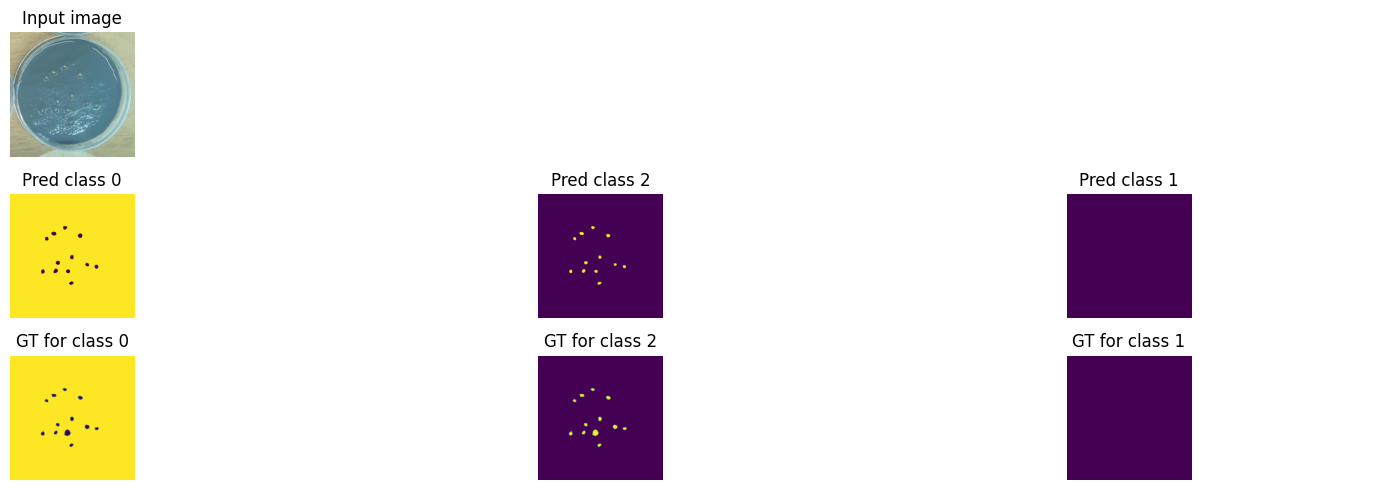

Train loss: 0.21751 | Time: 20m 55s | Val loss: 0.16350
Train_DICE_avg: 0.80199 | Train_Jaccard_avg: 0.73938 | Train_Sensitivity_avg: 0.88648 | Train_Specificity_avg: 0.93807 
Class 0 - Train_DICE: 0.98968 | Train_Jaccard: 0.97968 | Train_Sensitivity: 0.99285 | Train_Specificity: 0.82506 
Class 1 - Train_DICE: 0.58591 | Train_Jaccard: 0.51586 | Train_Sensitivity: 0.78692 | Train_Specificity: 0.99550 
Class 2 - Train_DICE: 0.83039 | Train_Jaccard: 0.72261 | Train_Sensitivity: 0.87967 | Train_Specificity: 0.99365 
Val_DICE_avg: 0.84406 | Val_Jaccard_avg: 0.79028 | Val_Sensitivity_avg: 0.91560 | Val_Specificity_avg: 0.92856 
Class 0 - Val_DICE: 0.99459 | Val_Jaccard: 0.98928 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.79491 
Class 1 - Val_DICE: 0.69225 | Val_Jaccard: 0.63305 | Val_Sensitivity: 0.84098 | Val_Specificity: 0.99643 
Class 2 - Val_DICE: 0.84533 | Val_Jaccard: 0.74850 | Val_Sensitivity: 0.90779 | Val_Specificity: 0.99434 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Train loss: 0.21454 | Time: 21m 43s | Val loss: 0.16173
Train_DICE_avg: 0.80435 | Train_Jaccard_avg: 0.74210 | Train_Sensitivity_avg: 0.89152 | Train_Specificity_avg: 0.93758 
Class 0 - Train_DICE: 0.98989 | Train_Jaccard: 0.98009 | Train_Sensitivity: 0.99314 | Train_Specificity: 0.82350 
Class 1 - Train_DICE: 0.59004 | Train_Jaccard: 0.52037 | Train_Sensitivity: 0.79939 | Train_Specificity: 0.99553 
Class 2 - Train_DICE: 0.83310 | Train_Jaccard: 0.72585 | Train_Sensitivity: 0.88202 | Train_Specificity: 0.99369 
Val_DICE_avg: 0.84281 | Val_Jaccard_avg: 0.79080 | Val_Sensitivity_avg: 0.91803 | Val_Specificity_avg: 0.92835 
Class 0 - Val_DICE: 0.99463 | Val_Jaccard: 0.98936 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.79425 
Class 1 - Val_DICE: 0.67729 | Val_Jaccard: 0.61973 | Val_Sensitivity: 0.85690 | Val_Specificity: 0.99570 
Class 2 - Val_DICE: 0.85651 | Val_Jaccard: 0.76330 | Val_Sensitivity: 0.89914 | Val_Specificity: 0.99509 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.21156 | Time: 22m 31s | Val loss: 0.16184
Train_DICE_avg: 0.80787 | Train_Jaccard_avg: 0.74598 | Train_Sensitivity_avg: 0.89881 | Train_Specificity_avg: 0.93792 
Class 0 - Train_DICE: 0.98984 | Train_Jaccard: 0.97998 | Train_Sensitivity: 0.99321 | Train_Specificity: 0.82454 
Class 1 - Train_DICE: 0.60125 | Train_Jaccard: 0.53240 | Train_Sensitivity: 0.81978 | Train_Specificity: 0.99555 
Class 2 - Train_DICE: 0.83253 | Train_Jaccard: 0.72557 | Train_Sensitivity: 0.88343 | Train_Specificity: 0.99367 
Val_DICE_avg: 0.84411 | Val_Jaccard_avg: 0.79077 | Val_Sensitivity_avg: 0.91683 | Val_Specificity_avg: 0.93130 
Class 0 - Val_DICE: 0.99483 | Val_Jaccard: 0.98974 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.80307 
Class 1 - Val_DICE: 0.68773 | Val_Jaccard: 0.62916 | Val_Sensitivity: 0.84569 | Val_Specificity: 0.99627 
Class 2 - Val_DICE: 0.84977 | Val_Jaccard: 0.75341 | Val_Sensitivity: 0.90682 | Val_Specificity: 0.99455 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.20957 | Time: 23m 20s | Val loss: 0.15545
Train_DICE_avg: 0.81032 | Train_Jaccard_avg: 0.74837 | Train_Sensitivity_avg: 0.89797 | Train_Specificity_avg: 0.93953 
Class 0 - Train_DICE: 0.98992 | Train_Jaccard: 0.98014 | Train_Sensitivity: 0.99299 | Train_Specificity: 0.82937 
Class 1 - Train_DICE: 0.60782 | Train_Jaccard: 0.53849 | Train_Sensitivity: 0.81757 | Train_Specificity: 0.99549 
Class 2 - Train_DICE: 0.83322 | Train_Jaccard: 0.72648 | Train_Sensitivity: 0.88334 | Train_Specificity: 0.99371 
Val_DICE_avg: 0.84979 | Val_Jaccard_avg: 0.79712 | Val_Sensitivity_avg: 0.92456 | Val_Specificity_avg: 0.92945 
Class 0 - Val_DICE: 0.99471 | Val_Jaccard: 0.98951 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.79747 
Class 1 - Val_DICE: 0.69838 | Val_Jaccard: 0.63983 | Val_Sensitivity: 0.86253 | Val_Specificity: 0.99612 
Class 2 - Val_DICE: 0.85628 | Val_Jaccard: 0.76200 | Val_Sensitivity: 0.91310 | Val_Specificity: 0.99475 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.20910 | Time: 24m 8s | Val loss: 0.15531
Train_DICE_avg: 0.81229 | Train_Jaccard_avg: 0.75018 | Train_Sensitivity_avg: 0.89990 | Train_Specificity_avg: 0.93636 
Class 0 - Train_DICE: 0.98975 | Train_Jaccard: 0.97981 | Train_Sensitivity: 0.99342 | Train_Specificity: 0.81969 
Class 1 - Train_DICE: 0.61227 | Train_Jaccard: 0.54196 | Train_Sensitivity: 0.82294 | Train_Specificity: 0.99560 
Class 2 - Train_DICE: 0.83484 | Train_Jaccard: 0.72875 | Train_Sensitivity: 0.88335 | Train_Specificity: 0.99380 
Val_DICE_avg: 0.85035 | Val_Jaccard_avg: 0.79815 | Val_Sensitivity_avg: 0.92409 | Val_Specificity_avg: 0.92948 
Class 0 - Val_DICE: 0.99463 | Val_Jaccard: 0.98935 | Val_Sensitivity: 0.99794 | Val_Specificity: 0.79723 
Class 1 - Val_DICE: 0.69581 | Val_Jaccard: 0.63704 | Val_Sensitivity: 0.87373 | Val_Specificity: 0.99607 
Class 2 - Val_DICE: 0.86062 | Val_Jaccard: 0.76806 | Val_Sensitivity: 0.90059 | Val_Specificity: 0.99512 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


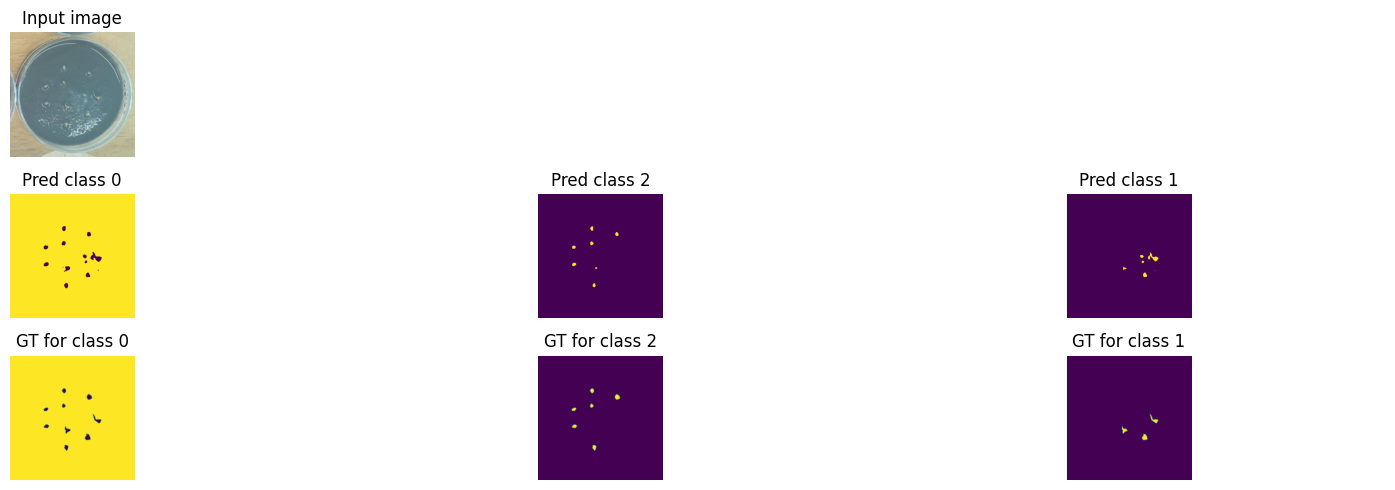

Train loss: 0.20844 | Time: 24m 58s | Val loss: 0.16050
Train_DICE_avg: 0.81074 | Train_Jaccard_avg: 0.74854 | Train_Sensitivity_avg: 0.89875 | Train_Specificity_avg: 0.93715 
Class 0 - Train_DICE: 0.98968 | Train_Jaccard: 0.97969 | Train_Sensitivity: 0.99328 | Train_Specificity: 0.82221 
Class 1 - Train_DICE: 0.60794 | Train_Jaccard: 0.53762 | Train_Sensitivity: 0.81715 | Train_Specificity: 0.99555 
Class 2 - Train_DICE: 0.83460 | Train_Jaccard: 0.72830 | Train_Sensitivity: 0.88581 | Train_Specificity: 0.99370 
Val_DICE_avg: 0.84459 | Val_Jaccard_avg: 0.79099 | Val_Sensitivity_avg: 0.91582 | Val_Specificity_avg: 0.92935 
Class 0 - Val_DICE: 0.99465 | Val_Jaccard: 0.98939 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.79728 
Class 1 - Val_DICE: 0.68825 | Val_Jaccard: 0.62775 | Val_Sensitivity: 0.84061 | Val_Specificity: 0.99601 
Class 2 - Val_DICE: 0.85088 | Val_Jaccard: 0.75583 | Val_Sensitivity: 0.90882 | Val_Specificity: 0.99476 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.20648 | Time: 25m 46s | Val loss: 0.15363
Train_DICE_avg: 0.81219 | Train_Jaccard_avg: 0.74995 | Train_Sensitivity_avg: 0.89792 | Train_Specificity_avg: 0.93856 
Class 0 - Train_DICE: 0.98995 | Train_Jaccard: 0.98021 | Train_Sensitivity: 0.99324 | Train_Specificity: 0.82632 
Class 1 - Train_DICE: 0.61032 | Train_Jaccard: 0.53933 | Train_Sensitivity: 0.81423 | Train_Specificity: 0.99564 
Class 2 - Train_DICE: 0.83629 | Train_Jaccard: 0.73032 | Train_Sensitivity: 0.88630 | Train_Specificity: 0.99372 
Val_DICE_avg: 0.85154 | Val_Jaccard_avg: 0.79960 | Val_Sensitivity_avg: 0.91801 | Val_Specificity_avg: 0.92925 
Class 0 - Val_DICE: 0.99470 | Val_Jaccard: 0.98948 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.79636 
Class 1 - Val_DICE: 0.70032 | Val_Jaccard: 0.64280 | Val_Sensitivity: 0.84533 | Val_Specificity: 0.99662 
Class 2 - Val_DICE: 0.85961 | Val_Jaccard: 0.76653 | Val_Sensitivity: 0.91054 | Val_Specificity: 0.99477 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.20421 | Time: 26m 35s | Val loss: 0.15205
Train_DICE_avg: 0.81598 | Train_Jaccard_avg: 0.75393 | Train_Sensitivity_avg: 0.90208 | Train_Specificity_avg: 0.93694 
Class 0 - Train_DICE: 0.98984 | Train_Jaccard: 0.97999 | Train_Sensitivity: 0.99360 | Train_Specificity: 0.82143 
Class 1 - Train_DICE: 0.62103 | Train_Jaccard: 0.55019 | Train_Sensitivity: 0.82503 | Train_Specificity: 0.99564 
Class 2 - Train_DICE: 0.83707 | Train_Jaccard: 0.73162 | Train_Sensitivity: 0.88759 | Train_Specificity: 0.99374 
Val_DICE_avg: 0.85043 | Val_Jaccard_avg: 0.79887 | Val_Sensitivity_avg: 0.92765 | Val_Specificity_avg: 0.93498 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99016 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.81391 
Class 1 - Val_DICE: 0.69618 | Val_Jaccard: 0.63933 | Val_Sensitivity: 0.87579 | Val_Specificity: 0.99610 
Class 2 - Val_DICE: 0.86007 | Val_Jaccard: 0.76712 | Val_Sensitivity: 0.90927 | Val_Specificity: 0.99494 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.19968 | Time: 27m 24s | Val loss: 0.14583
Train_DICE_avg: 0.82006 | Train_Jaccard_avg: 0.75813 | Train_Sensitivity_avg: 0.90574 | Train_Specificity_avg: 0.93732 
Class 0 - Train_DICE: 0.98997 | Train_Jaccard: 0.98024 | Train_Sensitivity: 0.99354 | Train_Specificity: 0.82228 
Class 1 - Train_DICE: 0.63020 | Train_Jaccard: 0.55881 | Train_Sensitivity: 0.83324 | Train_Specificity: 0.99588 
Class 2 - Train_DICE: 0.84001 | Train_Jaccard: 0.73534 | Train_Sensitivity: 0.89042 | Train_Specificity: 0.99380 
Val_DICE_avg: 0.85829 | Val_Jaccard_avg: 0.80679 | Val_Sensitivity_avg: 0.92904 | Val_Specificity_avg: 0.93096 
Class 0 - Val_DICE: 0.99496 | Val_Jaccard: 0.98999 | Val_Sensitivity: 0.99786 | Val_Specificity: 0.80142 
Class 1 - Val_DICE: 0.71246 | Val_Jaccard: 0.65322 | Val_Sensitivity: 0.88748 | Val_Specificity: 0.99600 
Class 2 - Val_DICE: 0.86744 | Val_Jaccard: 0.77714 | Val_Sensitivity: 0.90179 | Val_Specificity: 0.99545 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.19973 | Time: 28m 12s | Val loss: 0.14388
Train_DICE_avg: 0.82217 | Train_Jaccard_avg: 0.76013 | Train_Sensitivity_avg: 0.90769 | Train_Specificity_avg: 0.93908 
Class 0 - Train_DICE: 0.99014 | Train_Jaccard: 0.98057 | Train_Sensitivity: 0.99349 | Train_Specificity: 0.82761 
Class 1 - Train_DICE: 0.63491 | Train_Jaccard: 0.56285 | Train_Sensitivity: 0.83725 | Train_Specificity: 0.99584 
Class 2 - Train_DICE: 0.84147 | Train_Jaccard: 0.73696 | Train_Sensitivity: 0.89233 | Train_Specificity: 0.99378 
Val_DICE_avg: 0.86032 | Val_Jaccard_avg: 0.80888 | Val_Sensitivity_avg: 0.93040 | Val_Specificity_avg: 0.93083 
Class 0 - Val_DICE: 0.99486 | Val_Jaccard: 0.98980 | Val_Sensitivity: 0.99804 | Val_Specificity: 0.80104 
Class 1 - Val_DICE: 0.71958 | Val_Jaccard: 0.66079 | Val_Sensitivity: 0.88422 | Val_Specificity: 0.99629 
Class 2 - Val_DICE: 0.86651 | Val_Jaccard: 0.77606 | Val_Sensitivity: 0.90894 | Val_Specificity: 0.99516 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


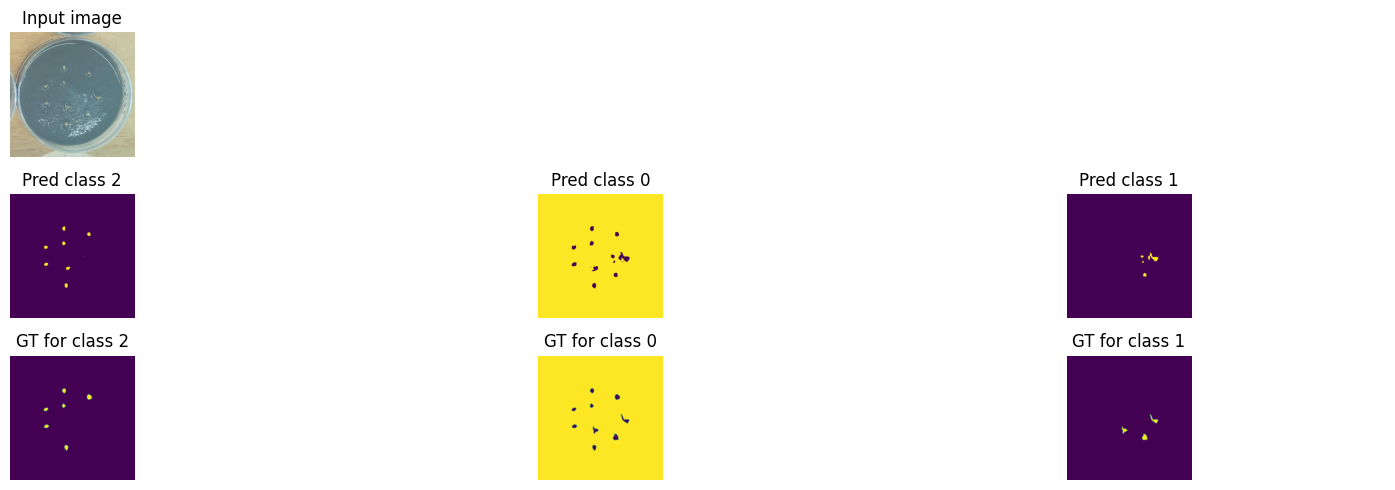

Train loss: 0.19293 | Time: 29m 1s | Val loss: 0.14581
Train_DICE_avg: 0.82474 | Train_Jaccard_avg: 0.76282 | Train_Sensitivity_avg: 0.90844 | Train_Specificity_avg: 0.93880 
Class 0 - Train_DICE: 0.99000 | Train_Jaccard: 0.98029 | Train_Sensitivity: 0.99367 | Train_Specificity: 0.82663 
Class 1 - Train_DICE: 0.64190 | Train_Jaccard: 0.56963 | Train_Sensitivity: 0.83805 | Train_Specificity: 0.99596 
Class 2 - Train_DICE: 0.84232 | Train_Jaccard: 0.73852 | Train_Sensitivity: 0.89360 | Train_Specificity: 0.99381 
Val_DICE_avg: 0.85781 | Val_Jaccard_avg: 0.80583 | Val_Sensitivity_avg: 0.93031 | Val_Specificity_avg: 0.93092 
Class 0 - Val_DICE: 0.99489 | Val_Jaccard: 0.98985 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.80148 
Class 1 - Val_DICE: 0.71629 | Val_Jaccard: 0.65785 | Val_Sensitivity: 0.87921 | Val_Specificity: 0.99645 
Class 2 - Val_DICE: 0.86225 | Val_Jaccard: 0.76980 | Val_Sensitivity: 0.91366 | Val_Specificity: 0.99482 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.19461 | Time: 29m 50s | Val loss: 0.14256
Train_DICE_avg: 0.82427 | Train_Jaccard_avg: 0.76287 | Train_Sensitivity_avg: 0.91136 | Train_Specificity_avg: 0.93743 
Class 0 - Train_DICE: 0.99008 | Train_Jaccard: 0.98046 | Train_Sensitivity: 0.99380 | Train_Specificity: 0.82251 
Class 1 - Train_DICE: 0.63984 | Train_Jaccard: 0.56857 | Train_Sensitivity: 0.84726 | Train_Specificity: 0.99592 
Class 2 - Train_DICE: 0.84289 | Train_Jaccard: 0.73959 | Train_Sensitivity: 0.89302 | Train_Specificity: 0.99387 
Val_DICE_avg: 0.86104 | Val_Jaccard_avg: 0.80939 | Val_Sensitivity_avg: 0.93029 | Val_Specificity_avg: 0.93009 
Class 0 - Val_DICE: 0.99487 | Val_Jaccard: 0.98982 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.79890 
Class 1 - Val_DICE: 0.72591 | Val_Jaccard: 0.66780 | Val_Sensitivity: 0.87521 | Val_Specificity: 0.99664 
Class 2 - Val_DICE: 0.86235 | Val_Jaccard: 0.77057 | Val_Sensitivity: 0.91762 | Val_Specificity: 0.99473 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.19244 | Time: 30m 39s | Val loss: 0.14260
Train_DICE_avg: 0.82769 | Train_Jaccard_avg: 0.76612 | Train_Sensitivity_avg: 0.91063 | Train_Specificity_avg: 0.93849 
Class 0 - Train_DICE: 0.99023 | Train_Jaccard: 0.98074 | Train_Sensitivity: 0.99376 | Train_Specificity: 0.82553 
Class 1 - Train_DICE: 0.64801 | Train_Jaccard: 0.57550 | Train_Sensitivity: 0.84410 | Train_Specificity: 0.99599 
Class 2 - Train_DICE: 0.84482 | Train_Jaccard: 0.74211 | Train_Sensitivity: 0.89402 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.86043 | Val_Jaccard_avg: 0.80989 | Val_Sensitivity_avg: 0.93274 | Val_Specificity_avg: 0.92905 
Class 0 - Val_DICE: 0.99488 | Val_Jaccard: 0.98983 | Val_Sensitivity: 0.99804 | Val_Specificity: 0.79570 
Class 1 - Val_DICE: 0.72016 | Val_Jaccard: 0.66347 | Val_Sensitivity: 0.88788 | Val_Specificity: 0.99632 
Class 2 - Val_DICE: 0.86627 | Val_Jaccard: 0.77637 | Val_Sensitivity: 0.91231 | Val_Specificity: 0.99513 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.19060 | Time: 31m 28s | Val loss: 0.14125
Train_DICE_avg: 0.82744 | Train_Jaccard_avg: 0.76577 | Train_Sensitivity_avg: 0.90880 | Train_Specificity_avg: 0.93949 
Class 0 - Train_DICE: 0.99030 | Train_Jaccard: 0.98087 | Train_Sensitivity: 0.99370 | Train_Specificity: 0.82856 
Class 1 - Train_DICE: 0.64732 | Train_Jaccard: 0.57446 | Train_Sensitivity: 0.83661 | Train_Specificity: 0.99610 
Class 2 - Train_DICE: 0.84469 | Train_Jaccard: 0.74196 | Train_Sensitivity: 0.89609 | Train_Specificity: 0.99381 
Val_DICE_avg: 0.86163 | Val_Jaccard_avg: 0.81073 | Val_Sensitivity_avg: 0.93289 | Val_Specificity_avg: 0.93088 
Class 0 - Val_DICE: 0.99495 | Val_Jaccard: 0.98997 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.80124 
Class 1 - Val_DICE: 0.72488 | Val_Jaccard: 0.66755 | Val_Sensitivity: 0.88418 | Val_Specificity: 0.99638 
Class 2 - Val_DICE: 0.86507 | Val_Jaccard: 0.77468 | Val_Sensitivity: 0.91646 | Val_Specificity: 0.99501 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.18968 | Time: 32m 16s | Val loss: 0.13784
Train_DICE_avg: 0.82981 | Train_Jaccard_avg: 0.76787 | Train_Sensitivity_avg: 0.90940 | Train_Specificity_avg: 0.93668 
Class 0 - Train_DICE: 0.99017 | Train_Jaccard: 0.98063 | Train_Sensitivity: 0.99418 | Train_Specificity: 0.82006 
Class 1 - Train_DICE: 0.65210 | Train_Jaccard: 0.57792 | Train_Sensitivity: 0.83650 | Train_Specificity: 0.99607 
Class 2 - Train_DICE: 0.84715 | Train_Jaccard: 0.74506 | Train_Sensitivity: 0.89752 | Train_Specificity: 0.99389 
Val_DICE_avg: 0.86363 | Val_Jaccard_avg: 0.81093 | Val_Sensitivity_avg: 0.93377 | Val_Specificity_avg: 0.93248 
Class 0 - Val_DICE: 0.99503 | Val_Jaccard: 0.99014 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.80622 
Class 1 - Val_DICE: 0.73716 | Val_Jaccard: 0.67761 | Val_Sensitivity: 0.87683 | Val_Specificity: 0.99674 
Class 2 - Val_DICE: 0.85869 | Val_Jaccard: 0.76503 | Val_Sensitivity: 0.92644 | Val_Specificity: 0.99447 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


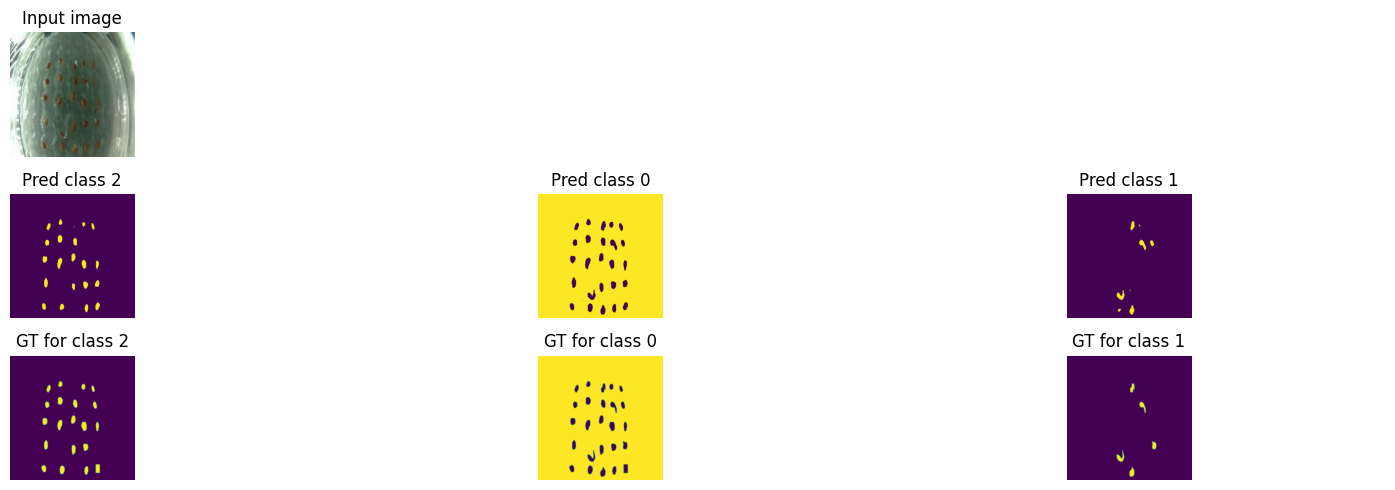

Train loss: 0.19136 | Time: 33m 5s | Val loss: 0.13821
Train_DICE_avg: 0.82861 | Train_Jaccard_avg: 0.76708 | Train_Sensitivity_avg: 0.90950 | Train_Specificity_avg: 0.93670 
Class 0 - Train_DICE: 0.99019 | Train_Jaccard: 0.98067 | Train_Sensitivity: 0.99407 | Train_Specificity: 0.82011 
Class 1 - Train_DICE: 0.64844 | Train_Jaccard: 0.57544 | Train_Sensitivity: 0.83709 | Train_Specificity: 0.99610 
Class 2 - Train_DICE: 0.84719 | Train_Jaccard: 0.74512 | Train_Sensitivity: 0.89733 | Train_Specificity: 0.99389 
Val_DICE_avg: 0.86467 | Val_Jaccard_avg: 0.81345 | Val_Sensitivity_avg: 0.93357 | Val_Specificity_avg: 0.93143 
Class 0 - Val_DICE: 0.99488 | Val_Jaccard: 0.98984 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.80262 
Class 1 - Val_DICE: 0.73279 | Val_Jaccard: 0.67384 | Val_Sensitivity: 0.88112 | Val_Specificity: 0.99676 
Class 2 - Val_DICE: 0.86635 | Val_Jaccard: 0.77667 | Val_Sensitivity: 0.92150 | Val_Specificity: 0.99492 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.18533 | Time: 33m 54s | Val loss: 0.13932
Train_DICE_avg: 0.83123 | Train_Jaccard_avg: 0.76949 | Train_Sensitivity_avg: 0.90918 | Train_Specificity_avg: 0.94118 
Class 0 - Train_DICE: 0.99023 | Train_Jaccard: 0.98075 | Train_Sensitivity: 0.99344 | Train_Specificity: 0.83347 
Class 1 - Train_DICE: 0.65583 | Train_Jaccard: 0.58211 | Train_Sensitivity: 0.83554 | Train_Specificity: 0.99615 
Class 2 - Train_DICE: 0.84763 | Train_Jaccard: 0.74560 | Train_Sensitivity: 0.89855 | Train_Specificity: 0.99393 
Val_DICE_avg: 0.86253 | Val_Jaccard_avg: 0.81096 | Val_Sensitivity_avg: 0.93567 | Val_Specificity_avg: 0.93283 
Class 0 - Val_DICE: 0.99494 | Val_Jaccard: 0.98997 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.80706 
Class 1 - Val_DICE: 0.72969 | Val_Jaccard: 0.67126 | Val_Sensitivity: 0.88649 | Val_Specificity: 0.99656 
Class 2 - Val_DICE: 0.86297 | Val_Jaccard: 0.77166 | Val_Sensitivity: 0.92243 | Val_Specificity: 0.99488 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.18695 | Time: 34m 42s | Val loss: 0.13577
Train_DICE_avg: 0.83294 | Train_Jaccard_avg: 0.77164 | Train_Sensitivity_avg: 0.91423 | Train_Specificity_avg: 0.93638 
Class 0 - Train_DICE: 0.99031 | Train_Jaccard: 0.98090 | Train_Sensitivity: 0.99447 | Train_Specificity: 0.81904 
Class 1 - Train_DICE: 0.65991 | Train_Jaccard: 0.58694 | Train_Sensitivity: 0.84727 | Train_Specificity: 0.99610 
Class 2 - Train_DICE: 0.84860 | Train_Jaccard: 0.74709 | Train_Sensitivity: 0.90095 | Train_Specificity: 0.99400 
Val_DICE_avg: 0.86551 | Val_Jaccard_avg: 0.81315 | Val_Sensitivity_avg: 0.93491 | Val_Specificity_avg: 0.93195 
Class 0 - Val_DICE: 0.99489 | Val_Jaccard: 0.98986 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.80446 
Class 1 - Val_DICE: 0.74048 | Val_Jaccard: 0.68001 | Val_Sensitivity: 0.87894 | Val_Specificity: 0.99680 
Class 2 - Val_DICE: 0.86116 | Val_Jaccard: 0.76957 | Val_Sensitivity: 0.92772 | Val_Specificity: 0.99458 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.18357 | Time: 35m 31s | Val loss: 0.13440
Train_DICE_avg: 0.83183 | Train_Jaccard_avg: 0.77063 | Train_Sensitivity_avg: 0.91242 | Train_Specificity_avg: 0.94131 
Class 0 - Train_DICE: 0.99036 | Train_Jaccard: 0.98100 | Train_Sensitivity: 0.99377 | Train_Specificity: 0.83379 
Class 1 - Train_DICE: 0.65568 | Train_Jaccard: 0.58262 | Train_Sensitivity: 0.84339 | Train_Specificity: 0.99617 
Class 2 - Train_DICE: 0.84945 | Train_Jaccard: 0.74826 | Train_Sensitivity: 0.90010 | Train_Specificity: 0.99398 
Val_DICE_avg: 0.86632 | Val_Jaccard_avg: 0.81399 | Val_Sensitivity_avg: 0.93529 | Val_Specificity_avg: 0.93531 
Class 0 - Val_DICE: 0.99511 | Val_Jaccard: 0.99030 | Val_Sensitivity: 0.99796 | Val_Specificity: 0.81451 
Class 1 - Val_DICE: 0.73761 | Val_Jaccard: 0.67527 | Val_Sensitivity: 0.88713 | Val_Specificity: 0.99648 
Class 2 - Val_DICE: 0.86623 | Val_Jaccard: 0.77639 | Val_Sensitivity: 0.92080 | Val_Specificity: 0.99493 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.18378 | Time: 36m 20s | Val loss: 0.13547
Train_DICE_avg: 0.83621 | Train_Jaccard_avg: 0.77478 | Train_Sensitivity_avg: 0.91590 | Train_Specificity_avg: 0.93949 
Class 0 - Train_DICE: 0.99035 | Train_Jaccard: 0.98098 | Train_Sensitivity: 0.99415 | Train_Specificity: 0.82829 
Class 1 - Train_DICE: 0.66900 | Train_Jaccard: 0.59514 | Train_Sensitivity: 0.85309 | Train_Specificity: 0.99617 
Class 2 - Train_DICE: 0.84927 | Train_Jaccard: 0.74824 | Train_Sensitivity: 0.90045 | Train_Specificity: 0.99401 
Val_DICE_avg: 0.86750 | Val_Jaccard_avg: 0.81651 | Val_Sensitivity_avg: 0.93649 | Val_Specificity_avg: 0.93096 
Class 0 - Val_DICE: 0.99490 | Val_Jaccard: 0.98988 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.80127 
Class 1 - Val_DICE: 0.74075 | Val_Jaccard: 0.68128 | Val_Sensitivity: 0.88832 | Val_Specificity: 0.99673 
Class 2 - Val_DICE: 0.86685 | Val_Jaccard: 0.77836 | Val_Sensitivity: 0.92309 | Val_Specificity: 0.99487 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


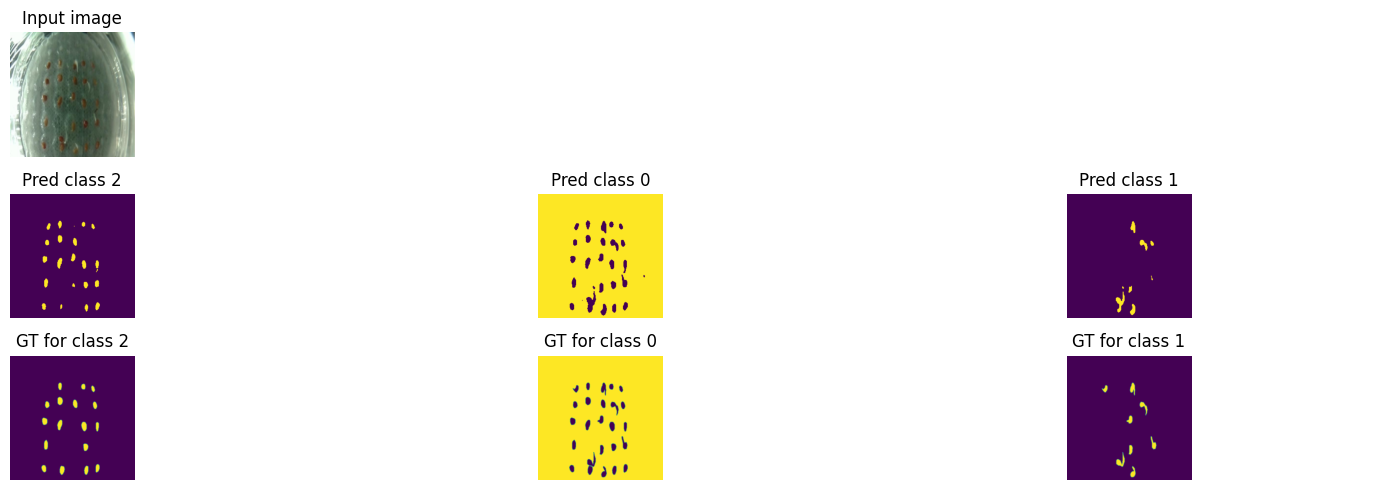

Train loss: 0.18341 | Time: 37m 9s | Val loss: 0.13476
Train_DICE_avg: 0.83463 | Train_Jaccard_avg: 0.77334 | Train_Sensitivity_avg: 0.91434 | Train_Specificity_avg: 0.93995 
Class 0 - Train_DICE: 0.99051 | Train_Jaccard: 0.98128 | Train_Sensitivity: 0.99407 | Train_Specificity: 0.82962 
Class 1 - Train_DICE: 0.66226 | Train_Jaccard: 0.58818 | Train_Sensitivity: 0.84763 | Train_Specificity: 0.99619 
Class 2 - Train_DICE: 0.85113 | Train_Jaccard: 0.75056 | Train_Sensitivity: 0.90132 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.86729 | Val_Jaccard_avg: 0.81613 | Val_Sensitivity_avg: 0.93640 | Val_Specificity_avg: 0.93281 
Class 0 - Val_DICE: 0.99498 | Val_Jaccard: 0.99005 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.80681 
Class 1 - Val_DICE: 0.74008 | Val_Jaccard: 0.68103 | Val_Sensitivity: 0.88882 | Val_Specificity: 0.99669 
Class 2 - Val_DICE: 0.86681 | Val_Jaccard: 0.77733 | Val_Sensitivity: 0.92231 | Val_Specificity: 0.99494 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.18211 | Time: 37m 58s | Val loss: 0.13530
Train_DICE_avg: 0.83531 | Train_Jaccard_avg: 0.77411 | Train_Sensitivity_avg: 0.91424 | Train_Specificity_avg: 0.93840 
Class 0 - Train_DICE: 0.99032 | Train_Jaccard: 0.98092 | Train_Sensitivity: 0.99421 | Train_Specificity: 0.82500 
Class 1 - Train_DICE: 0.66503 | Train_Jaccard: 0.59129 | Train_Sensitivity: 0.84556 | Train_Specificity: 0.99618 
Class 2 - Train_DICE: 0.85057 | Train_Jaccard: 0.75011 | Train_Sensitivity: 0.90296 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.86721 | Val_Jaccard_avg: 0.81489 | Val_Sensitivity_avg: 0.93327 | Val_Specificity_avg: 0.93137 
Class 0 - Val_DICE: 0.99493 | Val_Jaccard: 0.98993 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.80263 
Class 1 - Val_DICE: 0.74586 | Val_Jaccard: 0.68446 | Val_Sensitivity: 0.87403 | Val_Specificity: 0.99699 
Class 2 - Val_DICE: 0.86085 | Val_Jaccard: 0.77026 | Val_Sensitivity: 0.92769 | Val_Specificity: 0.99448 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.18072 | Time: 38m 46s | Val loss: 0.13513
Train_DICE_avg: 0.83735 | Train_Jaccard_avg: 0.77637 | Train_Sensitivity_avg: 0.91504 | Train_Specificity_avg: 0.93944 
Class 0 - Train_DICE: 0.99046 | Train_Jaccard: 0.98121 | Train_Sensitivity: 0.99407 | Train_Specificity: 0.82800 
Class 1 - Train_DICE: 0.66968 | Train_Jaccard: 0.59591 | Train_Sensitivity: 0.84787 | Train_Specificity: 0.99626 
Class 2 - Train_DICE: 0.85190 | Train_Jaccard: 0.75200 | Train_Sensitivity: 0.90319 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.86725 | Val_Jaccard_avg: 0.81579 | Val_Sensitivity_avg: 0.93562 | Val_Specificity_avg: 0.93254 
Class 0 - Val_DICE: 0.99506 | Val_Jaccard: 0.99021 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.80603 
Class 1 - Val_DICE: 0.74049 | Val_Jaccard: 0.68070 | Val_Sensitivity: 0.88721 | Val_Specificity: 0.99667 
Class 2 - Val_DICE: 0.86621 | Val_Jaccard: 0.77646 | Val_Sensitivity: 0.92158 | Val_Specificity: 0.99492 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.18351 | Time: 39m 35s | Val loss: 0.13367
Train_DICE_avg: 0.83691 | Train_Jaccard_avg: 0.77586 | Train_Sensitivity_avg: 0.91612 | Train_Specificity_avg: 0.94068 
Class 0 - Train_DICE: 0.99052 | Train_Jaccard: 0.98132 | Train_Sensitivity: 0.99401 | Train_Specificity: 0.83170 
Class 1 - Train_DICE: 0.66836 | Train_Jaccard: 0.59463 | Train_Sensitivity: 0.85105 | Train_Specificity: 0.99628 
Class 2 - Train_DICE: 0.85185 | Train_Jaccard: 0.75164 | Train_Sensitivity: 0.90330 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.86863 | Val_Jaccard_avg: 0.81704 | Val_Sensitivity_avg: 0.93553 | Val_Specificity_avg: 0.93087 
Class 0 - Val_DICE: 0.99496 | Val_Jaccard: 0.99000 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.80101 
Class 1 - Val_DICE: 0.74481 | Val_Jaccard: 0.68422 | Val_Sensitivity: 0.88352 | Val_Specificity: 0.99677 
Class 2 - Val_DICE: 0.86611 | Val_Jaccard: 0.77690 | Val_Sensitivity: 0.92497 | Val_Specificity: 0.99482 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.17965 | Time: 40m 24s | Val loss: 0.13120
Train_DICE_avg: 0.83640 | Train_Jaccard_avg: 0.77492 | Train_Sensitivity_avg: 0.91256 | Train_Specificity_avg: 0.94040 
Class 0 - Train_DICE: 0.99046 | Train_Jaccard: 0.98120 | Train_Sensitivity: 0.99400 | Train_Specificity: 0.83095 
Class 1 - Train_DICE: 0.66717 | Train_Jaccard: 0.59241 | Train_Sensitivity: 0.83941 | Train_Specificity: 0.99628 
Class 2 - Train_DICE: 0.85157 | Train_Jaccard: 0.75115 | Train_Sensitivity: 0.90426 | Train_Specificity: 0.99397 
Val_DICE_avg: 0.87048 | Val_Jaccard_avg: 0.81898 | Val_Sensitivity_avg: 0.93848 | Val_Specificity_avg: 0.93338 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99025 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.80853 
Class 1 - Val_DICE: 0.74859 | Val_Jaccard: 0.68774 | Val_Sensitivity: 0.89184 | Val_Specificity: 0.99676 
Class 2 - Val_DICE: 0.86775 | Val_Jaccard: 0.77895 | Val_Sensitivity: 0.92556 | Val_Specificity: 0.99486 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


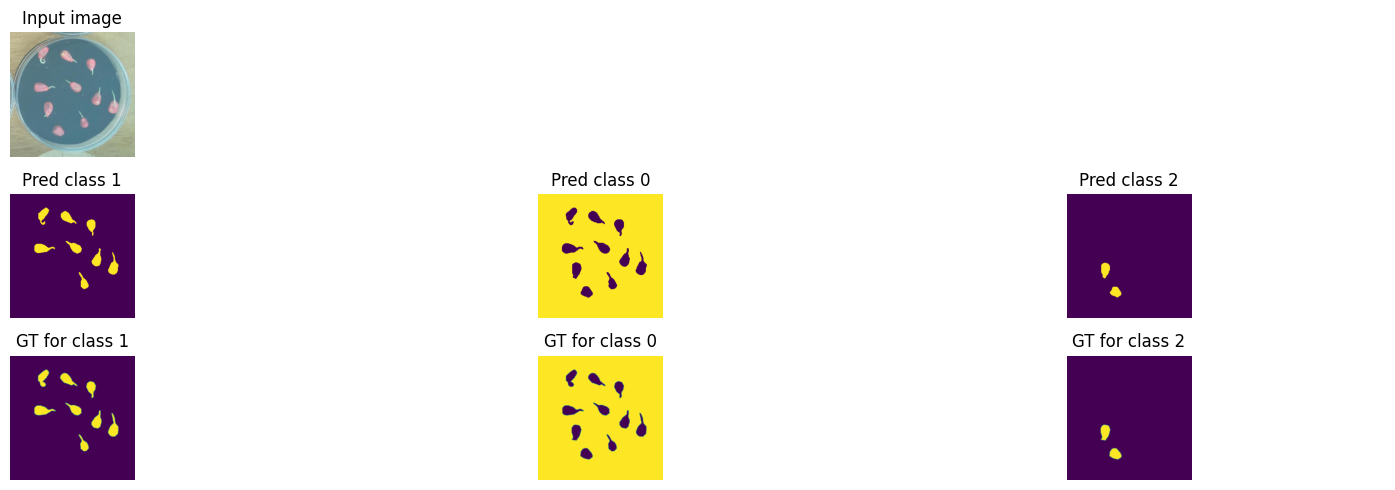

Train loss: 0.17860 | Time: 41m 14s | Val loss: 0.13150
Train_DICE_avg: 0.83809 | Train_Jaccard_avg: 0.77726 | Train_Sensitivity_avg: 0.91956 | Train_Specificity_avg: 0.93921 
Class 0 - Train_DICE: 0.99038 | Train_Jaccard: 0.98104 | Train_Sensitivity: 0.99423 | Train_Specificity: 0.82735 
Class 1 - Train_DICE: 0.67179 | Train_Jaccard: 0.59852 | Train_Sensitivity: 0.86062 | Train_Specificity: 0.99621 
Class 2 - Train_DICE: 0.85209 | Train_Jaccard: 0.75221 | Train_Sensitivity: 0.90383 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.87070 | Val_Jaccard_avg: 0.81886 | Val_Sensitivity_avg: 0.93794 | Val_Specificity_avg: 0.93178 
Class 0 - Val_DICE: 0.99496 | Val_Jaccard: 0.98999 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.80357 
Class 1 - Val_DICE: 0.74909 | Val_Jaccard: 0.68733 | Val_Sensitivity: 0.88967 | Val_Specificity: 0.99676 
Class 2 - Val_DICE: 0.86805 | Val_Jaccard: 0.77926 | Val_Sensitivity: 0.92603 | Val_Specificity: 0.99500 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.18019 | Time: 42m 3s | Val loss: 0.13179
Train_DICE_avg: 0.83794 | Train_Jaccard_avg: 0.77718 | Train_Sensitivity_avg: 0.91605 | Train_Specificity_avg: 0.93943 
Class 0 - Train_DICE: 0.99045 | Train_Jaccard: 0.98117 | Train_Sensitivity: 0.99422 | Train_Specificity: 0.82789 
Class 1 - Train_DICE: 0.67049 | Train_Jaccard: 0.59709 | Train_Sensitivity: 0.84916 | Train_Specificity: 0.99633 
Class 2 - Train_DICE: 0.85287 | Train_Jaccard: 0.75328 | Train_Sensitivity: 0.90475 | Train_Specificity: 0.99407 
Val_DICE_avg: 0.87051 | Val_Jaccard_avg: 0.81890 | Val_Sensitivity_avg: 0.93741 | Val_Specificity_avg: 0.93283 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99016 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.80679 
Class 1 - Val_DICE: 0.74912 | Val_Jaccard: 0.68852 | Val_Sensitivity: 0.88598 | Val_Specificity: 0.99682 
Class 2 - Val_DICE: 0.86737 | Val_Jaccard: 0.77801 | Val_Sensitivity: 0.92818 | Val_Specificity: 0.99488 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.17859 | Time: 42m 52s | Val loss: 0.13141
Train_DICE_avg: 0.83936 | Train_Jaccard_avg: 0.77856 | Train_Sensitivity_avg: 0.91783 | Train_Specificity_avg: 0.93903 
Class 0 - Train_DICE: 0.99033 | Train_Jaccard: 0.98093 | Train_Sensitivity: 0.99410 | Train_Specificity: 0.82666 
Class 1 - Train_DICE: 0.67323 | Train_Jaccard: 0.59932 | Train_Sensitivity: 0.85500 | Train_Specificity: 0.99631 
Class 2 - Train_DICE: 0.85451 | Train_Jaccard: 0.75543 | Train_Sensitivity: 0.90439 | Train_Specificity: 0.99413 
Val_DICE_avg: 0.87036 | Val_Jaccard_avg: 0.81877 | Val_Sensitivity_avg: 0.93877 | Val_Specificity_avg: 0.93315 
Class 0 - Val_DICE: 0.99510 | Val_Jaccard: 0.99028 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.80782 
Class 1 - Val_DICE: 0.74770 | Val_Jaccard: 0.68741 | Val_Sensitivity: 0.89195 | Val_Specificity: 0.99675 
Class 2 - Val_DICE: 0.86827 | Val_Jaccard: 0.77861 | Val_Sensitivity: 0.92632 | Val_Specificity: 0.99487 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.18010 | Time: 43m 41s | Val loss: 0.13025
Train_DICE_avg: 0.83815 | Train_Jaccard_avg: 0.77751 | Train_Sensitivity_avg: 0.91702 | Train_Specificity_avg: 0.94056 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98139 | Train_Sensitivity: 0.99426 | Train_Specificity: 0.83129 
Class 1 - Train_DICE: 0.67101 | Train_Jaccard: 0.59793 | Train_Sensitivity: 0.85256 | Train_Specificity: 0.99629 
Class 2 - Train_DICE: 0.85287 | Train_Jaccard: 0.75321 | Train_Sensitivity: 0.90424 | Train_Specificity: 0.99409 
Val_DICE_avg: 0.87203 | Val_Jaccard_avg: 0.82083 | Val_Sensitivity_avg: 0.93849 | Val_Specificity_avg: 0.93259 
Class 0 - Val_DICE: 0.99506 | Val_Jaccard: 0.99020 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.80605 
Class 1 - Val_DICE: 0.75236 | Val_Jaccard: 0.69232 | Val_Sensitivity: 0.88995 | Val_Specificity: 0.99683 
Class 2 - Val_DICE: 0.86868 | Val_Jaccard: 0.77998 | Val_Sensitivity: 0.92746 | Val_Specificity: 0.99489 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.17855 | Time: 44m 30s | Val loss: 0.13190
Train_DICE_avg: 0.83836 | Train_Jaccard_avg: 0.77773 | Train_Sensitivity_avg: 0.91640 | Train_Specificity_avg: 0.93955 
Class 0 - Train_DICE: 0.99054 | Train_Jaccard: 0.98134 | Train_Sensitivity: 0.99427 | Train_Specificity: 0.82826 
Class 1 - Train_DICE: 0.66969 | Train_Jaccard: 0.59611 | Train_Sensitivity: 0.85065 | Train_Specificity: 0.99626 
Class 2 - Train_DICE: 0.85487 | Train_Jaccard: 0.75575 | Train_Sensitivity: 0.90427 | Train_Specificity: 0.99413 
Val_DICE_avg: 0.86973 | Val_Jaccard_avg: 0.81790 | Val_Sensitivity_avg: 0.93718 | Val_Specificity_avg: 0.93270 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99015 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.80657 
Class 1 - Val_DICE: 0.74912 | Val_Jaccard: 0.68897 | Val_Sensitivity: 0.88347 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.86503 | Val_Jaccard: 0.77458 | Val_Sensitivity: 0.92999 | Val_Specificity: 0.99464 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


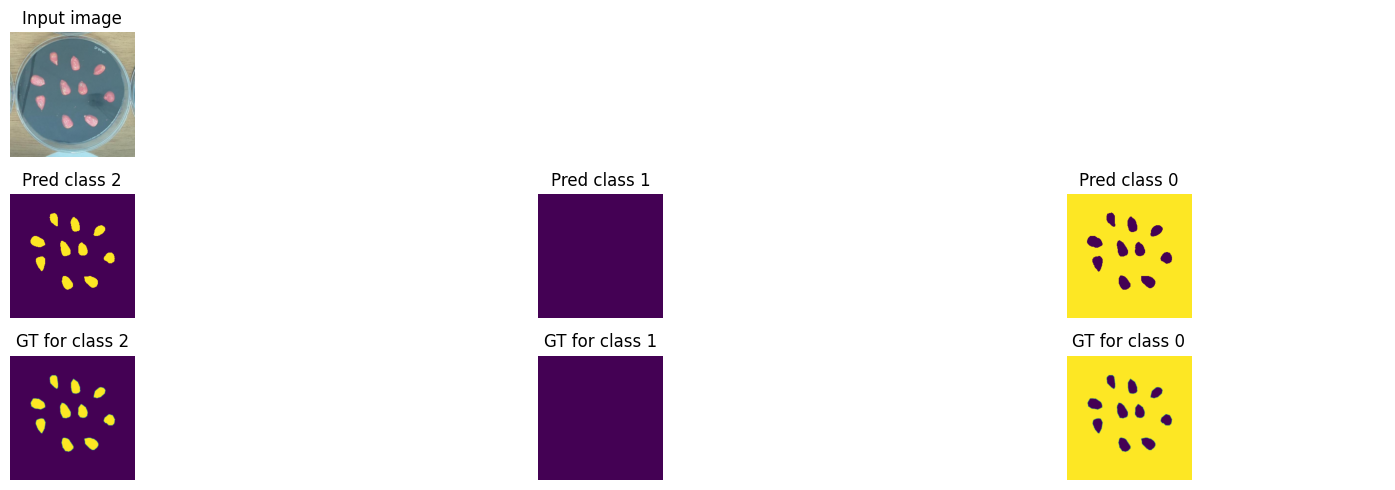

Train loss: 0.17723 | Time: 45m 20s | Val loss: 0.13062
Train_DICE_avg: 0.83945 | Train_Jaccard_avg: 0.77838 | Train_Sensitivity_avg: 0.91548 | Train_Specificity_avg: 0.93973 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98146 | Train_Sensitivity: 0.99434 | Train_Specificity: 0.82875 
Class 1 - Train_DICE: 0.67306 | Train_Jaccard: 0.59817 | Train_Sensitivity: 0.84495 | Train_Specificity: 0.99638 
Class 2 - Train_DICE: 0.85468 | Train_Jaccard: 0.75553 | Train_Sensitivity: 0.90714 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.87144 | Val_Jaccard_avg: 0.82017 | Val_Sensitivity_avg: 0.93901 | Val_Specificity_avg: 0.93312 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99024 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.80771 
Class 1 - Val_DICE: 0.75006 | Val_Jaccard: 0.69001 | Val_Sensitivity: 0.89289 | Val_Specificity: 0.99672 
Class 2 - Val_DICE: 0.86918 | Val_Jaccard: 0.78025 | Val_Sensitivity: 0.92610 | Val_Specificity: 0.99494 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.17845 | Time: 46m 9s | Val loss: 0.13203
Train_DICE_avg: 0.84086 | Train_Jaccard_avg: 0.78027 | Train_Sensitivity_avg: 0.91944 | Train_Specificity_avg: 0.93967 
Class 0 - Train_DICE: 0.99055 | Train_Jaccard: 0.98136 | Train_Sensitivity: 0.99422 | Train_Specificity: 0.82854 
Class 1 - Train_DICE: 0.67695 | Train_Jaccard: 0.60313 | Train_Sensitivity: 0.85739 | Train_Specificity: 0.99636 
Class 2 - Train_DICE: 0.85510 | Train_Jaccard: 0.75633 | Train_Sensitivity: 0.90670 | Train_Specificity: 0.99412 
Val_DICE_avg: 0.86971 | Val_Jaccard_avg: 0.81839 | Val_Sensitivity_avg: 0.93544 | Val_Specificity_avg: 0.93255 
Class 0 - Val_DICE: 0.99498 | Val_Jaccard: 0.99004 | Val_Sensitivity: 0.99812 | Val_Specificity: 0.80590 
Class 1 - Val_DICE: 0.74800 | Val_Jaccard: 0.68802 | Val_Sensitivity: 0.87782 | Val_Specificity: 0.99699 
Class 2 - Val_DICE: 0.86615 | Val_Jaccard: 0.77711 | Val_Sensitivity: 0.93036 | Val_Specificity: 0.99476 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.17492 | Time: 46m 58s | Val loss: 0.13024
Train_DICE_avg: 0.84176 | Train_Jaccard_avg: 0.78073 | Train_Sensitivity_avg: 0.91558 | Train_Specificity_avg: 0.94040 
Class 0 - Train_DICE: 0.99053 | Train_Jaccard: 0.98134 | Train_Sensitivity: 0.99414 | Train_Specificity: 0.83073 
Class 1 - Train_DICE: 0.67972 | Train_Jaccard: 0.60483 | Train_Sensitivity: 0.84610 | Train_Specificity: 0.99642 
Class 2 - Train_DICE: 0.85503 | Train_Jaccard: 0.75604 | Train_Sensitivity: 0.90649 | Train_Specificity: 0.99404 
Val_DICE_avg: 0.87119 | Val_Jaccard_avg: 0.81955 | Val_Sensitivity_avg: 0.93693 | Val_Specificity_avg: 0.93284 
Class 0 - Val_DICE: 0.99508 | Val_Jaccard: 0.99023 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.80681 
Class 1 - Val_DICE: 0.75122 | Val_Jaccard: 0.68984 | Val_Sensitivity: 0.88315 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.86726 | Val_Jaccard: 0.77857 | Val_Sensitivity: 0.92957 | Val_Specificity: 0.99479 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.17799 | Time: 47m 46s | Val loss: 0.13095
Train_DICE_avg: 0.84236 | Train_Jaccard_avg: 0.78175 | Train_Sensitivity_avg: 0.91941 | Train_Specificity_avg: 0.93985 
Class 0 - Train_DICE: 0.99058 | Train_Jaccard: 0.98143 | Train_Sensitivity: 0.99435 | Train_Specificity: 0.82905 
Class 1 - Train_DICE: 0.68047 | Train_Jaccard: 0.60619 | Train_Sensitivity: 0.85723 | Train_Specificity: 0.99635 
Class 2 - Train_DICE: 0.85602 | Train_Jaccard: 0.75761 | Train_Sensitivity: 0.90665 | Train_Specificity: 0.99416 
Val_DICE_avg: 0.87009 | Val_Jaccard_avg: 0.81817 | Val_Sensitivity_avg: 0.93706 | Val_Specificity_avg: 0.93212 
Class 0 - Val_DICE: 0.99500 | Val_Jaccard: 0.99007 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.80466 
Class 1 - Val_DICE: 0.74884 | Val_Jaccard: 0.68740 | Val_Sensitivity: 0.88310 | Val_Specificity: 0.99691 
Class 2 - Val_DICE: 0.86644 | Val_Jaccard: 0.77703 | Val_Sensitivity: 0.92993 | Val_Specificity: 0.99478 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.17384 | Time: 48m 35s | Val loss: 0.12902
Train_DICE_avg: 0.84325 | Train_Jaccard_avg: 0.78252 | Train_Sensitivity_avg: 0.91924 | Train_Specificity_avg: 0.93978 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98139 | Train_Sensitivity: 0.99428 | Train_Specificity: 0.82886 
Class 1 - Train_DICE: 0.68348 | Train_Jaccard: 0.60910 | Train_Sensitivity: 0.85555 | Train_Specificity: 0.99638 
Class 2 - Train_DICE: 0.85570 | Train_Jaccard: 0.75707 | Train_Sensitivity: 0.90791 | Train_Specificity: 0.99409 
Val_DICE_avg: 0.87219 | Val_Jaccard_avg: 0.82045 | Val_Sensitivity_avg: 0.93837 | Val_Specificity_avg: 0.93303 
Class 0 - Val_DICE: 0.99510 | Val_Jaccard: 0.99028 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.80737 
Class 1 - Val_DICE: 0.75386 | Val_Jaccard: 0.69215 | Val_Sensitivity: 0.88792 | Val_Specificity: 0.99688 
Class 2 - Val_DICE: 0.86762 | Val_Jaccard: 0.77890 | Val_Sensitivity: 0.92915 | Val_Specificity: 0.99483 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


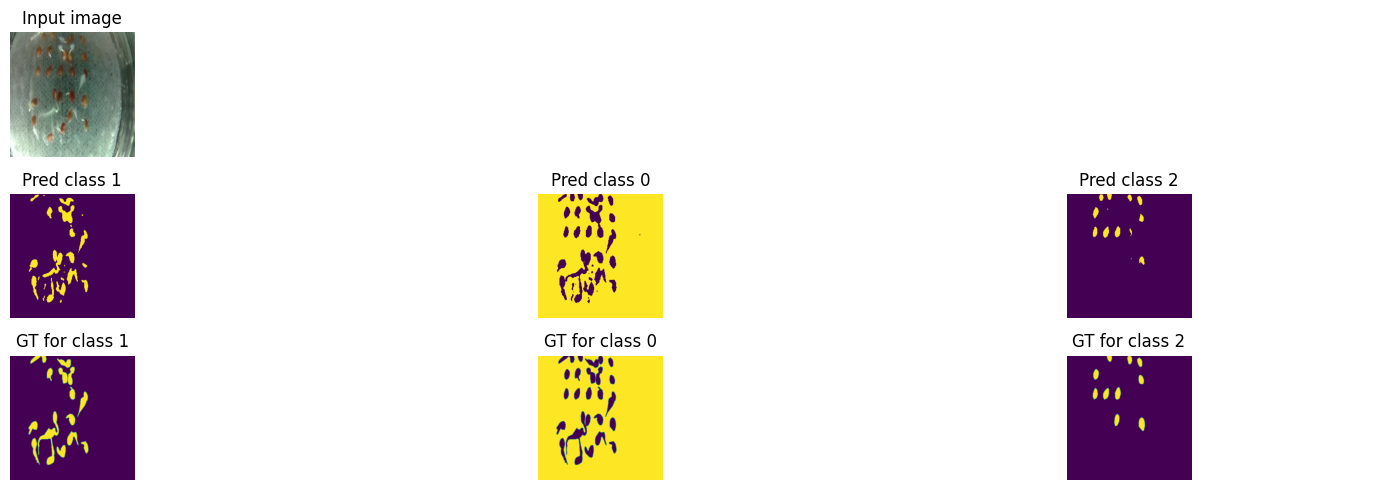

Train loss: 0.17431 | Time: 49m 24s | Val loss: 0.13026
Train_DICE_avg: 0.84261 | Train_Jaccard_avg: 0.78192 | Train_Sensitivity_avg: 0.91873 | Train_Specificity_avg: 0.93990 
Class 0 - Train_DICE: 0.99070 | Train_Jaccard: 0.98166 | Train_Sensitivity: 0.99432 | Train_Specificity: 0.82916 
Class 1 - Train_DICE: 0.68119 | Train_Jaccard: 0.60664 | Train_Sensitivity: 0.85375 | Train_Specificity: 0.99639 
Class 2 - Train_DICE: 0.85594 | Train_Jaccard: 0.75744 | Train_Sensitivity: 0.90811 | Train_Specificity: 0.99416 
Val_DICE_avg: 0.87082 | Val_Jaccard_avg: 0.81903 | Val_Sensitivity_avg: 0.93933 | Val_Specificity_avg: 0.93306 
Class 0 - Val_DICE: 0.99513 | Val_Jaccard: 0.99033 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.80762 
Class 1 - Val_DICE: 0.75003 | Val_Jaccard: 0.68884 | Val_Sensitivity: 0.89186 | Val_Specificity: 0.99673 
Class 2 - Val_DICE: 0.86730 | Val_Jaccard: 0.77793 | Val_Sensitivity: 0.92806 | Val_Specificity: 0.99483 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [21]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [22]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]



Global Performance Metrics:
Loss mean: 0.14617, std: 0.02478
Dice Coefficient mean: 0.83628, std: 0.13453
Jaccard Index mean: 0.77833, std: 0.14839
Sensitivity mean: 0.82251, std: 0.13369
Specificity mean: 0.96893, std: 0.03413

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99488, std: 0.00252
Jaccard mean: 0.98982, std: 0.00497
Sensitivity mean: 0.99272, std: 0.00365
Specificity mean: 0.91122, std: 0.10264

Class 1:
Dice mean: 0.67209, std: 0.36530
Jaccard mean: 0.60796, std: 0.37469
Sensitivity mean: 0.66077, std: 0.37159
Specificity mean: 0.99845, std: 0.00321

Class 2:
Dice mean: 0.84188, std: 0.09367
Jaccard mean: 0.73722, std: 0.12573
Sensitivity mean: 0.81404, std: 0.11504
Specificity mean: 0.99712, std: 0.00256
